In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_excel(r"C:\Users\Admin\Desktop\For publication\dataset.xlsx")
df

ProductName  \
0                               100% Authentic POSHI 916   
1                               100% Authentic POSHI 916   
2                               100% Authentic POSHI 916   
3                               100% Authentic POSHI 916   
4                               100% Authentic POSHI 916   
...                                                  ...   
11780  Trendy New Chain Bracelets for Women Silver He...   
11781  Trendy New Chain Bracelets for Women Silver He...   
11782  Trendy New Chain Bracelets for Women Silver He...   
11783  Trendy New Chain Bracelets for Women Silver He...   
11784  Trendy New Chain Bracelets for Women Silver He...   

                                                 reviews sentiments  
0        যেমন চেয়েছিলাম তেমনি পেয়েছি খুব অল্প সময়ে পে...   positive  
1        প্রথমে আলহামদুলিল্লাহ ভালোইতবে অপেক্ষা করতে ...   positive  
2        জিনিস টা আসলেই অনেক ভালো সবাই নিতে পারেন৩০৬ ...   positive  
3        প্রোডাক্টটি আসলেই অসাধারণ হাতে পেযে খুবই ভাল...   positive  
4        প্রোডাক্ট কোযালিটি ভালো যেমনটা চেযেছি তেমনি ...   positive  
...                                                  ...        ...  
11780    বাই রে বাই দেকটে অনে বড় সর অর এমনে দেকটে ওনে...    neutral  
11781    এত কম দামে অনেক ভালো প্রডাকআপনারা চাইলে নিতে...   positive  
11782                 আপনি কথা রেখেছেন আমিও রাখলাম ভাইয়া    neutral  
11783              একদম বাজে ছিল অনেক গুলো পাথর পরে গেছে   negative  
11784               ধন্যবাদ সেলার কেসেইম প্রোডাক্ট পাইছি    neutral  

[11785 rows x 3 columns]

In [3]:
#stop words
stopWords = {"অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নয়","না","নাই","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেই","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়","দু",
"একটি",
"নিজের",
"তারৈ",
"আমি",
"ঐ",
"আপনি",
"করিয়ে",
"তত",
"জন্য",
"যখন",
"হত",
"সেটাও",
"করার",
"ওঁদের",
"শুধু",
"তাহার",
"ওদের",
"দেওয়ার",
"নিজেই",
"আমার",
"দিলেন",
"ফিরে",
"গেলে",
"জানা",
"আপনার",
"তাঁর",
"উপর",
"তাকে",
"রয়েছে",
"যাকে",
"এঁরা",
"তাদের",
"সেই",
"হবেন",
"কোনও",
"অনুযায়ী",
"যান",
"তাও",
"পরেও",
"গেছে",
"অবধি",
"কয়েকটি",
"কাছে",
"এটি",
"আগেই",
"এতটাই",
"হইয়া",
"যা",
"হৈলে",
"আবার",
"তারা",
"সে",
"হয়েছে",
"সহিত",
"যাবে",
"তখন",
"গিয়েছে",
"দিয়ে",
"কিছুই",
"তবে",
"নিতে",
"রেখে",
 "ই",
"সহ",
"যাঁরা",
"নানা",
"হলো",
"যাঁর",
"তোমার",
"পর",
"ছাড়াও",
"করলে",
"যত",
"তবু",
"তিনিও",
"না",
"দেখতে",
"দেওয়া",
"থেকেও",
"কাজে",
"ক্ষেত্রে",
"কয়েক",
"হচ্ছে",
"হয়েছিল",
"থেকেই",
"অথবা",
"সঙ্গেও",
"বদলে",
"দ্বারা",
"পক্ষে",
"গেল",
"বলতে",
"পাওয়া",
"কত",
"মধ্যে",
"বলা",
"জে",
"নেই",
"তাই",
"কি",
"সেটা",
"একে",
"যেখানে",
"এত",
"হলেও",
"টি",
"করেই",
"করছে",
"হন",
"প্রায়",
"মধ্যভাগে",
"কারণ",
"এবার",
"করেছে",
"করেন",
"আর",
"যেন",
"নিজেদের",
"হয়েই",
"নিজে",
"একবার",
"নাই",
"বাদে",
"যাতে",
"এর",
"ঠিক",
"তার",
"ও",
"পেয়ে",
"করলেন",
"মোট",
"ব্যাপারে",
"কাছ",
"করা",
"চেয়ে",
"কেউ",
"নাগাদ",
"করি",
"বলেছেন",
"নেওয়ার",
"কাউকে",
"ভাবে",
"দিকে",
"তারপর",
"যেমন",
"ওখানে",
"খুব	গুলি",
"অর্থাত",
"তো",
"ছিলেন",
"কোন",
"পারেন",
"হয়তো",
"বরং",
"কেউই",
"জনকে",
"প্রভৃতি",
"দুটো",
"তাঁকে",
"এখন",
"অন্য",
"ওর",
"ছিল",
"ওকে",
"তুলে",
"দিয়েছে",
"জানানো",
"ওঁরা",
"এটাই",
"তুমি",
"করিতে",
"তাহলে",
"দেন",
"বলে",
"যে",
"হলেই",
"এমনকী",
"হল",
"বহু",
"বলল",
"মধ্যেই",
"ধরে",
"তাঁদের",
"তেমন",
"আই",
"হইবে",
"তাহাতে",
"নেওয়া",
"যিনি",
"এঁদের",
"অনেকে",
"হতে",
"কে",
"ধরা",
"হইতে",
"করায়",
"ব্যবহার",
"থাকে",
"বসে",
"থাকেন",
"থাকবে",
"স্বয়ং",
"এরা",
"দেয়",
"নিয়ে",
"কবে",
"সবার",
"দেখে",
"চলে",
"যেতে",
"ইত্যাদি",
"সেখান",
"চান",
"অন্তত",
"হবে",
"সেটাই",
"পর্যন্ত",
"মাধ্যমে",
"এমন",
"ভাবেই",
"দিয়েছেন",
"ওরা",
"করে",
"তাতে",
"এবং",
"এতে",
"ইহা",
"জন্যওজে",
"সুতরাং",
"আমাকে",
"বিশেষ",
"এসে",
"করতে",
"এখানেই",
"আমরা",
"কিন্তু",
"তিনি",
"বিনা",
"আজ",
"কারও",
"করিয়া",
"তা",
"ছাড়া",
"থেকে",
"যারা",
"হয়",
"হওয়া",
"এল",
"মাত্র",
"ফের",
"জানতে",
"জানিয়ে",
"বললেন",
"মতোই",
"সাথে",
"কর",
"করেছেন",
"করবেন",
"হলে",
"নাকি",
"সঙ্গে",
"আগামী",
"এখনও",
"তাঁাহারা",
"দিতে",
"তাঁরা",
"আগে",
"আমাদের",
"সেটি",
"বলেন",
"স্পষ্ট",
"কোনো",
"হোক",
"থাকবেন",
"জন",
"করছেন",
"অবশ্য",
"গিয়ে",
"হয়নি",
"এখানে",
"করবে",
"কিছু",
"হওয়ায়",
"কখনও",
"যাদের",
"বার",
"হয়ে",
"পারি",
"জানিয়েছে",
"আদ্যভাগে",
"আরও",
"মতো",
"যায়",
"যাওয়ার",
"কিংবা",
"যদি",
"পরেই",
"জনের",
"হিসাবে",
"এস",
"দুটি",
"জানায়",
"গোটা",
"যাওয়া",
"তথা",
"সমস্ত",
"যদিও",
"করাই",
"হতেই",
"হয়েছেন",
"নয়",
"বিভিন্ন	বিষয়টি",
"রকম",
"অনেক",
"করেছিলেন",
"উপরে",
"এ",
"এদের",
"উনি",
"হয়",
"সব",
"পরে",
"প্রতি",
"যার",
"মধ্যেও",
"মোটেই",
"এই",
"বা",
"বেশ",
"পারে",
"যতটা",
"অনেকেই",
"যাচ্ছে",
"অথচ",
"অতএব",
"একই",
"দেখা",
"চায়",
"আছে",
"থাকায়",
"যথেষ্ট",
"কী",
"তাহা",
"রাখা",
"ওঁর",
"সেখানে",
"সম্প্রতি",
"তিনঐ",
"উচিত",
"হওয়ার",
"ফলে",
"ওই",
"কেন",
"থাকা",
"এটা"}

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [5]:
from bnltk.tokenize import Tokenizers
from bangla_stemmer.stemmer import stemmer
t = Tokenizers()

# Remove stop words and steaming

In [6]:
def _remove_stop_words(text):
    words = t.bn_word_tokenizer(text)#word tokenizer
    stmr = stemmer.BanglaStemmer()#define steaming
    
    bangla_text = " "
    for word in words:
        word = stmr.stem(word)#steaming
        if word in stopWords:
            continue
        else:
            bangla_text += word
            bangla_text += " "
    return bangla_text 
        
df['modified_reviews']=''   
count=0
for reviews in df['reviews']:
    df.iloc[count, 3]=_remove_stop_words(reviews)
    count=count+1

applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
appli

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
appl

applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..


applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied

applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
app

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..


applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
app

applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second ru

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applie

applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..


applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
a

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
app

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
app

applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
ap

applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applie

applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..

applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
a

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
appli

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appli

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
a

applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
appli

applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied 

applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied

applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appl

applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied 

applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..


applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
appl

applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..

applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
appli

applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
app

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
ap

applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
app

applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..

applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applie

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..

applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
a

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied third rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fo

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appli

applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
a

applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
ap

applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
appli

applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
ap

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..


applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
app

applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applie

applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
app

applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
appli

applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
a

applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
app

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
appl

applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..


applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rule

applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
ap

applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
ap

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
app

applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied f

applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
a

applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
appl

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
appli

applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
a

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
a

applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
a

applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied third rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
a

applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..

applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules.

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
app

applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..


applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
appli

applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
ap

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
appli

applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
a

applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appli

applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
ap

applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
ap

applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
app

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
ap

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..


applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
a

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
a

applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..

applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied

applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
appl

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applie

applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..


applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applie

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules.

applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
appl

applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
a

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
appli

applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..


applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
app

applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
a

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appl

applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
appl

applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied third rules..
applied second rules..
applied fourth rules..
applied fourth rules.

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
app

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules.

applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied third rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
a

applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
appl

applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied

applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied third rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..


applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..

applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
app

applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules.

applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
appl

applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
appli

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
a

applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
a

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
appli

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
a

applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
a

applied fourth rules..
applied third rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
appli

applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
app

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..

applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
appli

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
ap

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..


applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
a

In [7]:
df

ProductName  \
0                               100% Authentic POSHI 916   
1                               100% Authentic POSHI 916   
2                               100% Authentic POSHI 916   
3                               100% Authentic POSHI 916   
4                               100% Authentic POSHI 916   
...                                                  ...   
11780  Trendy New Chain Bracelets for Women Silver He...   
11781  Trendy New Chain Bracelets for Women Silver He...   
11782  Trendy New Chain Bracelets for Women Silver He...   
11783  Trendy New Chain Bracelets for Women Silver He...   
11784  Trendy New Chain Bracelets for Women Silver He...   

                                                 reviews sentiments  \
0        যেমন চেয়েছিলাম তেমনি পেয়েছি খুব অল্প সময়ে পে...   positive   
1        প্রথমে আলহামদুলিল্লাহ ভালোইতবে অপেক্ষা করতে ...   positive   
2        জিনিস টা আসলেই অনেক ভালো সবাই নিতে পারেন৩০৬ ...   positive   
3        প্রোডাক্টটি আসলেই অসাধারণ হাতে পেযে খুবই ভাল...   positive   
4        প্রোডাক্ট কোযালিটি ভালো যেমনটা চেযেছি তেমনি ...   positive   
...                                                  ...        ...   
11780    বাই রে বাই দেকটে অনে বড় সর অর এমনে দেকটে ওনে...    neutral   
11781    এত কম দামে অনেক ভালো প্রডাকআপনারা চাইলে নিতে...   positive   
11782                 আপনি কথা রেখেছেন আমিও রাখলাম ভাইয়া    neutral   
11783              একদম বাজে ছিল অনেক গুলো পাথর পরে গেছে   negative   
11784               ধন্যবাদ সেলার কেসেইম প্রোডাক্ট পাইছি    neutral   

                                        modified_reviews  
0       চেয়েছি তেমনি পেয়েছি অল্প সময় পেয়েছি এক হাজা দ...  
1       প্রথমে আলহামদুলিল্লাহ ভালোইতবে অপেক্ষা অতিষ্ঠ...  
2       জিন টা আসলে ভালো সবা নিত পারেন৩০৬ টাকা ফ্রি ড...  
3       প্রোডাক্ট আসলে অসাধারণ হাত পায ভালো লাগছেবর্ত...  
4       প্রোডাক্ট কোযালিটি ভালো চেযেছি তেমনি পেযেছি প...  
...                                                  ...  
11780   বাই রে বাই দেকটে অনে বড় সর অর এমনে দেকটে ওনেক...  
11781                 কম দামে ভালো প্রডাকআপনা চাইলে নিত   
11782                             কথা রেখেছেন রাখ ভাইয়া   
11783                           একদম বাজে গুলো পাথর গেছ   
11784                  ধন্যবাদ সেল কেসেইম প্রোডাক্ট পাই   

[11785 rows x 4 columns]

# Graph Plot

In [8]:
def ploting(df_2, p_name):
    import matplotlib.pyplot as plt
    import numpy as np
    print("Visual: ")
    # Displaying the Sentiment Coutns
    df_2['predicted_sentiment'].value_counts()
    #plot and visualize the counts
    plt.title(f'Sentiment Analysis of: {p_name}')
    plt.xlabel('Counts')
    plt.ylabel('Sentiment')
    df_2['predicted_sentiment'].value_counts().plot(kind='barh')
    print(plt.show())

#     df_2['predicted_sentiment'].value_counts().plot(kind='pie')
#     print(plt.show())

In [9]:
#contain product name
product_names=[]
for i in df['ProductName']:
    if i in product_names:
        continue
    else:
        product_names.append(i)

In [10]:
def get_reviews(df_text):
    #converting pandas to list
    list2d = df_text.values.tolist()
    # print(df_positive)

    #converting 2d list to 1d list
    list1d = [j for sub in list2d for j in sub]
    
    #converting list to string
    df_review=''.join(map(str,list1d))
    
    return df_review

In [11]:
#creating frequency table
from nltk.stem import PorterStemmer
def _create_frequency_table(text) -> dict:

    words = t.bn_word_tokenizer(text)
#     print(words)
#     stmr = stemmer.BanglaStemmer()

    freqTable = dict()
    for word in words:
#         word = stmr.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

In [12]:
#Term Frequency method to score each sentence.

def _score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()
    
    
    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))#word token from a sentence and count how many words
        if word_count_in_sentence == 0:
            continue
        for wordValue in freqTable:
            if wordValue in sentence:
                if sentence in sentenceValue:
                    sentenceValue[sentence] += freqTable[wordValue]
                else:
                    sentenceValue[sentence] = freqTable[wordValue]
        try:
            sentenceValue[sentence] = sentenceValue[sentence] / word_count_in_sentence
        except:
            continue
        
        
    return sentenceValue

In [13]:
#summary generating
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence in sentenceValue and sentenceValue[sentence] > (threshold):
            summary += "।" + sentence
            sentence_count += 1

    return summary

In [14]:
def convert_to_list(df_text):
    #converting pandas to list
    l = df_text.values.tolist()
    
    return l

In [15]:
def view_sentiment(i,product_names,percentages_of_sentiments,df_2):
    print(f"Product Name: {product_names[i]}\n")
    for k,v in percentages_of_sentiments.items():
        print(f"{k} is : {v}")
    
    ploting(df_2, product_names[i])  

In [16]:
# #we are considering the average score of the sentences as a threshold.
def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    try:
        average = int(sumValues / len(sentenceValue))
        return average
    except:
        print("Not found")
        
    

# View Summary

In [17]:
def view_summarization(df,freqTable):
    one_d_text = convert_to_list(df)
    sentenceValue=_score_sentences(one_d_text, freqTable) 
    threshold = _find_average_score(sentenceValue)
    summary = _generate_summary(one_d_text, sentenceValue, threshold)
    print(summary)
    

# Applying Logistic regression model

In [18]:
# Load_pretrained_model
import joblib
model = joblib.load("C:/Users/Admin/Desktop/For publication/Logistic_regression/logistic_regression_Sentiment_Model")


In [19]:
# #positive=2
# #negative=1
# #neutral=0
#import new prediction valus on new dataframe
def insert_predicted_value_to_dataset(df_2, predictions):
    for i in range(len(df_2)):   
        if(predictions[i]=='positive'):
            senti='positive'
        elif(predictions[i]=='negative'):
            senti='negative'
        else:
            senti='neutral'
    
        df_2.iloc[i, 4]=senti 

In [20]:
def get_percentages(df_2):
    thisdict = {}#define a dictionary
    # Get the percentage of positive comment
    pcomment = df_2[df_2.predicted_sentiment == 'positive']
    pcomment = pcomment['reviews']
    thisdict["positive_score"] = round((pcomment.shape[0]/df_2.shape[0]*100), 1)


    # Get the percentage of negative comment
    ncomment = df_2[df_2.predicted_sentiment == 'negative']
    ncomment = ncomment['reviews']
    thisdict["negative_score"] = round((ncomment.shape[0]/df_2.shape[0]*100), 1)


    # Get the percentage of neutral comment
    nucomment = df_2[df_2.predicted_sentiment == 'neutral']
    nucomment = nucomment['reviews']
    thisdict["neutral_score"] =  round((nucomment.shape[0]/df_2.shape[0]*100), 1)
    
    return thisdict
    
    

In [21]:
def find_summarization_of_online_product_reviews():
       
    for i in range(len(product_names)):
        df_2 = pd.DataFrame()
        df_2 = df[df['ProductName']==product_names[i]]
        df_2_reviews=df_2['modified_reviews']
        


        # predictions
        predictions = model.predict(df_2_reviews) #get predicted result

        df_2['predicted_sentiment']='' #add a new column to store predcited result


        insert_predicted_value_to_dataset(df_2, predictions)

        percentages_of_sentiments = get_percentages(df_2)#it's a dictionary

        view_sentiment(i,product_names,percentages_of_sentiments,df_2)
    

        #---------------------------------------------------------------------
        #Now review Summary Generation
        #Positive Reviews
        df_positive = df_2[df_2['predicted_sentiment']=='positive']
        df_positive2 = df_positive['modified_reviews']
        df_positive = df_positive['reviews']
        positive_reviews = get_reviews(df_positive2)
    
      
        #Negative Reviews
        df_negative = df_2[df_2['predicted_sentiment']=='negative']
        df_negative2 = df_negative['modified_reviews']
        df_negative = df_negative['reviews']
        negative_reviews = get_reviews(df_negative2)
    
    
        #Neutral Reviews
        df_neutral = df_2[df_2['predicted_sentiment']=='neutral']
        df_neutral2 = df_neutral['modified_reviews']
        df_neutral = df_neutral['reviews']
        neutral_reviews = get_reviews(df_neutral2)
        #-----------------------------------------------------------------------
    
  
    
    #     find_frequency
        p_freqTable = _create_frequency_table(positive_reviews)
        n_freqTable = _create_frequency_table(negative_reviews)
        nu_freqTable = _create_frequency_table(neutral_reviews)
    
        print("\nPositive Summary: ")
        view_summarization(df_positive,p_freqTable)

    
        print("\nNegative Summary: ")
        view_summarization(df_negative,n_freqTable)
     
    
        print("\nNeutral Summary: ")
        view_summarization(df_neutral,nu_freqTable)
        

        
    
    
        print("-------------------------------------------------------------------------------------------------------------------------\n \n")

Product Name: 100% Authentic POSHI 916

positive_score is : 87.3
negative_score is : 8.3
neutral_score is : 4.4
Visual: 


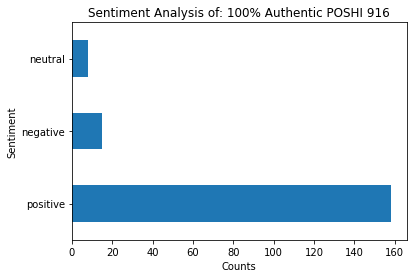

None

Positive Summary: 
।  এই দামে নিসন্দেহে ঘড়িটা বেস্ট।  খুব ভালো একটা প্রাডাকআপনারা চাইলে নিতে পারেন।  অনেক সুন্দর একটি ঘড়ি।  মোটামুটি ভালো লাগার মতোই আশা করি সিবার ভালো লাগবে।  খুবই সুন্দর একটা ঘড়িডেলিভারি হয়েছে খুব দ্রুতঅসংখ্য ধন্যবাদ দারাজ এবং সেলারকেবক্স সহ দেওয়ার কথা ছিলা কিন্তু বক্স পাইনি।  আলহামদুলিল্লাহ শতভাগ অথেনটিক প্রোডাক্টমাত্র দুই দিনে ডেলিভারি পেয়েছি রাইডারের ব্যবহার অনেক ভালো ছিলোধন্যবাদ।  ঘড়ি টা খুব সুন্দর দাম হিসাবে ঠিক আছে যেটা অডার দিয়েছি সেটাই পেয়েছিধন্যবাদ দারাজধন্যবাদ সেলসম্যান।  সেম টু সেম পাইছি আপনারাও চাইলে নিতে পারেন ছেলার অনেক ভালো।  অসাধারণ ঘড়িনিঃসন্দেহে নিতে পারেন যে কেউ তবে ঘড়ির সাথে বক্স দিলে ভালো হতো।  অসাধারণ বন্ডিং ঘড়িটারদাম হিসেবে খুবই সুন্দর একটা ঘড়িচাইলে সবাই নিতে পারেন।  অনেক সুন্দর একটা প্রোডাক্ট চাইলে আপনিআপনারা নিতে পারেনবেস্ট কোযালিটি।  এই বাজেটে ভালোই মনে হয়েছেলুকটাও বেশ প্রিমিয়ামসেলার দ্রুতই ডেলিভারি দিয়েছেআপনারা চাইলে নিতে পারেন।  ঘড়িটি আসলেই খুবিই ভালো কেউ নিতে চাইলে নিতে পারেন।  দাম অনুযায়ী ভালো প্রডাক্ট।  ভালো লেগেছে অনেক সত্যিই সুন্

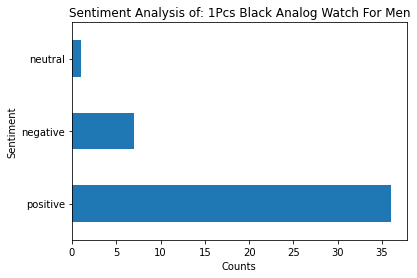

None

Positive Summary: 
।  খুব সুন্দর একটি প্রোডাক্ট এই দামে ভালোই দিযেছে আপনারা চাইলে নিতে পারেন ধন্যবাদ কে।  আলহামদুলিল্লাহ্ প্রর্ডাক্টটি দাম অনুজাই ভালোচাইলে আপনারা নিতে পারেনআমি মাত্র দুই দিনের মধ্য পেয়েছিসেলারের ব্যবহারো অনেক ভালো ছিলোআলহামদুলিল্লাহ্ আমি প্রর্ডাক্টি পেয়ে খুশি।  আগে একবার সেম ঘডি আমি দোকান থেকে কিনেছিলাম টাকা দিযে আর দারাজে পেলাম তার অর্ধেক দামে ধন্যবাদ দারাজকে এত কমে দেওযার জন্য কারেন আট এ ঘডি টি অনেক ভালো আপনারা চাইলে সব সময পডার জন্য নিতে পারেন।  ভাবতেও পারিনি এই প্রাইজে এতো ভালো একটা পণ্য পাবো যা ওয়ার্ডার করেছি তাই পেয়েছি দুদিনেই পেয়েছি ধন্যবাদ দারাজ।  দাম অনুযায়ী ঘড়িটা অনেক ভালো৩ দিনের মধ্যে পেয়েছি সেলারও অনেক ভালো ডেলিভারিম্যানও ভালো ছিলচাইলে নিতে পারেন।  এই দামে ঠিক আছে তবে গ্লাসের ভিতরে একটু মযলা ছিল।  ঘড়িটা অনেক সুন্দর প্রাইস হিসেবে বেস্ট একটা প্রোডাক্ট।  আলহামদুলিল্লাহ ভালো হয়েছে ব্যাকটা।  ভালই নিতে পারেন।  বাহ অনেক ভালো মানের ঘড়ি পাইছি এতো কম দামেও আপ্নারা চাইলে যে কেউ নিতে পারেন।  তেমন ভালো না কিন্তু দাম অনুযায়ী ভালো প্রোডাক্টআশা করি কিনলে ঠোকবেন না।  

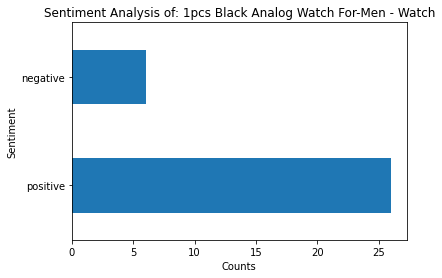

None

Positive Summary: 
।  ভালোভাবে যত্ন করে ভালো প্রোডাক্ট পাঠানোর জন্য ধন্যবাদ দামের তুলনায আমার কাছে সেরা একটি প্রোডাক্ট ধন্যবাদ দারাজ এবং দারাজের অল টিম।  এত গর্জিযাস একটি ঘডি এত কম টাকায পাব আশাই করিনি অনেক ভালো ধন্যবাদ দারাজকে কম টাকায দেওযার জন্য।  ধন্যবাদ দারাজ এত কম টাকায ভালো মানের একটা প্রোডাক্ট দেওযার জন্য যেমনটা আশা করছি তার থেকে অনেক ভালো পেযেছি।  দাম অনুযায়ী ঘোড়িটা আনেক ভালোচাইলে আপনারাও নিতে পারেন।  দাম কম আবার প্রোডাক্টও ভালো কিন্তু ঘড়ির কাটা ঠিক জায়গায় থাকে না তবে সেলারকে ধন্যবাদ জানাই এত কম দামে জিনিস বিক্রি করছেন এটাই তো বেশি।  আসলে খুব ভালো একটি পণ্য এতো কম দামে ভালো জিনিস সরাসরি এতো ভালো লাগে।  আমার খুবই ভালো লেগেছে ধন্যবাদ সেলারকে।  অল্প টাকাই খুব ভালো একটা পন্য যে কেউ চাইলে নিতে পারেন নিসন্দে খুব ভালো।  দাম অনুযায়ী থিক থাক সেলার দিয়েছে।  দাম অনুসারে ভালো দেখতেও সুন্দর।  সবই ঠিকঠাক ধন্যবাদ সেলার ভাইকে।  একটু ভালো না ঘড়ি ভিততে একটা কাটা ভাঙ্গা আমি ফেতর দিতে চাই কি করতে হবে এখন।  মোটা মোটি ভালো তবে বেল গুলা তেমন একটা ভালো না।  অনেক তাডাতাডি পেযে গেছি এবং পণ্য টিও 

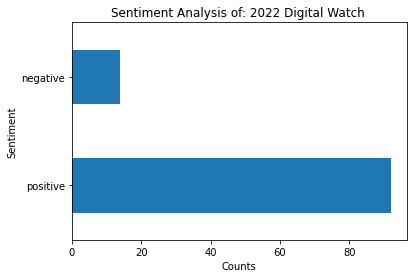

None

Positive Summary: 
।  ঘড়ি এটা দাম অনুযায়ী অনেক ভালো।  আলহামদুলিল্লাহ ঘড়িটা ভালো হয়েছে টাকার পরিমান অনুযায়ী ঘড়িটা খারাপনা।  কম দামের ভিতরে এ প্রোডাক্টটা আমার আমার কাছে ভালো লেগেছে আপনারা কেউ চাইলে নিতে পারেন।  দাম অনুযায়ী ভালো তবে বাচ্চাদের জন্য পারফেক্ট।  খুব দ্রুত হাতে পেয়েছি ঘড়িটা ভালো ছিলো ধন্যবাদ।  এই বাজেটের ঘডিটা অনেক ভালো ছিল।  ভালো পন্য কম দামের মধ্যে।  দামে অনুযাযী বালা আছে।  ভালো প্রোডাক্ট।  অনেক ভালো।  যেরকম বলেছিলাম সেরকম দেয়া হয়নি দাম অনুযায়ী ভালো।  দামের তুলনায় অনেক ভালো।  ভাই ভালো ঘডি না।  খুবই ভালো।  মোটামুটি ভালো নিতে পারেন।  ঘড়িটা অনেক ভালোসবাই নিতে পারেন।  ভালো মানের ঘড়ি।  প্রোডাক্টের মান মোটামুটি ভালো।  ভাঙা ঘড়িটা।  ভালো।  অবশেষে পেলাম আমার ঘডিটা অনেক ভালো ঘডি দিছে আপনারাও নিতে পারেন ধন্যবাদ।  মোটামুটি ভালো ছেলেদের জন্য আপনারা চাইলে নিতে পারেন।  যেমনটা দেখাইছে তেমনটা নয় কিন্তু খারাপ নাভালোই।  খুব ভালো সবাই কিনতে পারেন ধন্যবাদ দারাজ।  টাকাঅনুযাযমোটামুটিভাল।  ভালো নিতে পারেন।  ভালোই।  অনেক সুন্দর পন্যভালো লাগলোধন্যবাদ দারাজ।  দাম হিসেবে ভালো কিন্তু আলো কম।  দাম 

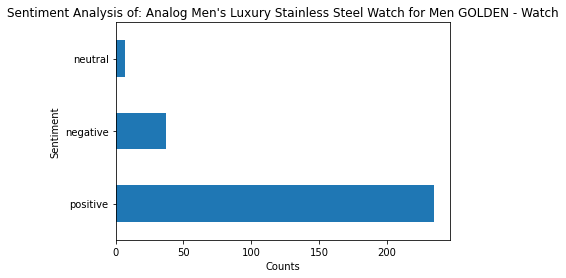

None

Positive Summary: 
।  আলহামদুলিল্লাহ আমার অনেক ভালো লেগেছে সবাই নিতে পারেন।  কম টাকায় মোটামুটি ভালোই ধন্যবাদ দারাজডেলিভারি ম্যান টাও আনেক ভালো সবাইকে ধন্যবাদ।  ঘড়ি টা ভালো আছে তবে এর চেইনটা একেবারে পাতলাএই দামে আপনারা নিতে পারেন।  ঘডিটা খুব ভালো ধন্যবাদ দারাজ কে ধন্যবাদ ডেলিভারি দেওযার জন্য।  ঘড়ি খুব ভালোআমি তিনটি ওর্ডার করেছি আপনারা নিতে পারেন।  দাম হিসেবে ঘডিটা ভালো আপনারা নিতে পারেন ধন্যবাদ দারাজ কে ঠিকঠাক প্রোডাক্ট দেওযার জন্য।  আমার কাছে খুবই ভালো লেগেছে আপনারা নিতে পারেন।  খুব ভালো একটি ঘডি কিন্তু একটু খারাপ হযে গেছে।  আলহামদুলিল্লাহ অনেক ভালো প্রথম বার এত দ্রুত ডেলিভারি পেয়েছি ধন্যবাদ দারাজ।  এত কম দামের মধ্যে এত সুন্দর একটা ধন্যবাদ সেলারকে।  ঘরিটা অনেক ভালো আমার বাবা দিছিধ্যনবাদ সেলারকে।  এই দামে ভালো প্রোডাক্ট সেলার ও ডেলিভারি ম্যান ভালো ছিল।  ডেলিভারি খুব তাডাতাডি পেযেছিঘডিটাও সুন্দরপ্যাকেজিং খুব ভালো ছিলআপনারা কিনতে পারেন।  অনেকে ভালো একটা ঘর্ড়ি।  খুব ভাল অল্প টাকায় এত ভালো আশা করিনিধন্যবাদ দারাজ।  দাম অনুযায়ী ভালো প্রোডাক্ট পেয়েছিধন্যবাদ সেলার কে।  অসাধারণ সেলার ভাইও 

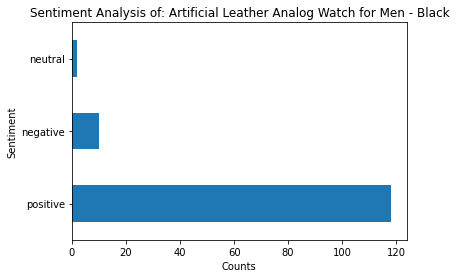

None

Positive Summary: 
।  দেখতে ভালোই পছন্দ হয়েছে।  যেমনটা অডার করছি ঠিক তেমনটাই পাইছিআপনারা চাইলে নিতে পারেনদাম হিসাবে প্রোডাক্ট ভালো আছে।  অনেক ভালো একটা প্রডাক্ট এই দামের মধ্যে ধন্যবাদ দারাজ সেলারকে।  অনেক ভালো একটা প্রোডাক্ট যেমন চেযেছি তেমন পেয়েছি।  মাশাআল্লাহ যেমনটা ছবিতে দেখেছিলাম তেমনটা পেয়েছি এবং সেলসম্যান অনেক ভালো।  কম দামে খুব ভালো ছিলধন্যবাদ ধারাজ।  অনেক সুন্দর ধন্যবাদ দারাজ।  দাম অনুযায়ী ভালো ধন্যবাদ।  ভালোই তবে বেল্টের কুয়ালিটি টা আর একটু ভালো হতে পারতো।  ঘড়ি ওনেক ভালো তবে বেল্ট ছেড়া।  দাম অনুযায়ী মুটামুটি ভালো।  আলহামদুল্লিাহ বেশ ভালো।  অল্প টাকাই ভালো অনেক।  দাম হিসেবে ভালো।  গুলিটা ভালো ছিল।  দাম অনুযাযী প্রোডাক্ট অনেক ভালো প্যাকিং ও ভালো ছিল প্রডাক্ট ঠিকমতো পেযেছি ধন্যবাদ।  এত কম টাকায অনেক ভালো একটা ঘডি দিযেছে দারাজ কে অনেক ধন্যবাদ।  সেলার যথেষ্ট রেস্পন্সিভঘডিটির কোযালিটি ভালো ছিলো।  দাম অনুযাযী ঘডিটি ভালো চাইলে আপনারা নিতে পারেন।  দাম অনুযাযী অনেক ভালো ধন্যবাদ দারাজ ও সেলারকে।  পিকচারে যেমন দেখায় আসলে তেমন নামোটামুটি ভালো।  এটা অনেক ভালো ছিলআমার অনেক ভালো লেগেছে।

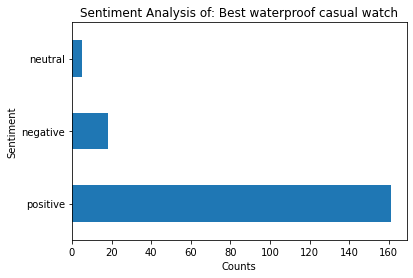

None

Positive Summary: 
।  খুব ভালো একটা ঘুরি আমার পছন্দ হযেছে অনেক।  ধন্যবাদ দারাজ কে পন্যটা একদম অখ্যত ভাবে আমাএ কাছে পৌছে দেবার জন্য প্রোডাক্ট টা ভালোই নিতে পারেন।  প্যাকেজিং ভালো ছিল কিন্তু পণ্যটা ভালো না ঘড়ির চেইটা ভাঙ্গা।  ধন্যবাদ দারাজকে এবং সেলারকে এই দামে ভালো একটি ঘডি দেযার জন্য।  ঘড়িটা অনেক ভালো যেরকম চেযেছি সেরকম পেয়েছি আরো ধন্যবাদ জানাই সেলার কে।  অনেক ভালো ঘডি এলাম বাজে অনেক ধন্যবাদ সেরার কেআমি খুশি।  ঘড়ি টা খুব ভালোসবাই নিতে পারেন ধন্যবাদ দারাজ কে।  সুন্দর একটি ঘডি আমার খুব পছন্দ হযেছে যেমন চেযেছি তেমনি পেযেছি কম দামের মধ্যে খুব ভালো একটু ঘড়ি।  আলহামদুলিল্লাহ্ ভালো জিনিশ পাইছি।  কম বাজেটে ভালো একটা ঘড়ি ধন্যবাদ দারাজ কে।  খুব ভালো একটা ঘড়ি বিক্রেতা কে ধন্যবাদ।  ভালো মানের একটি প্রোডাক্ট।  অনেক সুন্দর একটা ঘডি আপনারা চাইলে নিতে পারেন।  পেযেছি খুব ভালো সেলার ভাইকে ধন্যবাদ।  দাম হিসাবে প্রডাক্ট টা খুবী ভালো।  মোটা মুটি ভালো আছে নিতে পারেন।  দাম কম হিসেবে জিনিস ভালো।  ভালো ছিলো ঘড়িটা।  ধন্যবাদ।  ভালো।  এই প্রোডাক্টটি আমি নিয়েছিখুব ভালো একটি প্রোডাক্টওয়াটার প্রুফপ্রায় দু মাস 

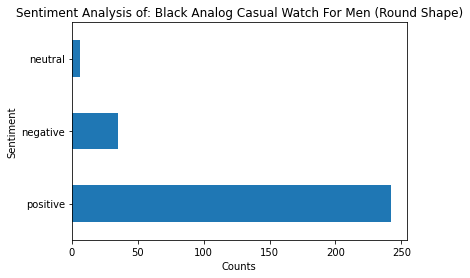

None

Positive Summary: 
।  যেমন দেখেছিলাম তেমন ই পেয়েছি দাম হিসেবে অনেক ভালো একটা প্রোডাক্ট দিছেধন্যবাদ সেলারকে ধন্যবাদ দারাজকে।  ভালোই সবাই নিতে পারেন।  খুব ভালো একটি প্রডাক্ট আপনারা নিতে পারেনধন্যবাদ দারাজ এবং সেলারকে।  ঘডিটা আসলেই অনেক সুন্দর দামের তুলনায অনেক ভালো।  যেমনটা দেখেছিলাম তেমনটাই পেয়েছিপ্রোডাক্ট অনেক ভালো ছিলো ধন্যবাদ দারাজ ও সেলার ভাইকে।  দাম অনুযায়ী অনেক ভালোকিন্তু ঘডিটা একটু ছোট।  অনেক ভালো একটা ঘডি আপনারা সবাই নিতেপারেন।  দামের তুলনায় ঘড়ি অনেক সুন্দর কিন্তু ডেলিভারি চার্জ বেশি ডেলিভারি ম্যানের অনেক ভালো ব্যবহার ধন্যবাদ দারাজ।  আলহামদুলিল্লাহ ভালো।  দাম অনুযায়ি ঘড়ি মান অনেক ভালো খুব কম সময়ে ডেলিভারি পেয়িছি।  দাম অনুযায়ী অনেক ভালো একটি প্রোডাক্ট আপনারও নিতে পারেন।  দাম অনুযাযী প্রোডাক্ট ভালো ছিল সঠিক সময আমি পেযেছি।  দাম অনুযায়ী মোটামুটি ভালো তবে গরিটা দেখতে অনেক সুন্দর ধন্যবাদ সেলার ভাই এবং দারাজ কে।  দাম অনুযাই ভালোই মোটা মুটি চলেদেখা যাক কয়দিন চলে।  আলহামদুলিল্লাহ ওয়াসটি অনেক ভালো আপনারা নিতে পারেব।  খুবই ভালো যেম দেখেছি তেমন পেয়েছি আলহামদুলিল্লাহ।  আলহামদুলিল্লাহ 

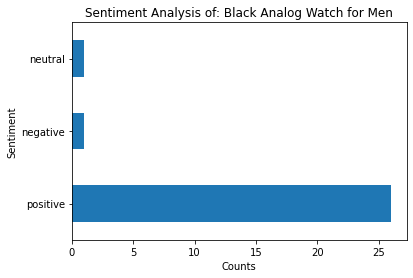

None

Positive Summary: 
।  আমি হুবহুব প্রোডাক্ট পেযেছি দারাজকে ধন্যবাদ।  ঘডিটি ভালো দারাজকে ধন্যবাদ সেলারকেও ধন্যবাদ সবাইকে ধন্যবাদ সবাই নিতে পারেন।  দাম অনুযায়ী ভালো লাগছে।  দাম অনুযায়ী ঘড়িটা অনেক ভালো সেলার ভাইকে অসংখ্য ধন্যবাদ।  অনেক ভালো ঘড়ি টাযেমন চেয়েচি ঠিক তেমনধন্যবাদ সেলার কে।  মুটামুটি ভালো ছিলো।  পডাক টা অনেক ভালো।  ভালো

Negative Summary: 
।  ঘড়িটি তিন দিন ব্যবহার করলাম এই তিন দিনে ঘড়িটি আমার কাছে বেশ ভালোই লেগেছে বিশেষ করে দামের কথা বিবেচনা করলে দারাজের এক হাজার একশ দশএক সেল এ ডিসকাউন্ট ও ফ্রি ডেলিভারি মিলিয়ে আমার খরচ হয়েছে একশ নয় টাকা একশ টাকায় এমন ঘড়ি পাওয়া ভালোই ঘড়িতে এখনও কোন সমস্যা পাইনি এখন দেখার পালা কতদিন ব্যবহার করতে পারি সমস্যা ছাডা তবে প্যাকেজিং ভালো ছিলো না পলিতে দিয়েছে ছোট কোন বক্সে দিলে আরো ভালো হতো কেউ নিতে চাইলে নিতে পারেন

Neutral Summary: 
।  ঘডিটা নরম বেল্টটা আরেকটু শক্ত হলে ভালো হতো বাকি সব দাম অনুযাযী ঠিকঠাক
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Ceramic

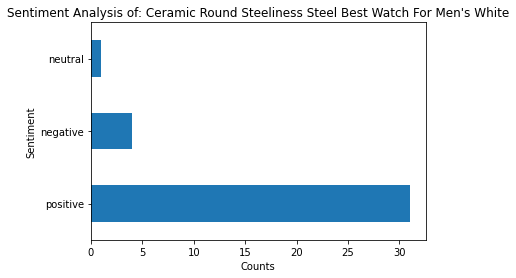

None

Positive Summary: 
।  আলহামদুলিল্লাহ টাকা অনুযায়ী ভালো আপনারাও নিতে পারেন সব কিছু ঠিক ঠাক।  আলহামদুলিল্লাহমোটামুটি ভালোকিন্তু ঘড়িটা মনে হয় রং করা হয়েছেতাছাড়া সব কিছু ঠিক আছে।  আলহামদুলিল্লাহ আমার কাছে গডি টা অনেক ভালো লাগলো ধন্যবাদ।  মোটা মটি ভালোই আছেআপনারা নিতে পারেন।  সুন্দর ঘডি টা অনেক আপনার চাইলে নিতে পারেন ধন্যবাদ সেলার ভাইকে।  ঘড়ি টা আমার কাছে ভালো লেগেছে।  কম টাকার মধ্যে অনেক ভালো ঘড়ি আপনারা নিতে পারেন।  ভাই ঘুরি টা ভালো লাগছে আবার নিবো আমি।  ঘড়িটা ভালো কিন্তু বেল্টা ভালো না।  ভালো ছিলো।  অনেক ভালো ঘড়িটা অনেক সুন্দর।  দাম হিসেবে ভালো না।  ভালোই খারাপ না চলে।  অনেক ভালো।  খুবই ভালো।  মোটামুটি।  সুন্দর

Negative Summary: 
।  একদম খারাপ।  এক দাম বাজে নষ্ট ঘরি চলে না খানকির পোলারা নষ্ট মাল বিক্রি করচা বাইন চোদ্দ দারা জের ঘুশ্টি চুদি

Neutral Summary: 
।  ছবিতে যেমন দেখছি তেমন না কোয়ালিটিও ভাল নয় আর লেডিস ওয়াচ এর ডায়াল কি এত বড় হয় সাথে কোন বক্স ও দেয়া হয়নি
-------------------------------------------------------------------------------------------------------------------------


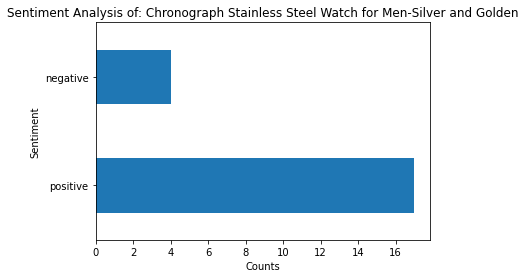

None

Positive Summary: 
।  আলহামদুলিল্লাহ অনেক ভালো প্রডাক্ট চাইলে আপনারাও নিতে পারেন ধন্যবাদ দারাজকে।  এই দামে সুন্দর একটি ঘড়ি আমার খুব পসন্দ হয়েছে।  ধন্যবাদ দারাজ কেসুন্দর একটা ঘড়ি আর একই দেখতে দেওয়ার জন্যসবাই নিতে পারেন।  ভালো লেগেছে ধন্যবাদ।  এক কথায অসাধারণ।  এক কথায় এই দামে।  অসাধারণ একটি প্রোডাক্ট ছিল ভাই।  ধন্যবাদ ঘড়িটা বাবাকে পাঠিয়েছি।  আসলেই ভালো

Negative Summary: 
।  পুরাই ফালতু প্রডাক্ট কালার উঠে গেছে দিছে উনি কোয়ালিটি ও এতো ভালো না সেলার কিভাবে করলেন ভাই এইটা হুম বাটপারি কেন করেন ভাই।  ঘড়ি ভাল কিন্তু সেলার কাস্টমারের ব্যাপারে খুবই অমনোযোগী কালারের ব্যাপারে বার বার সতর্ক করার পরেও সাদার বদলে গোল্ড কালার দিয়েছে।  খুবই বাজে অবস্থা পুরনো একটি ঘডি দিযেছে আমাকে ব্যাপারটা দুঃখজনক।  সেলার খুবই বাজে একটা কাজ করেছে ঘড়ি দেখাইছে একটা দিছে অন্যটা ঘড়ি করতে অনেক কষ্ট করতে হয়েছে আমাকে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: FGT APLL Round Fasionable Steeliness

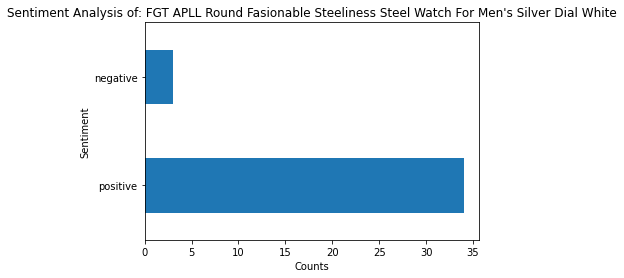

None

Positive Summary: 
।  খুবই ভালো আমি অনেক খুশি ধ্যনবাদ দারাজ।  আলহামদুলিল্লাহ ভালোভাবে হাতে পেয়েছি।  অনেক ভালো এত কম দামের প্রডাক্ট।  দাম অনুযায়ী খারাপ নাভালোই।  মনের মতোই পাইছি ঘড়িটা।  প্রাইজ অনুযায়ী ভালো।  ঘড়িটা অনেক সুন্দর আর দাম হিসাবে ভালোছাইলে আপনারা ও নিতে পারেন।  আলহামদুলিল্লাহ খুব ভালো কিন্তু ঘড়ির চেইন টা নরমাল।  প্রোডাক্ট এর মান ভালো আছে চাইলে আপনার নিতে পারেন।  ঘড়িটি খুব ভালোযেমনটা চেয়ে চিলাম তেমন টা পাইছি।  কম দামে ভালো প্রোডাক্ট সবাই নিতে পারেন।  ভালো প্রোডাক্ট সবাই নিতে পারেন।  দাম অনুযায়ী অনেক ভালো।  মোটা মুটি ভালো

Negative Summary: 
।  ভিতরের সেকেন্ড এর রিংটার পজিশন ঠিক নাইঅ্যাপল লোগো ও ঠিক নাইঅর্ডার এর পর সেলার কে বলছিলাম যে চেক করে দিতে কোনো রেসপন্স নাই না নেওযার পরামর্শ রইলো।  কোযালিটি অনেক নরমাল ঘডি ডেলিভারি চার্জ মিলিযে একশ পঞ্চাশ হলে ঠিক হয।  ঘড়িটার সব কিচুই ভালো চিলো কিন্তু নারা দিলি টাইম আপনা আপনি পালটে যা

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------


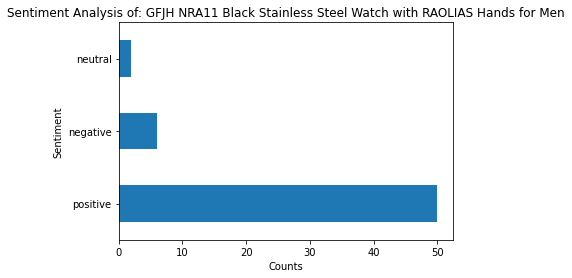

None

Positive Summary: 
।  আলহামদুলিল্লাহ ঘড়িটি খুবই ভালো যা ভেবেছিলাম তার থেকেও অনেক ভালো পেয়েছি আপনারা চাইলে নিতে পারেন।  প্রোডাক্টটি আসলেই অনেক ভালোযেমন দেখিছি ঠিক তেমন ই পেয়েছিসবাই নিতে পারেন।  ডেটা বলি কম আর ও ভালো হ্যা অচিত।  অনেক সুন্দর যেমন চেয়েছি তেমন পেয়েছি ধন্যবাদ সেলার এবং দারাজ।  এটা মোটামুটি ভালো প্রডাক্টকম টাকার মধ্যে নিতে পারেন।  ঘড়ি ভালোই কিন্তু ফিনিশিং ভালো নাহ ডেলিভারি বয় জোস।  আলহামদুলিল্লাহ খুব ভালো প্রোডাক্ট।  সেম প্রোডাক্ট ধন্যবাদ।  দাম অনুপাতে ভালো।  ভালোই খারাপ না।  মোটামুটি।  হুম দাম অনুযায়ি খুব ভালো একটা প্রোডাক্ট পেযেছি ধন্যবাদ দরাজ ও সেলার কেএ।  খুব বেশী দারুন আর ডেলীভারি ম্যান অনেক ভালো ছিলোধন্যবাদ দারাজ।  দাম অনুয়ায়ী ঘড়িটা খুব ভালো পেয়েছি প্যাকেজীং খুব ভালো ছিল।  খুব সুন্দর ঘড়ি টা আমার খুব পছন্দ হয়েছে ধন্যবাদ দারাজ।  দাম হিসেবে ঘড়িটা ভালোইতবে কাচটা অনুজ্জ্বল।  অসাধারো একটি পন্য ধন্যবাদ দারাজ আপনাদে।  হ্যা এটা ঠিকঠাক পেয়েছি ধন্যবাদ।  ঘরি ভালো আপনারা নিতে পারেন।  ছবির মতই পেয়েছি ধন্যবাদ।  অনেক ভালো হযেছে।  ভালো

Negative Summary: 
।  ঘড়িটা দেখতে যথেষ্ট ভাল

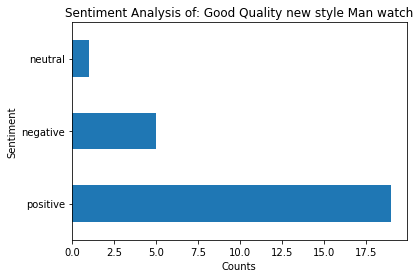

None

Positive Summary: 
।  এই টাকায় অনেক ভালো পাইছিধন্যবাদ।  দাম অনুযায়ী ঘড়ি গুলো ভালো।  চমকার খুবই ভালো।  ভালো হইছে।  ঘড়ি টা ভালো।  ভালো

Negative Summary: 
।  ওডার ছিল টা টা কম দিযেছেএভাবেই ঠকলামলুকিং ভালোই নিতে পারেননেওযার সময গুনে নেবেননযতো ঠকবেন।  আমি এইটা ফেরত দিতে চাই।  যেমনটা ভাবলাম তেমনটা ভালো না ঘডির টাইম উল্টাপাল্টা।  ভালো কিন্তু আমি টাইম ঠিক করতে পারছিনা

Neutral Summary: 
।  ঘড়ি তো দাম হিসাবে ভালোই আছেকিন্তু সময় তো ঠিক করা নাইএখন সময় কি ভাবে ঠিক করবো
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Lasika W-H90329028 Digital 

positive_score is : 91.2
negative_score is : 5.9
neutral_score is : 2.9
Visual: 


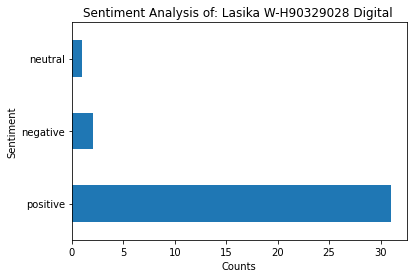

None

Positive Summary: 
।  কম দামের ভিতর খুব সুন্দর একটা ঘরি পানিতে রেখে টাই করলাম খুব ভালো ধন্যবাদ এত সুন্দর ঘরি দেওয়ার জন।  আলহামদুল্লিাহ যেটা চাইছি ওইটাই পায়ছিধন্যবাদ সেলারকে।  নিঃসন্দেহে নিতে পারেন প্রোডাক্টটি ভালো আছে।  অনেক ভালো সবাই নিতে পারেন।  অনেক সুন্দর প্রডাক্ট আপনারা চাইলে নিতে পারেন।  মোটা মোটি ভালো নিতে চাইলে নিতে পারেন।  অনেক সুন্দর একটা ঘড়ি।  ভালো মোটামুটি ওয়াটার প্রুফ বলে তো নিলামবাকি আল্লাহ ভরসাআপনারাও নিতে পারেন।  অনেক ভালো একটি ঘডি এবং ঘডিতে কোন পানি ডুকেনা।  ঘড়িটা অনেক ভালো আপনারা নিতে পারেন।  খুবই ভালো ছিল।  ভালো ইছিলো।  ভালো ছিলো।  ভালো

Negative Summary: 
।  বাজে সেলার দুই পিচ এর জায়গায় এক পিচ দিয়েছে এখন ফেরত দেবার পর আমার সব টাকা ফেরত দিতে হবে ডেলিভারি চার্জ সেলার থেকে নেওয়া উচিত।  কেও কিনে প্রতারিত হবেন না নস্ট ঘডি দেয় কমদামে বারবার বলার পরও চেন্জ করে দেয় না কেও কিনে টাকাগুলো পানিতে ফেলবেন না

Neutral Summary: 
।  সবকিছুই ঠিকঠাক ছিল তবে উপরের গ্লাসটা ছোট্ট একটু ফাটা ছিলো এই বিষযটা মোটেও ভালো লাগেনি
------------------------------------------------------------

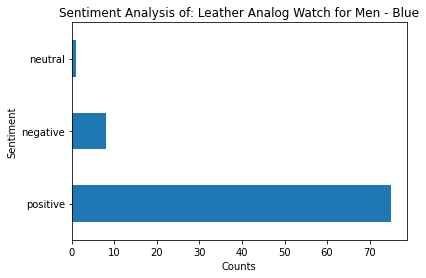

None

Positive Summary: 
।  আলহামদুলিল্লাহ দাম অনুযায়ী অনেক ভালো প্রডাক্ট পেয়েছিধন্যবাদ দারাজ কে।  দাম অনুজাযি ঘডিটা খুব ভালো ছিল।  প্যাকেজিং কোযালিটি ভালো ছিল না ঘডি মোটামুটি চলে এই দামে।  আলহামদুলিল্লাহ ভালো যেমন দেখছি ঠিক তেমন।  আসলেই ঘড়িটা অনেক সুন্দর ছিলো অল্প দামের মধ্যে ধন্যবাদ দারাজ।  অস্থির ঘড়ি একশ পঞ্চাশপাঁচ টাকায়।  খুব ভালো প্রোডাক্ট।  খুব ভালো লাগলোছবির সাথে মিল আছে পুরাপুরিধন্যবাদ।  দাম অনুযায়ী অনেক ভালো প্রডাক্ট ধন্যবাদ সেলার কে।  আলহামদুলিল্লাহঅল্প টাকার মধ্যে ঘড়িটা অনেক ভালো।  ভালো ছিল।  মানসম্মত পন্য ধন্যবাদ সেলার কে।  ভালো দামে কম মানে ভালো।  ঘড়িটা অনেক সুন্দর।  খুবই সুন্দর আর ভালো মানের।  অনেক সুন্দর।  খুব ভালো।  আলহামদুলিল্লাহ টাকার হিসেবে জিনিস ভালো আপনারা নিতে পারেন।  অনেক সুন্দর ছিল ঘড়িটা আমার কাছে এটা অনেক ভালো লাগে।  খুবই সুন্দর এই দামে এই ঘডি পযসা উসুল সেলার কে ধন্যবাদ।  দাম হিসেবে ঘড়িটা ভালো ছিল আপনারা এটা নিতে পারেন।  দাম অনুযায়ী প্রোডাক্টা ভালো চাইলে নিতে পারেন।  দাম অনুযায়ী ঠিক আছে ধন্যবাদ সেলার ভাই কে।  খুব সুন্দর একটি ঘড়ি খুব পছন্দ হয়েছে।  মোটামুটি ভালোই

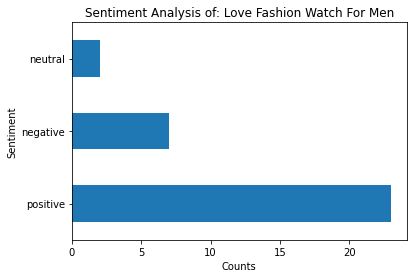

None

Positive Summary: 
।  অনেক সুন্দর ঘড়ি টা আপনারা সবাই নিতে পারেন।  এটি একটি খুব ভালো ঘড়ি আপনার এই ঘড়িটি নিতে পারেন।  ভালো লাগছে।  যেমনটা চেয়েছিলামতেমন টাই পেয়েছিধন্যবাদ সেলার কে।  দাম হিসাবে অনেক ভালো ছিলো।  ঘড়ি মোটামুটি ভালোই কিন্তু এগুলো বাচ্চাদের জন্য বড়দের না।  সুন্দর হইছে

Negative Summary: 
।  মোটামুটি ভালো কিন্তু বেইল টা চিকন শক্ত হালকা একটাই বাটন কিভাবে সময় ঠিক করবো এটাই বোজিনা।  এটার সব কিছু হচ্ছে একেবারে হস খুলে পরে জায় আমার কাছে থেকে হারিয়ে গেছে আলো একদম কম রোদে দেখা জায় না সুদু সুদু টাকা নষ্ট।  একদমি নরমাল ঘরি।  ঘরিটা মোটামুটি ভালো।  একদম ফালতু এটার সব কিছু হচ্ছে একেবারে হস খুলে পরে জায় আমার কাছে থেকে হারিয়ে গেছে আলো একদম কম রোদে দেখা জায় না সুদু সুদু টাকা নষ্ট।  ঘড়িটি হাতে পেয়েছি কিন্তুু সময় সাত মিনিট স্লো এটা ঠিক করবো কিভাবে।  একদম বাজে

Neutral Summary: 
।  অর্ডার দিলাম সাদা টাইমেরটাআর দিলেন হলুদ টাইমেরটাএটা আসা করি নি।  প্রডাক্ট ভালোইএকটা তে ডিসপ্লে হাল্কা সমস্যা তবে চলবে কিন্তু বড় সমস্যা হলোটাইম ঠিক করা নিয়েখুব প্যারা দায়কসময় কিভাবে ঠিক করবো
----------------------

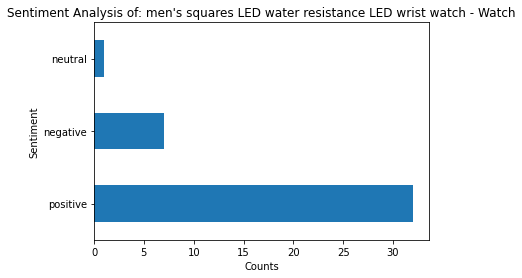

None

Positive Summary: 
।  ঘডিটি মোটামুটি হযেছে সেলারের ব্যবহার ভালো ছিল।  খুব বাজে একটা জিনিসটা।  এইটা কেউ কিনবেন নাহ একটুও ভালো নাহ।  খুবই ভালো কোযালিটি এটা।  কম দামে অনেক ভালো একটা ঘড়ি।  মোটামুটি ভালো হয়েছে।  দাম অনুযায়ী ভালো।  দাম অনুজাই ভালো।  ভালো মুটামুটি।  মুটামুটি।  ভালো না।  ভালো

Negative Summary: 
।  একদম বাজে প্রডাক্ট টাকা টাই নষ্ট করলাম।  ভালো পেয়েছি ঘড়িটা ছোট ভাইকে দিছিআপনিও নিতে পারেন সমস্যা নাই।  একেবারে বাজে একটি জিনিস কেউ বুলেও অডার করবেনা।  পুরা ফালতু জিনিস টাকা নষ্ট কেউ নিবেন না।  নষ্ট প্রডাক্ট দিযেছে পুরা টাকাটাই লস

Neutral Summary: 

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Men's Watch Simple Numbers Belt Calendar Fluorescent Green Big Dial Business Quartz Watch

positive_score is : 90.6
negative_score is : 6.2
neutral_score is : 3.1
Visual: 


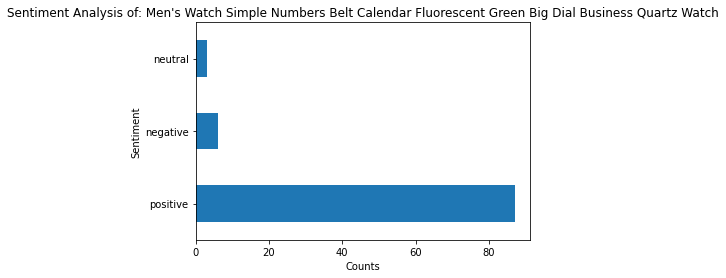

None

Positive Summary: 
।  অসাধারণ যতটা ভালো ভাবছিলাম তার চেও ভালো এত কম দামে বিদেশি প্রোডাক্ট পেলামঅনেক সুন্দর লাগে।  এই বাজেটে বেশ ভালো একটি ঘড়ি এখন কতদিন টেকে এটাই দেখার বিষয়।  আলহামদুলিল্লাহ ঘড়িটি ভালো ছিল যেমন দেখতে ছবিতে তেমনি আসছে।  প্রডাক্ট খুব ভালোভাবে হাতে পেলামধন্যবাদ।  ভালো হইছে আমার বন্ধুর অনেক পছন্দ হইছে।  দারাজকে ধন্যবাদ ঘডির কোযালিটি যথেষ্ট ভালো।  দাম অনুযায়ী ঠিক আছে সেলার ও ভালো নিতে পারেন।  আপাতত দৃষ্টিতে তো ভালোই লাগছে প্যাকেজিং ও সুন্দর ছিলো নিতে পারেন।  ভালদেখতে সুন্দরদামও ঠিক আছে।  খারাপ না দাম হিসাবে ভালো।  কম দামে খুবই ভালো প্রডাক্ট আমার খুবই পছন্দ হইছে।  দাম অনুযাযী প্রোডাক্টটি অনেক ভালো ছিল।  কোয়ালিটি অনেক ভালো সুন্দর ঘড়ি।  আলহামদুলিল্লাহ ভালো হয়েছে ঘড়িটা।  সত্যি ভালো লাগার মতো একটা ঘরি।  ভালোই।  অনেকদিন পরে রিভিউ দিচ্ছি ভালো প্রোডাক্ট নিতে পারেন সবাইহাতে পেতে অনেকদিন সময় লাগছে।  অনেক ভালো একটা ঘড়ি দশ এ দশ তবে এখন দাম টা একটু বেশি দেখছি দারাজে।  তেমন ভালো নাটাকা হিসাব করলে মোটামুটি।  সুন্দর গিফ্ট পাওযার মতো একটা ঘডি।  দাম অনুযায়ী ভালোই ছিলো গড়ি।  জোস একটা ঘডি

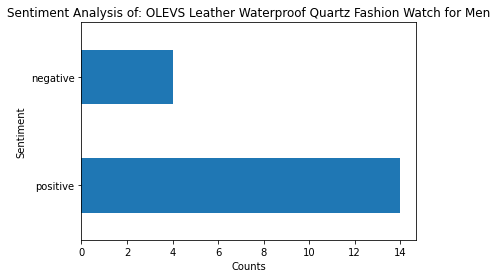

None

Positive Summary: 
।  যেমনটি চেয়েছি তেমনি পেয়েছি আলহামদুলিল্লাহ ঘড়িটা খুবই সুন্দর।  আলহামদুলিল্লাহ ভালো হযেছে।  ভালো জিনিস সবাই নিতে পারেনগ্যারানটি কার্ড আছে সাথে এক বছরের।  ধন্যবাদ যা চাইছি তাই পাইছি ঘড়িটা অনেক ভালো।  ডিসকাউন্ট প্রাইজে মোটামুটি ভালো ছিলো।  কালো টা চেয়েছিলামকফি কালারটা পাইছি।  ঘড়িটা ভালো সবাই নিতে পারেন

Negative Summary: 
।  গতকাল দিছে ঘডি টি আজকে দেখা যায ঘড়ি ডেট চেঞ্জ হয না নষ্ট ঘড়ি দিছে।  এটার সাথে বক্স দিতে বলেছিলামআর এটা একটা কপি গড়িআমি আজকে পেয়েছি দেখাযাক কি হয়ধান্দা বাজ দারাজ

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: PU Leather Analog Watch For Man

positive_score is : 83.6
negative_score is : 15.5
neutral_score is : 0.9
Visual: 


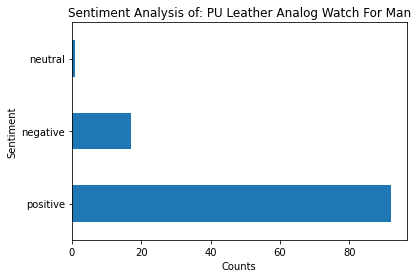

None

Positive Summary: 
।  আলহামদুলিল্লাহঅল্প টাকায় ভালো ঘড়ি নিতে পারেন সবাই প্যাকেজিং ভালো ছিল।  আমার ঘড়িটি ভালো লাগছে বেল্ট টি একটু নরমাল কিন্তু দাম অনুযায়ি এর থেকে ভালো আসা না করায় ভালোধন্যবাদ সেলার।  মোটামুটি বলব দাম হিসেবে ঠিক আছে তবে ফিতাটা ভালো না।  আমার মতে এই দামে ভালো মানের ঘড়ি এটা।  ঘোরির বেল্ট টা ভালো না।  খুব ভালো হযেছে।  কথা দিয়ে কথা রাখছেনআপনাকে ধন্যবাদ দারাজ এগিয়ে যাও ইভ্যালি হইওনাদারাজ জিন্দাবাদ একটু মজা করলামখুবি ভালো লাগছে।  অনেক দ্রুত ডেলিভারি দিয়েছে প্রোডাক্টের মানও ভালোভালো সার্ভিস এখান থেকে আপনারা নিতে পারেন।  ভালো প্রোডাক্ট ধন্যবাদ দারাজ এবং সেলারকে এত সুন্দর প্রোডাক্ট হাতে পৌছে দেওয়ার জন্য।  দাম হিসেবেযথেষ্ট ভালো প্রোডাক্টব্যাবহার করে দেখেছি প্যাকেট ও ভালো ছিল আমি সন্তুষ্ট।  টাকা অনুযায়ী ঘড়িটা ভালোইডেলিভারি চার্জসহ গাড়ির দামটা বেশি হয়ে গেল।  ঘড়ি ভালো ছিল কিন্ত ঘড়ির ফিতা একটু বড় হলে আরও ভালো হতো।  অনেক সুন্দর ঘড়িটা দেখাযাক কতো দিন চলে।  ঘড়িটা খুব সুন্দর কিন্তু ঘড়ির বেলটা খুব নরমাল।  দাম হিসাবে অনেক টাই ভালো আপনারাও নিতে পারেন।  একসপ্তাহ ভালো ছিল এর পর চলা বন্ধ 

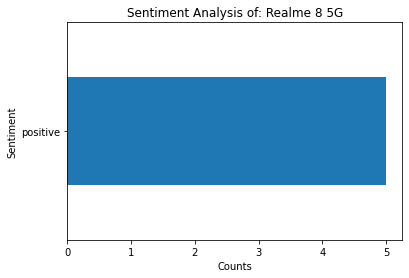

None

Positive Summary: 
।  জেনুইন প্রডাক্ট দেওয়ার জন্য সেলার কে অনেক ধন্যবাদ।  ফোন একদম ঠিকঠাক কোন সমস্যা নাই ইন্ট্যাক্ট বক্স কিন্তু সমস্যা হইলো আমাকে কোন ক্যাশ মেমো দেয়া হয় নি এখন ক্যাশ মেমো কিভাবে পেতে পারি।  সবকিছু ঠিকঠাক ছিল তবে একটা মেমো আশা করছিলাম।  আলহামদুলিল্লাহ মনের মতো পাইছি।  ভাল সার্ভিস পাচ্ছি

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Realme 8

positive_score is : 84.3
negative_score is : 14.3
neutral_score is : 1.4
Visual: 


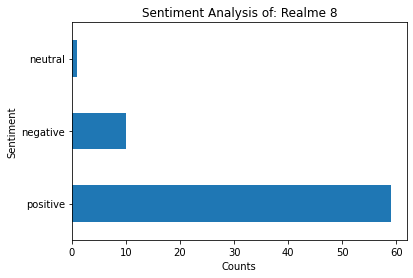

None

Positive Summary: 
।  প্রথমেই ধন্যবাদ জানায় সেলারকে একশ অফিসিয়াল ফোন ফোনের প্যাকেজিং একদম ঠিকঠাক ছিলো এক কথায় বলতে গেলে অসাধারণ নিশ্চিন্তে কিনতে পারেন।  চমকার একটি মোবাইল আমার ভালো লেগেছে আপনারা ও নিতে পারেন।  একশ অরিজিনাল অফিসিযাল প্রোডাক্ট পাইছি অর্ডার এর তৃতীয দিন ডেলিভারি দিছে এটাই আমার প্রথম অর্ডার ছিল ভালই ডিসকাউন্ট ছিল আমি খুব হ্যাপি ধন্যবাদ দরাজ।  আজকেই ফোনটি হাতে পেয়েছিখুবই দ্রুত ডেলিভারি পেয়েছিএকদম ফ্রেশ প্রোডাক্ট কিন্তু ফোনটা অরিজিনালি অফিসিয়াল কিনা এখনো নিশ্চিত হতে পারি নাইঅফিসিয়াল আন অফিসিয়াল কিভাবে যাচাই করে জানা নেই।  আলহামদুলিল্লাহ ঠিকমতো হাতে পেয়েছি এবং অনেকদিন ধরে ব্যাবহার করতেছি চেক করে দেখলাম অফিসিয়াল ফোন আমি খুবই খুশি চমকার একটা মোবাইল ধন্যবাদ সকলকে।  ফোন একেবারেই ঠিক আছে সেলারের ব্যবহার ভালোছিলো তবে খুব কম কথা বলে।  ভয়ে ছিলাম অনেকে নিষেধ করছিলো অনলাইন দারাজ থেকে কিনতে কিন্তু আমার বিশ্বাস ছিলো দারাজের উপর তাই বিশ্বস্ততার অপর নাম দারাজ ফ্লাগশীপ মল থেকে অর্ডার করলাম আলহামদুলিল্লাহ একশ অরজিনাল মোবাইল পেয়েছি।  এক্সপ্রেস ডেলিভারিতে এক দিনেই পেয়ে গেছি রিভিউ দেখেই ক

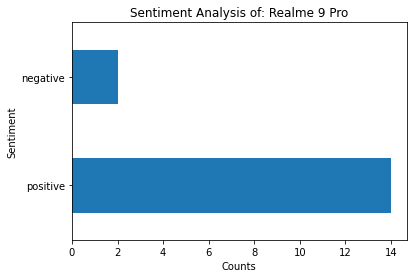

None

Positive Summary: 
।  দশদুই মাসের তে নিয়েছি মোট টাকা পড়েছে।  আলহামদুলিল্লাহ সবকিছু ঠিকঠাক ছিলো সেলার এবং দারাজকে সময় মতো প্রোডাক্ট ডেলিভারি দেয়ার জন্য ধন্যবাদ।  ধন্যবাদ দারাজ এবং রিয়েলমি কে।  মোবাইল অরিজিনাল কিন্তু বক্স ডেমেজ ছিলো।  খুবই ভালো হযেছে অসংখ্য ধন্যবাদ।  এখন পযন্ত ভালো

Negative Summary: 
।  কোন মেমো দেয়া হয়নিকোন গ্যারেন্টিওয়ারেন্টি কার্ড পাইনি

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: realme 9i

positive_score is : 81.8
negative_score is : 9.1
neutral_score is : 9.1
Visual: 


None

Positive Summary: 
।  অনেক ভালো ছিলো ফোন টা ধন্যবাদ রিয়েলমি এবং দারাজ কে সাথে আরো ধন্যবাদ রাইডার কে।  আলহামদুলিল্লাহ খুব তাড়াতাড়ি ডেলিভারি পেলাম এবং ১টি ফিটার গিফট ও পেয়েছি ধন্যবাদ দারাজ সেলার এবং ডেলিভারিম্যনকেও।  পন্য ঠিক ছিলো।  সব কিছু ঠিকঠাক ধন্যবাদ রিয়েলমি বাংলাদেশ এবং দারাজকে।  আলহামদুলিল্লাহ্ ভালো ফোন পাইছি।  ২দিনের মধ্যে ডেলিভারি পেয়ে গেলাম ক্যাশ অন ডেলিভারিতে খুব ভালো সার্বিস দিল দারাজ

Negative Summary: 
।  গিফট মেরে দিছে আমার পানির বোতল দেয় নাইএরকম হলে না কেনাই ভালআমি হতাস এটা কিনার পরে

Neutral Summary: 
।  অনেক ভালো ফোন সাথে ওয়াটার বোতল গিফট
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Realme C11

positive_score is : 85.7
negative_score is : 14.3
neutral_score is : 0.0
Visual: 


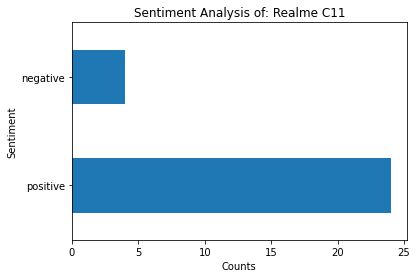

None

Positive Summary: 
।  এখনো পর্যন্ত ভালোই মনে হচ্চেখুব দ্রুত ডেলিভারি পেয়েছি।  খুব ভালো একটি মোবাইল কিন্তু আমি কোন পাই নি।  অনেক ভালো ছিল।  অরিজিনাল অফিসিয়াল ফোন দিয়েছে ধন্যবাদ দারাজ।  কোনো অভিযোগ নেই একদম ঠিকঠাকই পেযেছি প্যাকেজিং ভালো ছিলো এবং ডেলিভারি ভাইযা সুন্দর ভাবে পৌঁছে দিযেছে ধন্যবাদ দারাজ কে।  অরিজিনাল ফোন ছিলো একমাস ব্যাবহার করলাম কোন সমস্যা হয়নি এখনো।  পন্য অনেক ভালো সবাই কিনতে পারেন।  খুবই ভালো মানের একটি ফোন।  করে খুবই বাজে ফোন।  অসাধারণ ফোন

Negative Summary: 
।  এই মোবাইল টা ভালো না আমি ফেরত দিয়ে দিবো কি করবো।  প্রডাক্ট ভালো রাফ ইউজের জন্যসেলার খুবি অত্য অহংকারী সে কার সাতে কেমন আচরণ করে জানি না তবে আমার সাথে খুব একটা ভালো বিহিব করেনি এক কথায় অমল্যায়ন করেছে।  কোম্পানির নিজসহ স্টোর দোকান থেকে কিনলে ভয় থাকে কপি সেট পাবার এখান থেকে কিনলে কোনো চিন্তা নাই।  সাথে কিছু নেইক্যামেরার মান ভাল নাএকটা ইয়ার ফোন ও দেয়নাইফালতু

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

P

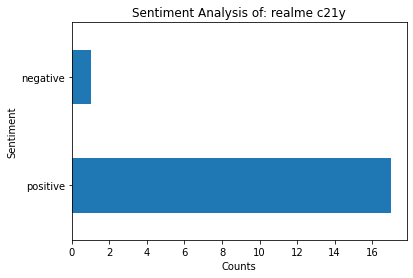

None

Positive Summary: 
।  খুব ভালো লেগেছে ফোন টা ধন্যবাদ দারাজ।  ভেরি ভেরি নাইস প্রোডাক্ট ধন্যবাদ দারাজ কে।  সবকিছুই ভালো ছিল।  ধন্যবাদ দারাজ।  ভালো ছিলো

Negative Summary: 
।  রাইডার দুই কদম হাটতে চায় না এ কেমন রাইডার রে বাবা অর্ডার দিয়ে আমার ঠেকা পড়ছে আমারে পারলে তার অফিসে নিয়ে যায় প্রোডাক্ট পিকড করতে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: realme c25s

positive_score is : 83.3
negative_score is : 12.5
neutral_score is : 4.2
Visual: 


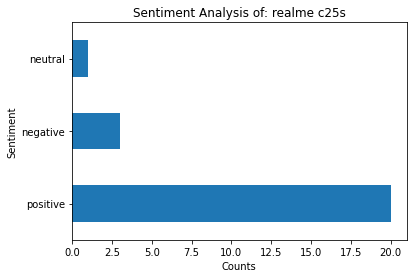

None

Positive Summary: 
।  ধন্যবাদ দারাজ এতো সুন্দর অফারে এতো সুন্দর ফোন দেওয়ার জন্য শুভ কামনা রইলো।  খুব ভালো ছিল।  কোনো অভিযোগ নেই একদম ঠিকঠাকই পেযেছি প্যাকেজিং ভালো ছিলো এবং ডেলিভারি ভাইযা সুন্দর ভাবে পৌঁছে দিযেছে ধন্যবাদ দারাজ কে।  ভালো ভাবে পেয়ে গেলাম।  অনেক সুন্দর প্রোডাক্ট প্যাকেটিং ভাল ছিল ধন্যবাদ।  অনেক ভালোমানের প্রোডাক্ট এবং অরিজিনাল প্রোডাক্ট।  ভালো

Negative Summary: 
।  ঢাকার বাইরে তিন দিনের মধ্যে হাতে পেয়েছি মাত্র টাকাই পেয়েছি তবে হোম ডেলিভারি হলেই দুই কিলো মতো আমাকেই যেতে হয়েছে এইটা হতাশ জনক।  অফিসিযাল মনে করে দারাজ মল থেকে কিনেছিলাম কেনার পর দেখি কোনো ওযারেন্টি কার্ড নাই ইনভযেস নাই শেষ চমক হিসেবে দেখি বিটিআরসি ডাটাবেইসে ডিভাইসটি নাইআর সেলারের কমিউনিকেশন তো একেবারে জঘন্য মেসেজের কোনো রিপ্লাই দেযনা।  এক মাস হলো ইউস করছি এখনো কোন প্রব্লেম পাই নাই

Neutral Summary: 
।  প্রথমে রিলামি কিনতে চাইছিলাম কিন্তূ টাকা না থাকায় রেলমি বিশপাঁচ নিয়েছি টাকা বাজেটে এটাই বেস্ট ফোন সবদিক দিয়ে পারফর্মেন্স ভালো পাচ্ছি বৈশাখী অফারে দিয়ে নিয়েছিলাম শুধু এন্ড্রোয়েড দশদুই আপডেট এখনো পাইনাই সাপোর

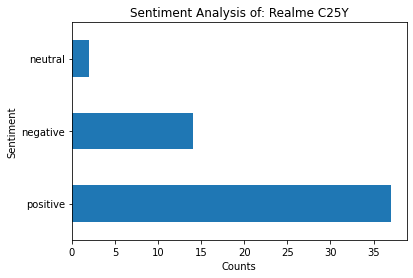

None

Positive Summary: 
।  খুব ভালো একটা ফোন পেযেছি ধন্যবাদ দারাজ কে।  আলহামদুলিল্লাহ অনেক ভালো ছিল।  দাম হিসেবে যথেষ্ট ভালো।  ভালই।  আলহামদুলিল্লাহ।  ভালো।  আলহামদুলিল্লাহ পন্য ঠিকঠাক হাতে পেয়েছি ধন্যবাদ সেলার কে ভালো পন্য দেওয়ার জন্য ধন্যবাদ দারাজ কে স্বল্প সময়ে ডেলিভারি দেওয়ার জন্য।  আলহামদুলিল্লাহ ফোন টা অনেক ভালো লেগেছেসেলারকে ধন্যবাদ।  ধন্যবাদ সেলার সাথে দারাজের কর্মিদের।  অরিজিনাল অফিসিয়াল পন্য হাতে পেয়েছি।  একশ রিকোমান্ড করার মত।  আলহামদুলিল্লাহ ভালোই।  ঠিকঠাক মত পেযেছি

Negative Summary: 
।  পানির বোতল দেয়নি সেলার এটা মানতে পারলাম না কিন্তু।  বাটপার সেলার পানির বোটল ফ্রি দেওয়া কথা ছিলো কিন্তু দেয়নি দারাজও কম বাটপার না।  মোবাইল পেয়েছি কিন্তু সাথে পানির বোতল দেওয়ায় কথা ছিল বোতল টা পায়নি।  ফোনের সাথে পানির বোতল ফ্রি দেওয়ার কথা ছিলো কিন্তু দেয়নি বাজে অভিজ্ঞতা কথা কাজে মিল নাই।  বোতল ফ্রি দেয়ার কথা ছিলো দেয়া হয়নিআরো সচেতন হওয়া জরুরী।  ওয়াটার বোতল দেয়নি।  সেলার পানির বোতল দেয়নি।  বাটপার সেলার পানির বোটল ফ্রি দেওয়া কথা ছিলো কিন্তু দেয়নি

Neutral Summary: 
।  প্রোডাক্ট ঠিকঠাক ভাবেই হ

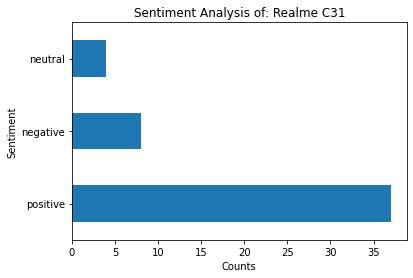

None

Positive Summary: 
।  অনেক ভালো মানের সেট অসাধারণ পারফরমেন্স সেলফি অনেক সুন্দর উঠে মোটকথা বলতে গেলে এই দামে বাজারের সেরা ফোন দারাজ এর কারণে ফ্ল্যাশ সেলে এক হাজার টাকা ডিসকাউন্ট পেয়েছি এই জন্য দারাজকে অনেক অনেক ধন্যবাদ।  খুবই ভাল ফোন ধন্যবাদ রিয়েলমি এবং দারাজকে।  খুব ভালো একটা ফোন দেখতে ও সুন্দর।  ধন্যবাদ দারাজ কে এমন সুন্দর একটা প্রোডাক্ট দেওয়ার জন্য পছন্দ মত ডেলিভারি পাইছি নির্দিষ্ট সময়ের ভিতরেই ডেলিভারি পেলাম।  ভালোভাবেই ফোনটি হাতে পেযেছি যেমনটি আশা করেছিলাম ঠিক তেমনটি পেযেছি ধন্যবাদ রিযেলমি ও দারাজ টিমকে।  অনেক সুন্দর ও ভালো মোবাইল।  মোবাইলটা খুব ভালো।  মাশাআল্লাহফোন সেট ঠিক আছেসব ঠিক ছিলসাজেস্ট করি সবাই নিতে পারেনএই নিযে দুইটা ফোন পার্চেস করেছি আলহামদুলিল্লাহ ভালো।  ফোনটি ভালোভাবে হাতে পেযেছি প্যাকেজিং দারুন ছিল জেনুইন ফোন।  তবে শুধু ফোন পেয়েছিকোনো মেমো অথবা রিসিট পাইনি।  ফোনটা অনেক ভালো আপনারা সবাই নিতে পারেন ধন্যবাদ দারাজকে।  আলহামদুলিল্লাহ পোডাক্ট ভালো পেয়েছি।  ক্যামেরাটা ভালো ছিল না।  ইনটেক এবং ভালো ছিল সব।  ভাল ছিল ধন্যবাদ।  ভালো ছিলো

Negative Summary: 
।  আমি ফোন কি অড

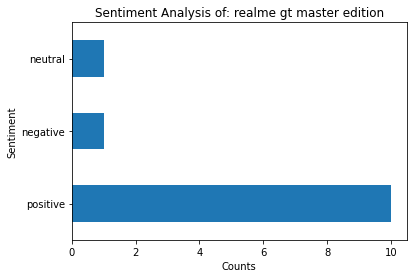

None

Positive Summary: 
।  দারাজ কে অসংখ্য ধন্যবাদ আমার প্রিয ফোনটি দ্রুত সমযের মধ্যে ডেলিভারি করার জন্য।  ফোন সম্পর্কে তো কিছু বলায় যাবে নাবাজেট কিলারতবে ব্যাটারি ব্যাকআপটা তুলনামূলক কমআরেকটু বেশি ব্যাকআপ পাওয়া গেলে ফোনটা সেই হতো।  দারাজ হতে কিনে ফেললাম পছন্দের মোবাইল টি দীর্ঘদিন ধরে চালিয়েছি সেকারনে মোবাইল এর এক প্রকার ভক্ত বনে যাই যে কেউ যদি জিগ্যেস করতো কি ফোন কেনা যায় তাহলে একথায় রিয়েলমি সাজেস্ট করতাম রিয়েলমি মোবাইল আসলেই অস্তির একটি মোবাইল এর তো কোন কথায় নেই সামনে আসতেছে পাঁচ জি যুগ সেই হিসেবে তাল মিলিয়ে এবং ইউনিক একটা ডিজাইন এর কথা মাথায় রেখে কিনে ফেললাম টিকে।  ফোনটি এই মাসের দশএক তারিখে অর্ডার করেছিলাম আর ফোন হাতে পেলাম এই মাসের বিশএক তারিখএটা ছাড়া মনে আর কোন কষ্ট নেইফোনটা ব্যবহার করছি মোটামুটি ভালোঅবশেষে বলতেই হয় ধন্যবাদ দারাজ বাংলাদেশ।  ফোনটা খুব সুন্দর ফোনের লুক টা অন্যান্য ফোন থেকে আলাদা তাই অনেক ভালো লেগেছে ক্যামেরাও খুব সুন্দর আর আমার কাছে সব দিক থেকে ফোনটা খুব ভালো লেগেছে।  কযেকদিন আগে লেটেস্ট ফোন কেনা সত্বেও এই ফোনটি দেখে এটার প্রেমে পডে যাই এবং কিনতে বাধ্য হই গতানুগতি

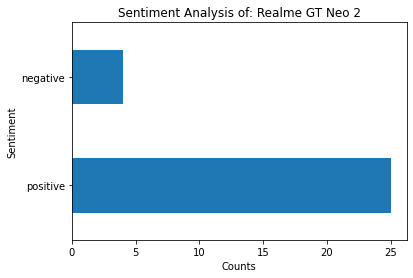

None

Positive Summary: 
।  আমার দারাজমল ফেস্ট ও রিয়েলমির ক্যাম্পেইন থেকে সব মিলিয়ে পড়েছে এককথায় বেস্ট ডিভাইস নিয়ে অফিশিয়াল বাজেটে সেরা ফ্ল্যাগশিপ বলা যায়ছবির কোয়ালিটি ও ভালো।  ৩৫৭৬৭- সব মিলিয়ে এটা পড়েছে অনেক সুন্দর একটা মোবাইল।  মোবাইল ঠিক মতো পেয়েছি কিন্তু সাথে কোনো গিফট পাইনি।  আমি মোবাইলের সাথে রিয়েলমি ব্যাগ গিফট পাইনি সমস্যা টা কি জানতে চাচ্ছি।  অরিজিনাল মোবাইল ইনটেক এবং ইন এক্টিভ ধন্যবাদ সেলারকে।  খুব ভাল ১টা ফোনসম্পূর্ণ ইনটেক ছিলঅফিসিয়াল ফোন সেলারকে আন্তরিক ধন্যবাদ।  আলহামদুলিল্লাহ এই বাজেটে বেস্ট ফোন তবে ফ্রি হিসেবে হেডফোন দিলে ভাল হত।  ফোনটা গরম হয় কিছুক্ষণ কাজ করালে চার্জিং ব্যাকআপ ভালো না ডিসপ্লে টা অনেক সুন্দর মোটামুটি একদিন এর ব্যাবহারে ভালোই মনে হচ্ছে।  ফোনটি খুবই ভালো সাথে চার্জার ফানটি গিফট পেযেছিখুব ভালো লাগলো ফোনের পারফরম্যান্স চমকার।  ক্যাম্পেইন উপলক্ষে ভাউচার ডিসকাউন্ট ছিলো এই সুযোগে থেকেই নিযে নিলাম খুব খুব ভালো ভাবে প্যাক করা ছিলো একদম অরিজিনাল অফিসিযাল ফোন অনেক তাডাতাডি ডেলিভারি পেযেছি আছে বলেই এখনো নিশ্চিন্তে অনলাইন থেকে কেনাকাটা করতে পারি ধন্যবাদ ধন্যবাদ।  বুঝল

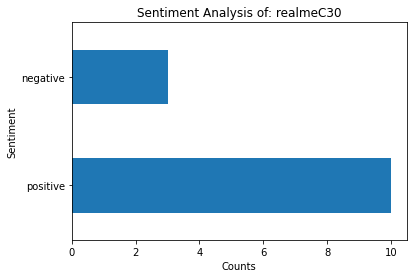

None

Positive Summary: 
।  হাতে পেযেছি সব ঠিকঠাক ধন্যবাদ দারাজ এখন কতটা সার্ভিস দেয সেটাই দেখার বিষয।  এক কথায় অসাধারণ ছিলো ধন্যবাদ দারাজকে।  ভালো ছিলো

Negative Summary: 
।  এই প্রাইস রেন্জে এটা বেস্ট ফোন যাদের বাজেট নিছে তারা চোখ বন্ধ করে নিতে পারেন আমার এক ছোট ভাইকে কিনে দিসি সারাদিন খেলে তবে প্যাকেজিং খারাপ হযেছিলফোনের বক্স চাপের কারনে বাকা হযেগেছিলো ভাগ্যিস ফোনের কিছু হযনাই।  ঠিকঠাকভাবে হাতে পেয়েছিঅফারে ভাল পরিমানে ডিসকাউন্টও পেয়েছিতবে প্রায় দশ হাজার টাকা দামের একটা ফোনে ফিংগারপ্রিন্ট সেন্সর না থাকাটা মানা যায়না আর এইদামে কমপক্ষে চার জিবি র্যাম থাকা উচিত৪ জিবি সম্ভব না হলেও তিন জিবি আবশ্যকযদিও সেটাও কমই হয় কিছুটা২ জিবি র্যাম একেবারেই কম আর এইদামে মেনে নেওয়ার মত না।  যতই ব্লক মারবে ততই কোপ দেয়া হবে দারাজ থেকে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: realmeNarzo50aPrime

positive_score is : 83.6
negative_score is : 14.9
neutral_score is : 1.5
Visual: 


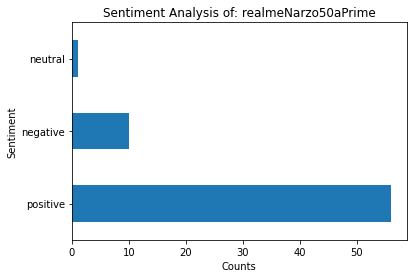

None

Positive Summary: 
।  সবই পাইলাম ভালোভাবে চার্জার টা নাই।  মোটামুটি ভালই আছে।  খুব ভালো একটা প্রোডাক্ট কিন্তু ভিতরে চার্জার নাই।  রিযেল মি ন্যারোজ টি এ প্রাইম সেটা ভালো।  চার্জার নাই।  টাকায় অবশ্যই এটি ভালো মোবাইল তবে একটি চার্জারকভার এর অভাব আপনি অনুভব করবেন এই মোবাইলটিতে।  ফোনটা অনেক ভালো লাগছে ধন্যবাদ সেলার কে।  এক কথায় অসাধারণ একটি ফোন।  মোবাইলটা অসাধারণ।  দাম হিসেবে মোবাইল টা অনেক ভালো ধন্যবাদ দারাজ ও সেলার কে।  খুবই সুন্দর একটা ফোন ধন্যবাদ সেলারকে।  ধন্যবাদ দারাজ।  মোটামুটি ফিঙ্গার একটু উপরে হলে ভালো হতো কিন্তু আমি ইউজ করে মজা পাই না।  ভালোইতবে চার্জার সাথে হলে আরো ভালো লাগতো।  প্রোডাক্ট ভালো ছিলোপ্যাকেজ ভালো ছিলো।  অনেক ভালো ফোনসবাই নিতে পারেন।  আলহামদুলিল্লাহ প্রডাক্টটি ভালো সার্ভিস দিচ্ছে এক মাস ধরে ব্যবহারের পর রিভিউ দিলাম।  এই প্রাইচে ভাল ফোন।  আলহামদুলিল্লাহ অনেক ভালো একটা সেট পেযেছি ধন্যবাদ।  খুবই সুন্দর একটা ফোন দেওয়ার জন্য ধন্যবাদ।  মোটামুটি ভালো

Negative Summary: 
।  প্যাকেট ভালো ছিল পন্যও ঠিক আছে কিন্তু কে দেযার অনুরোধ করেছিলাম দেযার কথা বলেছিল কিন্তু দেযনিফোনের

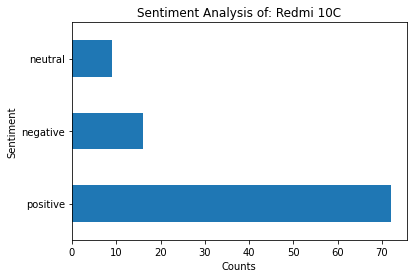

None

Positive Summary: 
।  ধন্যবাদ দারাজকে অফিসিযাল ফোন দেযার জন্যসেলারকেও ধন্যবাদ কোনো সমস্যা নেই আপনারা নিতে পারেন।  আলহামদুলিল্লাহ অনেক ভালো একটি পোডাক্টধন্যবাদ সেলারকে খুব তারাতাড়ি ফোনটি হাতে পেয়েছি সবকিছু ঠিকঠাক তবে একটি ব্যাক কাভার দেয়া দরকার ছিল সাথে ওয়াটেন্টি কার্ড।  খুব ভালো মানের মোবাইল এই দামে।  খুব ভালো হয়েছে।  কোনো অভিযোগ নেই একদম ঠিকঠাকই পেযেছি প্যাকেজিং ভালো ছিলো এবং ডেলিভারি ভাইযা সুন্দর ভাবে পৌঁছে দিযেছে ধন্যবাদ দারাজ কে।  আলহামদুলিল্লাহ ভালো প্যাকেট ইনটেক ছিল ডেলিভারি একদিনে পেযেছি ধন্যবাদ দারাজ অ্যান্ড সেলার।  অসাধারণ ফোন আর একদিন পরেই ডেলিভারি পেয়েছি ডেলিভারি ম্যান ও অনেক ভালো মানুষ ছিলেন।  অল্প সময়ের মধ্যে হাতে পেয়েছি প্রোডাক্ট ও ভালো অাপনারাও নিতে পারেন।  অরিজিনাল অফিসিযাল ফোন পেযেছি দারাজ এবং সেলার কে ধন্যবাদ।  মাকে গিফট দিয়েছি মোবাইলটা দাম হিসেবে অনেক ভালো।  সব কিছু ঠিকমত ডেলিভারি পেয়েছি ধন্যবাদ সেলারকে।  পারফরম্যান্সের দিক থেকে এই বাজেটে বেস্ট একটা ফোন।  অথেনটিক প্রোডাক্ট ভালো চলছে।  অরিজিনাল পন্য ধন্যবাদ দারাজ।  পপ্রোডাক্ট একদম পাফ্যাক্ট।  ভালো ভাবে হাতে পাইছ

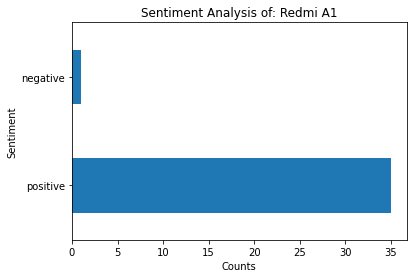

None

Positive Summary: 
।  খুব ভালো হযেছে ফোনটা আমি নিজে কিনেছি আপনারা ও কিনুন খুব ভালো সার্ভিস দে ফোনটা ধন্যবাদ দারাজ।  খুব দ্রুত ডেলিভারি পেয়েছি ধন্যবাদ দারাজ।  অনেক সুন্দর ফোন ধন্যবাদ সেলার কেধন্যবাদ ডারাজ।  যেমনটা চেয়েছি তেমনি পেয়েছি ডেলিভারি খুব দ্রুত পেয়েছি ধন্যবাদ দারাজ।  অনেক সুন্দর ফোন ধন্যবাদ সেলার কে।  কম বাজেটে শাওমি ব্রান্ডের ফোন খুবই ভালো।  এই বাজেট হিসেবে চলে চার্জ ভালো থাকে।  স্লো মনে হচ্ছে মোটামুটি বাজেট থাকলে ভালোটা নেয়া উচি।  অনেক ভালো লাগতেছে।  অসাধারণধন্যবাদ শাওমি।  অল্প দামে সুন্দর ফোন।  ধন্যবাদ।  ফোন হাতে পাওযার আগেই রিভিউ দেওযার সুযোগ দেযার জন্য ধন্যবাদ।  খুবই ভালো একটা সাধ্যের মধ্যে সবটুকু সুখ।  প্রত্যাশা থেকেও ভালো পেয়েছি আলহামদুলিল্লাহ।  অনেক ভালো হযেছে

Negative Summary: 
।  মোবাইল হাতে পেযেছি ঠিক আছে আন-অফিসিযাল মোবাইল দেওযা হযেছেক্যাশ মেমো ছাডা ফোন দেওযা হযেছেদারাজ থেকে পাঁচশ শূন্য টাকা কমে মোবাইল টি কিনেছি সময স্বল্পতার কারণে মার্কেট থেকে কেনা হযনি তাই বলে দারাজ আহামরি কোন ডিসকাউন্ট দেযনি দারাজ এর বিরুদ্ধে ভোক্তা অধিদপ্তরে কমপ্লেন করা হবে এবং মামলা করার 

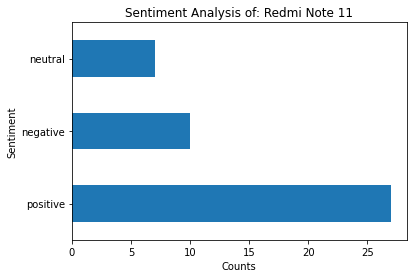

None

Positive Summary: 
।  সব কিচু ভালোভাবেই পেয়েছি ব্যবহার করলে বুঝা যাবে ভেল্যু ফর মানি কিনা।  আলহামদুলিল্লাহ খুব দ্রুত সময়ে অর্ডারের বিশ ঘন্টা পড়েই হাতে পেয়েছিদারাজের এক্সপ্রেস ডেলিভারি তে আমি সন্তুষ্ট সেট ব্যবহার করে বুঝা যাবে সার্ভিস কেমন।  আলহামদুলিল্লাহ প্রোডাক্ট হাতে পেয়েছি সার্ভিসম্যান এ-র ব্যবহার সন্তোষজনক ছিল কিন্তু ভাউচার পাইনি এটা ভালো লাগেনি সেলার এ-র উচি ছিল ভাউচার সাথে দেওয়া।  অর্ডার দেওয়ার দুই দিনের মধ্যেই পেয়েছি আলহামদুলিল্লাহ জিনিসটা খুব ভালোই ধন্যবাদ দারাজ।  হাতে পেলাম এখন ব্যবহার করে দেখি কেমন তবে মোবাইলটি সত্যিই দেখতে সুন্দর।  যেমন চেয়েছিলাম তেমন পেয়েছি ডেলিভারি ম্যান ভালো ছিল ধন্যবাদ দারাজ কে।  সবকিছু ঠিকমতো পেয়েছি সময় মত পেছানোর জন্য সেলারকে ধন্যবাদ।  অর্ডারের পরের দিনই ডেলিভারি পেয়েছি খুবই ভালো সার্ভিস।  ভালো ছিলোশুধু ডেলিভারি দিতে দেরি করছে।  ভালোই মনে হচ্ছে এখন পর্যন্ত।  সবকিছুই ঠিকঠাক পেয়েছি।  মোবাইল ফোনটি খুবই ভালো।  এত ভালো না

Negative Summary: 
।  হয়েও করা শুরু করে দিয়েছে অফিসিয়াল প্রাইসে আনঅফিসিয়াল ফোন সেল করছে ইচ্ছাকৃতভাবে এটার আন অফিসিয়াল প্রাইস ১৯

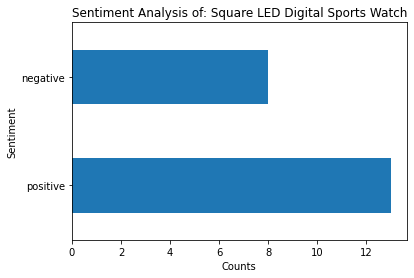

None

Positive Summary: 
।  আলহামদুলিল্লাহ পণ্যটা ভালো চাইলে সবাই কিনতে পারেন।  এত কম দামে পেয়েছি এসমাট ঘরি আপনারা কিনতে পারেন ধন্যবাদ দারাজ।  এতো কম দামে এর থেকে ভালো কিছু আশা করা যায় না।  এটা একটা ভালো দিয়েছে আর একটা পুরাই খেলনা লাগেবেশি ভালো লাগে নাই।  একটা ঘড়িতে সমস্যা আছে তবে ঘড়ি দুটি পছন্দ হয়েছে।  আসলেই ঘড়ি গুলো অসাধারণদাম কমজিনিস ও সুন্দর।  চাইছি একরকম দিছে আরেকরকম ঘরির বেল্ট বাঁকা।  দাম অনুযায়ী ঠিক আছে।  নাইস প্রডাক্ট।  ভালোই

Negative Summary: 
।  মাদারচোত কুত্তার বাচ্চা একটা ঘড়ি বাঁকা আরেকটির ব্যাটারি নষ্ট টাকা মারা খাইলাম।  ভাই ভালো ঘরি না থাকলে দিস না নষ্ট জিনিস দিয়ে মানুষকে ঠকাস কেন দারাজ এর ওপর থেকে বিশ্বাস উঠে যাচ্ছে।  এটা একটা ফালতু প্রোডাক্ট কেউ কিনবেন না।  আপনাদের সার্ভিস ভালো বাট একটা ওযাচ ভালো হযেছে আরেকটা টাইম নষ্ট ঠিক হয না একটা নষ্ট আরেকটা ভালো তাই কেউ না জেনে কিনবেন না আগে জেনে শুনে বুঝেন তারপরে কিনবেন।  ভাই আমাকে এটা কি দিলেন ভাই আমি একটা জিনিস অডার করলাম তাওয ভালো জিনিস দিলেন না।  ছবির সাথে কোনো মিল নেই একটা ভালোদিছে আর একটা নষ্ট।  কী দিলেন ভাই ফালতু জিনিস

Ne

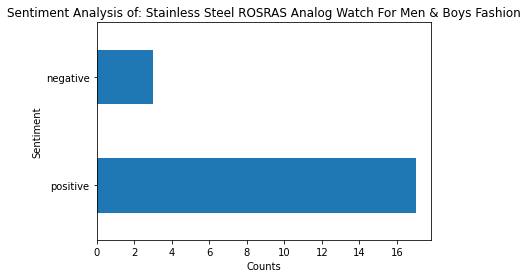

None

Positive Summary: 
।  ভালো প্রডাক্ট মাশা-আল্লাহ ধন্যবাদ সেলারকে।  ঘডিটা খুবই ভালো।  আলহামদুলিল্লাহ পন্যটি আমার কাছে ভালো লেগেছে।  অনেক ভালো হয়েছে।  আলহামদুলিল্লাহ ভালো লেগেছে।  ভালোই ছিলো

Negative Summary: 
।  ফালতু একটা প্রোডাক্ট লিখা টা রাইট পজিশন এ বসে নাই একদম থার্ড ক্লাস।  খুবই বাজে প্রডাক্ট ঘড়িটা চলে না নষ্ট ঘড়ি দিয়ে দিছে আমাকে।  দেখায় তো ভালো বাট ঘষা খেয়ে কিছু জায়গার রং এখনি উঠে গেছে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: WRM10 - PU Leather Wrist Watch For Men - Brown

positive_score is : 88.2
negative_score is : 7.5
neutral_score is : 4.3
Visual: 


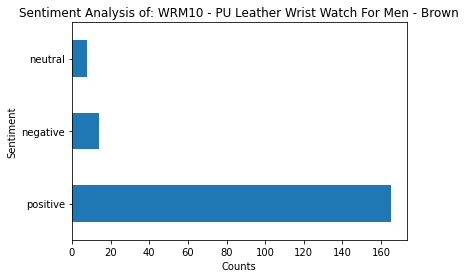

None

Positive Summary: 
।  প্রোডাক্ট একদম যেমন চেয়েছিলাম তার থেকেও ভালোএই দামে এটা বেস্ট চয়েছ হতে পারেঘড়িটা দেখতেও অনেক সুন্দর।  খুব ভালো ঘড়ি টা আপনারা নিতে পারেন ছবিতে যেমন দেখেছি তার চেও অনেক সুন্দর।  যা ভেবেছিলাম তার থেকে অনেক ভালো।  কমের মধ্যে যথেষ্ট ভালো ধন্যবাদ দারাজ।  খুবই ভালোসবাই নিতে পারেনআমি খুশি হইয়েছিথ্যানক্স সেলার ভাই১০১০ প্রোডাক্টটাইমের মধ্যে দিছে।  ঘড়িটি সুন্দর কিন্তু ফিতার কোয়ালিটি আরেকটু ভালো করা উচিত ছিল।  খুব সুন্দর একটা ঘরি ধন্যবাদ সেলার কে ভালো প্রোডাক্ট দেওযার জন্য চাইলে আপনারাও নিতে পারেন।  অনেক ভালো একটা ঘড়িচাইলে সবাই নিতে পারেন।  ঘডিটা আমার খুবই ভালো লেগেছে ঘডিটা অনেক সুন্দর চাইলে আপনারাও নিতে পারেন।  মুটামুটি ভালো লাগলো না।  ঘডিটা খুবই সুন্দর ভালো।  দামের মধ্যে মান ভালো।  দাম ওননুযায মোটামুটি।  খুব ভালো একটি প্রোডাক্ট দাম উনুজায়ী একদম পারফেক্ট।  কম দামে অনেক ভালো জিনিস পেয়েছি আপনারা নিতে পারেন।  মোটামুটি ভালো।  ওয়াচ টা ভালোই তবে বেল্টের কোয়ালিটি ভালো না।  অনেক সুন্দর একটা ঘডিধন্যবাদ সেলার কে।  অনেক ভালো যেমন চেয়েছি তেমন পেয়েছি।  আলহামদুলিল্লাহ ঘডিটি অনেক ভা

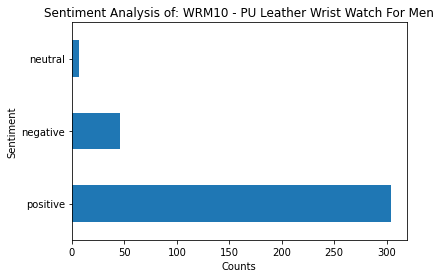

None

Positive Summary: 
।  আলহামদুলিল্লাহ ওযাডার দুইদিনের মধ্যে দিযে গেছেদাম হিসাবে প্রোডাক্টটা ভালোই।  অনেক ভালো একটা ঘড়ি।  ঘড়িটা সুন্দর আছে যেমন ছবি তেমনটি দিয়েছে তবে ঘড়ির বেল্টটা আরো ভালো হওয়া দরকার বেল্টটা আনকম্ফোডেবল।  অর্ডার অনুযাযী সঠিক ঘডি পেযেছি দেখতেও সুন্দর ভীষণ ভালো লেগেছে অনেক কম দামের সুন্দর ঘডি ধন্যবাদ দারাজ কে।  ধন্যবাদ দারাজকে এটা আমার প্রথম অর্ডার ছিল আলহামদুলিল্লাহ ঠিক মতো পেয়েছিঘরিটি বেশ ভালো মানায়কম দামে সুন্দর একটি ঘড়িমোঃ নিরব শরিয়াতপুর।  প্রডাক্ট ভালোই ছিলোবেল্ট এর কোয়ালিটি একটু ভালো করলে আরো ভালো হত।  খুব সুন্দর একটা ঘড়ি এই দামে অসাধারণ নিশ্চিন্তে নিতে পারেন।  অনেক সুন্দর একটা প্রডাক্ট তবে বেল্টা আর একটু ভালো হলে ভালো হতো ধন্যবাদ দারাজ সেলার কে।  সবাই নিতে পারেন ডেলিভারি বয় বেশ ভালো।  ভালো আছে কিন্তু ফিতাটা একটু নর্মল মার্ক একশ আট।  অনেক ধন্যবাদ অনেক ভালো লাগলো প্রডাক্টটা।  মোটামুটি বেল্ট কোয়ালিটি তেমন ভালো না।  -শপে ফুটপাতে আরো কম দামে এর চাইতে ভালো ঘডি পাওযা যায।  যেমন অর্ডার দিয়েছি তেমনি পেয়েছি কমের মধ্যে এটা ভালো।  দাম হিসাবে অনেক টা ভালো নিতে পারেন আমার পছ

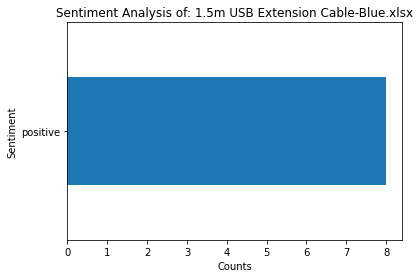

None

Positive Summary: 
।  জং ধরা ছিলো।  ভালো

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 1.5miter 3.5mm Audio Extension Cable Stereo Headphone Cord Male to Female.xlsx

positive_score is : 87.1
negative_score is : 12.9
neutral_score is : 0.0
Visual: 


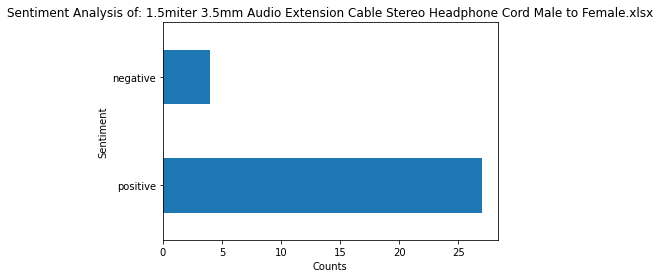

None

Positive Summary: 
।  আলহামদুলিল্লাহ অনেক ভালো ছিল।  জিনিস ভালো পেয়েছিকিন্তু কেমন চলবে জানিনা দেখাযাক।  সেলার কে ধন্যবাদ ভালো একটা কেবল দেওযার জন্য।  ভালোই।  ভালো ছিলো ভালো।  খুবই ভালো কোযালিটির প্রোডাক্ট এবং প্রোডাক্টটি মানসম্পন্ন।  ক্যাবলটা একটু চিকন কিন্তু কোয়ালিটি ভালো।  খুব একটা ভালো হয়নি।  অনেক ভালো।  ভালো প্রোডাক্ট

Negative Summary: 
।  এক কথায় ভাল প্রডাক যা চেয়েছি তাই পেয়েছি নিতে পারেন আমি নিয়েছি ভাল প্রডাক যাদের পিছনে বা সামনে নস্টো পিছন বা সামনে থেকে সামনে টেনে আনবেন বা পোট বারাবেনবা নানান কাজে ব্যাবহার করতে পারবেন।  সাউন্ড কুয়ালিটি ভয়ানক খারাপ কর্ড টা অনেক লুজ মোবাইলে সাউন্ড ঘের ঘের করে কম্পিউটার এ মোটামুটি চলে আমার মতে এই প্রোডাক্ট না নেয়ায় উত্তম।  খুবই ফালতু একটা প্রোডাক্ট এটা দিযে হেডফোন কানেক্ট করলে প্রচুর আজগুবি শব্দ হয প্রচুর নযেজ আসে।  ফালতু জিনিস মোটেই স্টেরিও না এক কান বাজে না উলটা পালটা কাজ করে একাই মিউজিক প্লে হয় এসিস্ট্যান্ট ওয়েক হয় ভলিউম কমে বাড়ে কেউ কিনবেন না

Neutral Summary: 
Not found

------------------------------------------------------------------

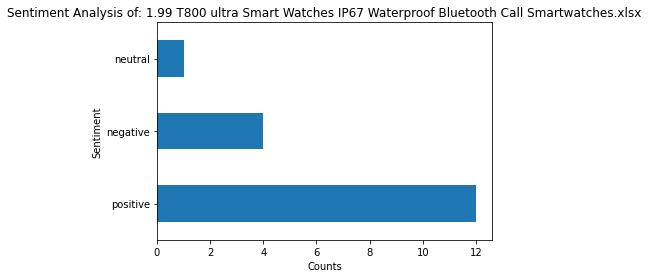

None

Positive Summary: 
।  প্রথমেই যেটা না বল্লেই নয় তার কারণ এই টা একটা চাইনিজ প্রোডাক্ট ডেলিভারি একটু তারা তারিই দিয়েছে আমাকে প্রসঙ্গ যখন স্টমাট উচ্ছ নিয়ে সাউন্ড কয়ালিটি একটু বাজে তার পরেও সব কিছু মানিয়ে নিয়েছি সেলার ভাই আমাকে বলেছিল যে ৫-৭ দিন চার্জিং বেকাপ দিবে কিন্তু চার্জ থাকে ১-২ দিন সব কিছু মিলিয়ে এত কম রেটের মধ্যে নেওয়া ভালো আপনারা সবাই নিতে পারেন।  আলহামদুলিল্লাহ খুব খুব খুব ভালো প্রোডাক্ট আপনারাও নিতে পারেন।  অনেক অপেক্ষার পর ঘডিটি পেলাম ঘডিটি হাতে পাবার পর অপেক্ষা ভুলে গেলাম সবাই চাইলে নিতে পারেন ধন্যবাদ সেলার ভাইকে এতো সুন্দর ভাবে ঘডিটি নিযে আসার জন্য আর ভালো ভাবে দেওযার জন্য।  অনেক সুন্দর একটি ঘডি সবাই নিতে পারেন।  দাম কম হলেও মনের মত হয়েছে আমার ধন্যবাদ আপনাদের।  মোটামুটি ভালোই আপনারা চাইলে নিতে পারেন।  ভালো লাগছে কিন্তু এই রং এর বেল্ট ময়লা হয়ে যায়।  ধন্যবাদ দারাজ।  আমার ঘড়ি সমস্যা আছে সদু কাপে আর বেল্ট ভালো সাইট বাটন কাজ করে না

Negative Summary: 
।  এটা একটা বাজে প্রোডাক্ট কথায কাজে কোন মিল নাই আমি কিনছি যে প্রায দুই সপ্তাহ হবেযখন এটা আমি হাতে পাই তখন সাথে সাথে আমি এটা

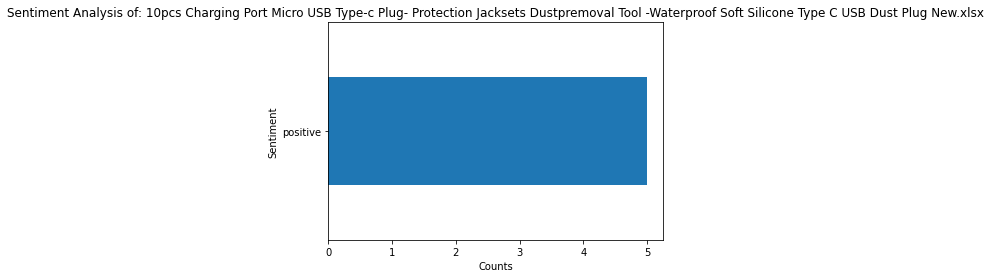

None

Positive Summary: 
।  দাম হিসেবে মোটামুটি চলে ভালোভাবে ফিটিং হয না তাই হতাশ হলাম নব্বইতিন টাকায কিনেছি দাম আরো কমানো উচিত আশা করি ভবিষ্যতে আরো কম দামে পাব ছবির সাথে মিল ছিল দশচার দিনে ডেলিভারি পেযেছি প্যাকেজিং মোটামুটি ছিল প্যাকেজিং আরো ভালো করা উচিত সেলার ভাইযের রেসপন্স ছিল না নতুন পণ্য দেযা হযেছে উপাদন ০০-০০-০০০০ মেযাদ শেষ ০০-০০-০০০০ আশা করি ভবিষ্যতেও ভাল সার্ভিস পাব সবকিছুর জন্য ধন্যবাদ।  দশ পিস দেওযার কথা দশ পিস ই পাইছিকিন্তু সমস্যা হইলো এগুলো প্রাযই হারিযে যায।  ভালোই তবে অর্ডারের সময় খেয়াল করিনি যে একটা অর্ডার করছি যাই হোক আবারো অর্ডার করেছি হাতে পাইনি এখনো।  কাজের জিনিসতবে দামটা একটু বেশিচাইলে নাইট পারেন।  অসাধারণ তবে ছোট জিনিসতো হারায় যায়

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 116 Plus Heart Rate Wristband Blood Pressure Pedometer Fitness Tracker Bracelet Sports Waterproof.xlsx

positive_score is : 80.8
negative_s

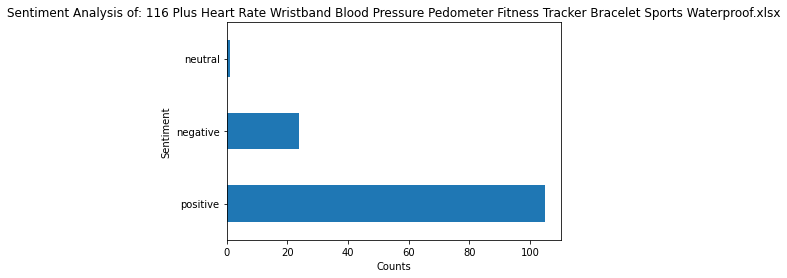

None

Positive Summary: 
।  খুব ভালো একটা ঘড়ি ধন্যবাদ কে।  আমি ভাবতেও পারি নি এত কম দামে এত ভালো একটা ঘড়ি পাবো ধন্যবাদ দারাজ কে।  সেলারকে অনেক ধন্যবাদ।  খুবই সুন্দর ঘড়িতবে বিশচার ঘন্টা ফরমেট সময় তাছাড়া সব দিক থেকে ভালো ঘড়ি নিতে পারেন সবাই।  ধন্যবাদ সেলার কে আপনারা চাইলে নিতে পারেন অনেক ভালো।  দাম হিসেবে অনেক ভালো খুবই সন্তোষজনক ধন্যবাদ।  সত্যি অসাধারণ একটি ঘড়ি চাইলে নিতে পারেন।  অনেক ভালো লাগলো ধন্যবাদ আপনার সবাই নিতে পারেন।  সবাই নিতে পারেন খুব ভালো সেলার ভাইকে।  খুব ভালো অনেক সুন্দর হযেছে।  মোটামুটি ভালো হযেছে দেখি কযদিন চলে।  ঘডিটা খুবই ভালো আমার খুব ভালো লেগেছে।  সব ভালো কিন্তু টাইম ঠিক হচ্ছে না।  ভালোই আছে নিতে পারেন।  গরি ভালো পেয়েছি।  হিসাবে মোটামুটি ভালো তবে চাজৃ একটু কম থাকে মোটামুটি বিশচার।  এমনিতে মোটামুটি ভালো কিন্তু চার্জ থাকে না।  অনেক ভালো ঘড়ি এটাচার্জ ভালো থাকে অনেক ধন্যবাদ।  ঘডিটা মোটামুটি ভালো বেশি একটা ভালো না।  ঘডি টা অনেক ভালোসঠিক সমযে পাইছি আমি।  এই ঘড়ি টা কেও কিনবপ না এটা ভালো না।  খুব বেশি ভালো না আর দামটা একটু বেশি।  ঘরিটা ভালোই লাগলো ধন্যবাদ।  মোটামুটি ভাল আছে

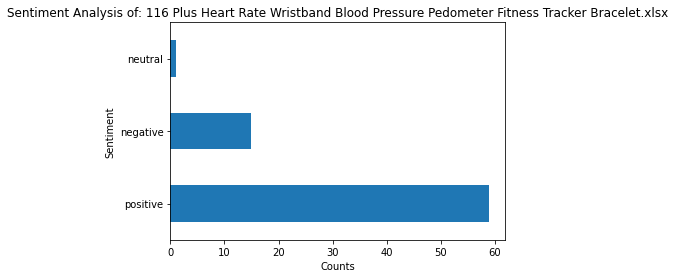

None

Positive Summary: 
।  মোটামুটি ভালো হযেছে দেখি কযদিন চলে।  ঘডিটা খুবই ভালো আমার খুব ভালো লেগেছে।  সব ভালো কিন্তু টাইম ঠিক হচ্ছে না।  ভালোই আছে নিতে পারেন।  গরি ভালো পেয়েছি।  হিসাবে মোটামুটি ভালো তবে চাজৃ একটু কম থাকে মোটামুটি বিশচার।  এমনিতে মোটামুটি ভালো কিন্তু চার্জ থাকে না।  অনেক ভালো ঘড়ি এটাচার্জ ভালো থাকে অনেক ধন্যবাদ।  ঘডিটা মোটামুটি ভালো বেশি একটা ভালো না।  ঘডি টা অনেক ভালোসঠিক সমযে পাইছি আমি।  খুব বেশি ভালো না আর দামটা একটু বেশি।  ঘরিটা ভালোই লাগলো ধন্যবাদ।  ভালো কিন্তু প্লাস্টিক বডি।  দাম অনু্যায়ী অনেক ভালো।  আলহামদুলিল্লাহ ভালো ছিল।  ভালো অনেক ভালো।  পণ্য টি খুবই ভালো।  ভালো।  ভালো।  দাম অনুযাযী এর যথেষ্ট ভালো হিসেবে

Negative Summary: 
।  ফালতু একটা ঘড়ি আনা সাথে সাথে ডিসপ্লে গেছে গা।  একদম বাজেখুবই খারাপ।  নষ্ট ঘড়ি দিয়েছে আমাকে।  একটা ফালতু প্রডাক্ট।  ফালতু ঘরি

Neutral Summary: 
।  এভারেজ প্রোডাক্ট তবে দাম বিবেচনায় ঠিকঠাক
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 18W Type 

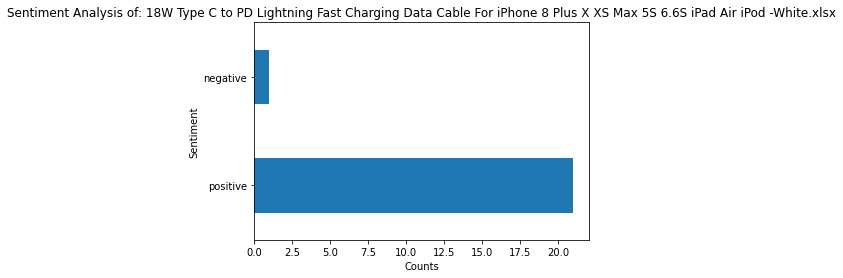

None

Positive Summary: 
।  প্রোডাক্ট কোয়ালিটি খুবই ভালো এবং দেখতে ও অনেক সুন্দরসবকিছু ঠিকঠাক ধন্যবাদ কে।  কথা কাজে মিল পাইছি ধন্যবাদ দারাজ।  ভালো মানের একটা প্রডাক্টধন্যবাদ।  প্রডাক্ট ভালো পেয়েছি ধন্যবাদ।  আলহামদুলিল্লাহ জিনিসটা অনেক সুন্দর মান অনেক ভালো সবাই নিতে পারেন ধন্যবাদ সেলারকে।  আমার মোবাইলে ভালোমতো সাপোর্ট করে না।  টা ভালো নিতে পারেন আপনারা ধন্যবাদ ডারাজ

Negative Summary: 
।  মোবাইল থেকে পেনড্রাইভে কপি করতে গেলে নব্বই হয় বাকিটা হয়না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 2 in 1 OTG Cable Adapter USB 3.0 Female To Micro USB Male and USB C Male Connector Aluminum Alloy on The Go Converter, OTG cable, OTG adapter, type C otg, micro usb OTG, Otg converter, 2-in-1 OTG A.xlsx

positive_score is : 75.0
negative_score is : 25.0
neutral_score is : 0.0
Visual: 


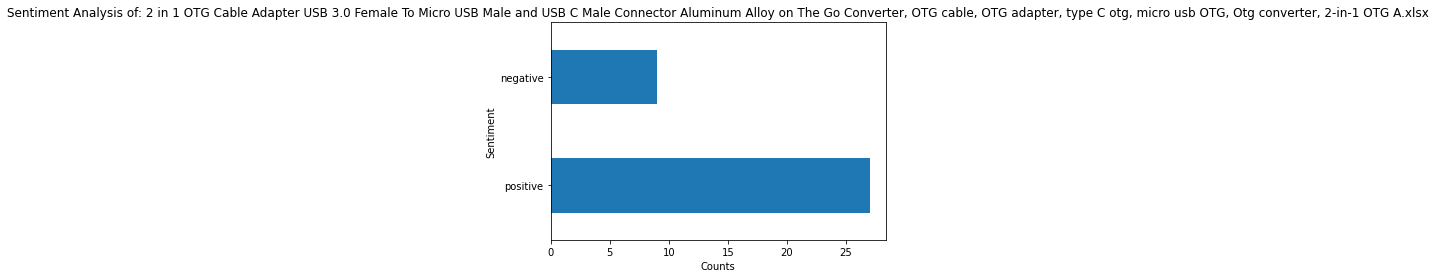

None

Positive Summary: 
।  আলহামদুলিল্লাহ দাম হিসাবে অনেক ভালো।  অনেক সুন্দর সেলারকে ধন্যবাদ।  এটাও ঠিক ছিল অনেক ভালো।  মোটামুটি ভালোই চলে।  অসম্ভব ভালো।  কেবল টা অনেক ভালো।  ভালো।  প্রোডাক্টটি ভালো ছিল কিন্তু দামটা একটু বেশি।  মোটামুটি ভালো একটি প্রোডাক্ট ধন্যবাদ।  হাতে পাইলাম ভালো কোয়ালিটি।  ভালো প্রোডাক্ট

Negative Summary: 
।  নষ্ট জিনিস দিয়েছে।  নষ্ট

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 2 in1 OTG USB Cable Adapter Micro USB Type C To USB Converter Mini Short Micro USB Cable.xlsx

positive_score is : 68.2
negative_score is : 27.3
neutral_score is : 4.5
Visual: 


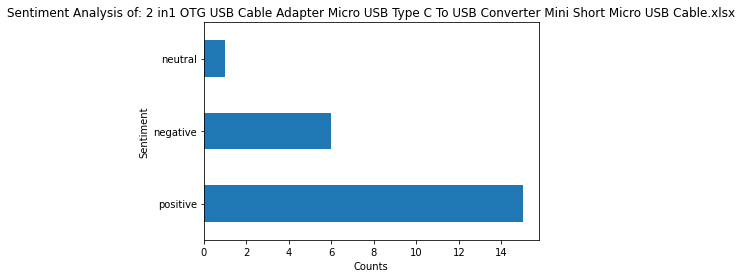

None

Positive Summary: 
।  ছবির সঙ্গে মিলেছে দেখতেও খারাপ নাফিচার গুলো খুব ভালো।  ভালো স্মার্ট ওযাচ।  অনেক ভালো লাগলো সবাই কনতে পারেন।  পন্যটি সে রকমের খুব ভালো।  খুবই ভালো।  ছবির সঙ্গে মিলেছে দেখতেও খারাপ নাফিচার গুলো খুব ভালো

Negative Summary: 
।  শালা কুত্তার বাচ্চা সিলভার কালার করছি পিংক কালার ডেলিভারি দিলো তা আবার ইউজ করা রঙ ঊঠানো জারজ সেলার।  এমন একটা ঘড়ি দিলেন ঘড়ির চার্জার নষ্ট এখন চার্জ কি দিযে দিবো ভাই দয়া করে এ ধরনের প্রতরনা করবেন নাকোন জিনিস দিতে গেলে আগে চেক করে দিন আর এটা চেঞ্জ করার ব্যবস্থা নিন।  সেলার ভাই আমি আপনার থেকে একটা নিয়েছি কিন্তু এটা চার্জ মোটেই থাকে না এখন আমাকে এটা পরিবর্তন করে দিতে হবে এটা কিভাবে করবেন দয়া করে আমাকে একটু জানান।  শালা কুত্তার বাচ্চা সিলভার কালার করছি পিংক কালার ডেলিভারি দিলো তা আবার ইউজ করা রঙ ঊঠানো জারজ সেলার।  এমন একটা ঘড়ি দিলেন ঘড়ির চার্জার নষ্ট এখন চার্জ কি দিযে দিবো ভাই দয়া করে এ ধরনের প্রতরনা করবেন নাকোন জিনিস দিতে গেলে আগে চেক করে দিন আর এটা চেঞ্জ করার ব্যবস্থা নিন

Neutral Summary: 
।  ঘড়ি টা মোটামুটি তবে একটাই সমস্যা প্রতি বিশচার ঘন

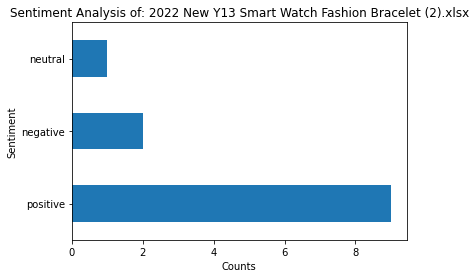

None

Positive Summary: 
।  ভালো স্মার্ট ওযাচ।  চার্জ কম টিকে।  ছয় দিন পরে রিভিউ দিচ্ছি খুব ভালো চার্জ থাকে ধন্যবাদ সেলার কে এবং দারাজ কে।  কেউ নিতে চাইলে নিসন্দেহে নিতে পারেন।  অনেক ভালো লাগলো সবাই কনতে পারেন।  পন্যটি সে রকমের খুব ভালো

Negative Summary: 
।  এই কোম্পানির নামে মামলা করার দরকার শুযোরের বাচ্চারা কথার সাথে কাজের সাথে কোন মিল রাখে না অর্ডার করছি চেঞ্জ দিসে লেদারের এদের জন্য দারাজ কোম্পানির বদনাম হচ্ছে আমি ঘডিটা ফেরত দিযেছি ভালো মানুষের মত আমার টাকাটা যাতে আমার বিকাশে দিযে দেন এ পর্যন্ত আমি টা পণ্যের অর্ডার করেছি কোনোটা খারাপ করেনি এই প্রথম এটা খারাপ করেছে আশা করি আমার কথাটা আপনারা বুঝতে পেরেছেন।  সেলার ভাই আমি আপনার থেকে একটা নিয়েছি কিন্তু এটা চার্জ মোটেই থাকে না এখন আমাকে এটা পরিবর্তন করে দিতে হবে এটা কিভাবে করবেন দয়া করে আমাকে একটু জানান

Neutral Summary: 
।  ঘড়ি টা মোটামুটি তবে একটাই সমস্যা প্রতি বিশচার ঘন্টায় দশ মিনিট স্লো হয় যেটা বিরক্তিকর
-------------------------------------------------------------------------------------------------------------------------
 

Produ

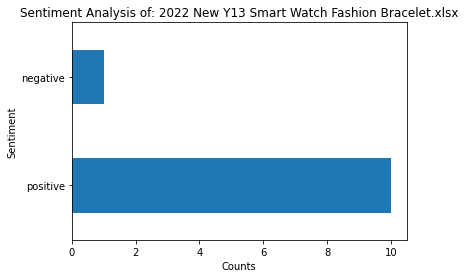

None

Positive Summary: 
।  খুবই ভালো।  অসাধারণ যেমনটা দেওযার কথা ঠিক তেমনি দিযেছে খুব ভালো ছিল।  কপি হওযার গতি খুব কম কিন্তু প্রোডাক্টের আউটসাইড কোযালিটি ভালো আছে।  ভালো

Negative Summary: 


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 20W USB-C to Lightning PD Data Cable for iPhone.xlsx

positive_score is : 87.5
negative_score is : 12.5
neutral_score is : 0.0
Visual: 


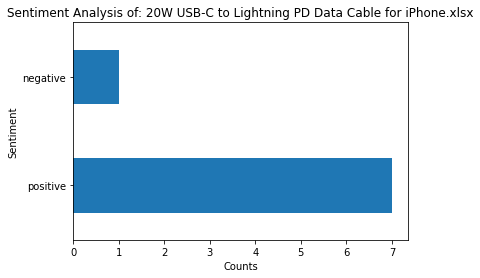

None

Positive Summary: 
।  আলহামদুলিল্লাহ প্রোডাক্টটি ভালো দাম হিসাবে যেমন চাইছিলাম তেমন পাইছি বাট ইউজ করিনি এখনো হযতো রং উঠে যাইতে পারে আস্তে আস্তে প্রোডাক্টটি দেখতে খুব সুন্দর প্রোডাক্টটি হাতে পেতে আমার ১৫-১৬ দিন লাগছেআপনারা চাইলে নিতে পারেন খারাপ না ভালো আছে।  আলহামদুলিল্লাহ অনেক ভালো কিন্তু একটু সময় লাগছে ব্যাপার নাহ।  প্রোডাক্ট ভালো কিন্তু মোটা হাতে খুব টাইট হয তাছাডা সব ঠিকঠাক যা চেযেছি তাই পেযেছি।  ধন্যবাদ দার আজকে এত সুন্দর একটা জিনিস দেওযার জন্য যেরকম দেখছি সেরকমই পাইছি সেলারও অনেক ভালো ছিল ধন্যবাদ দারাজ।  যেটা চেয়েছি সেটাই পেয়েছি অনেক সুন্দর ধন্যবাদ।  আলহামদুলিল্লাহ যেমন দেখেছি ঠিক তেমনই

Negative Summary: 
।  ভাই বুঝলাম না এক সপ্তাহ গেলোনা রং উঠে গেল

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 2in1 OTG USB Cable Adapter Micro USB Type C To USB Converter Mini Short Micro usb Cable USB C Charging Charger Cable.xlsx

positive_score is : 83.3
negative_sco

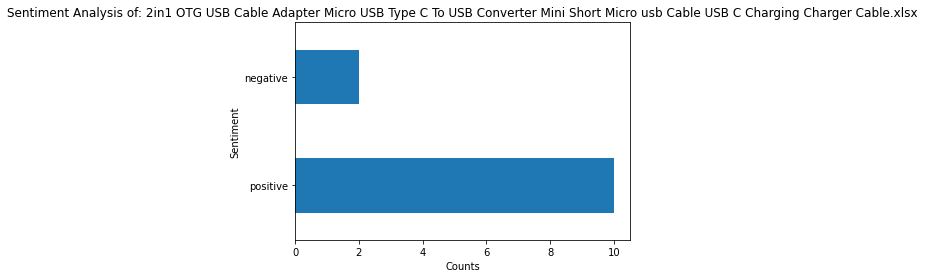

None

Positive Summary: 
।  খুব সুন্দর দেখতে আপনারা ও নিতে পারেন।  জিনিস টা অনেক ভালো।  ধন্যবাদ দারাজ খুবি সুন্দর যেমন দেখেছি তেমন পেযেছি প্যাকেটিং খুব ভালো ছিল।  আলহামদুলিল্লাহ্ ছবিতে যেমন দেখছি তেমনই পাইছি ধন্যবাদ দারাজ এবং সেলারকে।  হু দেখতে তো খুব সুন্দর ছিলো কিন্তুু জিনিসটা অনেক ভালো।  আলহামদুলিল্লাহ্ খুব সুন্দর হইছে।  যেমন দেখেছি তেমনি পেয়েছি ধন্যবাদ দারাজ কে।  খুব ভালো আপনারা চাইলে নিতে পারেন।  এইটা অনেক ভালো একটা ব্যাস লাইট

Negative Summary: 
।  খুব ছোট হাতে হয় না লোকাল প্রোডাক্ট মরিচা ধরে লক সিস্টেম খুব বাজে নিম্ন কোয়ালিটিরফুটপাতে এর চেয়ে ভালো পাওয়া যায় প্রতারক সেলার।  ভালো রিভিউ দিতে পারছি না কারন এই গুলা থেকে রঙ উঠে অবস্থা খারাপ

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 2pcs Heart Magnet Attract Couple Bracelet -Love Charm Jewelry -Stainless Steel Cuba Chain Bracelet Lover Jewelry for Women Men.xlsx

positive_score is : 95.2
negative_score is : 0.0


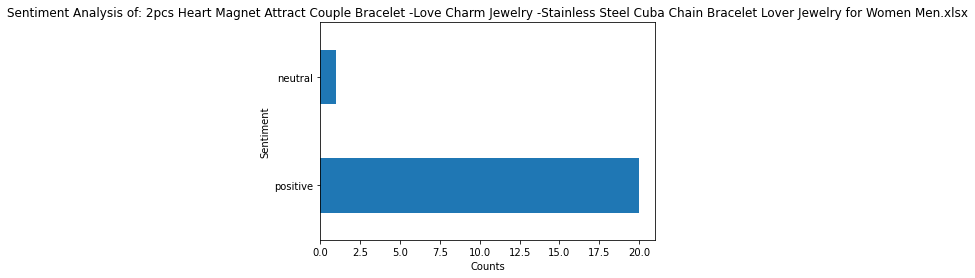

None

Positive Summary: 
।  সত্যিই ভালো ছিল যেটা চাইছিলাম সেটাই দিছে ধন্যবাদ।  এই প্রথম বার থেকে করছি আলহামদুলিল্লাহ অনেক অনেক সুন্দর হইছে আমার অনেক ভালো লাগছে টা।  মাশাল্লাহ যেমন আশা করেছিলাম তেমনই পেয়েছি আপনারা ও নিতে পারেন খুবই ভালো।  খুব ভালো প্রডাক্ট ধন্যবাদ দারাজ।  যেমন চেযেছি ঠিক তেমনটাই চেযেছি তবে চেনটা একটু লম্বা হলে ভালো হতো।  খুবই ভালো মান এর পণ্য।  আলহামদুলিল্লাহ ভালোই।  এটা অনেক ভালোকিন্তু চম্বুকটা সব সময় চেইনের সাথে লেগে থাকে।  অনেক ভালো লাগলো যেমন চাইছি ঠিক তেমন পাইছি ধন্যবাদ

Negative Summary: 
Not found


Neutral Summary: 
।  মোটামুটি ভাবছি একটু বড় হবে কিন্তু দিছে ছোটচলবে
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 2Pcspair Heart Shaped Magnet Attraction Bracelet For Couples Angel Wing Jewelry.xlsx

positive_score is : 84.8
negative_score is : 15.2
neutral_score is : 0.0
Visual: 


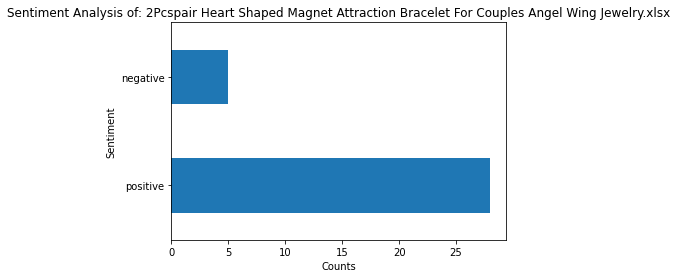

None

Positive Summary: 
।  ভালো প্রোডাক্ট।  খুব ভালো ছিল।  ভালো জিনিস।  ভালো না।  ভালো ছিল।  অনেক ভালো জিনিস পাইছি।  খুব ভালো প্রোডাক্ট।  পন্য যথেষ্ট ভালো।  মোটামুটি।  সেলার অনেক ভালো

Negative Summary: 
।  ভাল কিন্তু কিছুক্ষণ পরেই গরম হযে যায।  নষ্ট চার্জ হয় না।  মুটামুটি ভালো কিন্তু যারা ফাস্ট চাজিং লেখা দেখে অর্ডার করবেন তাদের বলছি এই কেবলটি টাকা নষ্ট করবেন প্লিজ

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 3 in 1 Fast Charging Luminous Magnetic USB Cable for All Mobile Phone.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


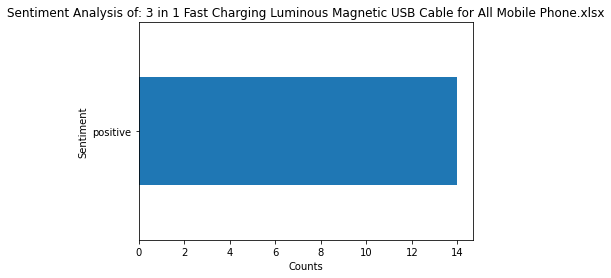

None

Positive Summary: 
।  অনেক ধন্যবাদ দারাজকে যেটা চেযেছিলাম সেটাই পেযেছি অরিজিনালটা দিযেছে।  আমি যেটা অর্ডার করেছি সেটাই পেযেছি ধন্যবাদ কে।  দারুন একটি প্রোডাক্ট ফাস্ট চাজিং হয যে কেউ নিতে পারেন।  আলহামদুলিল্লাহ কম দামে ভালো পণ্য এবং দেখতে অনেক সুন্দর।  প্রোডাকট টি শত্যি অসাধারন নিশ্চিতে নিতে পারেন সবাই।  আমি একটা নিয়েছি খুব ভালো একটা প্রোডাক্ট।  এক কথায অসাধারণ চার্জ ফাস্ট হয।  কেবোলটি ভালো দাম ও কম আছে।  খুব ভালো না।  দুটা নিয়েছিলাম ভালো জিনিস।  সবকিছু একদম ঠিকঠাক ছিল কোন রকম সমস্যা পাইনি কেবলটি ছিল অসাধারণ যা যা সাথে পেযেছি আইফোনের পয়েন্ট দুই - পোর্ট এর পযেন্ট তিন রেগুলার পোর্ট এর পযেন্ট পযেন্টিং চুম্বক শক্তির মাধ্যমে ক্যাবলের সাথে যুক্ত হয চাইলে মোবাইলে দিযে ঝুলিযে রাখা যায চুম্বক শক্তির মাধ্যমে তবে সাবধানে তারিখে ডেলিভারী পাওযার কথা ছিল তারিখে পেযে গেছি রাইডার টাও খুব ভাল ছিল

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 3 In

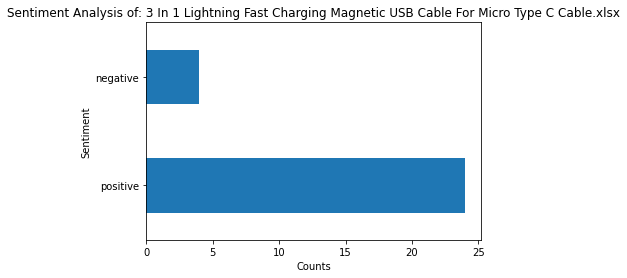

None

Positive Summary: 
।  অনেক সুন্দর একটা ক্যাবল সবদিক থেকেই পারফেক্ট চাইলে সবাই নিতে পারেন।  খুব ভালো ছিল ক্যাবলটা কিন্তু একটু সমস্যা ছিলো সেটা হলো ক্যাবলের পিন এর দিকে একটু মরিচাযঙ ধরা ছিল চার্জ খুব ভালো ওঠে।  ক্যাবলটা অনেক ভালো মানের ম্যাগনেট বেশ স্ট্রং স্ট্রিপ লাইট এর মতন লাইটিং হয় তিন টা পোর্টই পেয়েছি।  কেবল টা সত্যিই অসাধারণ যেমনটা চেযেছিলাম তেমনটাই পেযেছি ধন্যবাদ সেলার কে এবং দারাজ কে তবে চৌম্বক টি আরেকটু শক্তিশালী হলে ভালো হতো না হলে সেটি অল্পতেই চার্জার থেকে ডিসকানেক্ট হযে যায।  সব আলহামদুলিল্লাহ ভালো সন্তোষজনক কিন্তু ফাস্ট চার্জিং সাপোর্ট করে না ক্যাবল টাবাট এমনি সব ঠিক ই আছে।  আজকে হাতে পেয়েছি ভালো মানের কেবল ছাইলে নিতে পারেন।  যেমনটা চেযেছিলাম তেমনটা পাইছি কিন্তু চার্জ হওযার সময ক্যাবলের পিনটা গরম হযে যায।  ভালোই চার্জ ও ভালোই হয়।  দেখতে সুন্দর তবে চার্জিং কানেকশন স্লো।  ভালো তবে আইফোনের পোর্ট কাজ করেনা।  খুব সুন্দর প্রডাক্ট।  ভাল পন্যএইটি।  ভালো ছিল।  ভাল পন্যএইটি

Negative Summary: 
।  প্যাকেজিনটা একদমই ভালো ছিলো না খুবই নরমল পণ্যটি নষ্ট হয়ে যেতে পারতো যাহোক ভালো অবস্

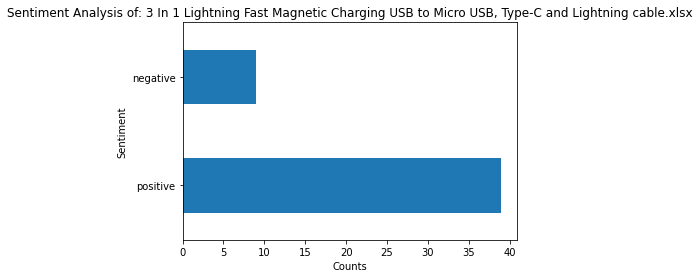

None

Positive Summary: 
।  ভালো ছিল।  আলহামদুলিল্লাহ ভালোধন্যবাদ বিক্রেতাকে।  মোটামুটি ভালো আছে নিতে পারেন।  আলহামদুলিল্লাহ ভাই ভালো।  কম দামে ভালো পন্য।  দাম অনুযায়ী ভালো।  ভালো প্রোডাক্ট।  মোটামুটি ভালো।  দারুণ ভালো।  খুব ভালো।  অনেক ভালো।  খুব ভালো।  ভালো

Negative Summary: 
।  খুব বাজে দুই দিন ব্যাবহার করার পর নষ্ট হযে গেছে টাকা দিযে কিনে একটা ডিম লাইট পেযেছি মানে শুধু আলো জলে মোবাইল চার্জ হয না।  চার্জ হয়না ৩৩ওয়ার্ড এডেপ্টার থেকে একশ তেরে দশপাঁচ পার্সেন্ট চার্জ হইছে একদম বাজে কারোর টাকা চিনিমিনি করলে নিতে পারেন।  কি বলবো ভাই একদুম বাজেনো চাজ কোন চার্জ হয না শুধু লাইট জলে আমি কি লাইট জলার লাইগ্যা নিশি।  এক দম ফালতু আপনারা টাকা নষ্ট করবে না চার্জ ফোনে জমে না শুধু দেখায় চার্জরহয় কিন্ত না না না।  পুরাই ভুয়া একটা জিনিস ১টা কেবললাইট জলে ফাস্ট চার্য হয় না।  চার্জার কেবল টি খুব খারাপ কারণ চার্জ উঠে না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 3 in 1 USB 2.4A supp

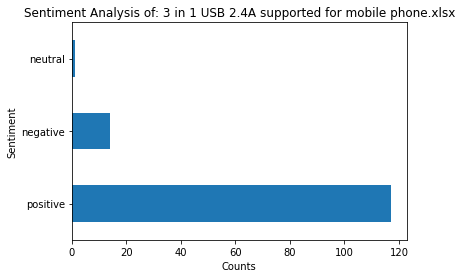

None

Positive Summary: 
।  অল্প টাকায ভালো জিনিস।  প্রোডাক্ট অনেক ভালো সবাই নিতে পারেন।  প্রোডাক্ট মোটামুটি ভালোইআপনারাও নিতে পারেন সেলারকে ধন্যবাদ।  ভালোই মনে হচ্ছে।  জি ভালো আললাহ রহমতে।  জিনিস আসলেই ভালো সবাই নিতে পারেন।  কম দামে ভালো জিনিস।  খুবই ভালো একটি প্রোডাক্ট ধন্যবাদ দারাজ ও সেলার কে।  চার্জার কেবিলটি ভালো পেযেছি ধন্যবাদ দারাজ কে।  ক্যাবলটি ভালো আপনারা নিতে পারেন।  আলহামদুলিল্লাহ মোটামুটি ভালো আছে।  আলহামদুলিল্লাহ ভালো প্রোডাক্ট।  ভালো ক্যাবল ধন্যবাদ।  আলহামদুলিল্লাহ ভালো।  খুব ভালো একটা জিনিস।  ধন্যবাদ খবুই ভালো।  ভালো মানে জিনিস।  মোটামুটি ভালোই।  মোটামুটি ভালোই।  অনেক ভালো ছিল।  মোটামুটি ভালো।  খুব ভালো চলছে।  খুব ভালো কেবল।  ভালো আছে।  বেশ ভালোই।  খুবইভালো।  অনেক ভালো।  খুব ভালো।  খুব ভালো।  ভালো না।  মোটামুটি।  ভালোই।  ভালো।  ভালো।  ভালো

Negative Summary: 
।  ভাল না ফালতু জিনিস।  আমাকে ঠকানো হযেছেআমি ইউএসবি মনে করে ওযাডার করেছিলামবেবহার করার পর দেখতেছি ইউএসবি নানরমাল চার্জ হয।  প্রোডাক্ট এর কোযালিটি ভালো আছে কিন্তু একটা পোর্ট নষ্ট সেটা হল লাইটিং পোর্ট।  ফালতু কেবল বাল

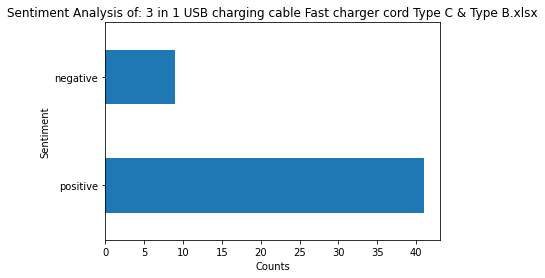

None

Positive Summary: 
।  চার্জি কেবলটা খুবই ভালো মানের আমি ব্যবহার করতেছি।  সবাই নিতে পারবেন খুব ভালো।  প্রডাক্টটি যথেস্ট ভালো।  ভালো নিতে পারেন।  অনেক ভালো।  ভালো।  ভালো।  ভালো।  দাম অনুযায়ী প্রডাক্ট খুবই ভালো পেয়েছি

Negative Summary: 
।  খুব বাজে একটা কেবলফাটা ছিলো চার্জ ও দেরিতে উঠে।  টাইপ সি পিন নষ্ট।  এক টা মাথা নষ্ট ছিলো।  পাস্ট চার্জ হয়না।  একবারে পালতু

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 3 USB Extension Cord 1.2m Splitter for Laptop PC Computer Cable Data Charger Phone Hub 3A Adapter.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


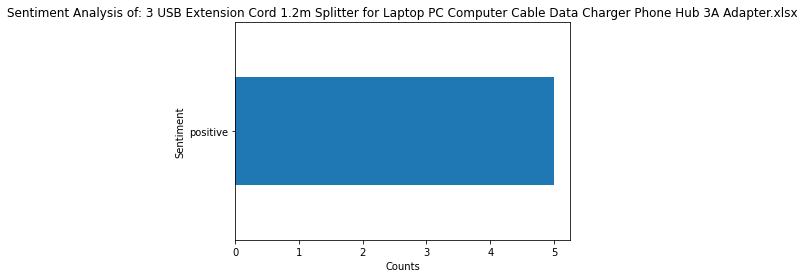

None

Positive Summary: 
।  আলহামদুলিল্লাহ অনেক সুন্দর।  এটাতে এক সাথে লাইন পায় না।  কম দামে খুব ভালো পন্য পেয়েছি ধন্যবাদ ডারাজ।  ভালো হয়েছে।  ছবির সাথে মালের মিল নাই আমি আগেও এই রকম একটা নিছিলাম সেটা অনেক ভালো ছিলোকিন্তু এটার মাইক্রোফোনের সাইট ঠিক ভাবে কাজ করে না

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 3.5mm AUX Audio Mic Splitter Cable Earphone Headphone Adapter 1 Female to 2 Male.xlsx

positive_score is : 81.8
negative_score is : 9.1
neutral_score is : 9.1
Visual: 


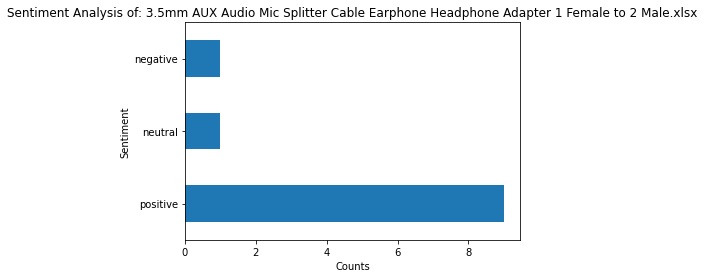

None

Positive Summary: 
।  ঠিকঠাক ভাবে পেয়েছি ধন্যবাদ।  আরিজিনাল পাইনি।  কোয়ালিটি খারাপতার একদমই নরম একটু বেশী দাম দিয়ে আর একটু ভালো জিনিস কিনার রিকমেন্ডেশন থাকলো।  ছোট কিন্তু অনেক সুন্দর লাগছে ভালো ছিলো ধন্যবাদ দারাজ।  ব্যবহার করে শান্তি পাচ্ছি ধন্যবাদ

Negative Summary: 
।  বালো না মাইক এর কোনো

Neutral Summary: 
।  এই দামে ভালো না পাতলা তার দিয়েছে দিয়েছে
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 3.5mm AUX Audio Mic Splitter Cable Earphone Headphone Adapter Female to 2 Male GSCP2042.xlsx

positive_score is : 73.2
negative_score is : 25.0
neutral_score is : 1.8
Visual: 


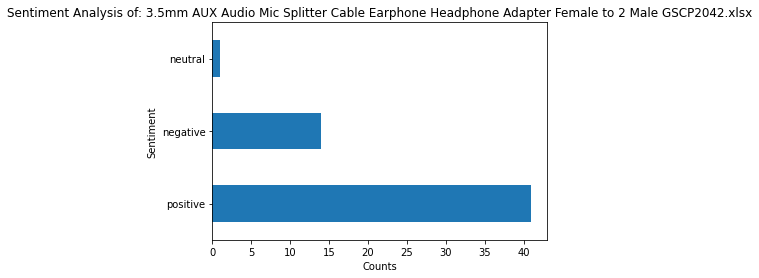

None

Positive Summary: 
।  আলহামদুলিল্লাহ ভালো প্রডাক্ট।  দামে কম মানে ভালো।  খুব ভালো ভাবেই কাজ করছে।  প্রোডাক্টটি ভালো ছিল যেমন আশা করেছিলাম তেমনই ধন্যবাদ।  এগুলো কিভাবে পারেন একটা জেক ভালো আরেকটা খারাপ।  আলহামদুলিল্লাহ ভালো যেমন চেয়েছিলাম তেমন পেয়েছি।  খুব ভালো প্রোডাক্ট অল্প দামের মধ্যে।  খুবই ভালো মানের প্রোডাক্ট।  ভালো কোযালিটি সম্পন্ন।  খুব ভালো প্রডাক্ট।  ভালো জিনিস।  ভালো ছিলো।  ভালো ছিল

Negative Summary: 
।  কেউ কিনবেন নাসেলার বাটপারনষ্ট প্রডাক্ট দিসে কাজ করে না একদম বাজেবাটপার সেলার।  ফালতু প্রোডাক্ট শো শো সাউন্ড করে আর কিছুই ক্লিয়ার না।  প্রোডাক্ট যেটা চেয়েছিলাম সেইটা পাইনি এবং টোটালি নষ্ট খুবই হতাশ সেলার কাষ্টমার ঠকাতে এক্সপার্ট।  বিল্ড কোয়ালিটি অনেক ভালোকিন্তু পিসি তে লাগানোর পর সাউন্ড চৌদ্দ এর মতো কম আসেগেম এ ফূটস্টেপ অনেক কম শোনা যায়গেমারদের জন্য।  এগুলোর জ্যাক নষ্ট এগুলো এখান থেকে না কিনে দোকান থেকে চেক করে কিনাই ভালো একশ টাকা পানিতে।  একদম ফালতু এটা নিয়েছিলাম পিসিতে ভয়েস রেকর্ডিং এর জন্যে ভয়েস রেকর্ডিং করতে গেলে শো শো আওয়াজ হয়।  প্রডাক্ট ভালো নানষ্ট প্রডাক্ট দিযেছেক

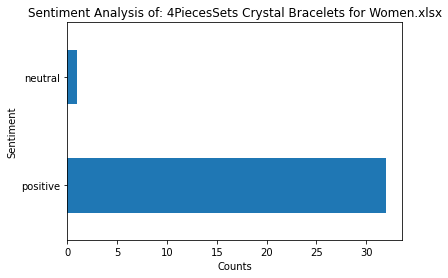

None

Positive Summary: 
।  অনেক সুন্দর ছিলো আমার অনেক ভালো লেগেছে আপনারা চাইলেও নিতে পারেন।  মোটামুটি ভালোতবে যেই রকম টা আশা করেছি তেমনই পেয়েছি ধন্যবাদ।  ধন্যবাদযেমন দেখেছি তেমনি পেয়েছি।  ধন্যবাদ।  আপু বলেছে ভালোই হয়েছে আমার রিভিউ দেখে আপনারাও চাইলে নিতে পারেন।  আলহামদুলিল্লাহ প্রোডাক্টটি অত্যন্ত ভালো আপনারাও নিতে পারেন।  ভালো ছিলো আমার ওয়াইফ পছন্দ করেছে।  এক কথা সুন্দর আপনারা নিতে পারেন।  ভালো ছিল পছন্দ হয়েছে ধন্যবাদ।  ভালো আপনারা নিতে পারেন।  সুন্দর একটা প্রোডাক্ট।  খুব ভালো লাগছে এই।  খুবই সুন্দর।  সুন্দর ছিল

Negative Summary: 
Not found


Neutral Summary: 
।  প্রোডাক্ট এর প্যাকেজিং ভাল ছিল এবং কোয়ালিটি বেশ ভাল আলহামদুলিল্লাহ অনেক দিন ব্যবহার এর পর রিভিউ দিচ্ছি আঠাটা আরেকটু শক্ত হলে ভাল হত কিন্তু কাজ চলে যায় বেশি জোড়ে টানা ছেড়া না করলে উঠবে নাকেউ চাইলে নিতে পারেন
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 5 Hole Cable Organizer Magnetic Plastic USB Cable.xlsx

positive_score is : 88.2
n

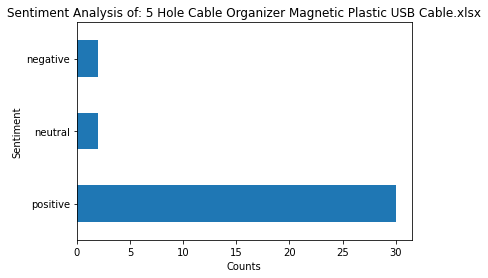

None

Positive Summary: 
।  ভালোই সবাই নিতে পারেন।  খুবই ভালো প্রোডাক্ট।  খুব ভালো।  প্রোডাক্ট টা ভালো-মানেরনিতে পারেন।  সুন্দর জিনিস কোয়ালিটিও ভালো।  ভালো প্রোডাক্ট।  ভালো প্রোডাক্ট।  ভালো।  ভালোই।  ভালো।  ভালো

Negative Summary: 
।  পঞ্চাশপাঁচ টাকা দিযে কিনেছিলাম আর এখন দাম একশ পঞ্চাশ টাকা এটা এক ধরনের প্রতারণা।  ঘাম দুইদিন পরেই উঠে গেছে

Neutral Summary: 
।  গাম ভালো নাএভারেজ পন্য
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 5 Pcsset Bracelet Set for women's Fashion stone bracelet 5 pcs (2).xlsx

positive_score is : 92.3
negative_score is : 7.7
neutral_score is : 0.0
Visual: 


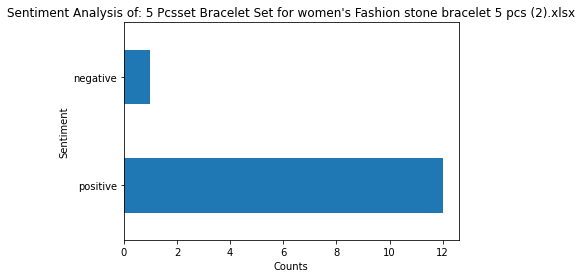

None

Positive Summary: 
।  যেমন ছবিতে দেযা ঠিক তেমনি পেযেছি ব্রেসলেট টা অনেক সুন্দর।  অনেক সুন্দর ছিল ভালো মানের ধন্যবাদ।  অনেক ভালো পাইছি।  ভালো নিতে পারেন।  প্রোডাক্ট পেয়েছি সবগুলো আইটেম ছিল এবং সুন্দর সেলারকে ধন্যবাদ দারাজকেও ধন্যবাদ।  খুব ভালো এবং যথা সময়ে পার্সেল টা হাতে পেয়েছি।  অনেক ভালো ছিলো পর পর টা কিনছি।  খুব সুন্দর

Negative Summary: 


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 5 Pcsset Bracelet Set for women's Fashion stone bracelet 5 pcs - Bracelet For Women (2).xlsx

positive_score is : 96.0
negative_score is : 4.0
neutral_score is : 0.0
Visual: 


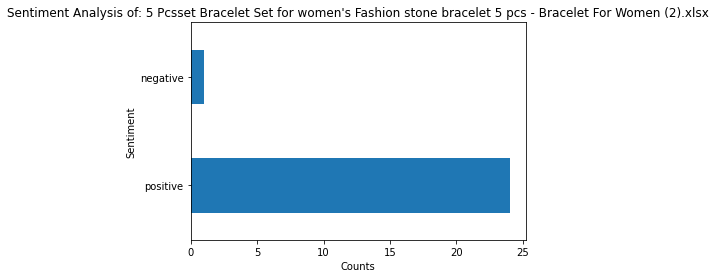

None

Positive Summary: 
।  দামে কম মানে ভালো।  দাম অনুযায়ী প্রোডাক্টটি খুব ভালো এবং সুন্দর।  ভালোই তবে ডেলিভারিতে অনেক লেট।  দাম অনুযায়ী ভালো।  নাইস প্রোডাক্ট দাম অনুযায়ী বেশ ভালো।  ভালো আছে আপনার চাইলে নিতে পারেন।  ভালো লাগছে।  সুন্দর।  ভালো ভাই।  ধন্যবাদ সেলার ভাইকেপ্রোডাক্টটি ভালো

Negative Summary: 


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: 7 Hole Self-adhesive Magnetic Silicone Cable Holder, Flexible Organizer, Clips Management Mouse, Keyboard, Headphone.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


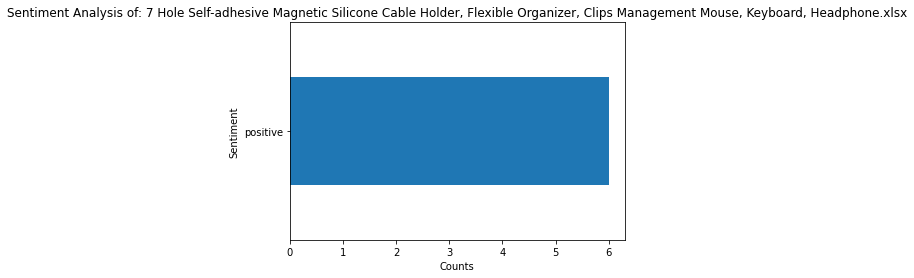

None

Positive Summary: 
।  আলহামদুলিল্লাহভালো ঘড়ি পেয়েছি এ্যাপেল শেপ এর ফিতা সিম ভরে কথা বলতে পারছি ধন্যবাদ সেলার ও দারাজকে।  ঘডিটা অনেক ভালো দাম হিসেবে ও ঠিক আছে ব্যাটারি দুটো দিযেছে অসংখ্য ধন্যবাদ সেলার কে থ্যাংক ইউ দারাজ বাংলাদেশ।  ও অনেক দ্রুত হয়েছে যেমনটা চেয়েছি তেমনটাই পেয়েছি ধন্যবাদ দারাজ সেলার

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: A1 watch Smart Watch Smart i Calling Bluetooth Watch.xlsx

positive_score is : 80.6
negative_score is : 19.4
neutral_score is : 0.0
Visual: 


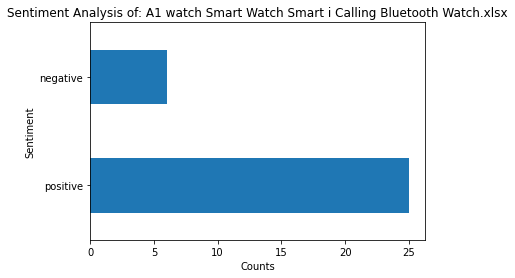

None

Positive Summary: 
।  প্যাকেজিং ভালো ছিলো খুবই দ্রুত ডেলিভারি পেয়েছি দাম অনুযায়ি খুবই ভালো স্মার্ট ঘড়ি।  খুবই ভালো প্রোডাক্ট একদম নতুন যেমন চেযেছিলাম তেমনি পেযেছি অসংখ্য ধন্যবাদ।  দাম টা আর একটু কম হলে ভালো হতোতবে জিনিস টা মুটামুটি ভালো খারাপ না।  সবকিছুই ভালো কিন্তু ব্যাটারিতে চার্জ থাকেনা এক ঘন্টাতেই চার্জ শেষ।  প্রাইস টা একটু বেশি হযে গেছে।  একেবারে বাজে চার্জ টিকে না।  ভালো না খুবই বাজে জিনিস চার্জ থাকে না।  ২টা ব্যাটারির একটাতে ও চার্জ থাকে না।  খুব বাজে একটা প্রোডাক্ট।  দাম অনুযায়ী খুবই ভালো মানের কথা বলার ঘড়িসাথে একটি ব্যাটারি ফ্রি পেয়েছি ধন্যবাদ সেলারকে।  অনেক সুন্দর ছিলো৩ বার অর্ডার করেছিধন্যবাদ দারাজ।  যেমনটা চেয়েয়ে ছিলাম তেমনটাই পেয়েছি সেলস ম্যানের ব্যবহার আনেক ভালোধন্যবাদ দারাজকে

Negative Summary: 
।  বেল্টটা ছেঁড়া প্রতারক সেলার।  একদম ফালতু প্রোডাক ডিসপ্লে ভালো না দাগ পড়া জিনিস।  ভাই হযনা কি করবো।  ফালতু জিনিস

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Pro

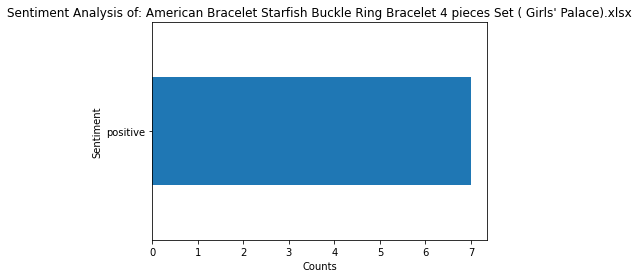

None

Positive Summary: 
।  সবগুলোই ভালো অবস্থায় পেয়েছি।  অনেক ভালো পাইছি

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: ANOBIK Pulse 10000 Pro II Power Bank with QC4.0 & PD 22.5W.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


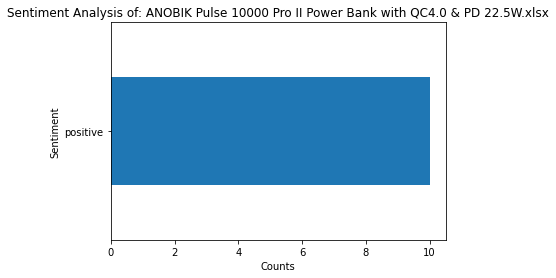

None

Positive Summary: 
।  প্রিমিয়াম কোয়ালিটি সাথে টাইপ ছি ক্যাবল দেয়া দাম হিসাবে ঠিক আছে ইউজ করে দেখি চার্জ কেমন হয়।  ভাল প্রোডাক্ট দেশীয় পণ্য হিসেবে আমি ভাল মনে করছি কিন্তু বক্সে দেয়া টা দিলে একদম হত মনে হয় আনোবিক দের ভুলে গেছে অথবা তাদের জন্য প্রোডাক্ট টি বানাই নি ধন্যবাদ।  পণ্য হাতে পাওয়ার চৌদ্দপাঁচ দিন পর দিলাম পণ্য খুবই ভালো লাগলো করে মোবাইল ও ভালোই চার্জ হয় একটা জিনিস খেয়াল করলাম যখন পাওয়ার ব্যাংক টি চার্জ এ লাগাই তখন চার্জিং পোর্ট সহ তার আশ-পাশের জায়গা খুবই গরম হয়ে যায় এখন দেখা যাক পাওয়ার ব্যাংক টি কতদিন টিকে।  ভাল কোয়ালিটির ছিল চার্জও দ্রুতই হয় আমি একবার চার্জ দিয়েছি তাই বলতে পারলাম না পাওয়ার ব্যাংক এর ক্যাপাসিটি কত তবে একটা কথা আমার মোবাইল পঞ্চাশপাঁচ ফাস্ট চার্জিং সাপোর্ট করে কিন্তু পাওয়ার ব্যাংক থেকে যে বিশদুই আউটপুট পেয়েছি কিনা একটু দিধায় আছি তবে চার্জ হয় দ্রুতই।  একদম পার্ফেক্ট প্রডাক্ট ফাস্ট চার্জিং সাপোর্ট বেশ ইম্প্রেসিভ কোয়ালিটিও বেশ ভাল আশা করি আনবিক সব সময় এভাবে ভালো প্রডাক্ট দিয়ে থাকবে।  ৩টি পোর্টেই ফাস্ট চার্জ সাপোর্ট করে অসাধারণ একটা ব্যাপার মোবাইল খুব দ্রুত চার্জ

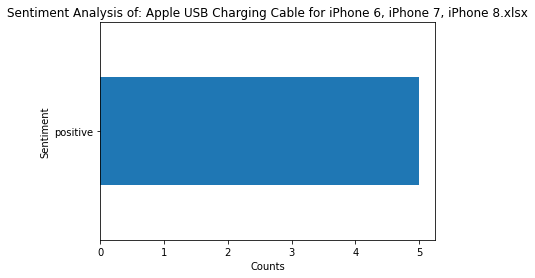

None

Positive Summary: 
।  আমি কিছু বলবো না।  এক কথায় অসাধারণ।  খুব ভাল চলছে ধন্যবাদ।  খারাপ নাহ চলছে।  আজ হাতে পেলাম চার্জিং স্পিড ভালই এখন দেখা যাক কেমন সার্ভিস দেয়

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Awei CL-10 Powerbank Short Data Cable for Micro USB (2).xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


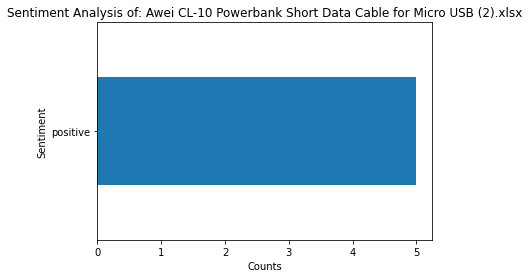

None

Positive Summary: 
।  প্রোডাক্ট ঠিক ঠাক ছিল।  অরিজিনাল ব্রান্ড প্রোডাক্ট বিল্ড কোয়ালিটি অনেক প্রিমিয়াম ফাস্ট চার্জ সাপোর্টেড প্যাকেজিং ভাল ছিল কিন্তু ঈদের জন্য ডেলিভারিতে অনেক দেরি করেছে।  যথেষ্ট ভালো প্রোডাক্ট চার্জ তারাতাড়ি হচ্ছে বেশ দ্রুত ডেলিভারি পেয়েছি।  আলহামদুলিল্লাহ ইনটেক প্রোডাক্ট পেয়েছি ফাস্ট চার্জিং হয় প্রোডাক্ট কোয়ালিটিও দারুন।  ভালো প্রডাক্ট

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Awei CL-10 Powerbank Short Data Cable for Micro USB.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


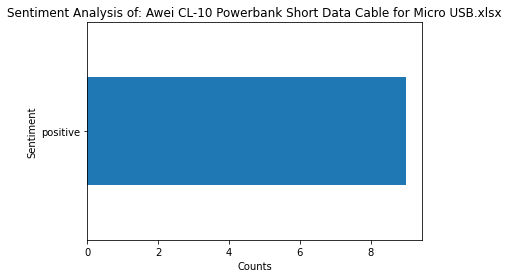

None

Positive Summary: 
।  চার্জ ফাস্ট হয় অরিজিনাল প্রোডাক্ট।  অরিজিনাল প্রোডাক্ট ফাস্ট চার্জ হয়বিকাশডিকয়েন্স মিলে ১০০টাকার মত খরচ পড়েছে।  খুবই সুন্দর পছন্দ হইছে ধন্যবাদ সেলার কে ধন্যবাদ দারাজ কে।  দারাজ ভাউচার আর বিকাশ ক্যাশব্যাক মিলে মাএ এক হাজার চৌদ্দপাঁচ টাকাতেই পেয়ে গেলাম আমার এর মোবাইল এক বার ফুল চার্জ করা যায়ভাল ছিল ধন্যবাদ দারাজ ও সেলার কে অরিজিনাল পন্য দেয়ার জন্য।  ধন্যবাদ সেলারকে অরিজিনাল পন্য দেওয়ার জন্য

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus 10000 mAh Adaman Metal 22.5W Power Bank - Black.xlsx

positive_score is : 91.7
negative_score is : 8.3
neutral_score is : 0.0
Visual: 


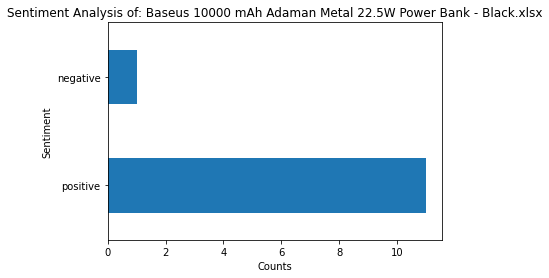

None

Positive Summary: 
।  ভালো প্রোডাক্ট চার্জ দ্রুত হচ্ছে কিন্তু পাওযার ব্যাংকে চার্জ দিতে একটু সময লাগেওভারঅল ভালো নিতে পারেন।  ভালই মনে হচ্ছে চার্জিং স্পিড ইনপুট আউটপুট।  অনেক ভালো গুড।  মোবাইলে চার্জ দেওযার সময ব্যাকআপ থেকে দ্রুত চার্জ কমতে থাকে তবে মোটামুটি ভালো।  দুই সপ্তাহ ব্যবহার করার পর রিভিউ দিলাম প্রোডাক্ট ভালোই কিন্তু চার্জ হইতে একটু বেশি সময় লাগে।  খুব ভালোনিতে পারেন

Negative Summary: 
।  দেখতে অরজিনাল কিন্তু কাজে খুব খারাপ অবস্থাপাওয়ার ব্যাংক চার্জ হতে লাগছে চার ঘন্টাকিন্তু একবার এর ফোন চার্জ দিলেই পাওয়ার ব্যাংক এ আর ১০-১৫ চার্জ থাকেনতুন অবস্থাই এই অবস্থা না জানি পুরাতন হলে কি অবস্থা হবেফোন এ চার্জ অ ওঠে আস্তে আস্তে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus 100W Fast Charger Cord USB-C Type-c Cable.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


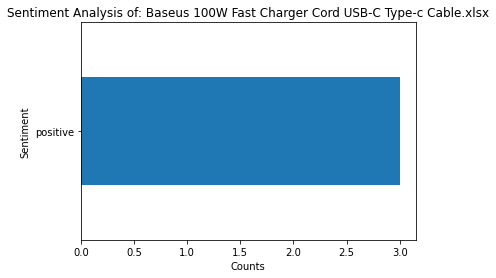

None

Positive Summary: 
।  আপনারা রং পোডাক দিযেছেন আমি চাইছি মোবাইলের চার্জার কেবল আপনারা দিযেছেন পিসি কেবল আমি রিটার্ন করে দেবো।  এখনো টেস্ট করা হয় নাই দেখে মনে হয়েছে ভালোই।  ক্যাবল খুবই ভালো মানের

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus 20000mAh 20W Quick Charge Airpow Power Bank.xlsx

positive_score is : 83.3
negative_score is : 8.3
neutral_score is : 8.3
Visual: 


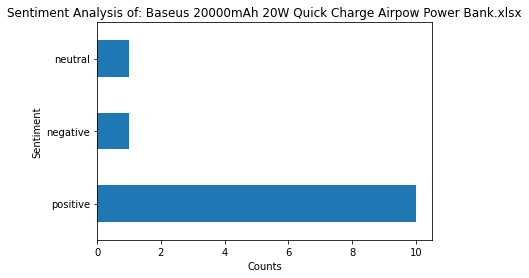

None

Positive Summary: 
।  প্রথমেই আশা যাক দামের হিসাবে এমনে ইহা এক হাজার সাতশ শূন্য টাকা দাম ছিলো আমি ৪৫০টাকা ভাওচার ব্যবহার করে এক হাজার দুইশ আঠাশতিন টাকা তার সাথে নগদ ক্যাশব্যাক একশ নিয়ে আমার পড়েছে এক হাজার একশ আঠাশতিন টাকা এখন সেলারের ব্যপারে বলিসেলার খুব হেল্পফুল ছিলোবেশ কিছু জানতে চেয়ে প্রশ্ন করেছিলাম খুব তাড়াতাড়ি সকল প্রশ্নের উওর দিয়েছেন উনিএবার আসা যাক প্রডাক্টের ব্যাপারে পন্য সুন্দর ভাবে রেপিং করে পাঠিয়েছিলো যা ছবিতে দেখতে পাড়বেন পন্য একদম ইন্টেক এবং একশ অরিজিনাল পেয়েছিভেরিফিকেশন করে পেয়েছিফোন ফাস্ট চার্জ সাপোর্ট করে পাওয়ার ব্যাংক থেকে আউটপুটই পেয়েছি আমার ফোনের ব্যাটারী দুই বার চার্জ করে অন্য ছোট গেজেট ও চার্জ করেছি পাওয়ার ব্যাংক চার্জ হতে ৬-৭ ঘন্টা সময় লাগে ওভারঅল পাওয়ার ব্যাংক বেশ ভালো।  আলহামদুলিল্লাহ খুব সুন্দর ভাবে পাওযার ব্যাংকটা রিসিভ করেছি যেমনটা আশা করেছি তেমনটাই হযেছে অরিজিনাল প্রোডাক্ট এই দামে এর বিশ হাজার পাওযার ব্যাংক পাওযাটা খুবই চমকার টাইপ সি পোর্টটা দিযে সাপোর্ট করে কিন্তু ইউএসবি পোর্টটা দিযে আউটপুট দেয দেখা যাক কতদিন ব্যবহার করা যায ধন্যবাদ সেলার ভাই এবং দারা

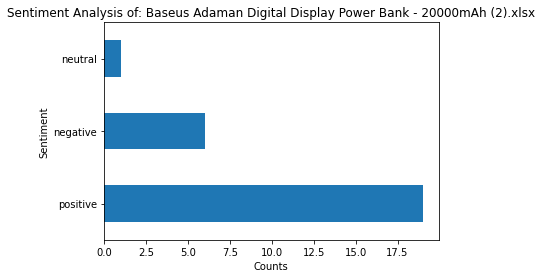

None

Positive Summary: 
।  প্রোডাক্ট মোটামুটি ভালোদুই দিন ব্যবহার করে রিভিউ দিলাম বার ফুল চার্জ করা যাবেদাম অনুযাযী প্রডাক্ট খারাপ নাকিন্তু প্যাকেজিং ভাল ছিলনাএ ব্যাপারটা নিযে আমি খুব অসন্তুষ্ট।  আজকে হাতে পেলাম ডেলিভারি একটু দেরি হয়েছে প্রোডাক্টটি ভালো ভেরিফাই করেছি অরজিনাল ধন্যবাদ সেলারকে ও দারাজকে।  প্রোডাক্টটি খুব পছন্দ হযেছে ব্যবহার করে দেখি কেমন হয মনে হচ্ছে ভালোই হবে।  প্রথমে ধন্যবাদ জানাই ও কে তা অনেক ভালো আমার খুব পছন্দ হয়েছে।  পাওযার ব্যাংক টা অনেক ভালো।  খুব ভালো লাগলো পাওযার ব্যাংক আশাকরি ভালোই চলব।  ভাল পন্য।  পওয়ার ব্যাংকটি ভালো খুবই দ্রুত ডেলিভারি পেয়েছি পাওয়ার ব্যাকাপ ও ভালো দিচ্ছে।  অনেক ভাল একটি প্রোডাক্ট নিতে পারেন।  প্রোডাক্ট ভালো ছিল ডেলিভারি ম্যান আরো বেশি ভালো ছিল।  খুবই ভাল

Negative Summary: 
।  পাওয়ার ব্যাংকের চার্জ খুব তারাতাড়ি শেষ হয়ে যায় আর চার্জ হতেও অনেক সময় নেয় বিশ চার্জ হতে প্রায় ২ঃ৩০ ঘন্টা লাগছে টাইপ সি চার্জার দিয়ে চার্জ দিয়েছি।  পাওয়ার ব্যাংক এর সাথে ক্যাবল নেই যা খুবই বেমানান নতুন অবস্থায় সতেরপাঁচ চার্জ ছিল বাকি বিশপাঁচ চর্জ হতে ৩ঘন্টা সময় নিয়েছে ত

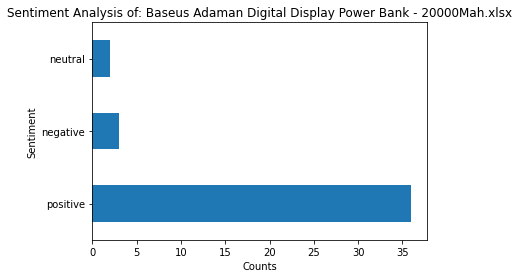

None

Positive Summary: 
।  প্রায একমাস ব্যবহার পর পাওযার ব্যাংকটার রিভিউ দিচ্ছে এটা অনেক সুন্দর পাওযার সাপ্লাই দেয অনেক ভালো ব্যাকআপ পাচ্ছি অনেক ধন্যবাদ।  সত্যিই কোযালিটিফুল প্রোডাক্ট সেলারের ব্যবহার ও অনেক ভালো ধন্যবাদ।  দিন পর রিভিউ দিলামসার্ভিস ভালো দিচ্ছেমনে হয় অরজিনাল দ্রুত চার্জ হয়ট্রাভেল এর সময় কাজে লাগেসবাই কিনতে পারেন।  আমার কাছে ওনেক ভালো লেগেছে।  কি আর বলবো অনেক সুন্দর একটা পাওয়ার ব্যাংকচার্জিং স্পিড ফাস্টআপনারা চাইলে নিতে পারেনসেলার কে অনেক অনেক দন্যবাদ পাওয়ার ব্যাংক টি আমাকে দিয়ার জন্য।  ধন্যবাদ অরিজিনাল পাওযার ব্যাংক পাঠানোর জন্য যে কেও নিতে পারেন।  খুব ভালো একটা পাওয়ার ব্যাংকওজন অনেক ধন্যবাদ দারাজ সেলার কে।  এক কথায় অসাধারণ একটি পাওয়ার ব্যাংকঅরজিনাল পোডাক্টসবাই কিনতে পারেন।  ভালো মানের একটা পাওযার ব্যাংক দাম অনুযাযী সাথে থাকলে ভালো হতো এটাকে চার্জ দিতে অনেক সময লাগে।  প্রোডাক্ট অরিজিনাল ছিলো এই দামে এখানেই এটা বেষ্ট পাওয়ার ব্যাংক।  অর্ডার দিলাম পাওযার ব্যাংক আপনারা দিলেন চার্জিং ব্রিকবাহ।  খুবই ভালো লাগলো।  অরিজিনাল প্রডাক্ট চার্জিং ও ফাস্ট হচ্ছে।  খুব ভালো।  ভালো জিনিস

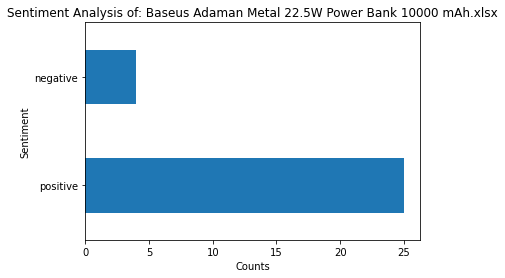

None

Positive Summary: 
।  প্রোডাক্ট টি খুব ভালোযেমন চেয়েছি তেমন পেয়েছি আজকে হাতে পেলাম আশা করি ভালো সার্ভিস দিবে ধন্যবাদ দারাজ।  আলহামদুলিল্লাহ অসাধারন প্রোডাক্ট আমার কাছে খুব ভালো লেগেছে ব্যবহার করার পর বুঝা যাবে।  আলহামদুলিল্লাহ টা ভালো ছিলো আপনারা চাইলে নিতে পারেন।  দেখে ভালোই মনে হচ্ছে আশা করি অনেক ভালো সার্ভিস দিবে।  আলহামদুলিল্লাহপ্রোডাক্ট ভালো ছিলএকদম অরজিনালতবে দারাজকে আরো সতর্ক হতে হবে আমার প্রোডাক্টের মোড়ক বৃষ্টিতে নষ্ট হয়ে গেছিলোভাগ্য ভালো প্রোডাক্টের কিছু হয় নাই।  খুবই ভালো প্রোডাক্ট কিন্তু আমার হলে ভালো হয় তাই রির্টান দিয়ে দিছি নিঃসন্দেহে নিতে পারেন।  অনেক ভালো একটা প্রোডাক্ট অরিজিনাল টা পেয়েছি সত্যিই দারুন।  খুব ভালো প্রোডাক্ট প্যাকেজিং ভালো ছিলো নিতে পারেন।  টি ভালো আপনারা নিতে পারেন।  অনেক ভালো প্রডাক্ট।  গুড প্রোডাক্ট।  এককথায় অসাধারণ

Negative Summary: 
।  অনেক ভালো একটা পাওয়ার ব্যাংক আমার আইফোন প্রায় তিন বার চার্জ দেওয়া যায় ১৫-১০০ করে ফুল মেটাল বডি একটা প্রিমিয়াম ফিল দেয় ডিজিটাল ডিস্পলেতে চার্জ ভোল্টেজ আর কারেন্ট প্রবাহের রিডিং দেয় সবমিলিয়ে আমি খুশি তবে দাম যদি ১২

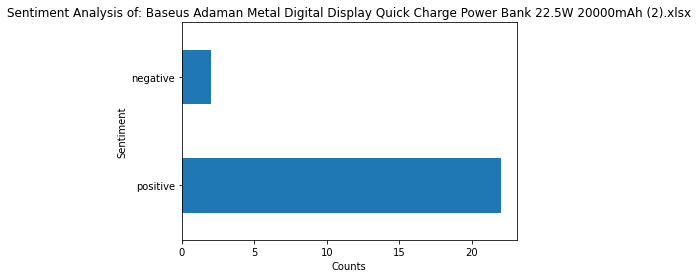

None

Positive Summary: 
।  অসাধারন একটা প্রোডাক্ট একেবারে ইন্টেক পেয়েছি তবে মেবাইলে এর উপরে চার্য হয়না অনেক ট্রায় কোরছি বাট হয়না তবে আপনারা নিতে পারেন আর সাথে একটা ক্যাবল দিলে ভালোহত আসাকরি সেলার ব্যাপারটা বুঝবে।  একদম অথেনটিক অরিজিনাল প্রোডাক্ট পেয়েছি প্যাকেজিং খুব ভালোভাবে করা ছিলো স্কান করে অরিজিনাল পেয়েছি সেলার ব্যবহার চ্যাট রেসপন্স খুব ভালো ভাইয়ের ফেসবুক পেজ ও গ্রুপ রয়েছে ধন্যবাদ গ্যাজেট কর্নার চট্টগ্রামকে একদম চোখ বন্ধ করে নিতে পারেন নেওয়ার আগে কথা বলে নিবেন দোয়া ও ভালোবাসা রইল শপের জন্য।  দুই মাস ব্যবহার এর পর রিভিউ দিলামঃভালো দিকঃআমার পোকো এক্স থ্রি পাঁচ তিন বার চার্জ করা যায় লাইট দশ দুই ঘন্টা চালানোর পরও আঠাশচার চার্জছিলোঅথেনটিক দারুন আর চরম একটা জিনিসদারাজ দশএক তে কিনেছিলাম ১৭৫০টাকায়আমি খুশি আলহামদুলিল্লাহ।  প্রথমেই ধন্যবাদ জানাই সেলারকেকারণ এক হাজার একশ দশএক ক্যাম্পেইনের রাত এক হাজার দুইশ তিন এর মধ্যে স্টোক শেষ হযে গেছিল এবং আমার রিকুযেস্টে রাত তিনশ তেরে এর দিকে সেলার একটি পাওয়ার ব্যাংক লাইভ করেশেষমেষ পাওযার ব্যাংকটি নিতে সফল হয পাওযার ব্যাংকটি অথেনটিক এবং অরজিনালহাতে নিলে 

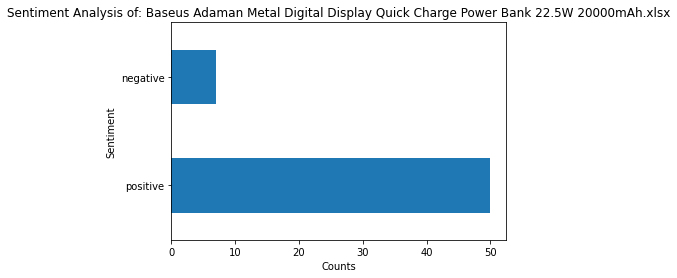

None

Positive Summary: 
।  পাঁচ দিনের ভিতর ডেলিভারি পাইছি একদম অরিজিনাল প্রডাক্ট প্রোডাক্ট কোয়ালিটি খুবই ভালো প্রিমিয়াম একটা ভাব আছে সেলারের ব্যবহার ভালো প্যাকেজিং ভালো ছিলো যারা অরিজিনাল খুজছেন তারা অবশ্যই নিতে পারেন।  আলহামদুলিল্লাহ প্রোডাক্টটি অনেক ভালো আজকে হাতে পেলাম আপনারা চাইলে নিতে পারেন ধন্যবাদ দারাজ এবং সেলার কে।  খুবই সুন্দর আর ভালো একটি প্রোডাক্ট কে সেই সেই।  অতেন্টিক প্রোডাক্ট বিশতিন বার ইউজ করছি চার্জিং স্পিড ভালো প্রিমিয়াম একটা লুক পাওয়া যায় এককথায় সেটিসফাউড।  পাওয়ায় ব্যাংকটা অরিজিনাল এবং প্রিমিয়াম কোয়ালিটির কিন্তু পাওয়ার ব্যাংকটি সতেরদুই থেকে একশ চার্জ হতে পাঁচ ঘন্টারও বেশি সময় লেগেছে সেলার ভালো আমি যেমন বক্সেরটা চেয়েছিলাম তেমনই দিয়েছে।  পার্সেলটা অনেক ভালো আমি কিছুদিন ব্যাবহার করার পর রিভিউ দিলাম অরজিনাল পোডাক্ট আমি অনেক সন্তুষ্ট আপনার চাইলে কিনতে পারেন।  একদম আমার মনের মতো পেয়েছি সেলারকে অসংখ্য ধন্যবাদ এতো সুন্দর ও কোয়ালিটিফুল একটা পণ্য আমার কাছে পৌঁছে দেওয়ায়।  যেমনটা ভেবেছিলাম তার থেকেও ভালো প্রোডাক্ট দুই দিন পরে প্রোডাক্ট হাতে পেলাম সেলার এর ব্যাবহার ও ভালো চাইলে আ

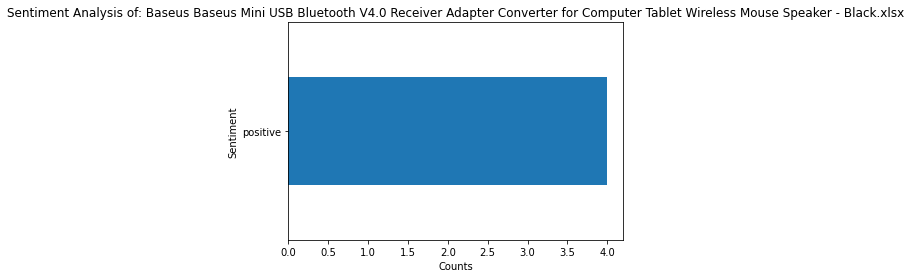

None

Positive Summary: 
।  অরজিনাল একটা প্রোডাক্ট কালো কালার টা চেযেছিলাম এবং কালো কালার টাই পেযেছি রেঞ্জ টাও ভালো দেখতে বেশ প্রিমিযাম প্রিমিযাম ফিল হয যেকোনো ব্লুটুথ ডিভাইস এর সাথে অনেক তাডাতাডি কানেক্ট হযে যাচ্ছিল যেটা অনেক ভালো একটা দিক সব মিলিযে অসাধারণ একটা প্রোডাক্ট ধন্যবাদ দারাজকে আমার কাছে আমার একটা জিনিস পাঠানোর জন্য রিকমেন্ডেড সেলার।  দাম অনুযায়ী ভালো প্রডাক্ট ছবির সাথে মিল আছে ধন্যবাদ দারাজ আর বিক্রেতাকে ভাল প্রডাক্ট দেওয়ার জন্য।  ইনটেক পাইছি এবং যেমনটি বলা হযেছিল তেমনটাই পাইছি ধন্যবাদ ধন্যবাদ বিক্রেতাকে।  এ অনেক কম দামে অর্ডার করেছিলাম আর দিনেই করে দেখাচ্ছে সপ্তাহ ব্যবহার করে বলতে পারি এইটা একটা ভালো আমার ফোনকে পর পর বার থেকে করতে পারে

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus Bipow Digital Display 10000Mah 20000Mah 30000Mah 20W Power Bank.xlsx

positive_score is : 88.5
negative_score is : 11.5
neutral_score is

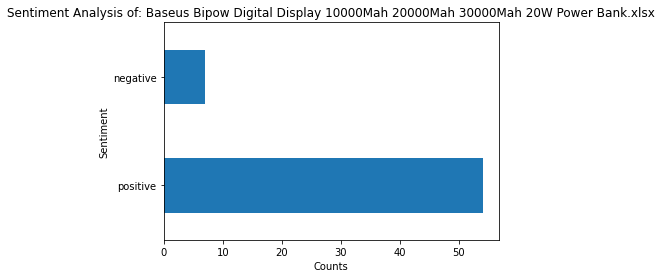

None

Positive Summary: 
।  ধন্যবাদ সেলারকে ভাল একটা প্রোডাক্ট দেয়ার জন্য অসাধারণ পাওয়ার ব্যাংক।  এই দামে আসলেই পাওয়ার ব্যাঙ্কটা অনেক ভালো আপনারা চাইলে নিতে পারেন।  এক কথায় অসাধারণ প্রোডাক্টটি অরিজিনাল মাত্র দুই দিনের মধ্যে ডেলিভারি পেয়েছি ধন্যবাদ সেলার ভাইকে।  আলহামদুলিল্লাহ অনেক ভালো ব্যবহারের পর রিভিউ দিলাম।  অনেক ভালো প্রডাক্ট সবাই নিতে পারেন।  অনেক দিন করার পরে রিভিউ দিলামঅনেক ভালো ব্যাকআপ দেয়।  অরিজিনাল প্রোডাক্ট পেয়েছিসার্ভিস ও ভালো দিচ্ছে।  খুবই ভালো আপনারা চাইলে নিতে পারেন।  পাওযার ব্যাংক টি অনেক ভালো একবার চার্জ ফুল করলে ৫-৭ বার চার্জ দেওযা যায চাইলে আপনারা যে কেউ নিতে পারেন।  অনেক ধন্যবাদ ভাইযা দের কে এতো ভালো একটা পাওযার ব্যাংক পেযেছি আমার ব্যাটারি কিন্তু বার চার্জ দিতে পারি আর কোনো সমস্যা নেই।  অথেনটিক প্রোডাক্ট এমএএইচ ক্যাপাসিটির পাওয়ার ব্যাংকটা বেশ মোটা আর ভারী কিউ আর কোড স্ক্যান করলে অরিজিনাল দেখাচ্ছে ভালো জিনিস।  অনেক ভালো প্রোডাক্ট চাইলে আপনারা নিতে পারেন ভালো একটি প্রোডাক্ট দেওযার জন্য দারাজ টিমকে ধন্যবাদ।  প্রোডাক্ট পেয়ে আমি খুবই আনন্দিত সেম টু সেম এবং ইউজ করে একশ ভ

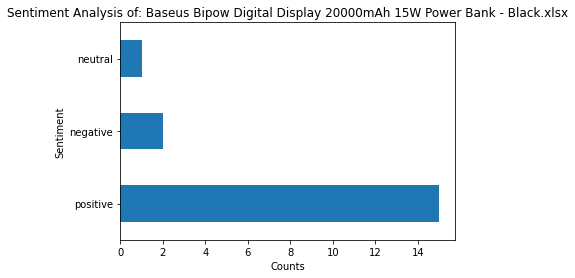

None

Positive Summary: 
।  প্রোডাক্ট একশ অরিজিনাল সুপার প্রিমিয়াম ফাস্ট চার্জিং ঠিকঠাক কাজ করছে আমার ব্যাটারি বারের বেশি চার্জ দিতে পেরেছিমোবাইল ফুল চার্জ হতে ঘন্টার একটু বেশি সময় নিচ্ছে ব্র্যান্ড বলে কথাঅর্ডার এর পরদিনই ডেলিভারি পেয়ে গেলাম এই প্রথম এতো দ্রুত প্রোডাক্ট হাতে পেলামসেলারকে ধন্যবাদ।  আমি ধারুন খুশি পন্যটি ওরজিনাল ইনটেক খুবই ভালো সেলারও ওরজিনাল ব্যবসাই দারাজকে ধন্যবাদ এবং নাম্বার।  অনেক ভালো সতের চার্জ ছিলো কিন্তু চার্জ হতে অনেক সময় লাগেআমার দশপাঁচ এর চার্জার তাও চার্জ হতে অনেক সময় লাগছে।  ফাস্ট চার্জিং সাপোর্টেড না তা বাদে সব ঠিক ঠাক এ আছে।  পাওয়ার ব্যাংকটি আসলেই খুব ভালো খুব তাড়াতাড়ি মোবাইল চার্জ হয় তাও দুইটা একই সাথে সেলারকে ধন্যবাদ।  প্রোডাক্ট ভালোই ব্যাপআপ ঠিক ঠাক আছে বাট আমার তে ফাস্ট চার্জিং পাই নি।  ১টা বিশেষ ধন্যবাদ সেলারকে।  দাম অনুযায়ী খুবই ভালো পাওয়ার ব্যাংক ইনট্যাক অবস্থায় অরিজিনাল প্রোডাক্ট দ্রুত ডেলিভারি পাইছি ধন্যবাদ সেলারকে।  আলহামদুলিল্লাহ অনেক ভালো একটা প্রডাক্ট

Negative Summary: 
।  মাত্র হাতে পাইছি কেমন সার্ভিস দিবে সেটা তো ইউজ না করে বলা সম্ভব না তবে

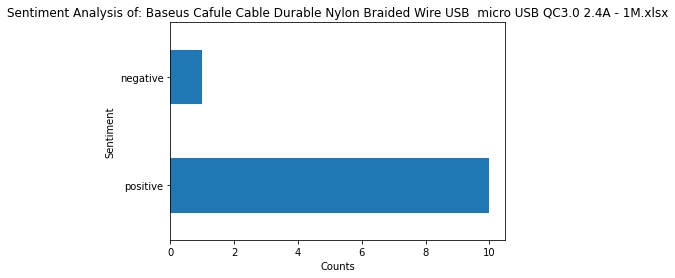

None

Positive Summary: 
।  নেওয়ার মতো প্রোডাক্ট ডেলিভারি ও যথাসময়ে পেয়েছি চার্জ ও দ্রুত হয় ধন্যবাদ সেলার কে।  কিউ আর কোড দিয়ে চেক করে দেখেছি জেনুইন প্রোডাক্ট ফাস্ট চার্জ হচ্ছে।  ভালো সেই একটা জিনিস।  প্রোডাক্টা ভালোই লাগলো আশা করি অনেক দিন ব্যবহার করতে পারবো সব চাইতে মজার বিষয় হলো কেবলের মতো ব্যবহার করা যায়।  প্রডাক্ট ঠিকঠাক পেযেছি ভালো কোযালিটি শিপিং দ্রুত করা হযেছে মাইক্রো ইউএসবি কিন্তু - এ বিষযটা আমার কাছে ভালো লেগেছে।  আলহামদুলিল্লাহ অনেক ভালো দুই মাস ইউজ করে রিফিউ দিচ্ছি।  ভালো প্রডাক্ট।  অরিজিনাল বাসুসের বেশ ভাল বিল্ড কোয়ালিটি দুইশ চৌদ্দ টাকায় বেশ ভাল মানের কেবলডেলিভারি টাইম ঠিকঠাক ছিল ওভার অল সেলারের সার্ভিস আর প্রোডাক্ট নিয়ে স্যাটিসফাইড।  রিজনেবল প্রাইসে বেশ ভাল কোয়ালিটির নাইলন এর ফাস্ট চার্জিং কেবল এটা নরমাল দশআট ওয়াট ফাস্ট চার্জিং সাপোর্টেড ডেলিভারি টাইম ও ঠিকঠাক ছিল

Negative Summary: 
।  মাইক্রো ইউএসবি ক্যাবল সম্পর্কে আমার ধারণা ছিলো এটা লাগানোর সময সাইড ঠিক রাখতে হয অপর সাইড হলে এটা লাগবে না ফোনে কিন্তু এটা ভুল প্রমাণ করলো এই ক্যাবল ইউএসবি টাইপ-সি ক্যাবলের মতো এটা দিযেও উ

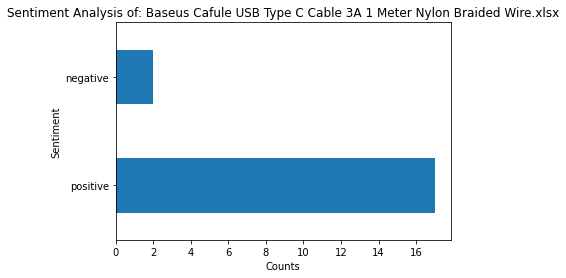

None

Positive Summary: 
।  ক্যাবল টা ভালোই অরজিনাল এর প্রোডাক্ট১৮ ওযাট ফাস্ট চার্জিং সাপোর্ট করেন ধন্যবাদ সেলার কে কম দামে ভালো ক্যাবল দেওযায।  ভালো মুটামুটি চার্জার ক্যাবল হিসেবে খুব ভালো তবে এই ক্যাবল দিয়ে আমি কাজ করতে পারবো না।  অনেক ভালো একটা কেবল প্যকেজিং ভালো যেমন চেয়েছি তেমনি পেয়েছি ধন্যবাদ দারাজ এবং সেলারকে।  প্রোডাক্টের মান ভালোওরিজিনাল ই মনে হয়েছেতবে তে ফাস্ট চার্জিং সাপোর্ট করে না।  আলহামদুলিল্লাহ বাসিউস এর টাইপ সি ডেটা ক্যাবল খুবই ভালো কোযালিটি ফুল ফাস্ট চার্জিং সাপোর্টেড ও হাই স্পিড ডাটা ট্রান্সফার রযেছে নিঃসন্দেহে সেলার ও এই শপের উপর বিশ্বাস রাখতে পারেন১১১১ তে নেওযা তাই অনেক কমে পেযে গেলাম।  অসাধারন একটা ক্যাবল দেখতেও খুব সুন্দরফাস্ট চার্জিং সাপোর্ট করে দ্রুত চার্জ হয ডাটা ট্রান্সফার ও সাপোর্ট করে নিশ্চিন্তে নিতে পারেন।  আল হামদুলিল্লাহ ভালো প্রোডাক্ট টেকসই ও মজবুত দেখা যাক কয়দিন চলে।  অনেক ভালো একটা ক্যাবল সবাই নিতে পারেন দশআট ওয়াট সাপোর্ট করে।  এর অরিজিনাল ক্যাবল চেক করে দেখেছি।  দাম অনুযাযী খুবই ভালো জিনিস।  খুবই ভালো এবং মানসম্পন্ন।  অফিসিয়াল স্টোর থেকে কম রেটে ওথেন্

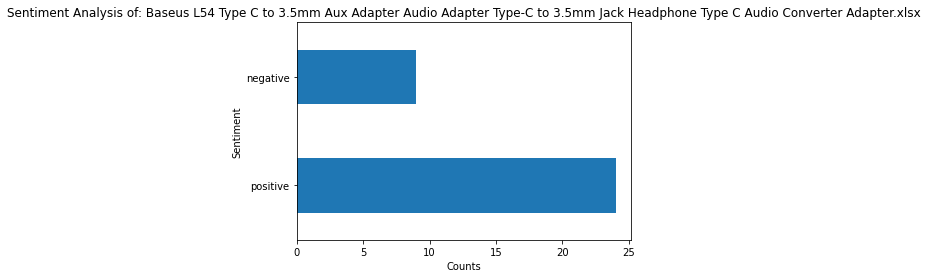

None

Positive Summary: 
।  জেনুইন প্রোডাক্ট পেয়েছিগুড কোয়ালিটি।  আলহামদুলিল্লাহ অনেক ভালো ধন্যবাদ দারাজ।  অসাধারণ জিনিস সব ঠিকঠাক আছে।  আলহামদুলিল্লাহ অনেক ভালো কোয়ালিটি।  আইপ্যাড বা অ্যান্ড্রয়েড ফোনের জন্য খুবই ভালো প্রোডাক্ট।  খুবই ভালো চাইলে নিতে পারেন।  প্রোডাক্ট কোয়ালিটি ভালই।  খারাপ না ভালোই চলে।  দারুণ কোয়ালিটি

Negative Summary: 
।  একদম অরিজিনাল প্রোডাক্ট।  হেডফোন লাগালে অনেক শব্দ হয়তাই প্রোডাক্ট বেশি ভালো বলা যাবে না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus Magnetic Plug Cable 3A 1M Type C  Micro ip USB Charging Wire Cord Mobile Phone Univeral Data Cable.xlsx

positive_score is : 75.0
negative_score is : 25.0
neutral_score is : 0.0
Visual: 


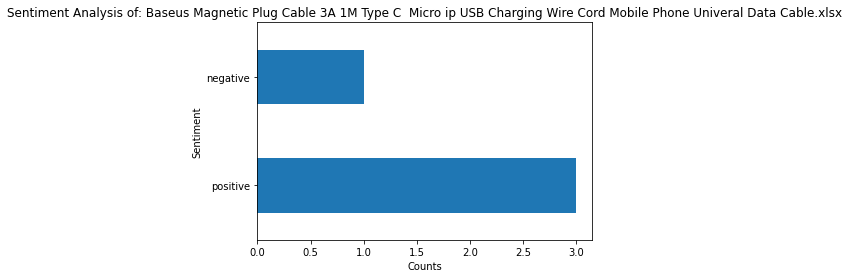

None

Positive Summary: 
।  মোবাইলেরটা কাজ করছে না টাইপ সি কিন্তু বাকি গুলো কাজ করছে।  প্রথমত বলব সেলার এর আন্তরিকতার কথা খুব ভাল ব্যবহার মাত্র তিন দিনে ভেলিভারি পেযেছি সাথে সেলার ভাই একটা মাক্সও উপহার দিযেছেন পন্যটির লুক ও সুন্দর প্রিমিযাম রিসিভিং অবস্থায সতেরএক চার্জ ছিল অরিজিনাল মনে হচ্ছে বাকিটা ব্যবহারের পর বলা যাবে ৩৩ওযাটের ফাস্ট চার্জার দিযে এ চার্জ করতে প্রতি ১এ সময নিচ্ছে প্রায তেরেপাঁচ মিনিট ফুল চার্জ করতে সময লাগবে সম্ভবত ৫থেকে৫৫ ঘন্টাপরিশেষে ধন্যবাদ সেলার এবং দারাজ উভযকেই পন্যটি ভেলিভারি জন্য।  প্রথমেই বলতে হয সেলার ভাইযার কথাব্যবহার ১০১০ডেলিভারি মাত্র দিনে পেলামকিউআর কোড স্ক্যান করে দেখলাম প্রোডাক্ট অরিজিনালভাইযা সাথে একটা মাস্ক গিফট দিছে যারা নিতে চান চোখ বন্ধ করে নিতে পারেনভাইযা অনেক ভালো

Negative Summary: 
।  টা নষ্ট এত টাকা দিয়ে এটা আশা করা যায না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus Power Bank Adaman 22.5w 20000Mah PPAD000101 Metal

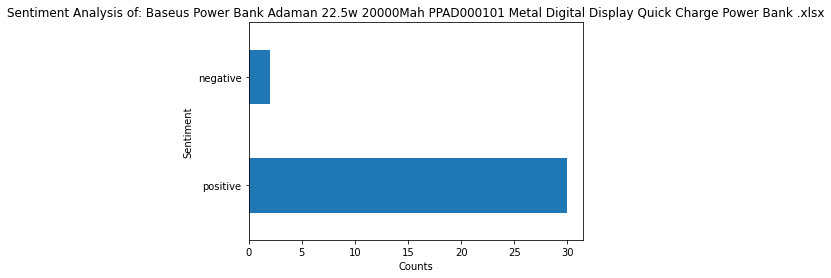

None

Positive Summary: 
।  খুবই ভালো প্রোডাক্ট চোখ বন্ধ করে নিতে পারেনসাথে ওয়ারেন্টি কার্ড ও মাস্ক দিছে ভাইধন্যবাদ ভাইকে।  পাওয়ার ব্যাংক টা ভালো ছিলোঅনেক দিন ব্যবহার করে রিভিও দিলামফাস্টচার্জ ভালো মত কাজ করেপ্যাকেজিং ও ভালো ছিলোসেলার সাথে একটা মাক্স দিছে সব মিলাইয়া ভালোই রেকোমেন্ডেড।  অনেকে ভালো একটা ছবিতে যেমন দেখছি তেমনটাই পাইছি সেলারকে অনেক ধন্যবাদ।  সত্যি পাওয়ার ব্যাংকটি খুবই ভালো মানেরসেলার খুবই ভালো সেলার কে ধন্যবাদ।  অসাধারণ পন্য আসা করি অনেক ভালো হবে ধন্যবাদ সেলার।  অথেনটিক প্রোডাক্ট।  সত্যি বলতে প্রডাক্টটি খুবই ভালো এটার পারফরম্যান্স খুবই ভালো ধন্যবাদ সেলার ভাইকে এত সুন্দর এবং আসল প্রডাক্ট দেওয়ার জন্য।  আমার মতে যথেষ্ট ভালো ছিল এবং ডেলিভারিও খুব দ্রুত ছিল।  আলহামদুলিল্লাহঅনেক ভালো।  খুব ভালো একটা প্রডাক্ট।  বেশ ভালো প্রডাক্ট

Negative Summary: 
।  আমি থাকি এক জায়গায় আর আমার মা বাবা থাকে আরেক জায়গায় আমি এই আমার মা বাবার জন্য নিয়েছি দুর সম্পর্কের এক ছোট ভাই বলছে ভাই টা অরজিনাল আমি কাছে নাই বিদায় এর ছবি দিতে পারলাম না।  একদম বাজে এবং নরমাল কোযালিটি কেউ কিনবেন না

Neutral Summary

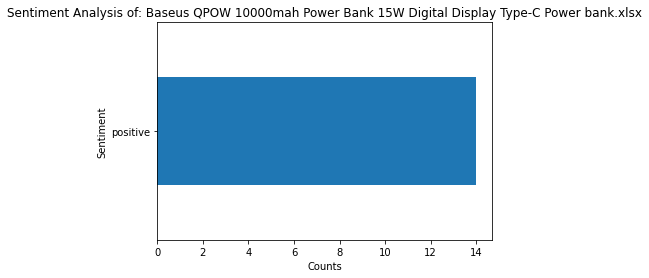

None

Positive Summary: 
।  আলহামদুলিল্লাহ প্রেডাক্ট টা অনেক ভালো এবং অর্জিনাল সবাই নিতে পারেন।  অসংখ্য ধন্যবাদ দারাজ ও সেলারকে খুবই ভালো পাওয়ার ব্যাংক চাইলে যে কেউ নিতে পারেন দারাজেএ কমদামে পেলাম মার্কেটে এক হাজার পাঁচশ শূন্য প্রাইজ আমি অনেক খুশি।  অনেক সুন্দর ও ভালো একটি পাওযাব্যানক ধন্যবাদ।  খুব ভালো একটা প্রডাক্ট।  খুব ভালো মানের।  ভালো

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus Qpow Digital Display quick charging power bank 20000mAh 20W22.5W With Lightning.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


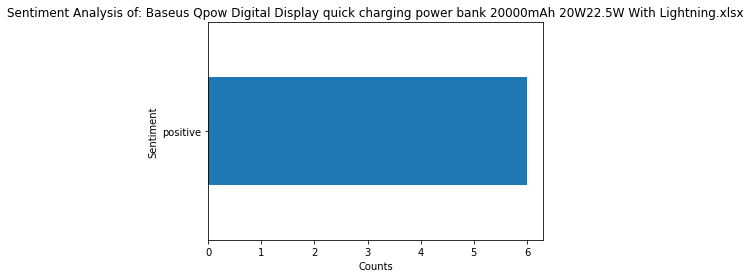

None

Positive Summary: 
।  খুবই ভালো প্রোডাক্ট আমি অনেকদিন যাবত ইউজ করতেছি সবাই কিনতে পারেন।  মোটামুটি ভালো।  ভালো।  ভালো কোয়ালিটি এবং একশ অথেনটিক প্রোডাক্টছবিতে যা দেখানো হয়েছে সেড়াই পাঠিয়েছেন সেলাররিকমন্ডেড

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus Reversible usb charging cable for iPhone.xlsx

positive_score is : 95.8
negative_score is : 4.2
neutral_score is : 0.0
Visual: 


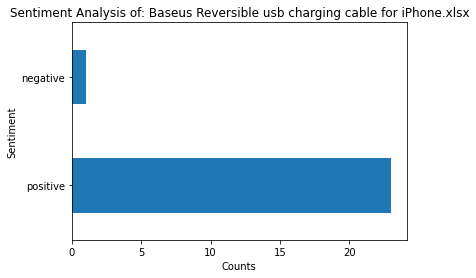

None

Positive Summary: 
।  অনেক ভালো কেবল এবং একশ অরিজিনাল প্যাকিং প্রিমিয়াম ছিলো সবচেয়ে বড় কথা এই ক্যাবল অনেক লম্বা আনুমানিক ৫-৬ ফিট হবে।  ক্যাবল টা অরিজিনাল এবং দেখতে খুবই প্রিমিয়ামধন্যবাদ সেলারকে কথায় ও কাজে মিল রাখার জন্য।  প্রিমিয়াম কোয়ালিটির বেসিউস লাইটেনিং ক্যাবল খুব ভাল স্যালারকে ধন্যবাদ যেটা চেয়েছিলাম তাই দিয়েছেন।  একেবারে অরিজিনাল ধন্যবাদ সেলার ভাইকে।  খুব ভালো চার্জার বিক্রেতার জন্য দোযা রইল ধন্যবাদ।  অনেক ভালো।  ভালো জিনিস।  পণ্যটি ভালো।  মান সম্মত।  ভালোই চলছে।  জাযাকাল্লাহ খাইরান ক্যাবলটি খুবই ভালো লেগেছে এই দামে অরিজিনাল প্রডাক্ট সেলারের রেস্পন্স খুব ভালো এবং দ্রুত ছিলো আর ডেলিভারিও খুব দ্রুত পেয়েছি আলহামদুলিল্লাহ

Negative Summary: 
।  প্রতারনাঅর্ডার করেছি এতটা পাইছি আরেকটা

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus Superior Series USB to iP Lightning 2.4A Fast Charging Data Cable 1m.xlsx

positive_score is : 100.0
negative_score is : 0.0

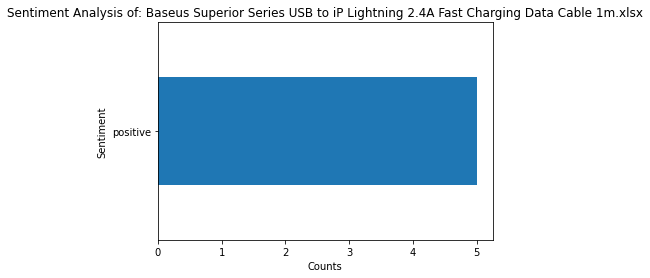

None

Positive Summary: 
।  অফিসিয়াল স্টোর থেকে কম রেটে ওথেন্টিক প্রোডাক্ট পেয়েছি ঠিকঠাক সেলার অনেক আন্তরিক রিকমেন্ডেড সবাই নিশ্চিন্তে নিতে পারেন।  ভালো লেগেছে প্রোডাক্টটি টেস্ট করতে পিসি থেকে ২৩জিবি কপি করি ফুল স্পীড পেযেছি ধন্যবাদ সেলারকে

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Baseus USB Male To Type-C Female Adapter Converter.xlsx

positive_score is : 82.6
negative_score is : 8.7
neutral_score is : 8.7
Visual: 


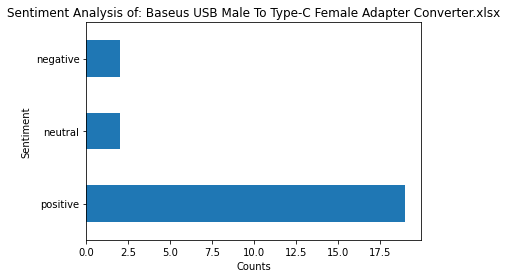

None

Positive Summary: 
।  ভালভাবে পেয়েছি ধন্যবাদ।  ধন্যবাদ দারাজ কে এত সুন্দর একটা প্রোডাক্ট দেওযার জন্য।  ভালো লাগতেছে।  ভালোই।  ভালো কিন্তু দাম একটু বেশি।  আলহামদুলিল্লাহ ভালো।  ভাল প্রোডাক্ট।  ভালো পণ্য

Negative Summary: 
।  মাস হলো কোনো সমস্যা হয়নি নিতে পারেন।  ড্যামেজ প্রোডাক্ট কানেক্ট হয় না হুদাই টাকা নষ্ট করলাম

Neutral Summary: 
।  ব্যবহার করতে পারিনি যে জন্য প্রয়োজন ছিলো তা আর দরকার পড়েনি পার্সেল রিসিভ করতে চাইনি বাট ডেলিভারি ম্যান একপ্রকার জোর করে বারবার ফোন দিয়ে দিয়ে গেছে তাই প্রোডাক্ট কেমন তা বলতে পারবো না।  ছবি দেযা আছে কিন্তু আমাকে দেযা হযেছে মেসেজে বলা ছিল কোড চেক হচ্ছে না কাজ চলছে সেদিকে সমস্যা নাই
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Beautiful Golden White Stone Bicha For Women - Nose Pin.xlsx

positive_score is : 81.2
negative_score is : 18.8
neutral_score is : 0.0
Visual: 


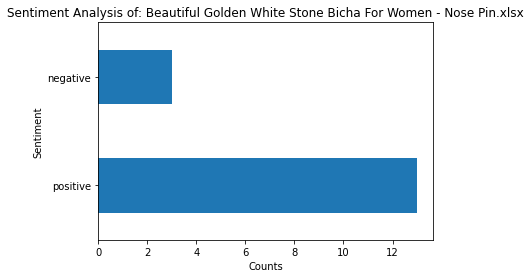

None

Positive Summary: 
।  ধন্যবাদ ঠিকঠাক পেয়েছি।  এক কোথায় অসাধারণ সেলারকে বলেছিলাম ভালো প্রোডাক্ট পেলে পাঁচ ষ্টার দেব সবাই নিতে পারেন প্যাকেজিং - ১০১০কোয়ালিটি - ৭১০সেলার - ১০১০ডেলিভারি - এক হাজার দশ।  খুভ ভালআমি হাজার হাজার প্রডাক্ট নিসি দারাজ আলহামদুলিল্লাহ প্রত্যেক টা প্রডাক্ট ই ভাল ছিল।  চেযেছিলাম সেটাই পেযেছি ধন্যবাদ।  খুবই ভালো পড়লে ভালো দেখাবে।  সুন্দর।  যেমনটা চেয়েছি এটা তেমন টাই পেয়েছি।  যেটা দেখেছি যেটার জন্য ক্রয় করেছি ঠিক সেটাই পেয়েছি ধন্যবাদ আপনাদের সঠিক পণ্যটি দেওয়ার জন্য

Negative Summary: 
।  অর্ডার করলাম বিছা দিয়ে দিলেন হেডফোন আপনাদের আরো সতর্ক হওয়া উচিত কাস্টমার সেটিসফেকশন একটা বড় ফ্যাক্টর।  এরচেয়ে ফালতু কোন জিনিস হয় না আপনাকে এটা যদি ফ্রী দেয় তবুও নিবেন না এমন একটা জিনিস মনে হয়- প্লাস্টিক দিয়ে বানিয়ে রঙের ডিব্বায় একটা চুবানি দিছে।  ভাল না কালার নষ্ট

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Best Gift Cute Shiny Star Choker Drop Charm Neckla

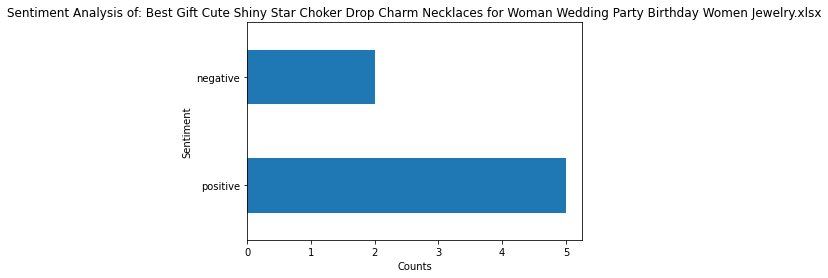

None

Positive Summary: 
।  দাম অনুযায়ী মান ভালো।  ভালো না।  ভালো

Negative Summary: 
।  একটা আশ্চার্যজনক বিষয় কি জানেন আমার এই প্রডাক্টটা ভূতে রিছিভ করছে কারন আমার হাতে আসে নাই যাস্ট ফোনে দেখছিলাম ডেলিভারি সাকসেসফুল হাস্যকর না ব্যাপার টা কষ্ট হলেও এটা সত্য ঘটনাআনস্পেক্টেড।  অনেক বাজেকোনো মিল নেইআর চৌদ্দপাঁচ দিনেই রঙ উঠে গেছে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Black Mosaic Love Pixel Necklace - Peach Hollow Heart - Double Layer Necklace - Punk Harajuku Style Fashion Asymmetry Women's Jewelry.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


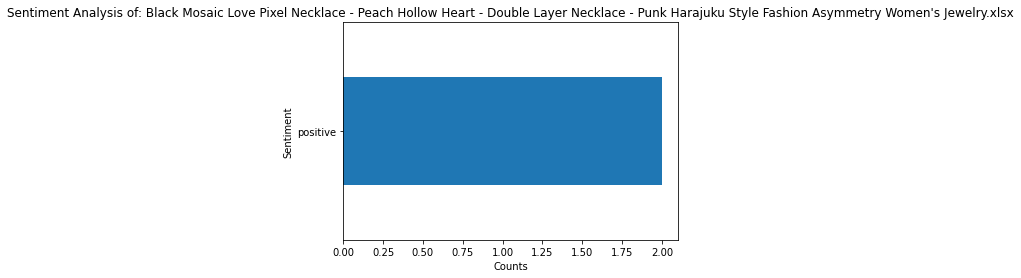

None

Positive Summary: 
।  নেকলেসটা যে এত সুন্দর ছবিতে ভালো বোঝা যায না অরিজিনাল এটা অনেক বেশি সুন্দর বোনের জন্য কিনেছিলাম বোন খুব খুশি হযেছে ধন্যবাদ দারাজ।  অনেক সুন্দরএতো কমে অনেক সুন্দর নেকলেস টা পেযেছি আমার খুব পছন্দ হযেছে ধন্যবাদ কে

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Bohemian Long Pendant Necklaces Lady Vintage Simple Multi-layer Pentagram Love Water Necklace Statement Jewelry for Women Gift.xlsx

positive_score is : 90.0
negative_score is : 10.0
neutral_score is : 0.0
Visual: 


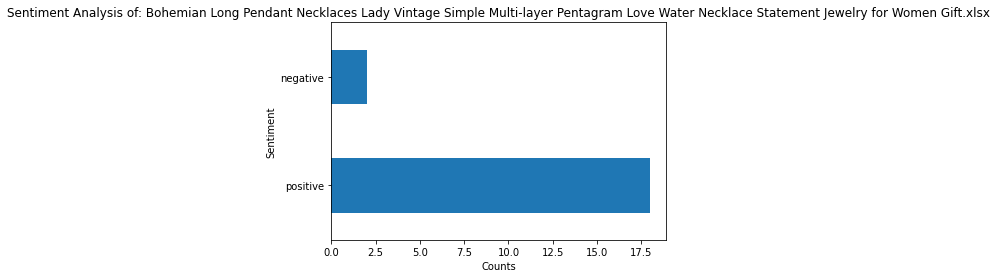

None

Positive Summary: 
।  অনেক সুন্দর হয়ছে।  মোট মুটি ভালো।  খুব সুন্দর।  ভালো

Negative Summary: 
।  খুলে দেখা হযনি তবে মনে হচ্ছে ভালো হবে বাডিতে নিযে খুলবো।  একদিন গলায দিযেছিতার মধ্যেই কালার নষ্ট হযে গেছে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Bohemian Style Women Girls Bracelet Rhinestone Leaves Chain Bangle Luxury Wedding Jewelry Simple Fashion Elegant New.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


None

Positive Summary: 
।  ব্রেসলেট টা ভীষণ সুন্দর সেম টু সেম পেযেছি যেমন ছবিতে দেখেছিলাম ঠিক তেমনটাই দিযেছে।  আমি ২টা অর্ডার করেছিলাম এক কথায় ব্রেসলেটটা অসাধারণ।  ভালো ছবিতে যেরকম ছিল সেরকম ই পাইছি ধন্যবাদ।  অনেক সুন্দর সবাই নিতে পারেনসেলার কে অনেক ধন্যবাদ।  দাম অনুযায়ী প্রোডাক্টি ভালো যেমনটা চেয়েছিলাম তেমনটা পেয়েছি ধন্যবাধ দারাজ ও সেলারকে।  মোটামুটি সুন্দর আছে খারাপ না দামটা একটু বেশি হয়ে গেল।  সঠিক সময়ে পেয়েছি পূন্য ভালো মানের পেয়েছি।  অনেক ভালো এক কথায পাইসের মধ্যে সেরা।  আলহমদুলিল্লাহ অনেক সুন্দর।  সুন্দর।  টা খুবই সুন্দর একদম এ যেমনটা দেযা আসলে এর থেকেও সুন্দর ও খুবই ভাল

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Bracelet Gift For Women Dainty Bracelet, Gemstone Bracelet Gift For Her, Crystal Bracelet - Bracelet For Women.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


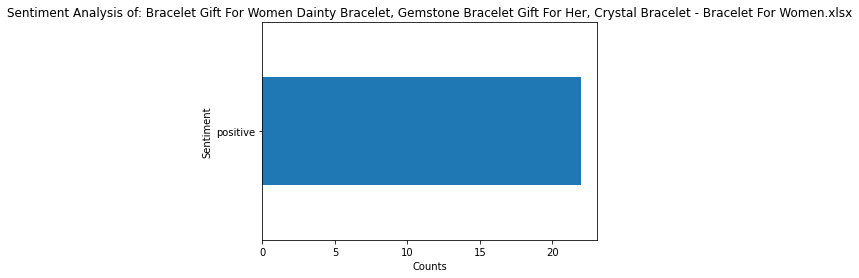

None

Positive Summary: 
।  আলহামদুলিল্লাহ খুব সুন্দর দুইটাসেলারকে যে কালার টা দিতে বলছি ঐটাই দিছে।  এক কথায অনেক সুন্দর যেমনটা দেখেছি তেমনটাই পেযেছিসেইলার ভাইযাটা ব্যবহার অনেক ভালোকিন্তু অনেক দেরি হযেছে পার্সেলটা আসতেএটাই ভালো লাগে নাই।  সেলার ফাস্ট রেসপন্স করে রেকমান্ডেড।  খুবই সুন্দর একটা ব্রেসলেট প্রডাক্ট এর ছবি যেমন বাস্তবেও দেখতে সেরকম।  মাশ আল্লাহদুই বান্ধবীর খুবই পছন্দ হইছেধন্যবাদ সেলারকে।  এই নিয়ে ৩য়বার অর্ডার করলামমাশ আল্লাহ ঠিক আছে সবধন্যবাদ সেলারকে।  যার জন্য নিয়েছি সে অনেক পছন্দ করেছে একদম ছবির মতই দেখতে।  সেলারকে অন্তরের অন্তস্তল থেকে ধন্যবাদ এত্তো সুন্দর।  সেম পিকচারের সাথে আর অনেক সুন্দর।  অনেক সুন্দর।  খুবই ভালো।  আমি দুইটা ব্রেসলেট অর্ডার করেছিলাম ব্রেসলেট গুলো দেখতে খুবই কিউট আমার কাছে খুব ভালো লেগেছে।  প্রডাক্টটি বেশ ভালো ছিলসবাই নিতে পারেন।  যেমনটা চেয়েছি তেমনই পেয়েছি ধন্যবাদ।  দামটা একটু বেশিতাই আরকি।  আমার খুব ভাল লাগলো।  অনেক সুন্দর।  সুন্দর তবে সাইডেগুলো উচু উচু করে থাকে একসাইড বসেঅন্যসাইড উচু হয়ে থাকে

Negative Summary: 
Not found


Neutral Summary: 
Not found

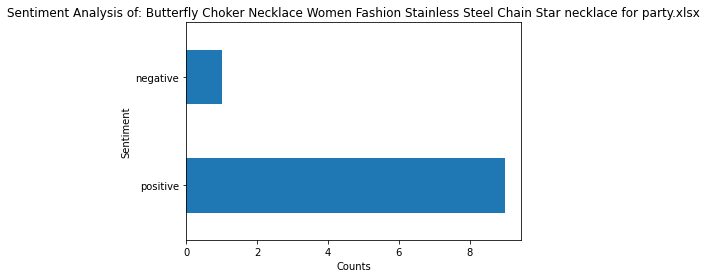

None

Positive Summary: 
।  বাচ্চা।  খুব ভালো।  ভালো।  ঘডি ভালো কিন্তু ডিসপ্লেতে একটু সমস্যা।  টাকা অনুযায় ঘড়ি টা খারাপ না ভালোই এক দিন পর রিভিউ দিলা আপনারা নিতে পারেন

Negative Summary: 
।  এই ঘডিটা অনেক বাজে একটা ঘডি চার্জ হযনা সারাদিন চার্জ দিলে সর্বোচ্চ থেকে মিনিট ব্যবহার করা যায অনেক গরম হযে যায চার্জে লাগানোর পর কোন অ্যাপস এ কাজ করে না ঠিকঠাক মত এই গড়ি কিনে আমি ঠকেছি

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: C800 Ultra Smart Watch for Men Women Series 8 1.99 Bluetooth Call Smartwatch Wireless Charging Watches (2).xlsx

positive_score is : 75.0
negative_score is : 25.0
neutral_score is : 0.0
Visual: 


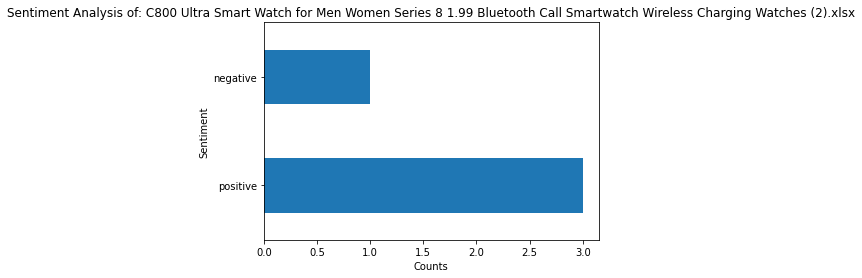

None

Positive Summary: 
।  ঘডি ভালো কিন্তু ডিসপ্লেতে একটু সমস্যা।  টাকা অনুযায় ঘড়ি টা খারাপ না ভালোই এক দিন পর রিভিউ দিলা আপনারা নিতে পারেন

Negative Summary: 
।  এই ঘডিটা অনেক বাজে একটা ঘডি চার্জ হযনা সারাদিন চার্জ দিলে সর্বোচ্চ থেকে মিনিট ব্যবহার করা যায অনেক গরম হযে যায চার্জে লাগানোর পর কোন অ্যাপস এ কাজ করে না ঠিকঠাক মত এই গড়ি কিনে আমি ঠকেছি

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: C800 Ultra Smart Watch for Men Women Series 8 1.99 Bluetooth Call Smartwatch Wireless Charging Watches.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


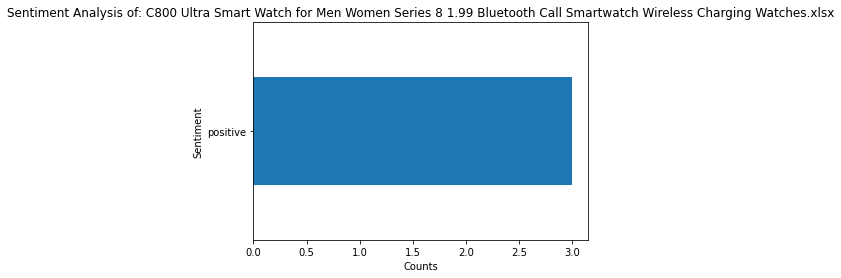

None

Positive Summary: 
।  মনে করেছিলাম জিনিসটা অক বড় হবে কিন্তু না তারপরও অনেক কাজের ধন্যবাদ।  সব মিলিযে ভালই কিন্তু মোটা তার এর জন্য ব্যবহার করা যায না রাবারের কম।  সুন্দর একটি প্রোডাক্ট দেযালে মোটামুটি ভালোভাবেই লেগেছে চাইলে সবাই নিতে পারেন

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Cable Management Multipurpose Cord Holder Earphone Wire Organizer.xlsx

positive_score is : 88.2
negative_score is : 5.9
neutral_score is : 5.9
Visual: 


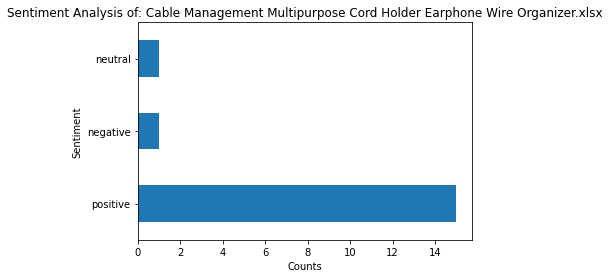

None

Positive Summary: 
।  অস্থির ক্যাবল ফিটিংও হয় ভালোমতো এডহেসিভও সুন্দরভাবে কাজ করছে।  দারুন একটা গেজেট।  দামের তুলনাই ভালো।  ভালো নিতে পারেন।  ভাল জিনিস

Negative Summary: 
।  দুই মাসও টিকে নাই নষ্ট হয়ে গেছে প্রথম থেকেই একটু চাপ না দিলে চার্জ হতো না টেনেটুনে ২-৩ মাস গেছে

Neutral Summary: 
।  বেশ শক্ত আর মাঝে মাঝে চার্জ হয় না উল্টায় দিলে তখন হয়দাম অনুযায়ী এভারেজ
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: CableCreation 0.5 Feet Short Lightning to USB Data Sync Cable .xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


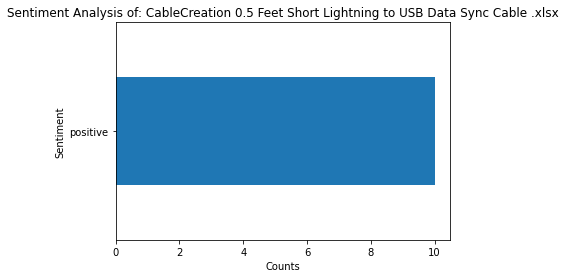

None

Positive Summary: 
।  অনেক ভালো পন্য ও ভালো পন্যের তুলনায দামটা একটু বেশী আবার গুনগতমান্র দিক থেকেও ভালো।  কোয়ালিটি নিম্নমানের তবে মোটের উপর ভালোই।  কাজ করে না ভালো পেলাম না।  কনর্ভাটার টার পোর্টটা আমার কাছে ভংঙ্গুর মনে হচ্ছে একটু জোরে চাপ লাগলে ভেঙে যেতে পারে আরেকটু ভালো মানের পন্য গ্রাহকদের সরবারহ কনা উচিত।  অসাধারণ একটি পণ্য হাতে পেযে খুব ভালো লাগলো ধন্যবাদ দারাজ অনলাইন শপিং আরো ধন্যবাদ জানাই দারাজ সেলার কে যে প্রডাক্ট হাতে পৌঁছে দিযেছে।  টাকা বিবেচনায খুব ভালো মানে একটি প্রোডাক্ট পেযেছি ধন্যবাদ সেলার কে এভাবে মানুষের বিশ্বাস অর্জন করুনবাংলাদেশের অধিকাংশ মানুষ বিশ্বাস করতে পারেনা।  দারাস কে ধন্যবাদ।  সত্যিই খুব অসাধারণ প্রোডাক্ট দামেও কম মানে ভালোআপনারা চাইলে নিতে পারেন।  ধন্যবাদ দারাজ কে এত তাডাতাডি প্রডাক্ট পাঠানোর জন্য যেমনটা অর্ডার করেছি ঠিক তেমনটাই পেযেছি ধন্যবাদ সেলার কে

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Cai

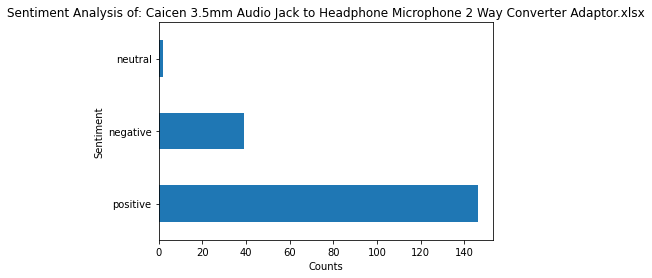

None

Positive Summary: 
।  আমার ব্যক্তিগতভাবে ভালো লেগেছে আপনারা সবাই চাইলে নিতে পারেন।  ভালোই লাগলোতবে দামটা একটু বেশি।  অনেক ভালো খুব তাডাতাডি ডেলিভারি পেযেছি ধন্যবাদ।  যেমন চেয়েছি তেমন পেয়েছিঅনেক ভালো জিনিস।  প্রডাক্ট ঠিক যেমনটা চেয়েছিখুবই ভালো জিনিস ধন্যবাদ সেলার কে।  ভালো কিন্তু একটু ফাটা ছিল।  জিনিস ভালো হয়ছে।  ভালো ছিলো পণ্যটি।  ভালো জিনিস।  খুবই ভালো এবং অতন্ত্য একটা কাজের জিনিশ।  অনেক ভালো একটি পন্যধন্যবাদ দারাজ।  দারুন কালার প্রডাক্ট খুব ভালো।  জিনিস ভালো সেলার কে ধন্যবাদ।  অনেক ভালো ধন্যবাদ সেলার ভাই।  ভালো ছিলো ধন্যবাদ সেলার কে।  দারুন খুবই ভালো পন্য।  আলহামদুলিল্লাহ ভালো।  প্রোডাকশন অনেক ভালো।  ভালো জিনিস নিতে পারেন।  অসাধারন একটি পোডাকখুব ভালো যা দেখছি তাই পেয়েছিআপনারা চাইলে নিতে পারেনধন্যবাদ দারাজ কে।  প্রোডাক্টটা মোটামুটি ভালো আপনারা নিশ্চিন্তে নিতে পারেন।  খুব ভালো জিনিস যেমনটি চেয়েছিলাম তেমনটা পেয়েছি।  জিনিসটা ভালো কিন্ত আমার মোবাইল এ সাপোর্ট করলো না।  হ্যাঁ এই অডিও জ্যাক ভালো কাজেরধন্যবাদ দারাজ।  ডেলিভারি ভালো ছিল প্রডাক্ট টা ভালো আছে।  জিনিস ভালো তবে চেয়েছি কালো দি

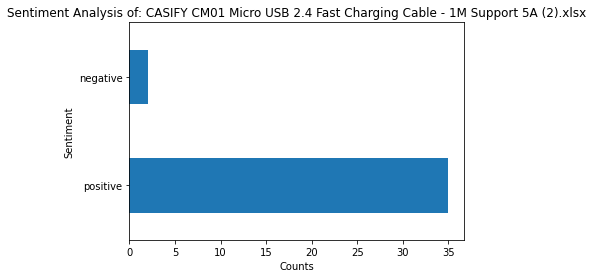

None

Positive Summary: 
।  এটা ভালো ছিলো।  মোটামুটি ভালোই ছিলো কেবল গুলো।  ভালোই মোটমুটি কাজ চলে।  ভালো ছিলো।  আলহামদুলিল্লাহ পন্য মান ভালো একশ।  ক্যাবলটি ভালো চার্জ দ্রুত হয়।  কেবল ভালো সবাই নিতে পারেন।  দাম হিসাবে পেকিং ভালো ছিলোনা।  অনেক অনেক ভালো।  কেবল টা খুবই ভালো।  অনেক ভালো দেখতে।  দাম হিসেবে ভালো।  ভালো প্রোডক্ট।  ভালো।  ভালো

Negative Summary: 
।  খুবই ভাল ক্যাবল দ্রুত চার্জ উঠে ফাস্ট চার্জ সাপোর্ট করে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: CASIFY CM01 Micro USB 2.4 Fast Charging Cable - 1M Support 5A.xlsx

positive_score is : 92.9
negative_score is : 7.1
neutral_score is : 0.0
Visual: 


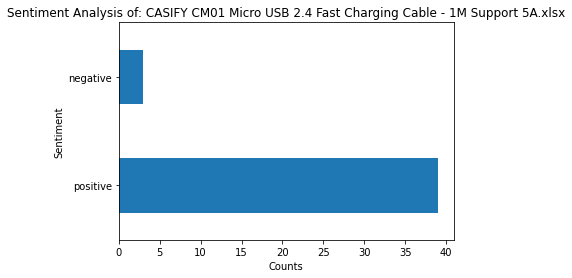

None

Positive Summary: 
।  ভালই।  ভালো চাজও তারাতারি হয়।  ভালো ক্যাবল।  অনেক ভালো।  ভালো প্রডাক্ট ধন্যবাদ সেলার এবং দারাজ কে।  খুবই ভালো কেবল আপনারা চাইলে নিতে পারেন।  মোটা মটি ভালোই চার্জ হয।  কেবলটা অনেক ভাল।  ভালো জিনিস দেছে।  খুব ভালো।  ভালো।  ভালই

Negative Summary: 
।  মাত্র দশ দিন ইউজ করার পর ক্যাবল নষ্ট হয়ে গেছে।  ফার্স্ট চার্জ হযনা এমনে মোটামুটি ভালই।  চারজ উঠছে না দশতিন মিনিটে এক উঠেছেবুঝলাম না কিছু

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: CASIFY CT01 Type C Cable Fast Charging 5A USB Data Cable - 1M.xlsx

positive_score is : 95.0
negative_score is : 2.5
neutral_score is : 2.5
Visual: 


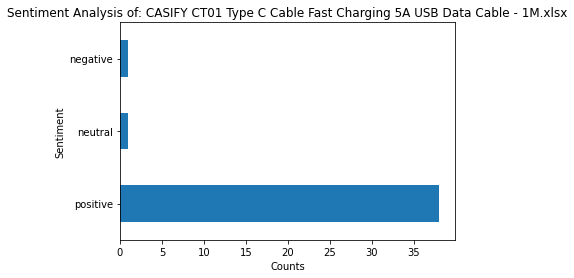

None

Positive Summary: 
।  প্রোডাক্ট ভালো এবং কার্যকর ধন্যবাদ।  খুব ভালো ক্যাবল ছিল ধন্যবাদ।  দারুণ ফাস্ট চার্জিং সাপোর্ট করছে ধন্যবাদ সেলারকে।  কেবলটা দাম অনুযায়ী অনেক ভালো ধন্যবাদ।  কেবেলটা অনেক ভালো উন্নত মানের ধন্যবাদ সেলার কে ধন্যবাদ দরাজ কে।  দাম অনুযায়ী টি ভালোই সেলার অনেক ধন্যবাদ।  ঠিকঠাক মতো হাতে পেযেছি ধন্যবাদ সেলারকে।  দাম অনুযায়ী ভালো আলহামদুলিল্লাহ।  ক্যাবলটি ভালো চার্জ দ্রুত হয়।  অনেক ভালো নিতে পারেন সবাই।  অনেক ভালো ক্যাবল ধন্যবাদ।  ভালো।  জিনিস ভালো দাম হিসেবে।  কেবল কোযালিটি খুবই ভালো আপনারা চাইলে নিতে পারেন।  মোটামুটি খুব একটা ভালো না

Negative Summary: 


Neutral Summary: 
।  এই দামে ঠিক আছে তবে কত দিন যায় দেখার বিষয়
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: CASIFY OTG08 2 in 1 Otg Micro + Type C Otg Type C Otg USB 3.0 USB C Adapter 2 in 1 Type C + Micro Otg USB 3.0 Adapter Type-C Adapter OTG Cable.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is 

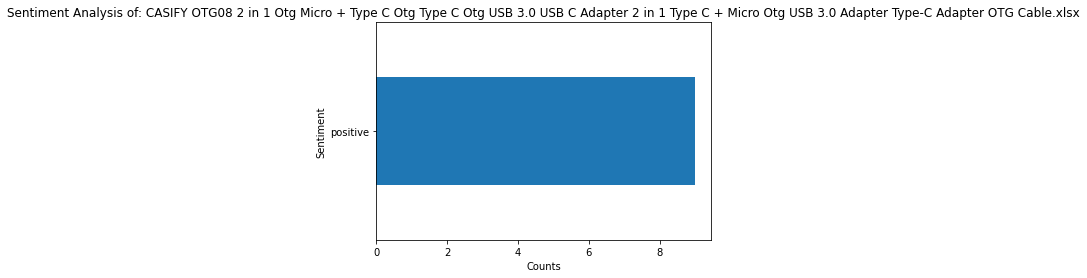

None

Positive Summary: 
।  একশ ওরিজিনাল প্রোডাক্টকেউ নিলে নিতে পারেন।  প্রোডাক্ট এবং সার্ভিস দুটোই ভালো।  পণ্য খুব ভাল ছিল একদম মনের মত।  খুব ভালো হয়েছে।  কাজ করে একশ।  প্রাইস টা একটু বেশি মনে হযেছে তাছাডা প্রোডাক্ট টা ভালো

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: CASIFY USB 3.0 Male to USB Type C Female OTG Adapter Converter For Smartphones - Black.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


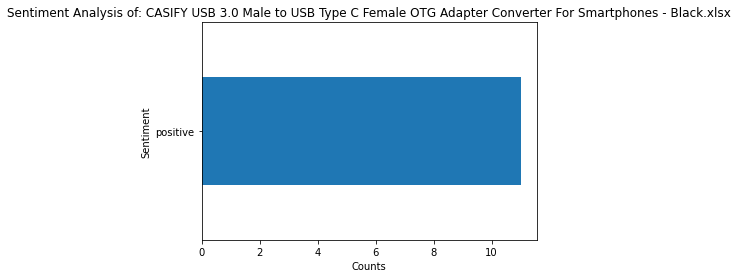

None

Positive Summary: 
।  দামটা অনেক বেশি জিনিসটা খুব ভালো।  আঠাশ টাকা দাম হিসেবে কোয়ালিটি খারাপ না তবে এটায় এ পাওয়ার সম্ভবনা নেই হয়ত এ সর্বোচ্চ এর মত পেয়েছি অলমোস্ট ফুল লোডে অন্য ক্যাবলে যেখানে পাচ্ছিলো এ ছাড়াও ক্যাবলের দৈর্ঘ্য বেশ লম্বা ছিলো তবে তারটা বেশ হালকা আর একদম সফট টাইপের তবে দাম বিবেচনায় ঠিকই আছে যাদের ফার্স্ট চার্জিং দরকার তারা এটা নিতে পারেন তবে বাজেট একটু বাড়াতে পারলে আরও ভালো কোয়ালিটি পাবেন আর নরমাল কাজের জন্য এটা দারুণ কারণ দামটা বেশ কম।  ছয় মাস আগে কিনেছিলাম আঠাশ টাকায এখন হলো একশ পাঁচ টাকা সব মিলিযে খরচ পডল একশ ষাটসাত টাকা যদিও জিনিসটা খুবই ভালো তাডাতাডি চার্জ হয।  অনেক দেরিতে ডেলিভারি পেয়েছি কেবলটা খুলে ব্যবহার করে ভালই মনে হল মজবুত মোলায়েম ও মানসম্মত মনে হল দাম হিসাবে ভালো সবাই নিতে পারেন।  আসসালামু আলাইকুম কেমন আছেনআসা করি ভালে আছেনতো এই প্রোডাক্টটা খুবই ভালো এই কেবল টা চার ফুটের লম্বা বেশি আশা করি প্রোডাক্টটি ভালো হবে এটা নিতে পারেন আমিও ব্যবহার করতেছি ভালো ভালো সার্ভিসিং।  ক্যাবলটা সত্যিই খুব ভালো অন্যান্য ক্যাবলের মতো লুজ না লাগালে এক্কেবারে টাইট হয়ে লেগে থাকে

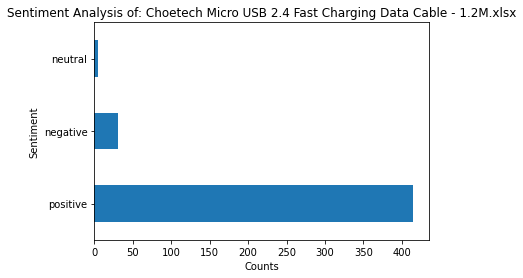

None

Positive Summary: 
।  আলহামদুলিল্লাহ আমার কাছে অনেক ভালো লেগেছেসাথে এক মাসের ওয়ারেন্টি আছে।  খুবই ভালো প্রডাক্ট কোয়ালিটি ও পেকেজিং ভালো।  বেশ ভালো প্রোডাক্ট অরিজিনাল আইটেম আমি সন্তুষ্ট।  ক্যাবল টা আসলেই অনেক ভালোখুব ভালই দ্রুত চার্জ হয।  অসাধারন একটা প্রডাক্ট।  ক্যাবল কোয়ালিটি মোটামুটি ভালোই আছেডেলভারি খুব তাড়াতাড়ি পেয়েছি মাত্র তিনদিনে ধন্যবাদ।  আলহামদুলিল্লাহ ক্যাবলটি খুব ভালো এবং তাড়াতাড়ি চার্জ হয় অসংখ্য ধন্যবাদ সেলারকে।  আশাকরি ভালো হবে।  খুবই দ্রুত ডেলিভারি পেলাম দামে কম মানে ভালো।  খারাপ না ক্যাবল টাভালোই দশ এ নব্বইপাঁচ রেটিং।  ক্যাবলটি অনেক ভালো ফাস্ট চার্জিং সাপোর্ট করে।  চার্জারের ক্যাবল হিসেবে নিযেছিলাম ভালো সার্ভিস দিচ্ছে সেলার কে ধন্যবাদ।  ভালো ছিল আগেও একটা নিযেছিলাম ধন্যবাদ সেলার ধন্যবাদ দারাজ।  অনেক ভালো মানের নিতে পারেন।  মোটামুটি ভালো দুইটা নিলাম।  দাম হিসাবে জিনিস খুব ভালো।  যা বলা ছিল তাই পাইছি ক্যাবলটা ভালো চার্জও ফাস্ট হয়।  চাজিং কেবলটি ভালো।  কেবল কোযালিটি ভালো মোবাইল গুলো ভালোই চার্জ হচ্ছে।  আলহামদুলিল্লাহ দাম হিসেবে প্রোডাক্টি অনেক ভালো।  কেবল টা ভালোই কিন্

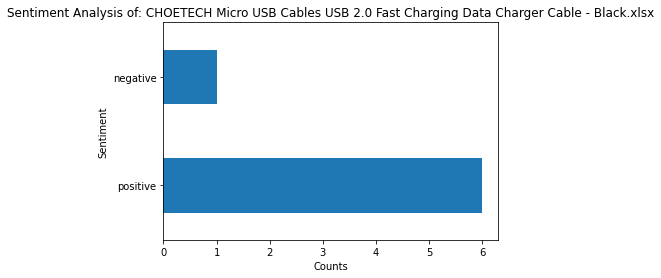

None

Positive Summary: 
।  এক কথায় দারুণ একটা ইউএসবি ক্যাবল ধন্যবাদ সেলার।  ওরিজিনাল প্যাকেটে পেয়েছি ধন্যবাদ

Negative Summary: 
।  তিন মাস গেছে এখন নষ্ট হযে গেছে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: COLMI C60 SmartWatch 1.9 inch Full Screen Bluetooth Calling Heart Rate Sleep Monitor 19 Sport Models Smart Watch - Smart Watch (2).xlsx

positive_score is : 89.3
negative_score is : 10.7
neutral_score is : 0.0
Visual: 


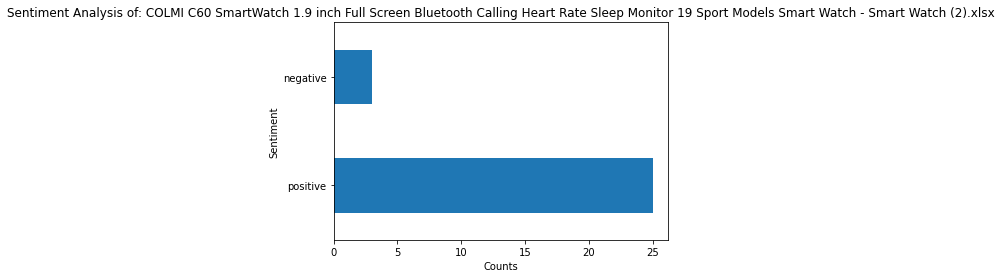

None

Positive Summary: 
।  খুব সুন্দর অল্প টাকা হিসেবে অনেক ভালো আমার খুব পছন্দ হযেছে আপনারা সবাই নিতে পারেন।  আমার দেখা ভালো সবাই নিতে পারেআশা করি পছন্দ হবে সার্ভিস ভালো।  দশপাঁচ দিন ব্যবহার করে রিভিউ দিচ্ছিআলহামদুলিল্লাহ অনেক ভালো কোনো খারাপই ইস্যু ফেস করেনি চার্জ ভালো থাকে।  পণ্যটি অনেক ভালো সাথে একটি স্ক্রীন প্রোটেক্টর ছিল আপনারা চাইলে নিতে পারেন।  খুবই ভালো আপনারা চাইলে নিতে পারেন।  বেশ ভালো চার্জ ২-৩ দিন থাকে।  ধন্যবাদ দাদা চার্জ ভালো থাকে।  খুব ভালো ঘড়ি।  অনেক ভালো

Negative Summary: 
।  ঘড়ি টা ভালো ছিলোকিন্তু আমাকে মনে হয় অন্য কারো রিটার্ন করা জিনিস দিয়েছেননতুন জিনিসে দাগ থাকলে মনটা ভালো লাগেআমি এটি রিটার্ন করতে চাইকোন দাগ পরা জিনিস ব্যবহার করতে পারবো না।  ঘড়ি টা ভালো ছিলোকিন্তু আমাকে মনে হয় অন্য কারো রিটার্ন করা জিনিস দিয়েছেননতুন জিনিসে দাগ থাকলে মনটা ভালো লাগেআমি এটি রিটার্ন করতে চাইকোন দাগ পরা জিনিস ব্যবহার করতে পারবো না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 



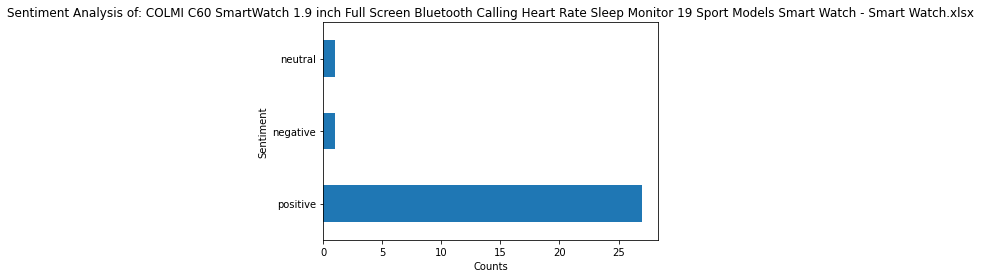

None

Positive Summary: 
।  যা চেয়েছি তার থেকে ভালো পেয়েছি সাথে একটি প্রটেক্টরও পেয়েছি খুবই ভালো একটা স্মার্ট ওয়াচ সবাই নিতে পারেন ধন্যবাদ দারাজ সেলার অনেক আন্তরিক তাদেরকেও ধন্যবাদ রিকমন্ডেড।  খুব সুন্দর অল্প টাকা হিসেবে অনেক ভালো আমার খুব পছন্দ হযেছে আপনারা সবাই নিতে পারেন।  আমার দেখা ভালো সবাই নিতে পারেআশা করি পছন্দ হবে সার্ভিস ভালো।  দশপাঁচ দিন ব্যবহার করে রিভিউ দিচ্ছিআলহামদুলিল্লাহ অনেক ভালো কোনো খারাপই ইস্যু ফেস করেনি চার্জ ভালো থাকে।  পণ্যটি অনেক ভালো সাথে একটি স্ক্রীন প্রোটেক্টর ছিল আপনারা চাইলে নিতে পারেন।  খুবই ভালো আপনারা চাইলে নিতে পারেন।  বেশ ভালো চার্জ ২-৩ দিন থাকে।  ঘড়িটি অনেক ভালোঅনেক সুন্দর ঠিক আছে কিন্তু ভুলবসত চার্জ করার ক্যাবলটা ছিলনা তাই রিফান্ড করতে হলো।  প্রডাক্ট টা ভালো পাইছিকিন্তু আমি কোন প্রটেক্টটর পাইনি ব্যাড লাক আমার।  ধন্যবাদ দাদা চার্জ ভালো থাকে।  খুব ভালো ঘড়ি।  অনেক ভালো।  সেলারকে অসংখ্য ধন্যবাদ এত একটা ভালো প্রোডাক্ট দেওযার জন্য কেউ চাইলে নিতে পারেন।  আলহামদুলিল্লাহ ভালোই মনে হচ্ছে দ্রুত ডেলিভারি হযেছে ধন্যবাদ সেলারকে সাথে দারাজকে

Negative Summary: 
।  এ

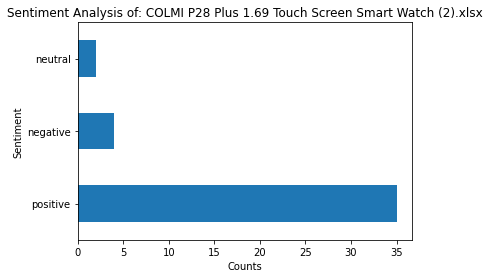

None

Positive Summary: 
।  আলহামদুলিল্লাহ অনেক ভালো পাইছি ঘড়িটা আপনারা সবাই নিতে পারেন।  আলহামদুলিল্লাহ খুবই ভালো একটা ঘডি দুই হাজারের কমে।  এক কথায খুব ভালো জিনিস একশ মিল আছে।  চাইলাম কালো দিযেছে অন্যটাকিন্তু বাজেট অনুযাযী প্রোডাক্ট অনেক ভালো।  প্রোডাক্টটি ভালো ছিলো যেমন দেখেছি তেমন ই পাইছি ধন্যবাদ।  সব ঠিকঠাক অরজিনাল প্রোডাক্টসেলার ও ভালো।  প্রোডাক্টা ভালোইসঠিক সময়ে পেয়েছি।  চবি তুলতে পারিনাই ভালো ছিল।  অসাধারণ একটি প্রডাক্ট।  আলহামদুলিল্লাহ।  ভালো।  ভাল।  সেলারকে অসংখ্য ধন্যবাদ এত একটা ভালো প্রোডাক্ট দেওযার জন্য কেউ চাইলে নিতে পারেন।  আলহামদুলিল্লাহ ভালোই মনে হচ্ছে দ্রুত ডেলিভারি হযেছে ধন্যবাদ সেলারকে সাথে দারাজকে

Negative Summary: 
।  এটা কি ধরনের ব্যবসায়ী পলিসিঅর্ডার করলাম ব্লাক কালার দিলো সাদাহতাশ খুব্ ই হতাশএই রকম হলে ত আমার মত দারাজের রেগুলার কাস্টমার গুলো হারিয়ে ফেলবেননিশ্চয় তা দিতে না পারলে আপনাদের থেকে পন্য কিনবো কেন।  ঘডিটার প্রোডাক্টটা দুইদিন ইউজ করার পর কথা এবং স্পিকারের সমস্যা দেখা দিচ্ছে কল আসলে শুধু বাইবেট হয কিন্তু কথা বলা যায না কোন আওযাজ আসে না খুবই বাজে একটা প্রো

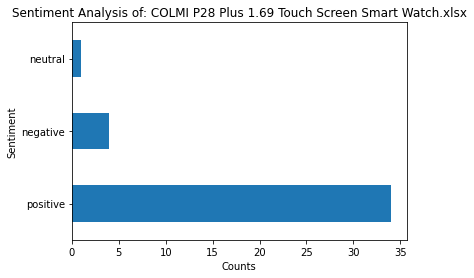

None

Positive Summary: 
।  আলহামদুলিল্লাহ অনেক ভালো পাইছি ঘড়িটা আপনারা সবাই নিতে পারেন।  আলহামদুলিল্লাহ খুবই ভালো একটা ঘডি দুই হাজারের কমে।  এক কথায খুব ভালো জিনিস একশ মিল আছে।  চাইলাম কালো দিযেছে অন্যটাকিন্তু বাজেট অনুযাযী প্রোডাক্ট অনেক ভালো।  সবকিছুই ঠিকই আছে কিন্তু একটা গ্লাস প্রটেক্টটর দিলে খুব ভালো হতো।  প্রোডাক্টটি ভালো ছিলো যেমন দেখেছি তেমন ই পাইছি ধন্যবাদ।  সব ঠিকঠাক অরজিনাল প্রোডাক্টসেলার ও ভালো।  প্রোডাক্টা ভালোইসঠিক সময়ে পেয়েছি।  চবি তুলতে পারিনাই ভালো ছিল।  অসাধারণ একটি প্রডাক্ট।  আলহামদুলিল্লাহ।  ভালো।  ভাল

Negative Summary: 
।  এটা কি ধরনের ব্যবসায়ী পলিসিঅর্ডার করলাম ব্লাক কালার দিলো সাদাহতাশ খুব্ ই হতাশএই রকম হলে ত আমার মত দারাজের রেগুলার কাস্টমার গুলো হারিয়ে ফেলবেননিশ্চয় তা দিতে না পারলে আপনাদের থেকে পন্য কিনবো কেন।  ঘডিটার প্রোডাক্টটা দুইদিন ইউজ করার পর কথা এবং স্পিকারের সমস্যা দেখা দিচ্ছে কল আসলে শুধু বাইবেট হয কিন্তু কথা বলা যায না কোন আওযাজ আসে না খুবই বাজে একটা প্রোডাক্ট আমাকে দিছে দযা করে আমার এই প্রোডাক্টটা চেঞ্জ করে দেন ওই দুই তিন দিন ইউজ করছি কিন্তু হঠা করে 

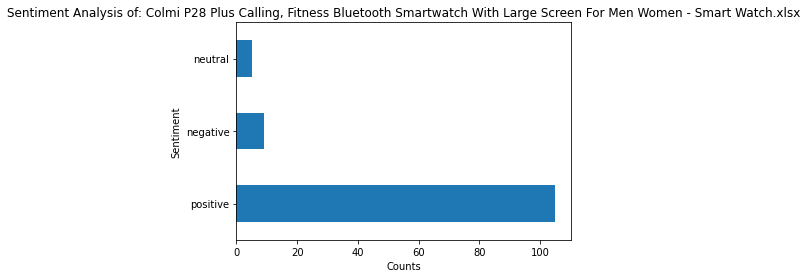

None

Positive Summary: 
।  এই দামে খুব ভালো একটা স্মার্ট ওযাচ চার্জ অনেক দিন থাকেএর আগেও একটা ব্যবহার করেছি খুব ভালো প্রোডাক্টনিতে পারেন সবাই।  প্রোডাক্টি অনেক ভালো যেমন চেয়েছিলাম ঠিক তেমনটাই পেয়েছি ধন্যবাদ দারাজ এবং সেলারকে।  প্রাইজ অনুযাযী অনেক ভালো লুকিং টাও ভালো লাগছে।  আজ পাইলাম অনেক ভালো একটা ওয়াচ ধন্যবাদ দারাজ কে।  খুবই ভালো একটা প্রোডাক্টযেমনটা চেযেছি ঠিক তেমনটাই পেযেছিদারাজ কে ধন্যবাদ এর ব্যবহার খুব ভালো ছিল দারাজ কে ধন্যবাদ।  সত্যিই অসাধারণ প্রডাক্ট এককথায় সাধ্যের মধ্যে সবটুকু সুখসেলার ও অনেক ভালো ধন্যবাদ দারাজ ও সেলারকে।  আমার কাছে ভালো লেগেছে সবাই নিতে পারেন কম বাজেটে ভালো মানের স্মার্ট ওয়াচ ধন্যবাদ দারাজ।  দাম অনুযায়ী অসাধারণ একটি ঘড়িদেখতেও ভালো ধন্যবাদ সেলারকে অরিজিনাল প্রোডাক্ট দেয়ার জন্য।  আলহামদুলিল্লাহ যা চেযেছি তাই পেযেছি সেলার খুব ভালো।  আলহামদুলিল্লাহ।  সবকিছুই আনেক ভালোএক কথায়।  আলহামদুলিল্লাহ ভালো পেয়েছি দাম অনুযায়ী সব ঠিকই আছে সেলার কে ধন্যবাদ।  খুব ভালো মানের পন্যসবদিক দিয়ে সেরা একটা পন্য পেলাম ধন্যবাদ দারাজ।  খুবই ভালো প্রডাক্ট নিতে পারেন সবাই।  এই দামে পারফে

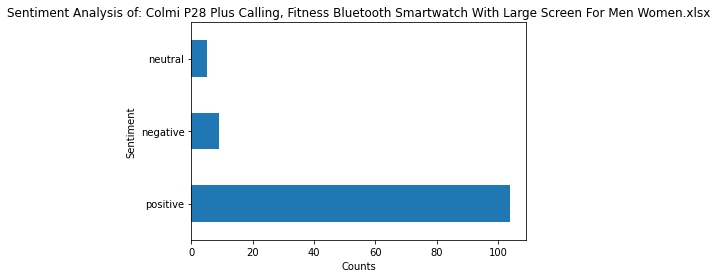

None

Positive Summary: 
।  এই দামে খুব ভালো একটা স্মার্ট ওযাচ চার্জ অনেক দিন থাকেএর আগেও একটা ব্যবহার করেছি খুব ভালো প্রোডাক্টনিতে পারেন সবাই।  প্রোডাক্টি অনেক ভালো যেমন চেয়েছিলাম ঠিক তেমনটাই পেয়েছি ধন্যবাদ দারাজ এবং সেলারকে।  প্রাইজ অনুযাযী অনেক ভালো লুকিং টাও ভালো লাগছে।  আজ পাইলাম অনেক ভালো একটা ওয়াচ ধন্যবাদ দারাজ কে।  খুবই ভালো একটা প্রোডাক্টযেমনটা চেযেছি ঠিক তেমনটাই পেযেছিদারাজ কে ধন্যবাদ এর ব্যবহার খুব ভালো ছিল দারাজ কে ধন্যবাদ।  সত্যিই অসাধারণ প্রডাক্ট এককথায় সাধ্যের মধ্যে সবটুকু সুখসেলার ও অনেক ভালো ধন্যবাদ দারাজ ও সেলারকে।  আমার কাছে ভালো লেগেছে সবাই নিতে পারেন কম বাজেটে ভালো মানের স্মার্ট ওয়াচ ধন্যবাদ দারাজ।  দাম অনুযায়ী অসাধারণ একটি ঘড়িদেখতেও ভালো ধন্যবাদ সেলারকে অরিজিনাল প্রোডাক্ট দেয়ার জন্য।  আলহামদুলিল্লাহ যা চেযেছি তাই পেযেছি সেলার খুব ভালো।  আলহামদুলিল্লাহ।  সবকিছুই আনেক ভালোএক কথায়।  আলহামদুলিল্লাহ ভালো পেয়েছি দাম অনুযায়ী সব ঠিকই আছে সেলার কে ধন্যবাদ।  খুব ভালো মানের পন্যসবদিক দিয়ে সেরা একটা পন্য পেলাম ধন্যবাদ দারাজ।  খুবই ভালো প্রডাক্ট নিতে পারেন সবাই।  এই দামে পারফে

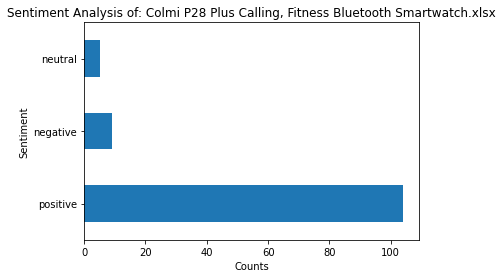

None

Positive Summary: 
।  এই দামে খুব ভালো একটা স্মার্ট ওযাচ চার্জ অনেক দিন থাকেএর আগেও একটা ব্যবহার করেছি খুব ভালো প্রোডাক্টনিতে পারেন সবাই।  প্রোডাক্টি অনেক ভালো যেমন চেয়েছিলাম ঠিক তেমনটাই পেয়েছি ধন্যবাদ দারাজ এবং সেলারকে।  প্রাইজ অনুযাযী অনেক ভালো লুকিং টাও ভালো লাগছে।  আজ পাইলাম অনেক ভালো একটা ওয়াচ ধন্যবাদ দারাজ কে।  খুবই ভালো একটা প্রোডাক্টযেমনটা চেযেছি ঠিক তেমনটাই পেযেছিদারাজ কে ধন্যবাদ এর ব্যবহার খুব ভালো ছিল দারাজ কে ধন্যবাদ।  সত্যিই অসাধারণ প্রডাক্ট এককথায় সাধ্যের মধ্যে সবটুকু সুখসেলার ও অনেক ভালো ধন্যবাদ দারাজ ও সেলারকে।  আমার কাছে ভালো লেগেছে সবাই নিতে পারেন কম বাজেটে ভালো মানের স্মার্ট ওয়াচ ধন্যবাদ দারাজ।  দাম অনুযায়ী অসাধারণ একটি ঘড়িদেখতেও ভালো ধন্যবাদ সেলারকে অরিজিনাল প্রোডাক্ট দেয়ার জন্য।  আলহামদুলিল্লাহ যা চেযেছি তাই পেযেছি সেলার খুব ভালো।  আলহামদুলিল্লাহ।  সবকিছুই আনেক ভালোএক কথায়।  আলহামদুলিল্লাহ ভালো পেয়েছি দাম অনুযায়ী সব ঠিকই আছে সেলার কে ধন্যবাদ।  খুব ভালো মানের পন্যসবদিক দিয়ে সেরা একটা পন্য পেলাম ধন্যবাদ দারাজ।  খুবই ভালো প্রডাক্ট নিতে পারেন সবাই।  এই দামে পারফে

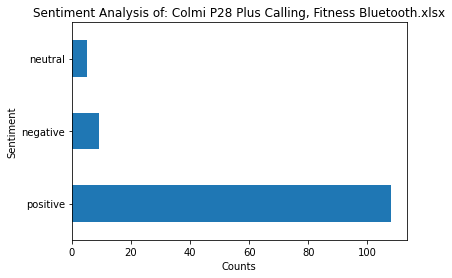

None

Positive Summary: 
।  প্রোডাক্টি অনেক ভালো যেমন চেয়েছিলাম ঠিক তেমনটাই পেয়েছি ধন্যবাদ দারাজ এবং সেলারকে।  প্রাইজ অনুযাযী অনেক ভালো লুকিং টাও ভালো লাগছে।  আজ পাইলাম অনেক ভালো একটা ওয়াচ ধন্যবাদ দারাজ কে।  খুবই ভালো একটা প্রোডাক্টযেমনটা চেযেছি ঠিক তেমনটাই পেযেছিদারাজ কে ধন্যবাদ এর ব্যবহার খুব ভালো ছিল দারাজ কে ধন্যবাদ।  সত্যিই অসাধারণ প্রডাক্ট এককথায় সাধ্যের মধ্যে সবটুকু সুখসেলার ও অনেক ভালো ধন্যবাদ দারাজ ও সেলারকে।  আমার কাছে ভালো লেগেছে সবাই নিতে পারেন কম বাজেটে ভালো মানের স্মার্ট ওয়াচ ধন্যবাদ দারাজ।  দাম অনুযায়ী অসাধারণ একটি ঘড়িদেখতেও ভালো ধন্যবাদ সেলারকে অরিজিনাল প্রোডাক্ট দেয়ার জন্য।  আলহামদুলিল্লাহ যা চেযেছি তাই পেযেছি সেলার খুব ভালো।  আলহামদুলিল্লাহ।  সবকিছুই আনেক ভালোএক কথায়।  আলহামদুলিল্লাহ ভালো পেয়েছি দাম অনুযায়ী সব ঠিকই আছে সেলার কে ধন্যবাদ।  খুব ভালো মানের পন্যসবদিক দিয়ে সেরা একটা পন্য পেলাম ধন্যবাদ দারাজ।  খুবই ভালো প্রডাক্ট নিতে পারেন সবাই।  এই দামে পারফেক্ট চাইলে নিতে পারেনব্যাটারি ব্যাকাপ অনেক ভালো।  কম দামে অনেক ভালো স্মার্ট ওযাচ।  অনেক ভালো মানের মনের মতো।  অনেক ভাল

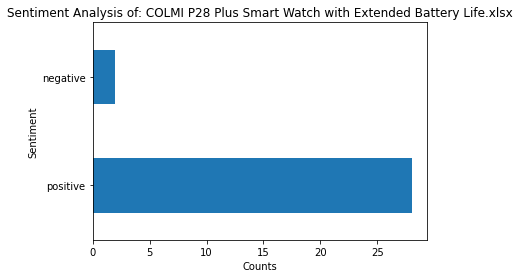

None

Positive Summary: 
।  খুব ভালো নিতে পারেন।  অরিজিনাল প্রডাক্ট দেওয়ার জন্য সেলারকে ধন্যবাদপ্রডাক্টটা খুবই ভালো মানের।  খুব ভালো আমি অনেক দিন ব্যবহার করে রিভিউ দিলামসবাই নিতে পারেন।  ভালো ছিলো অনেক সেলারের ব্যবহারও ভাল।  খুব ভালো একটা প্রডাক্ট।  ভালো।  সেলারের ব্যাবহার খুবই ভালোপোডাক্ট অরিজিনাল ধন্যবাদ।  ঘডিটার সবকিছু মিলিয়ে অসাধারন তবে এটা ওযাটারপ্রুফ কিনা একটু জানালে ভালো হতো

Negative Summary: 
।  ভাই ঘড়ির ডান পাশের একটা বাটন খুলে গেছে যেটা দিয়া প্রেস করেখুব ই কস্ট লাগছেমাত্র চার দিনেই ঘড়ির বাটন খুলে গেলোসেলার রেসপন্স ভাল ছিলকিন্তু ঘড়ির সমস্যা এইটাডান দিকের গোল বাটন টা খুলে বের হয়ে গেছেচেস্টা করছি কিন্তু লাগে না।  আমি তো টাইম টা সেটিং করতে পারছিনা সেটিংস এ কিভাবে টাইম টা সেট করব কোন ভিডিও থাকলে দেখান

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: COLMI P28 Plus SmartWatch Bluetooth calling smartwatch 1.69 inch IPS screen curved with 2.5D glass.xlsx

positive_

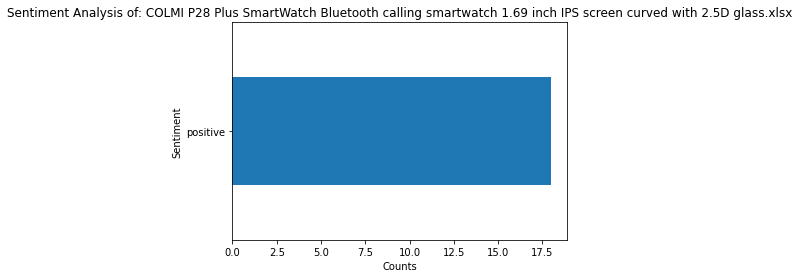

None

Positive Summary: 
।  সত্যি অনেক সুন্দর যেমন চেয়েছি তেমন পেয়েছি।  প্রোডাক্ট ভালো ছিলো কম দামে দেওয়ার জন্য ধন্যবাদ আমার দুই হাজার পঞ্চাশ টাকা পড়েছে সর্বমোটআপনারা চাইলে অর্ডার করতে পারেন।  মোটামোটি ভালোই খারাপ না হাতে পড়তে খুব আরাম দায়ক ভালোই মানায় হাতেএক কথায় অসাধারণ।  ভালো প্রোডাক্ট ইউজ করে মজা করছি ধন্যবাদ দারাজ।  আমারটা দেখে বড় ভাইও নিতে চাইলো তাই আবার নিলাম।  আলহামুলিল্লাহ অনেক ভালো প্রডাক্টসেলার কে অনেক ধন্যবাদ ভালো প্রডাক্ট দেওযার জন্য।  আলহামদুলিল্লাহ ভালোভাবে ইন্টেক প্যাক রিসিভ করেছিপ্যাক খুলেও সুন্দর একটা ঘড়ি পেয়েছিসেলার অনেক ভালোভদ্র আচরন উনারএখন ঘড়ি কেমন চলেদেখা বাকি।  দুই হাজার একশ টাকায় নিয়েছি দারুণ লাগছে প্রায় দশপাঁচ দিন ব্যবহার করে দেখলাম নিতে পারেন।  আমি এক সপ্তাহ ব্যবহার করি রিভু দিচ্ছি খুব ভালো আপনারা চাইলে নিতে পারেন।  অসাধারন ছিলোকিন্তু সেন্সর গুলোর একুরেসি আমার কাছে সতের মনে হয়েছে।  অনেক ভালো আজকে অনেক মাস পরে রিভিউ দিলাম এখন পযন্ত ভালো চলছে য়।  ঘড়িটা আসলেই প্রিমিয়াম ও লাইট ওয়েট কমফোর্টেবল।  অসাধারণ।  ভালো মনের।  অসম্ভব সুন্দর আমি ৩সেট ৬টা নিচ্ছ দুটো দুজোন পডে

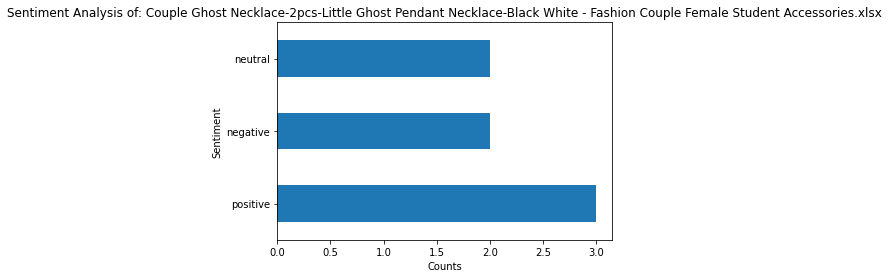

None

Positive Summary: 
।  অনেক ভালো একটি প্রোডাক্ট দাম অনুযাযী অনেক ভালোধন্যবাদ সেলারকে।  যেমনটা চেযেছি তেমনটাই পেযেছি ধন্যবাদ।  ভালো তবে চেইন টা ২বা তিন দিন পরেই কালো হয়ে যায়

Negative Summary: 
।  পুরাই ফালতু এইখানে দুইটা দেওয়ার কথা ছিলো দিসে একটা দিসে রিপ্লাই দেয়না নে টাকা বেশি আপনাদের ও টাকা এমনি এমনি যাবে মরে গেলে হিসাব দিও কবরে মানুষ রে ঠকাইছো।  আমই ডিসকাউন্টে দুটো মাত্র নব্বই টাকায় পেয়েছি সাথে ডেলিভারি চার্জো ফ্রি ছিলোলকেট দুটো অনেক বেশি কিউট

Neutral Summary: 
।  ভাবসি বড় হবে কিন্তু চেইনটা আর রকেট টা অনেক ছোট ছিলো।  ছবিতে লকেটটি একটু বড় দেখাচ্ছিল অতটা বড় না কিন্তু ভালোই মোটামুটি
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Cute Trendy Sun Flower Necklace Daisy Flower Necklaces for Girls Simple Stylish - Pressed Flower Jewelry Dainty Chain Necklace for Women New Collection - Pendant .xlsx

positive_score is : 94.4
negative_score is : 5.6
neutral_score is : 0.0
Visual: 


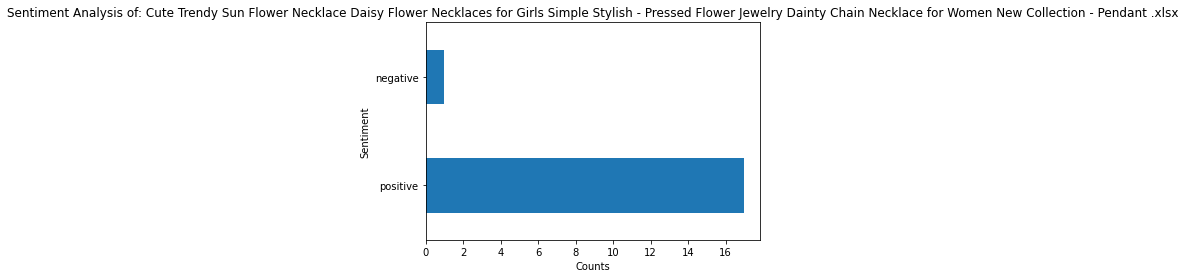

None

Positive Summary: 
।  অনেক সুন্দর।  অনেক সুন্দর একটা প্রোডাক্ট ছবির চেয়ে সামসামনি বেশি সুন্দর।  লকেট টাই সুন্দরচেন এর কোযালিটি খারাপ।  দাম হিসাবে ভালো।  ভালো।  আলহামদুলিল্লাহ ঘডিটা অনেক ভালো লেগেছেযেমনটা দেখানো হযেছে ঠিক তেমনটাই পেযেছিআপনারও নিতে পারেন।  খুবই সুন্দর কম দামের মধ্য এমন ঘডি আশা করিনি সেলার ভাইযা ও খুব ভালো ছিলআপনারাও চাইলে নিতে পারেন

Negative Summary: 
।  ছবির সাথে বাস্তবে মিল নাইটাস স্কিন না সাইড টাস টাইম সেটাপ করার জন্য বিতরে প্রবেশ করা যায়নানিম্ম মানের কেউ কিন বেন না আমি রিভিউ দেখে কিনে ছিলাম রিভিউ গুলো ফেইক ওদের নিজেদের ই রিভিউ

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: D116 Plus Smart watch Bracelets Fitness Tracker (2).xlsx

positive_score is : 82.2
negative_score is : 17.8
neutral_score is : 0.0
Visual: 


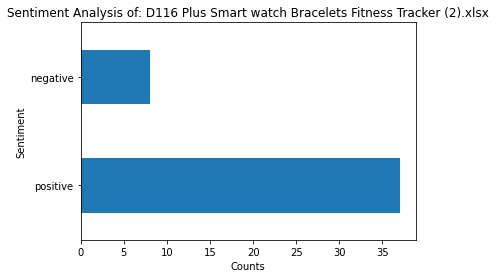

None

Positive Summary: 
।  মালটা একটুও ভালো না মালটা কিনলে আপনারা লস হবে আপনাদের আমি মালটা রিটার্ন করতে চাই।  ঘড়িটি খুবই ভালো আর সেলারটাও অনেক ভালো ঘড়িটা কেউ চাইলে নিতে পারেন।  কালকে হাতে পাইছি ঘরি টা অনেক ভালোসবাই চোখ বন্ধ করে নিতে পারেন।  ভালো পেযেছিসেলার ভালো।  না ঘডির কোযালিটি অনেক ভালো আমার পছন্দ হযেছে।  চাইলে নিতে পারেনখুব ভালো কম টাকার মধ্যে।  খুব ভালো।  অনেক সুন্দর একটি ঘড়ি নিতে পাড়েন আপনারা।  আপনার পডাক আমার ভালো লাগে নাই।  সবাই কিনতে পারেন খুব ভালো।  আলহামদুলিল্লাহ ভালো আছে।  খুভ ভালো একটা প্রডাক্ট।  খুব ভালো লাগলো।  আলহামদুলিল্লাহ ঘডিটা অনেক ভালো লেগেছেযেমনটা দেখানো হযেছে ঠিক তেমনটাই পেযেছিআপনারও নিতে পারেন।  খুবই সুন্দর কম দামের মধ্য এমন ঘডি আশা করিনি সেলার ভাইযা ও খুব ভালো ছিলআপনারাও চাইলে নিতে পারেন।  মালটা একটুও ভালো না মালটা কিনলে আপনারা লস হবে আপনাদের আমি মালটা রিটার্ন করতে চাই

Negative Summary: 
।  প্রোডাক্টটি নষ্ট ছবিতে যেমন দেওযা ছিল তেমনটি নয।  যেমন ছাইছি তেমন পাইনি এটা ফেরত চাই।  আমার এই ঘড়ির সাথে চার্জার বা ইউজবি পোর্ট পাই নাইআর এটা এখন পর্যন্ত ওপেন করতে পারি ন

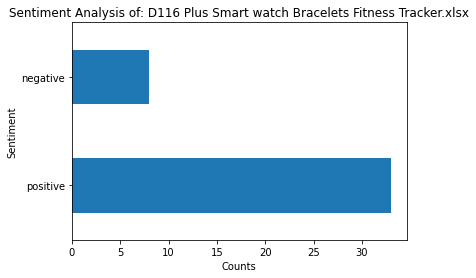

None

Positive Summary: 
।  ঘড়িটি খুবই ভালো আর সেলারটাও অনেক ভালো ঘড়িটা কেউ চাইলে নিতে পারেন।  কালকে হাতে পাইছি ঘরি টা অনেক ভালোসবাই চোখ বন্ধ করে নিতে পারেন।  ভালো পেযেছিসেলার ভালো।  না ঘডির কোযালিটি অনেক ভালো আমার পছন্দ হযেছে।  চাইলে নিতে পারেনখুব ভালো কম টাকার মধ্যে।  খুব ভালো।  অনেক সুন্দর একটি ঘড়ি নিতে পাড়েন আপনারা।  আপনার পডাক আমার ভালো লাগে নাই।  সবাই কিনতে পারেন খুব ভালো।  আলহামদুলিল্লাহ ভালো আছে।  খুভ ভালো একটা প্রডাক্ট।  খুব ভালো লাগলো।  ভাই প্রোডাক্ট অনেক ভালোসাউন্ড কোয়ালেটি অসাধারণব্যাবহার করে দেখতে পারেন অনেক ভালো প্রোডাক্ট।  প্রোডাক্টটা খুবই ভালো সাউন্ড কোযালিটি ভালো

Negative Summary: 
।  প্রোডাক্টটি নষ্ট ছবিতে যেমন দেওযা ছিল তেমনটি নয।  যেমন ছাইছি তেমন পাইনি এটা ফেরত চাই।  আমার এই ঘড়ির সাথে চার্জার বা ইউজবি পোর্ট পাই নাইআর এটা এখন পর্যন্ত ওপেন করতে পারি নাইআমি এখন কি করব।  ভাই আমি আজকে হাতে পেলাম খুলে দেখি নষ্ট ঘড়ি দিছেন সাতশ ষাটদুই টাকা এটা কি উচিত কাজ করলো দারাজ।  ফালতু জিনিস এ কানেন্ট ই হয় না।  ব্লুটুথ বারবার ডিসকানেক্ট হযে যায।  প্রডাক্টিভ একদম ফালতু।  কপি হলেও ভালোই

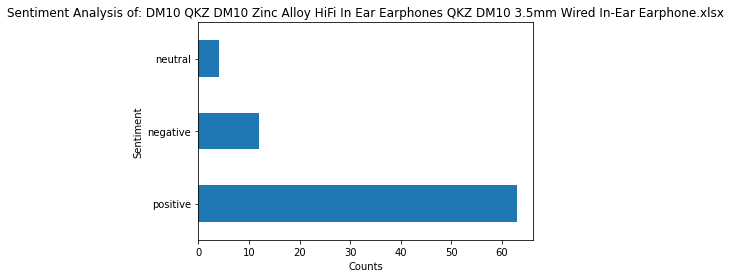

None

Positive Summary: 
।  আমার মন মতো একটা হেডফোন পাইছি খুবই ভালো মানের এই প্রোডাক্ট সাউন্ড কোয়ালিটি খুব ভালো চাইলে সবাই ব্যবহার করতে পারেন।  খুবই ভালো মানের হেডফোন অরজিনাল সেলার কে ধন্যবাদ।  যেমন দেখতেছিলো সেরকম পাইছি সাউন্ড ভালো দামের মধ্যে পারফেক্ট বলতে গেলে।  অসম্ভব ভালো বলে বুঝানো যাবে নাসেলার ভালো ব্যাবহার করছে।  ধারাজ থেকে প্রথম কিছু কিনলামআলহামদুলিল্লাহ প্রোডাক্ট ভালোআপনারা কিনতে পারেন।  অরিজিনাল ধন্যবাদ।  ভালো।  কানের গ্রিপ ভালো না এয়ারপিচ গুলা একটু বেশি বড় সাউন্ড কোয়ালিটি মোটামুটি সবসময় পছন্দের শীর্ষে রাখা উচি।  তেমন খারাপ না মোটামুটি ভালো আছে কিনতে পারেন সবাই ধন্যবাদ দারাজকে।  একশ ভালো সাউন্ড কোয়ালিটি চমকার বেজ বাজারের চেয়ে দামেও ২০০টাকা কম ঠকার সম্ভাবনা নেই একশ গ্যারান্টি।  আলহামদুলিল্লাহ জেনুইন প্রোডাক্ট পেয়েছিডেলিভারি ইন টাইম ছিলসাউন্ড কোয়ালিটি ভালপ্রোডাক্ট টা চাইনিজএকদম ধন্যবাদ ধন্যাবাদ দারাজ।  এই দামে যা পেয়েছি অনেক ভালো খুব সুন্দর।  ভালো ছিল ভালো সার্ভিস।  অনেক ভালো।  দাম হিসেবে অনেক ভালো।  মোটামুটি।  যেমন অর্ডার করছিলাম ঠিকই তেমনি পাইছিসাউন্ড কোয়ালিটি অনেক ভালোধন্যব

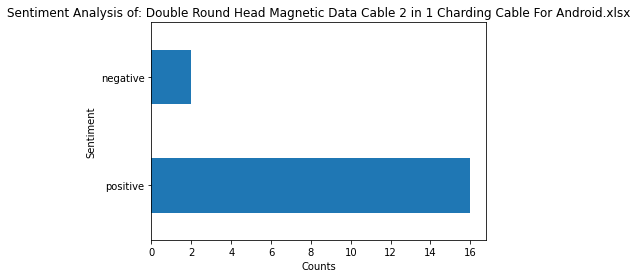

None

Positive Summary: 
।  অনেক ভালো।  ধন্যবাদ।  ভালো।  যেমন চেযেছিলাম ঠিক তেমনি পেযেছি প্যাকেজিং টাও সুন্দর ধন্যবাদ দারাজ

Negative Summary: 
।  চার্জিং এ দেরি হয়লুজ ভাবে লেগে থাকে তাই একটু নড়াচড়া করলে ডিসকানেকটেড হয়ে যায়।  ভাই ভালো কিন্তু চাজ উঠে না তারা তারি

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Double-layer butterfly necklace for woman.xlsx

positive_score is : 94.2
negative_score is : 5.8
neutral_score is : 0.0
Visual: 


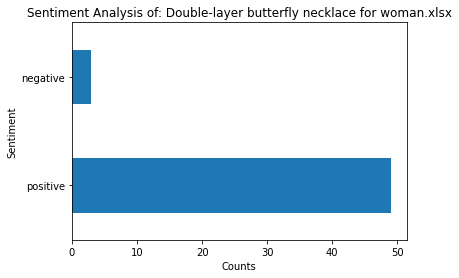

None

Positive Summary: 
।  অনেক সুন্দর।  খুব ভালো লেগেছে সবাই নিতে পারেন।  ভালো ছিলোমোটামুটি।  প্যাকেজিং ভালো ছিলো আর জিনিসটা অনেক সুন্দর ধন্যবাদ দারাজ ও সেলারকে।  খুবই ভালো একটা জিনিস সবাই নিতে পারেন।  আলহামদুলিল্লাহ অনেক ভালো।  দাম অনুযায়ী সুন্দর জিনিস।  এই জিনিসটা বেশি ভালো নয়।  দাম অনুযায়ী খুবই ভালো।  সুন্দর সবাই নিতে পারেন।  খুবই সুন্দর ছিল।  অনেক জিনিসটা।  দাম অনুযায়ী ভাল।  অনেক জিনিসটা।  দাম অনুযায়ী ভাল।  বাজে জিনিস।  সুন্দর।  ভালোই

Negative Summary: 
।  এই জিনিসটা ভালো না একবার ব্যবহার করেই রং নষ্ট হয়ে যায়।  ভালোই আছে কিন্তু হাতে পাওযার আগেই রং রং উঠে গেছে।  টাকার জায়গা টাকা নিছে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: DT DT102 Smart Watch NFC 1.9inch Large Screen Wireless Charging GPS Movement Track Watch.xlsx

positive_score is : 91.7
negative_score is : 4.2
neutral_score is : 4.2
Visual: 


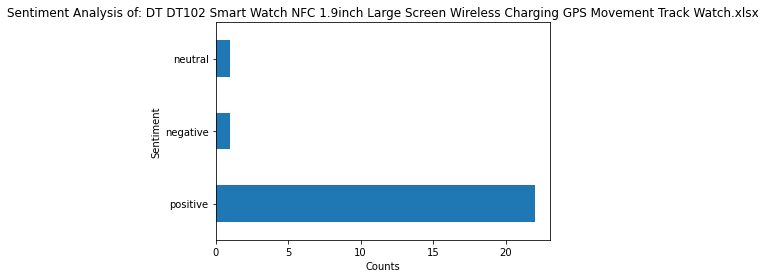

None

Positive Summary: 
।  এই প্রাইসে খারাপ না ভালোই তবে ক্রলিং বাটনে একটু ঝামেলা আছে আমার ইউনিট টায়ও হতে পারে আবার সবগুলোতেও হতে পারে তবে চার্জ ব্যাকাপ ও ওয়াটার প্রুফ একদম ঠিকঠাক প্রায় দেড় মাস ইউজ এর পর রিভিউ দিলাম এর মধ্যে দিনে চৌদ্দপাঁচ বার পানিতে ভালোমতন ভিজাইছিআরো একটা নিব যদি ক্রলিং বাটনটায় ঝামেলা হবে না এই মর্মে গ্যারান্টি পাই।  সেলার এ ব্যবহার অনেক ভালো প্রডাক্ট এর মান মোটামুটি এই দামে।  ভালো দিক-১ দেখতে সুন্দর হাতে মানায় ভালো ২দাম অনুযায়ী অনেক ভালো ফিউচার ও বড় ডিসপ্লে খারাপ দিক-১ ডিসপ্লে ব্রাইটনেস কম২ চারজ দেয়ার সময় চারজার ও ঘড়ি অনেক ঘরম হয়ে যাচ্চে।  অরিজিনাল ই পাওযা গেছেএবং সেলারের ব্যবহার অত্যন্ত ভালো।  ঘড়িটা দেখতে ভালো কিন্তু চার্জ ব্যাকআপ কম বেশি করলে দুই দিন মতো যাবে আর ঘড়িটা চার্জ দেবার সময় গরম হয়ে যাচ্ছে তাছাড়া কোন সমস্যা নেই ঘড়িতে।  চেয়েছিলাম সাদা পেয়েছি ব্লাকঘরির পারফরম্যান্স অনেক সুন্দরএক চার্জে অনায়াসে দুই দিন যায়ডিসপ্লে সম্পর্কে বলতে গেলে অসাধারণ চার দিন ইউজ এর পরে রিভিউ দিলাম।  অনেক ভালো প্রোডাক্ট একদম আরজিনাল।  ভাল ধন্যবাদ সেলার ও দারাজকে।  একমাস যেতে না যেতেই

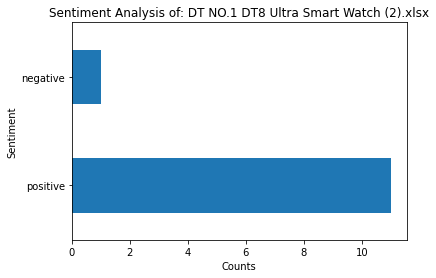

None

Positive Summary: 
।  ভালো পোডাক্ট নিতে পারেন সবাই।  আমার কাছে ভালো লাগে নাই।  ভালো

Negative Summary: 
।  প্রোডাক্ট ভালোকিন্তু আমি অরেঞ্জ কালার অর্ডার করেছিলাম আমকে দেওযা হযেছে ব্ল্যাকযা পুরোপুরি হতাশা জনক

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: DT NO.1 DT8 Ultra Smart Watch.xlsx

positive_score is : 91.7
negative_score is : 8.3
neutral_score is : 0.0
Visual: 


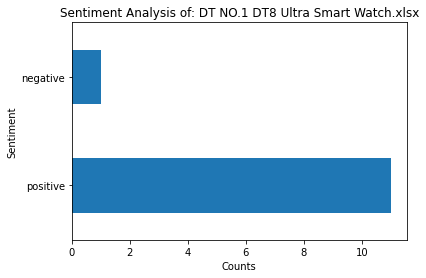

None

Positive Summary: 
।  যেমন চেযেছিলাম ঠিক তেমন রিকমেন্ডেড সেলার বিল কোযালিটি খুব ভালো।  ঘড়ি টা অনেক সুন্দর আলহামদুলিল্লাহ সেলার এর বিহেভিয়ার অনেক ভালো আপনারও নিতে পারেন ধন্যবাদ।  সবদিক দিযে ভালো আছে ব্যাটারি ভালো সবদিক দিযে অনেক ভালো সেলার ভাই ও ভালো ছিল।  ভালো পোডাক্ট নিতে পারেন সবাই।  আমার কাছে ভালো লাগে নাই।  ভালো

Negative Summary: 
।  প্রোডাক্ট ভালোকিন্তু আমি অরেঞ্জ কালার অর্ডার করেছিলাম আমকে দেওযা হযেছে ব্ল্যাকযা পুরোপুরি হতাশা জনক

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Dt no1 Dt8 Ultra Smart Watch (2).xlsx

positive_score is : 80.0
negative_score is : 15.0
neutral_score is : 5.0
Visual: 


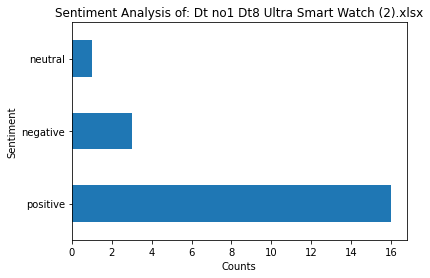

None

Positive Summary: 
।  কোযালিটি সম্পূর্ণ একটা প্রোডাক্ট সাথে একটা গ্লাস প্রটেক্টর ফ্রি পেযেছি ধন্যবাদ দারাজ এবং সেলারকে।  তিন দিনের মাঝে পেযেছি সেলার ভাই অনেক ভালো যেরকম চেযেছি সেই রকম পেযেছি।  যেমন চেযেছিলাম ঠিক তেমনি পেযেছি এবং প্যাকেজিং খুব ভালোভাবে করা ছিল সেলার ভাইকে অসংখ্য ধন্যবাদ।  আলহামদুলিল্লাহ খুব ভালো পয়েছি দুইটা ঘড়িধন্যবাদ দারাজকে।  অনেক ভালো ছিলো ধন্যবাদ।  সেলার কে অনেক ধন্যবাদ অসাধারণ ছিল জিনিসটা।  অনেক ভালো লাগলোধন্যবাদ দারাজ মল।  প্রোডাক্স এর মান ভালো।  আনেক ভালো ঘড়িটা আমি তিন মাস যাবত ব্যবহার করছি

Negative Summary: 
।  ঠকিয়ে দিলো এ প্রটেক্টরের ছবি দিলেও আসলে কোন প্রটেক্টর দেয় নি অন্য জায়গা থেকে কিনলে আরো কম দামে পেতাম।  অনেক ভালো ভানের প্রডাক বাট একটা সমস্যা কানেক্ট থাকছে তখন প্রচুর পরিমানে চার্য কমে যাচ্ছে।  ফালতু আমি অর্ডার করেছি এক কালার দিছে অন্য কালার

Neutral Summary: 
।  যেমন আশা করছিলাম তেমনটাই পাইছিডেলিভারিও খুব তারাতাডি দিছেএখনো হাতে পরিনি দেখাজাক কিছু দিন হাতে পরে কেমন হয়
---------------------------------------------------------------------------------

None

Positive Summary: 
।  কোযালিটি সম্পূর্ণ একটা প্রোডাক্ট সাথে একটা গ্লাস প্রটেক্টর ফ্রি পেযেছি ধন্যবাদ দারাজ এবং সেলারকে।  তিন দিনের মাঝে পেযেছি সেলার ভাই অনেক ভালো যেরকম চেযেছি সেই রকম পেযেছি।  যেমন চেযেছিলাম ঠিক তেমনি পেযেছি এবং প্যাকেজিং খুব ভালোভাবে করা ছিল সেলার ভাইকে অসংখ্য ধন্যবাদ।  আলহামদুলিল্লাহ খুব ভালো পয়েছি দুইটা ঘড়িধন্যবাদ দারাজকে।  অনেক ভালো ছিলো ধন্যবাদ।  সেলার কে অনেক ধন্যবাদ অসাধারণ ছিল জিনিসটা।  অনেক ভালো লাগলোধন্যবাদ দারাজ মল।  অনেক ভালো একটি গড়ি দুই মাস ব্যাবহার করার পর রিভিউ দিলাম।  প্রোডাক্স এর মান ভালো।  আনেক ভালো ঘড়িটা আমি তিন মাস যাবত ব্যবহার করছি

Negative Summary: 
।  ঠকিয়ে দিলো এ প্রটেক্টরের ছবি দিলেও আসলে কোন প্রটেক্টর দেয় নি অন্য জায়গা থেকে কিনলে আরো কম দামে পেতাম।  অনেক ভালো ভানের প্রডাক বাট একটা সমস্যা কানেক্ট থাকছে তখন প্রচুর পরিমানে চার্য কমে যাচ্ছে।  ফালতু আমি অর্ডার করেছি এক কালার দিছে অন্য কালার।  আমি দুটি কালো ক্যাবল অর্ডার করেছিলাম সেলার দিয়েছেন সোনালী আর রূপালি তাছাড়া রূপালিটায় মরচে পড়া।  এটার সম্পর্কে কি বলব ঠিকঠাক কাজ করছেসেলারকে বলব কাষ্টম

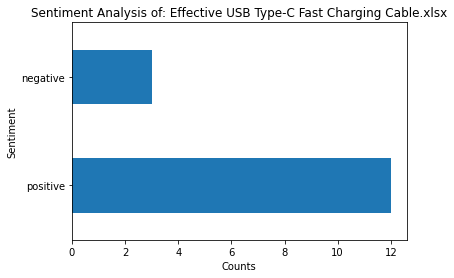

None

Positive Summary: 
।  আছে মোটামুটি খুব বেশি ভালো না।  ভালো।  দেখতে ভালো হলেওদাম অনুযাযী কোযালিটি মোটামুটি ভালো আছে

Negative Summary: 
।  ক্যাবলের কথা যত বলবো ততই কম হবে লুক টা জোসকিন্তু কাজের কাজ কিছুই হয না ফাও ফাও টাকা নষ্ট ফুটপাতের টাকার ক্যাবল ও এর চেযে ভালো চার্জ এর কথা কি বলব মিনিটেও চার্জ উঠে না।  এটাতে ফাষ্ট চার্জ হয় না ফালতু।  এই গডিটি এদম নষ্ট পাইছি আমি মন কারাপ হয়ে গেছে আমার হইতো আমার বাগ্য কারাপএমনে কিন্তুু এটা ভালো মানের গড়িতার পরে ও বলি দারাজ আমাকে হইতো বা টাকা পেরত দিবে অন্য মাল গুলা কিন্তুু খুব ভালো পাইছি আম

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Esogoal Blue-tooth Smart Watch Sports Bracelets Smartwatch.xlsx

positive_score is : 94.4
negative_score is : 5.6
neutral_score is : 0.0
Visual: 


None

Positive Summary: 
।  ঘডিটা ভালো আমি অনেক দিন ব্যবহার করে রিভিউ দিলামসবাই নিতে পারেন।  আলহামদুলিল্লাহনিতে পারেন সবাই।  মোটামুটি ভালো।  অনেক সুন্দর একটা পন্যঅনেক ভালো।  খুব ভালো চার্জ টিকে ভালোই।  ভালো সবাই নিতে পারেন।  খুব ভালো

Negative Summary: 
।  ২টা অর্ডার দিছি দুই টা নষ্ট কত খারাপ মানুষ নষ্ট জিনিস দিয়ে টাকা নেয়

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Exclusive Design Necklace For Girls - Necklace For Girls.xlsx

positive_score is : 90.6
negative_score is : 8.2
neutral_score is : 1.2
Visual: 


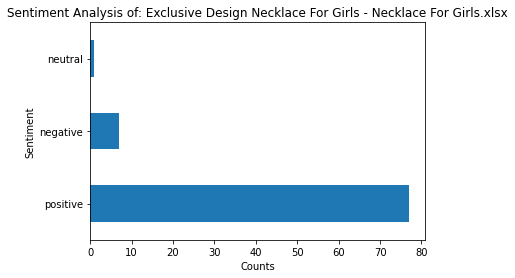

None

Positive Summary: 
।  খারাপ না ভালোই চাইলে আপনারাও নিতে পারেন।  দাম অনুযাযী প্রোডাক্ট খুবই ভালো যে কেউ নিতে পারেন রিকমেন্ডেড।  খুব ভালো ছিল।  কোয়ালিটি এতটাও ভালো না দাম অনুযায়ী ঠিকাছে।  দাম অনুযায়ী সেট টি আমার বেশ ভালো লেগেছে।  এই প্রোডাক্টি অনেক ভালোধন্যবাদ ডারাজ।  ভালো ছিলো।  ভালোই।  জিনিসটা দাম অনুজায়ী খুব ভালো চাইলে নিতে পারেনধন্যবাদ দারাজকে।  দাম অনুযাযী পণ্য ঠিক আছে আমার খুব ভালো লাগছে।  খুবই ভালো জিনিস এই দামে যে কেউ নিতে পারেন।  মুটামুটি কিন্তু ফিনিশিং ওতো একটা ভালো না।  আলহামদুলিল্লাহ্ ভালো ছিলো সময় মতো পেয়েছি।  আলহামদুলিল্লাহ খুব ভালো প্রোডাক্ট।  দাম অনুপাতে ভালো সবাই নিতে পারেন।  দাম অনুযায়ী ভালোপছন্দ হয়েছে।  দাম অনুযায়ী ভালোনিতে পারেন।  আমার অনেক ভালো লেগেছে।  আলহামদুলিল্লাহ ভালো।  দাম হিসেবে ভালো আছে।  মোটামুটি ভালো ছিল।  প্রোডাক্ট ভালো।  মোটামুটি ভালো।  খুবই ভালো।  ভালো ই

Negative Summary: 
।  আগে একটা ভালো পেযেছিলাম বলেই আরেকটা অর্ডার করেছিলাম তারপরেও সেলারকে ব্যক্তিগত ভাবে বলে দিযেছিলাম কিন্তু এরপরেও এমন হলে তা অত্যন্ত দুঃখজনক।  মনে মনে যেটা ভয ছিল ঠিক সেটাই হযেছ

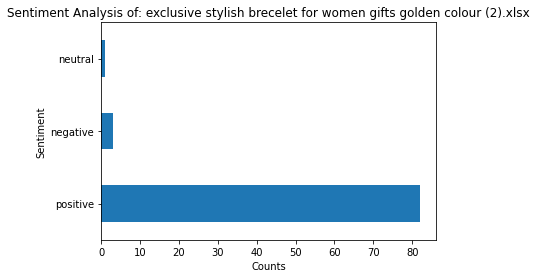

None

Positive Summary: 
।  সুন্দর হয়ছে ধন্যবাদ সেলার এবং দারাজকে।  সুন্দর একটা প্রোডাক্ট ধন্যবাদ সেইলরকে ধন্যবাদ দারাজ।  খুবই ভালো প্রোডাক্ট একদম ছবির মতই কালারও ঠিক আছে ধন্যবাদ।  ভালো ছিল থ্যাঙ্ক ইউ।  মুটামুটি ভালো।  ভালোই।  ধন্যবাদ।  প্রোডাক্টটি দাম অনুযায়ী ভালো ধন্যবাদ সেলারকে।  অনেক সুন্দর এবং ভালো একটি ব্রেসলেট ধন্যবাদ।  অল্প দামে ভালো জিনিস একশ রিকমানন্ডেড পাঁচ।  ভালো প্রোডাক্ট নিতে পারেন সবাই।  খুব ভালো ধন্যবাদ সেরার এবং দারায।  ধন্যবাদ দারাস অনেক ভালো হয়ছে।  নাইস সেলার ভাইয়াও অনেক ভালো।  ভালো পেয়েছিলাম নিতে পারেন।  দাম হিসেবে ভালোই ধন্যবাদ।  ভালো ছিলো বাট ছিড়ে গেছে।  ভালো ছিল সেলার ও ভালো।  খুব ভালো একটি পন্য।  সুন্দর জিনিস ভাল।  জিনিসটা ভালো ছিল।  প্রোডাক্ট ও ভালো।  খুব একটা ভালো না।  অনেক সুন্দর।  মোটামুটি ভালোই।  মোটামুটি ভালো।  অনেক সুন্দর।  সুন্দর ছিলো।  সুন্দর।  ভালো

Negative Summary: 
।  ভালো না একবার ব্যবহারে চেইন এর রং উঠে গেছে ধরতে গেলে মরিচা পড়ে গেছে মত অবস্থা।  যেমন আশা করেছিলাম তেমন পাই নিআমি হতাশ।  কালার নষ্ট হযে যায

Neutral Summary: 
।  তবে ফুলগুলো আরেকটু বড় হ

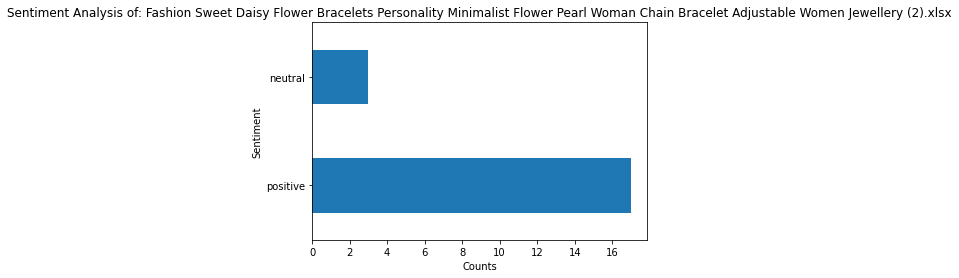

None

Positive Summary: 
।  দেখতে অনেক সুন্দর তবে দাম হিসেবে তেমন ভালো নাচেইনটার রং টিকবে না।  ছবি ভালো ওঠেনি বটে কিন্তু দ্রব্য টি বেশ সুন্দরনিশ্চিন্তে নিতে পারেন।  ভালো প্রোডাক্ট তবে পন্যের কোয়ালিটি অনুযায়ী দামটা একটু বেশি।  দেখতে অনেক সুন্দর।  অনেক সুন্দর একটা জিনিসখুব সুন্দর পেকেজিং করা ছিলোসেলারকে অনেক ধন্যবাদ।  দেখতে ভালো ছিল তবে ফুলগুলো আর একটু বড হলে ভালো হত।  প্রোডাক্টটি ভালো তবে ফুলের সাইজগুলো ছোট।  অনেক সুন্দর।  তিনটা কেবলই মোটামুটি ভালো হালকা-পাতলা ডাটা ট্রান্সফার এবং চার্জিং এর কাজে আসবে ধন্যবাদ সেলার কে।  এই দামে অনেক ভালো জিনিস

Negative Summary: 
Not found


Neutral Summary: 
।  ভালো তবে ফুলগুলো আরেকটু বড় হলে আরো ভালো হতো।  প্রডাক্ট ঠিকঠাক পেয়েছি সাইজ আরেকটু বড় হওয়া উচিত ছিল।  দাম অনুযায়ী ঠিক আরেকটু বড় হলে ভালো হতো
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Fast charging Data cable TYPE-CType-B micro usb for MI Smartphones and all supported device.xlsx

positive_score is : 84.

None

Positive Summary: 
।  ধন্যবাদ।  ভালো।  ভালো প্রডাক্ট এর আগেও এই প্রডাক্ট টা অর্ডার করেছিলামবরাবরই ভালো টাই পেয়েছি।  এই প্রাইসে এই ক্যাবলটি ভালোই চার্জও নিচ্ছে ভালোভাবেই দেখতে কিছুটা প্রিমিয়াম ভাব লাগে আশা করছি দীর্ঘদিন ব্যবহার করতে পারবো।  ক্যাবলটা এক কথায় জোশ তারটা বেশ মোটা ও সফট টাইপেরধন্যবাদ সেলার কে

Negative Summary: 
।  ক্যাবলে চার্জিং দেখায় কিন্তু চার্জ ওঠে না দুই ঘন্টায় দশদুই চার্জ ওঠেছে।  প্যাকেট এর গায়ে টাইপ সি লেখা দেখে ভয় পেয় গিয়েছিলা শুরুতে তবে ভিতরে মাইক্রো ই ছিলো এই দামে বেস্ট ডেলিভারিও খুব দ্রত ছিল ওভারল স্যাটিস্ফাইড

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Fast Charging Micro USB Data Cable - White.xlsx

positive_score is : 93.3
negative_score is : 6.1
neutral_score is : 0.6
Visual: 


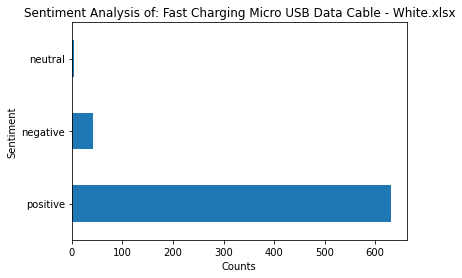

None

Positive Summary: 
।  অনেক ভালো চার্জিং স্পিড একুরেট রাখে খুশি হইলামধন্যবাদ।  অনেক ভালমানের ক্যাবল সেলারকে ধন্যবাদ।  ক্যাবল অনেক লাম্বাচার্জ মোটামুটি চলেতবে প্যাকেজিং টা ভালো হয় নাই।  আলহামদুলিল্লাহ ডাটা ক্যাবল অনেক ভালো।  কমদামে যথেষ্ট ভালো ক্যাবল চার্জ হয় ঠিকমতো আমার খুব পছন্দ হইছে ধন্যবাদ সেলারদারাজ।  প্রোডাক্ট খুবই ভালো এক কথায় অসাধারণ হেভি ক্যাবল।  এতো কম দামে এতো ভালো প্রোডাক্ট কখনো আশা করি নাই।  এই দামে অনেক ভালো করে।  দেখতে দারুণ হলেও চার্জ খুবি কম হয়তবে দাম অনুপাতে ভালোধন্যবাদ দারাজ।  ভালো প্রোডাক্টধন্যবাদ সেলার।  আলহামদুলিল্লাহঅনেক ভালো পন্নটিসেলারকে ধন্যবাদ এবং দারাজ কেউ।  প্রোডাক্ট টা ভালোইচার্জ নিচ্ছে ভালোইপ্যাকেটিং ও সুন্দর হয়ছিলো।  দাম অনুযায়ী পণ্যের মান ভালো ছিল।  ক্যাবল টা দাম হিসাবে খুবই ভালো।  ভালোই আছেফাস্ট চার্জ হচ্ছে।  খুবই কম দামে ভালো মানের ক্যাবল ফোনে চার্জ মোটামুটি হয় ক্যাবলটি লম্বায় প্রায় দুই ফুট।  প্যাকেজিং টা ভালো ছিল দাম অনুযাযী প্রডাক্ট ও ভালো।  ক্যাবল কোয়ালিটি ভালো।  ডাটা কেবল খুব ভালো মানের ফাস্ট চার্জ সাপোর্ট করে।  ধারাকে ধন্যবাদ এত কম দামে ভালো 

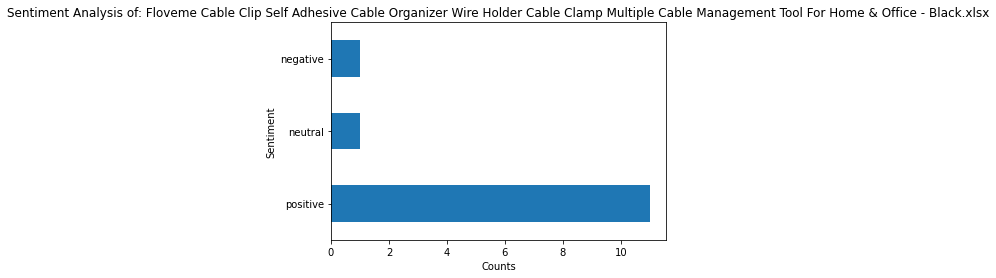

None

Positive Summary: 
।  ধন্যবাদ বিক্রেতা এবং দারাজকে দামটা একটু বেশী পেড়লেও পন্যর জন্য আলহামদুলিল্লাহ্ প্রয়োজন হলে কিনতে পারেন।  পণ্য যেমনটা চেযেছিলাম ঠিক তেমনি পেযেছি -তবে দামটা একটু -কম হওযা উচিত ছিল -।  ভালো জিনিস।  ধন্যবাদ।  পণ্যের মান আরো ভালো হওয়া উচি ছিলো ডেলিভারি ভালোই ছিলো।  আশানুরূপ প্রডাক্ট না দাম হিসাবে এটাই যথেষ্ট।  ভালোই কাজের জিনিস।  তেরে টাকার জিনিস

Negative Summary: 
।  জিনিসটা খুব ছোট তবে ভালো একবার দেয়ালে লাগালে তা উঠাবেন না রং উঠে আসবে দেয়ালের

Neutral Summary: 
।  জিনিস ভালই আছে তবে ফিনিসিং আর একটু ভালো করলে আরো ভালো লাগত
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Gadget Pack Combo Offer Mini Ultra Fast Charging Power Bank + USB Fan + USB LED Light.xlsx

positive_score is : 84.0
negative_score is : 13.0
neutral_score is : 3.1
Visual: 


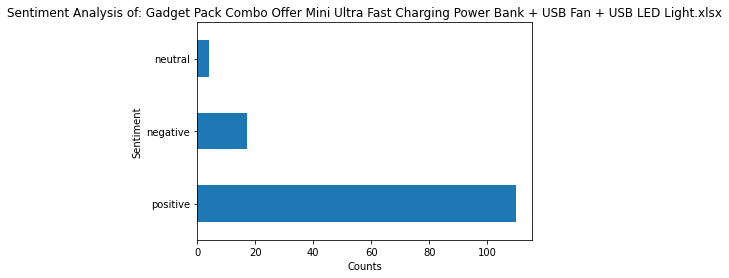

None

Positive Summary: 
।  ধন্যবাদ দারাজকে ডেলিভারি ভাইটারও ব্যবহার খুব ভালোপাওয়ার ব্যংক ফ্যান লাইট সব গুলাই ভালো ফ্যান এর বাতাস টাও খুব ভালে।  একদম ফ্রেশ পণ্য অসাধারণ পাওয়ার ব্যাংক সুন্দর হচ্ছে লাইট ফ্যান ও অনেক ভালো সবাই নির সন্দে নিতে পারেন।  খুব ভালোই লাগছেযেটা চাইছি সেটাই পাইছিদাম হিসেবে পন্যটা ভালো আছেধন্যবাদ সেলার এবং দাড়াজ কে।  আলহামদুলিল্লাহ্ লাইট ফেন মিনি পাওয়ার ব্যাংক সবকিছু ঠিক আছে দাম হিসেবে সবকিছু ঠিক আছে সেলারকে ধন্যবাদ সব ভালো জিনিস দেওয়ার জন্য।  ধন্যবাদ দারাজ এত কম দামে ভালো প্রোডাক্ট দেওযার জন্য।  চার্জ ও খুব ভালো থাকে।  মাএ এটা হাতে পেলাম খুব ভালো ডেলিভারি চাজ নেয় নি।  ভালো পেয়েছি।  এই দামে অনেক ভালো লাগছে আমার কাছে আপনারা চাইলে সবাই নিতে পারেন ধন্যবাদ দারাজ কে।  দাম হিসেবে পণ্য খুব ভালো ধন্যবাদ দারাজ।  পন্য টা ঠিক আছেসেলার কে অনেক ধন্যবাদসেলার ভাইয়ার ব্যবহারটা অনেক ভালো।  প্রোডাক্ট কোয়ালিটি মোটামুটি ছিলো বিশেষকরে পাওয়ারব্যাংক এর ফিনিশিং ভালো ছিলো নাতারপর ও কাজ চালানোর মতো লাইট এর পাওয়ার মোটামোটি ছিলো।  আলহামদুলিল্লাহ ভালো প্রোডাক্ট পেয়েছি প্রোডাক্টটি আমার পছন্দ হয়ে

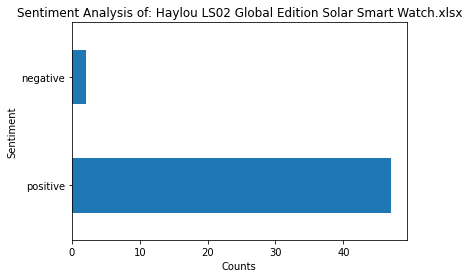

None

Positive Summary: 
।  গরিটা অনেক ভালো আপনারা ও নিতে পারেন।  আলহামদুলিল্লাহ ভালো ভাবোই হাতে পেলাম অরিজিনাল ধন্যবাদ দারাজকে।  অসংখ্য ধন্যবাদ সেইলারকে অরিজিনাল ঘড়ি দেওয়ার জন্যধন্যবাদ দারাজ।  ঘড়িটা সুন্দর এবং ভালো।  ওয়াচটি ভালো একদম ইনটেক প্রডাকট দিয়েছে ধন্যবাদ দারাযকে কিন্ত ডিসপ্লে সমস্যা করছে।  পণ্যটি সময়মত সরবরাহ পেয়েছি দারাজ টিম এবং সেলারকে অসংখ্য ধন্যবাদ।  এইটা ভালো ছিলো না লাগানোর পরে কেমন যেনো লাগতেছে।  আসলে অনেক ভালো একটা ওয়াচ আমার খুব পছন্দ হয়েছে।  প্রোডাক্ট ভালো ছিল আপনারা সবাই নিতে পারেন।  অনেক সুন্দর একটা প্রোডাক্ট নিতে পারেন।  ভালোই আপনাদের প্রোডাক্ট গুলা ভালোই।  অরজিনাল প্রোডাক্ট ভালো ছিল।  ঘড়িটা বেশ ভালো।  বাজে একটা ঘড়ি।  ভালো

Negative Summary: 
।  দেখা যাছে ভাল সাষ সাত দিন যাবে এক ঘন্টা এক পারসেন্ট জাই আশা করি বাল হবে।  বাটপার সেলার আমাকে তেল পাটাইছে এই সেলার এর কাছে থেকে কেউ কিছু কিনবেন না রির্টান রিকুয়েস্ট করার পর কেন্সেল করছে আল্লাহ তর বিচার করবে একদিন তর মর তে হবে এই টাকার দাবি আমি মরলে ও ছাড়ব না বাটপার সেলার

Neutral Summary: 
Not found

------------------------

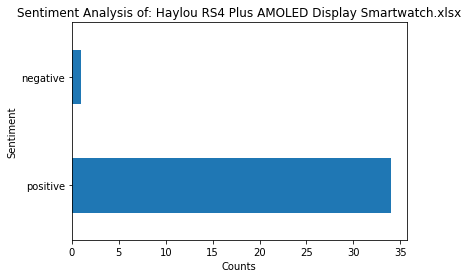

None

Positive Summary: 
।  আসলেই অনেক সুন্দর ধন্যবাদ দারাজ কেচাইলে আপনারা ও নিতে পারেন।  ধন্যবাদ দারাজ কে ধন্যবাদ সেলার কেযথাসমযে দেওযার জন্যঅনেক ভালো একটা প্রোডাক্টএই টাকার ভিতরে এটাই বেস্ট।  ধন্যবাদ আসলে যেরকম দেখেছিলাম সে রকমই পেযেছি ধন্যবাদ সেলার এবং দারাজ কে।  সবাই নিতে পারেন আমি সঠিক পন্য পাইছিসেলার ও ঠিক আছে।  অথেনটিক পণ্য ডেলিভারির কারণে সেলারকে ধন্যবাদ।  খুব ভালো সবাই নিতে পারেন।  ঠিক আছে আলহামদুলিল্লাহ।  ধন্যবাদ।  আলহামদুলিল্লাহ ভালো পেয়েছি।  সেলারের ব্যাবহারঃ এক হাজার দশ।  অসাধারণ ডিসপ্লে।  খুব ভালো

Negative Summary: 
।  ঘড়িটা কাজ করছে না নিজে নিজে নিচ্ছে তার পর হাং করতেসে বাটন না কন কাজ করছে না খুব এ হতাশা জনক কিনেছে চৌদ্দআট ঘন্টা হয়নাই

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Haylou Smart Watch GST LS09B Global Version - Black.xlsx

positive_score is : 89.5
negative_score is : 10.5
neutral_score is : 0.0
Visual: 


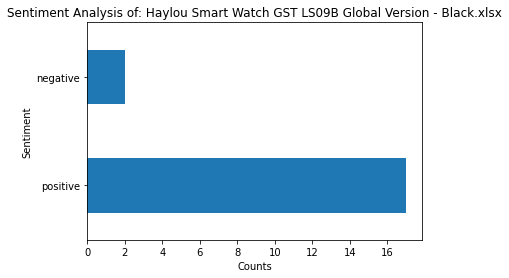

None

Positive Summary: 
।  আলহামদুল্লািহা ঘড়িটা ভালো ছিল যা চাইছি তা পাইছি সবাই নিতে পারেন।  প্যাকেজিং ভালোই ছিলো ইনট্যাক্ট ই মনে হচ্ছে ফুল চার্জ হওয়ার পর চেক করে দেখবো কিন্তু ঘড়ি অন করার পরই দেখলাম আগে থেকেই স্টেপ কাউন্টেড ছিলো এটা নিয়ে একটু খটকা লাগছে।  আলহামদুলিল্লাহ কাঙ্খিত পণ্যটি হাতে পেযেছি আজকে আস্থা রযেছে এর প্রতি ধন্যবাদ সেলার ভাইযা এবং দারাজ বাংলাদেশকে।  অসধারণ একটি প্রোডাক্ট ভালো অত্যন্ত ভালো।  ইনট্যক্ট বক্স পেয়েছি ঘড়ির কোয়ালিটি খুব ভালো টাচ টা স্মোথলি কাজ করে।  যতেষ্ট ভালো লাগলো।  অনেকদিন ধরে ইউজ করতেছিসবকিছু ঠিকঠাক আছে।  ডিসপ্লে ভাল লাগে নাই ফিনিশিং খারাপ ডিসপ্লের চারপাশে একটু পর পর আঠা উঠে আছে সহজেই চোখে লাগে এমনটা আশা করি নাই ফিচার নিয়ে কোন কম্পলেইন নাই আমার কিন্তু যেই ইউনিটটা আমি পেয়েছি তাতে আমি অসন্তুষ্ট।  এই বাজেটে সেরা স্মার্টওয়াচ প্যাকেজিং এবং ডেলিভারি ভালো ছিলো।  খুব ভাল প্রডাক্ট ছিল ফ্রি টাও বেস্ট ছিল।  প্রোডাক্টটি মন মত হযেছে যেমনটা আশা করেছিলাম তেমনটাই পেযেছিকিন্তু একটা জাযগায খারাপ লাগলো প্যাকেজিং ভালো হযনি আরেকটু হলে স্কিন প্রটেক্টর হারিযে যেত বিক্রেতার উচিত 

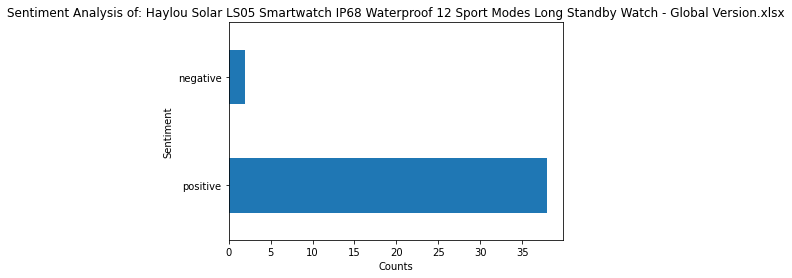

None

Positive Summary: 
।  টা ভালো ছিলো যে রকম টা আশা করেছি সে রকম টা পেয়েছি।  ধন্যবাদ ধারাজকে অর্জিনাল পণ্য দেয়ার জন্যরবিবার এ অর্ডার করে মঙ্গলবার এ পেয়েছিপ্যাকেজিং খুব ভালোসবাই নিতে পারেন।  অসাধারণ প্রোডাক্ট অরিজিনাল কোম্পানিও ভালো সকলকে নেবার পরামর্শ দিচ্ছি।  দ্রুত ডেলিভারি পেয়েছি প্যাকেজিং ভালো ছিলো তেরেচার দিনের ব্যবহারে অভিজ্ঞতা ভালো আশা করি সবসময় এমিন ভালো সার্ভিস দিবেন।  এক কথায় অসাধারণ আপনারা চাইলে কিনতে পারেন।  দাম অনুসারে ভালো আমি খুশী।  ফালতু ঘড়ি কেউ কিনবেন না দিন ও ভালো মত ব্যবহার করতে পারলামনা দশপাঁচ দিনেই ব্যটারি শেষ।  আলহামদুলিল্লাহ যেমন আশা করেছিলাম তেমনি পেযেছি ধন্যবাদ দারাজ কে ধন্যবাদ সেলার কে।  আলহামদুলিল্লাহঅনেক আগে হাতে পেযেছি ৩দিন হলো ব্যবহার করলাম ভালোই সাপোর্ট দিচ্ছে।  যেমনটা চেয়েছিলাম ঠিক তেমনি পেয়েছিএক কথায় অসাধারণ।  প্রডাক্ট পেযে আমি খুব খুশি এক কথায অসাধারণ।  অরজিনাল প্রডাক্ট পেয়েছি ধন্যবাদ সেলার কে।  জিনিস টা অনেক সুন্দর।  ভালো প্রোডাক্ট।  যেমন আশা করেছি তেমনই পেয়েছি দ্রুত ডেলিভারি এবং মানসম্মত প্রোডাক্ট এর জন্য ধন্যবাদ সেলার এবং দারাজকে।  ঘড়ি অরজিনাল ছিল

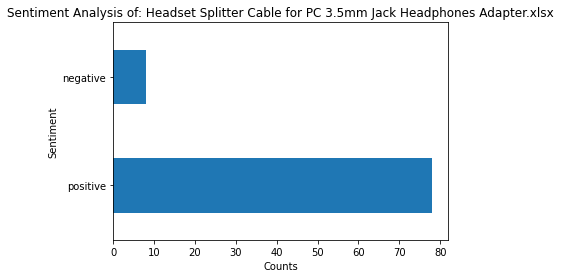

None

Positive Summary: 
।  আলহামদুলিল্লাহ ভালো প্রোডাক্টরিকমেন্ডেডডেলিভারি সময়টা একটু বেশি লাগলো।  খুবই ভালো একটি প্রডাক্ট।  ভালো কাজ করে।  অনেক ভালো।  জিনিসটা আসলেই ভালো।  ভালোই প্রোডাক্ট।  ভালো একটি প্রোডাক্ট ঠিকঠাক মতো কাজ করছে।  ভালোই কাজ করছেপ্রোডাক্ট ভালোধন্যবাদ সেলার ও দারাজকে।  ভালোভাবে কাজ করেছে সেলার ও দারাজকে ধন্যবাদ।  জিনিস ভালো কিন্তু দাম এক্টু বেশিনিতে পারেন।  ভালো একটা প্রডাক্ট ধন্যবাদ দারাজ ও সেলারকে।  ভালো প্রোডাক্ট ধন্যবাদ সেলার ভাইকে।  ভালো প্রোডাক্ট নিতে পারেন চাইলে।  ভালো কিন্তু ছবিরটা দেওয়া হয়নি।  মোটামুটি ভালোই নিতে পারেন।  অনেক ভালো একটা প্রোডাক্ট।  ভালোই ছিল প্রডাক্ট।  ভালো ছিলো ধন্যবাদ।  অনেক ভালো ছিলো।  ভালো প্রোডাক্ট।  ভালো ছিলো।  ভালোই।  ভালো।  ভালো।  দাম অনুযাযী অনেকটাই ভালো

Negative Summary: 
।  থার্ডক্লাস প্রোডাক্ট দেওয়ানহাট ফ্লাইওভার এর নিচে এগুলা বিশ টাকায় বিক্রি করে ছবির সাথে কোন মিল নাইদেখাইচ্চে হাই কোয়ালিটি জিনিস আর দিচ্ছে ফালতু পিস।  খুবই বাজে প্রোডাক্ট পাঠাইছেই এরকম জং ধরা একদমই কাজ করে না।  এক সঙ্গে দুইটা অর্ডার করেছিলাম একটি নষ্ট একটি ভালো তবে

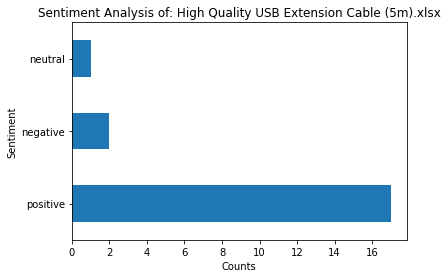

None

Positive Summary: 
।  খুব ভালো প্রোডাক্ট।  প্রোডাক্ট ভালো কিন্তু কাঙ্ক্ষিত কালার পাই নি।  যথেষ্ট ভালো নিতে পারেন।  সুন্দর ভালো লেগেছে।  ক্যাবলটি খুবই ভালো।  ভালো প্রোডাক্ট।  ভালো জিনিস ফাস্ট চার্জিং হয সেলারকে ধন্যবাদ

Negative Summary: 
।  পুরো টাকা জলে গেলো কেবল টা নস্ট এই সেলার এর থেকে জিনিস কিনে কেউ প্রতারিত হবেন না।  কেবল টা একদম ফালতু কোনো কাজ করে না

Neutral Summary: 
।  একটু দাম বেশি দিয়ে অন্য কেবল নেওয়া ভাল চার্জিং স্পিড অন্য কেবলের তুলনায় একটু স্লো লিখা আছে কিন্তু বাস্তবে এর চার্জারের পুরোটা ডেলিভার করতে পারছে না
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Hoco X26 3A Type C Cable Express Fast Charging Cable Data Cable Black 1M.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


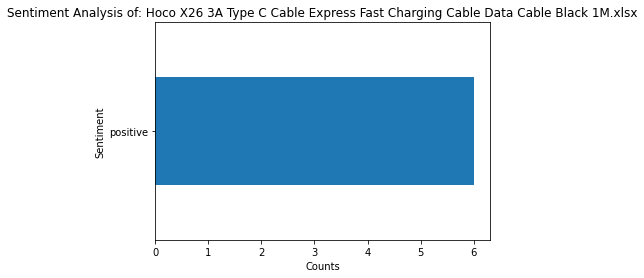

None

Positive Summary: 
।  আসলে অনেক ভালো।  ভাল।  তারটা খুবোই কম্প্যাক্ট বেশ ভালো ফাস্ট চার্জিং কাজ করে এই দামে এতো ভালো ক্যাবল আশা করি নাই সেলার ভাইকে ধন্যবাদ আলহামদুলিল্লাহ।  ক্যাবল টা ভাল ছিল কিন্তু একটু বেশিই ছোট

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Hoco X38 3A Type C Cable Fast Charging Cable Data Cable 0.25CM Short Cable 1M.xlsx

positive_score is : 87.5
negative_score is : 12.5
neutral_score is : 0.0
Visual: 


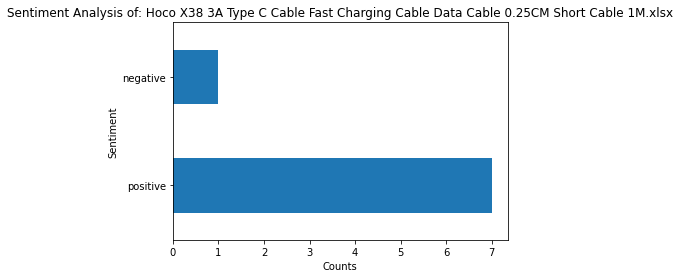

None

Positive Summary: 
।  ক্যাবলটা ছোট এবং চার্জিং স্পিড অতো ভালো নয়।  খুবই ভালো-।  এক হাজার একশ দশএক ক্যাম্পাইনে অর্ডার করেছিলাম রাত দশদুই টায়প্রোডাক্ট হাতে পেয়েছি পরের দিন রাত নয় টায়মানে বিশএক ঘন্টার মধ্যে বাসায় ডেলিভারি পেয়েছি এত কম সময়ের মধ্যে পাবো ভাবতে পারিনিপ্রোডাক্ট টা খুব পছন্দ হয়েছে আমারযেমনটা চেয়েছি ঠিক তেমনি হাতে পেয়েছিসেলারকে অনেক ধন্যবাদ এত ভালো একটা প্রোডাক্ট পৌছে দেওয়ার জন্য।  স্মার্ট ওযাচ টা প্রথমে তো কানেক্ট হলে অ্যাপ ভালোভাবে ব্যবহার করা যায না আসতে চল্লিশ দিন সময লাগলো সেন্সর ভালোভাবে কাজ করে না ওনের বাটন একবার খুলে পডে গিযেছিল প্যাকেটের অবস্থা ভালো না চার দুই তিন ঘণ্টা যায টাচ করলে হ্যাং মারে ইসমুদ না নকলভালো দিক হলদেখতে সুন্দর ওযালপেপার লাগানো যায কম দামে ভালো জিনিস।  ঘডি পাওযার এক সপ্তাহ পর রিভিউ দিচ্ছি ঘডি টি অর্ডার দেওযার বিশ দিন পর হাতে পেযেছি ঘডি কি বডিতে হালকা কিছু স্ক্র্যাচ আছে ঘডি কি হেভি ব্যবহারে দুই দিন ব্যাটারি ব্যাকআপ পাওযা যায এবং নরমাল ব্যবহারে পাঁচ দিন ব্যাটারি ব্যাকআপ পাওযা যায ঘডিটি দাম অনুসারে আমার কাছে ব্যবহার করে ভালই লেগেছে আমি স্যাটিসফাইট আ

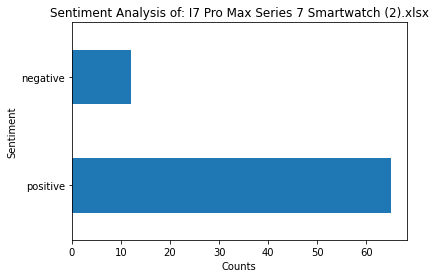

None

Positive Summary: 
।  গ্লোবাল প্রোডাক্ট হওয়ায় ঘড়িটা পেতে একটু টাইম লাগলেও এই দামের মধ্যে ঘড়িটা অনেক ভালো।  ঘডিটির প্যাকেটের অবস্থা খুব খারাপ আর ঘডিটি দাম হিসেবে অনেক ভালো।  দাম হিসেবে ভালোই তুলনামূলক দ্রুত ডেলিভারি।  দেখতে ভালোইডিসপ্লে কোয়ালিটি একদম বাজে চার্জ থাকে নাআর এপ এর মধ্যে তেমন কোন ভালো ওয়াচ ফেস নেই।  এক কথায় অসাধারণ।  ভালোই নিতে পারেন।  ভালো একটি স্মার্ট ওয়াচ লো প্রাইসের মধ্যে নিতে পারেন।  সব মিলিয়ে ভালোই।  যেই ঘড়িটা অর্ডার করেছি সেটাই পেয়েছিএখনো ব্যবহার করিনিআসা করি ঘড়িটা ভালো হবে।  মোটা মুটি ভালোএকদম যে বিষেস রকমের ভালো তা নয়দাম হিসেবে ঠিকই আছে।  দেখতে সুন্দর চার্জ ২দিন থাকে ৮০০টাকা দাম হিসেবে ভালোই।  দাম অনুযাযী প্রোডাক্ট মোটামুটি ভালো আপনারাও নিতে পারেন।  আমার ঘরিটা ভালো কিন্তু ঘরির মধ্যে স্বপট আছে।  এই দামে এর থেকে ভালো কিছু পাওযা অসম্ভব।  খুব ভালো কিন্তু আরও আপডেট হওয়া উচি ছিল।  বালের ঘড়ি একদিন ও ব্যবহার করতে পারিনি।  ভালো বাট বেল্ট একটু ফাটা ছিল।  ঘডিটা অনেক ভালো করেছে।  ঘড়িটা অতো ভালোনা।  ঘড়ি এখনো চলছে।  মোটামুটি চলে।  অনেক ভালো।  ভালো।  ভাল

Negative Summary: 

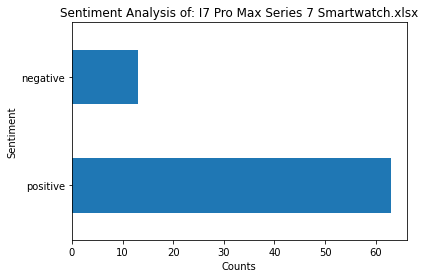

None

Positive Summary: 
।  গ্লোবাল প্রোডাক্ট হওয়ায় ঘড়িটা পেতে একটু টাইম লাগলেও এই দামের মধ্যে ঘড়িটা অনেক ভালো।  ঘডিটির প্যাকেটের অবস্থা খুব খারাপ আর ঘডিটি দাম হিসেবে অনেক ভালো।  দাম হিসেবে ভালোই তুলনামূলক দ্রুত ডেলিভারি।  ভালোই নিতে পারেন।  ভালো একটি স্মার্ট ওয়াচ লো প্রাইসের মধ্যে নিতে পারেন।  সব মিলিয়ে ভালোই।  যেই ঘড়িটা অর্ডার করেছি সেটাই পেয়েছিএখনো ব্যবহার করিনিআসা করি ঘড়িটা ভালো হবে।  মোটা মুটি ভালোএকদম যে বিষেস রকমের ভালো তা নয়দাম হিসেবে ঠিকই আছে।  দেখতে সুন্দর চার্জ ২দিন থাকে ৮০০টাকা দাম হিসেবে ভালোই।  দাম অনুযাযী প্রোডাক্ট মোটামুটি ভালো আপনারাও নিতে পারেন।  আমার ঘরিটা ভালো কিন্তু ঘরির মধ্যে স্বপট আছে।  এই দামে এর থেকে ভালো কিছু পাওযা অসম্ভব।  ভালো বাট বেল্ট একটু ফাটা ছিল।  ঘডিটা অনেক ভালো করেছে।  ঘড়িটা অতো ভালোনা।  ঘড়ি এখনো চলছে।  মোটামুটি চলে।  অনেক ভালো।  ভালো

Negative Summary: 
।  বাটপার সেলার নষ্ট ঘডি পাঠাইছে ঘডি অন হচ্ছে না পুরো একদিন চার্জে ছিল তাও তাও অন হচ্ছে না মানুষকে এভাবে ঠকিযে দারাজ ব্যবসা করছে।  প্রোডাক্টটা মনে হয নষ্ট অন হচ্ছেনা চার্জে লাগাচ্ছি কিন্তু চার্জ হচ্ছ

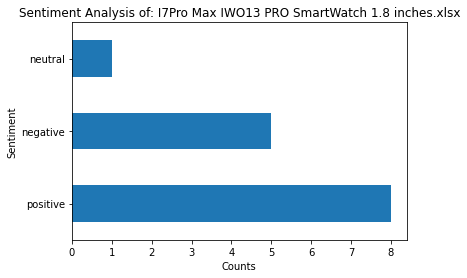

None

Positive Summary: 
।  কোয়ালিটি ভালোকিন্তু টাচ অটোমেটিক কাজ করে।  ভালোই মনে হয।  আলহামদুলিল্লাহ ভালো একটি প্রডাক্ট ছিল যেমন টা চেয়েছি তেমন টাই আলহামদুলিল্লাহ পায়ছি

Negative Summary: 
।  খুব বাজে একটা ঘড়ি কল আসলে নাম উঠেনা।  একদম বাজে চারজ থাকেনা কিনতু হাতে পাইছি দিনে আমার সব টাকাই নষ্ট।  মুটামুটি ভালচার্জ বেশি থাকে নাটেনেটুনে দেড় দিন থাকে স্ক্রল বাটনটার কালার উঠে গেছে কিন্তু গেম গুলো ভালো

Neutral Summary: 
।  রিভিউ দিতে মন চাইছেনা কারন কি রিভিউ দিবো পন্য হাতে মনটাই খারাপ হয়ে গেলো ঘড়িটি চার্জ থাকেনা পন্য পরিবর্তন করতে চাইলাম কেও পন্য ফেরত নিতে চাইছেনা একেরারে বাজে হয়ে গেছে দারাজ
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: I8 Pro Max 1.75 Full Screen Bluetooth Smartwatch with Small Game.xlsx

positive_score is : 97.1
negative_score is : 2.9
neutral_score is : 0.0
Visual: 


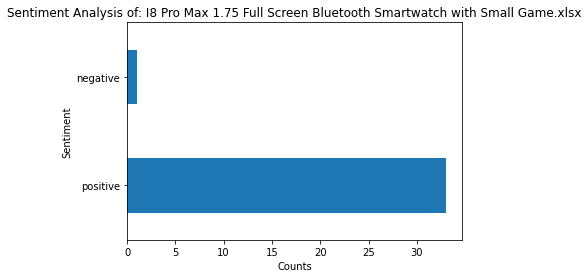

None

Positive Summary: 
।  ভালো আলহামদুলিল্লাহ।  ভালো তবে চার্জ কম থাকে।  প্রোডাক্টটি অত্যন্ত ভালো লাগলো।  ওনেক ভালো সব কিছু ঠিক কিন্তু চার্জ কম থাকে একটু।  ভালোইনিতে পারেন সবাই।  দাম হিসাবে ভালো।  ভালো ছিলো পন টি একে বারে ইনটেক ছিলো।  মোটামুটি ভালো খারাপ না।  মোটামুটি ভালো।  ভালো।  অনেক ভালো পণ্য

Negative Summary: 
।  দারাজের তো এটা অনেক কমন জিনিস হযে গেছে প্রতি তিনটা প্রোডাক্ট থেকে প্রোডাক্ট হয ভুল নযতো নষ্ট বের হয এই ঘডিটারও টাচ নষ্ট এক জাযগায ক্লিক করলে আরেক জাযগায কাজ করে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: i8 Pro Max IP68 Waterproof Smart Watch for Men (2).xlsx

positive_score is : 91.3
negative_score is : 8.7
neutral_score is : 0.0
Visual: 


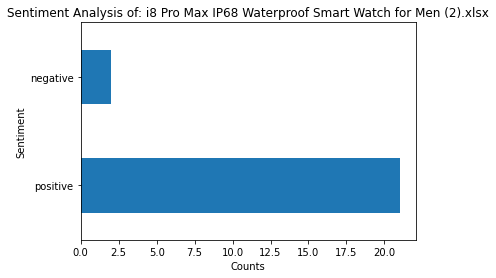

None

Positive Summary: 
।  মোটামুটি ভালো।  মাসআল্লাহ অনেক ভালো।  তেমন একটা ভালো না কয়দিন ব্যবহার এর পর প্রব্লেম দেখা দিচ্ছে।  ভালো মানের কভার ঠিক মতো পেলাম ধন্যবাদ দারাজ ও সেলারকে।  দাম অনুযায়ী প্রোডাক্ট অসম্ভব ভালো তবে চার্জ কম থাকে।  চার্জিং কেবল খুব বাজে।  অনেক ভালো পণ্য।  এক কথায অসাধারণ

Negative Summary: 
।  চার্জ একদম থাকে না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: i8 Pro Max IP68 Waterproof Smart Watch for Men (3).xlsx

positive_score is : 91.7
negative_score is : 8.3
neutral_score is : 0.0
Visual: 


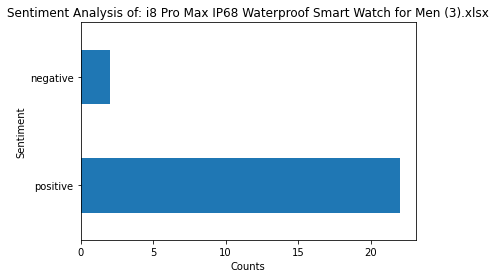

None

Positive Summary: 
।  অনেক ভয়ে ভয়ে পিকেটিং খুলছিলাম যেন ভলো কিছু পাই আলহামদুলিল্লাহ অনেক ভালোই ধন্যবাদ সেলার কে।  মোটামুটি ভালো।  মাসআল্লাহ অনেক ভালো।  ভালো আছে কিন্তু এর য়ে এপ সেটি ভালো না।  তেমন একটা ভালো না কয়দিন ব্যবহার এর পর প্রব্লেম দেখা দিচ্ছে।  ভালো মানের কভার ঠিক মতো পেলাম ধন্যবাদ দারাজ ও সেলারকে।  দাম অনুযায়ী প্রোডাক্ট অসম্ভব ভালো তবে চার্জ কম থাকে।  চার্জিং কেবল খুব বাজে।  তেমন খারাপ না ভালোই কিন্তু চার্জ কম টিকে ফুল চার্জ একদিনও চলে না আমি তেমন খুশি হতে পারলাম না।  অনেক ভালো পণ্য।  অনেক ভালো একটা প্রোডাক্ট সময় মতো ডেলিভারি পাইছি আপনারা নিতে পারেন ওই রকম ভাবে পানিতে ভিজানো হয়নি তবে বৃষ্টিতে ভিজছে কিছু হয় নি।  এক কথায অসাধারণ।  অনেক ভয়ে ভয়ে পিকেটিং খুলছিলাম যেন ভলো কিছু পাই আলহামদুলিল্লাহ অনেক ভালোই ধন্যবাদ সেলার কে

Negative Summary: 
।  চার্জ একদম থাকে না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: i8 Pro Max IP68 Waterproof Smart Watch for Men.

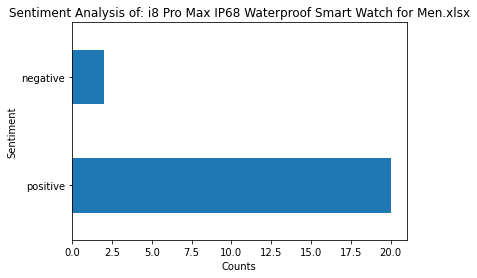

None

Positive Summary: 
।  মোটামুটি ভালো।  মাসআল্লাহ অনেক ভালো।  ভালো আছে কিন্তু এর য়ে এপ সেটি ভালো না।  তেমন একটা ভালো না কয়দিন ব্যবহার এর পর প্রব্লেম দেখা দিচ্ছে।  ভালো মানের কভার ঠিক মতো পেলাম ধন্যবাদ দারাজ ও সেলারকে।  দাম অনুযায়ী প্রোডাক্ট অসম্ভব ভালো তবে চার্জ কম থাকে।  দাম অনুসারে ঠিক আছে উপর থেকে খুব সুন্দর।  চার্জিং কেবল খুব বাজে।  আলহামদুলিল্লাহ ঠিক যেমনটা দেখিয়েছেন ঠিক তেমন টাই পেয়েছি ঘড়ি টা খুবই সুন্দর আমার কাছে খুবই ভালো লেগেছে ধন্যবাদ দারাজ ধন্যবাদ সেলার কে।  যেমন টা চেয়েছিলাম তেমন টাই পেয়েছিঅনেক সুন্দর ঘড়িপুরোটাইইনটেকধন্যবাদসেলার দারাজ কে।  আসলেই প্রোডাক্টটি অসম্ভব সুন্দর এবং খুবই ভালো কোযালিটি আপনারা চাইলে নিতে পারেন

Negative Summary: 
।  চার্জ একদম থাকে না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: IWO 13 Pro T800 Pro Max Smart Watch 1.99 Inch Bluetooth Call DIY Dail Sports.xlsx

positive_score is : 94.5
negative_score is : 5.5
neutral_score is

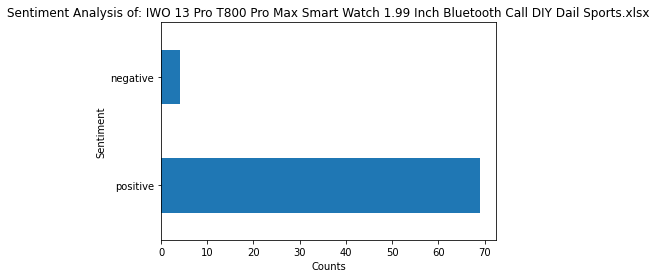

None

Positive Summary: 
।  দাম অনুযায়ী অনেক ভালো আপনারা সবাই নিতে পারেন সেলারকে অসংখ্য ধন্যবাদ।  দাম হিসাবে মোটামুটি ভালো নিতে পারেন।  ঘড়িটা অনেক সুন্দর সবাই নিতে পারেন।  অনেক ভালো প্রডাক্ট।  ভাই ভালো একটি গরি পেয়েছি ধন্যবাদ দারাজ।  দামে কম মানে ভালো কাকলি ফার্নিচার।  লো প্রাইচে যথেষ্ট ভালো।  অনেক ভালো একটা ঘড়ি।  ভালোই।  খুবই ভালো একটা প্রোডাক্ট আমি যা চেয়েছিলাম তার সবই আছেএক কথায়।  অনেক ধন্যবাদ সেলার ভাইকে খুব ভালো লাগছেআপনারা সবাই নিতে পারেন।  ঘডিটা অনেক ভালো সবাই নিতে পারেন দামটাও মোটামুটি ঠিক আছে।  কোয়ালিটি ভালো ছিল নিঃসন্দেহে সেলার ভালো।  ওনেক ভালো লাগেছে আমার সবাই নিতে পারন।  আলহামদুলিল্লাহ অনেক ভালো।  ভালো দাম অনুযায়ী চলে।  বাজে একটা ঘডি।  সাইড বাটন ভালো না।  মোটামুটি ভালো।  খুব ভালো।  যেমন টা চেয়েছিলাম তেমন টাই পেয়েছিঅনেক সুন্দর ঘড়িপুরোটাইইনটেকধন্যবাদসেলার দারাজ কে

Negative Summary: 
।  সাউন্ড কোয়ালিটি একেবারে বাজে অবস্থাআমার হেডফোনে আরো ভালো সাউন্ড আছেআমি এটা রিটার্ন করতে চাই কিভাবে করবো জানাবেন।  সালারা বাটপার এমনি হাত ঘড়ি দিছে না দিয়ে আার কোন দিন কোন কিছু নিবো না থেকে।  এক

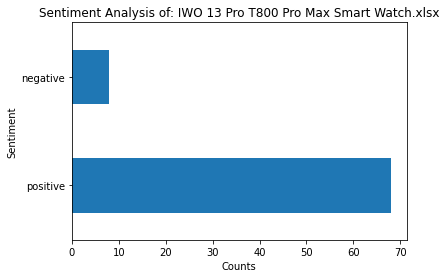

None

Positive Summary: 
।  দাম অনুযায়ী অনেক ভালো আপনারা সবাই নিতে পারেন সেলারকে অসংখ্য ধন্যবাদ।  দাম হিসাবে মোটামুটি ভালো নিতে পারেন।  ধন্যবাদ দারাজ এবং সেলারকে ভালো পর্ন দেওয়ার জন্য আমি তিন দিন ব্যাবহার করে রিভিউ দিলামআপনারাও নিতে পারেন।  চার্জিং ব্যাকআপ বেশি একটা ভালো না ফুল চার্জ করলে সর্বোচ্চ একদিন বেকাপ পাবেন।  ধন্যবাদ দারাজ কেআলহামদুলিল্লাহ পন্যটি ভালো ছিলো নিশ্চিতে নিতে পারেন।  ঘড়িটা অনেক সুন্দর সবাই নিতে পারেন।  অনেক ভালো প্রডাক্ট।  ভাই ভালো একটি গরি পেয়েছি ধন্যবাদ দারাজ।  দামে কম মানে ভালো কাকলি ফার্নিচার।  লো প্রাইচে যথেষ্ট ভালো।  অনেক ভালো একটা ঘড়ি।  ভালোই।  ছবির সাথে মিল রয়েছে দাম অনুযায়ী ভালো ছিলো ঘড়িটা সবাই নিতে পারেন।  খুবই ভালো একটা প্রোডাক্ট আমি যা চেয়েছিলাম তার সবই আছেএক কথায়।  অনেক ধন্যবাদ সেলার ভাইকে খুব ভালো লাগছেআপনারা সবাই নিতে পারেন।  ঘডিটা অনেক ভালো সবাই নিতে পারেন দামটাও মোটামুটি ঠিক আছে।  কোয়ালিটি ভালো ছিল নিঃসন্দেহে সেলার ভালো।  ওনেক ভালো লাগেছে আমার সবাই নিতে পারন।  আলহামদুলিল্লাহ ধন্যবাদ দারাজ কে।  আলহামদুলিল্লাহ অনেক ভালো।  ভালো দাম অনুযায়ী চলে।  বাজে এক

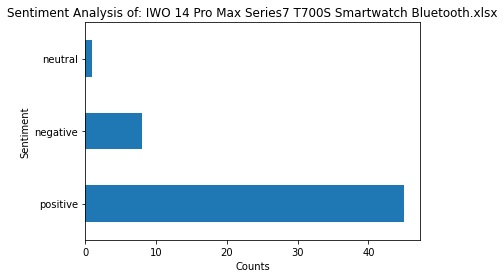

None

Positive Summary: 
।  ঘডিটা খুব ভালো ছিল ডেলিভারি ম্যান ফাইসাল ভাই খুব ভালো লোক আর ঘডিতে সব ঠিক আছে আমার মনের মতো হযেছে অনেক ধন্যবাদ দারাজকে এত সুন্দর ঘডি দেবার জন্য।  প্রোডাক্ট ঠিক টাক পেয়েছি ভালোই লাগছে ব্যাবহার করে দেখি কি অবস্তা।  সবদিক থেকে ভালোই দেখতেও অনেকটা প্রিমিযাম লাগে শুধু ব্যাটারি ব্যাকাপটা নিযে একটু অসন্তুষ্ট হোলাম।  ঘডিটা সত্যি খুবই ভালো২দিন ব্যবহার এর পর রিভিউ দিলামআর চার্জ ও ভালো থাকেআর সেলার ও খুব ভালো।  সধু টাকা নষ্ট।  দাম অনুযায় ঠিক আছে একটু কম।  প্রোডাক্টটা এমনে ভালো।  ভালো মোটা মোটি।  ধন্যবাদ জানাই সেলারকে আমাকে এত সুন্দর একটা প্রোডাক্টস দেযার জন্য মাশাল্লাহ অনেক ভালো আমার ব্যবহার করার দুই দিন হল এটার অনেক ভালো ডিসপ্লের কথা বললে তো পুরাই আগুন অনেক ধন্যবাদ আমাকে এত সুন্দর জন্য।  আমি এই দামে এমন ঘড়ি পেয়ে অনেক খুশিদাম হিসেবে ঘড়ি টা পারফেক্টডেলিভারি ম্যান ভাইয়ার ব্যাবহার ও অনেক সুন্দর।  আমার ঘডি চালু হচ্ছে না শুধু চার্জে লাগালে স্কিন অন হয প্রোডাক্ট রিটার্ন করতে চাচ্ছি।  এটা খুবই ভালো এক কথায় অসাধারণ।  আমি দুই দিন ধরে ব্যবহার করছিআমি বলবো টা দাম হিসেবে অনেক ভালো

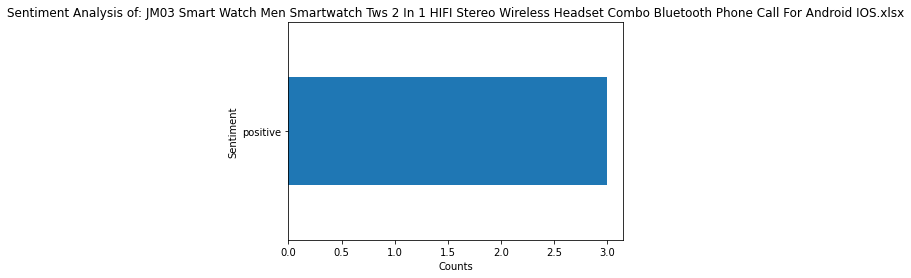

None

Positive Summary: 
।  ঘডিটা অনেক শখ করে নিয়েছিলাম বিশ দিন চালানোর পর দেখছি অটো লাইট সেন্সর আর কাজ করছে না ফলে ডিসপ্লেতে ক্লিক করে সময় দেখতে হয় আমি গান শুনি না তারপর ও ৮-১০ দিনে চার্জ শেষ প্রেশার হার্ডবিট ঠিক আসে না এই প্রাইজে আরো ভালো হওয়া দরকার ছিলো তবে ব্লুটুঠ সাউন্ড কোয়ালিটি ভালো চার্জটাও আশা করছি ভালো থাকবে অনেক হালকা ও।  দশ দিন বেবহারের পর রিভিউ দিলাম অ সাদারন ১টা পডাক্ট শভাই নিতে পারেন।  হার্ডওয্যার হাং করে একদম বাজে একটা ওযাচ অযথা টাকা টা নষ্ট হলো

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Joyroom JR-QP191 10000mAh 22.5W LED Display Battery Status Monitoring Power Bank.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


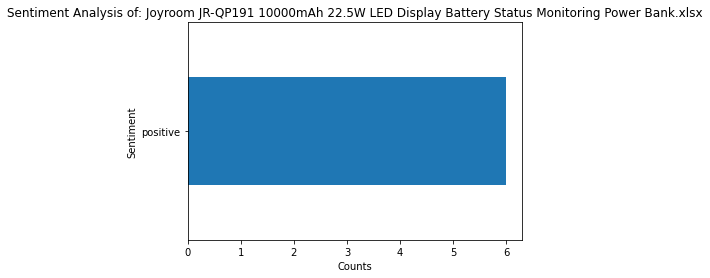

None

Positive Summary: 
।  আলহামদুলিল্লাহ এই ফোঢাকটা অনেক ভালো আমার মনে হয আর আমি অনেক খুশি জে আমি এতো সুন্দর পোঢাকটা পাইছি।  সুন্দর প্রোডাক্ট সেলার অনেক ভালো কেউ চাইলে নিঃসন্দেহে নিতে পারেন উনার কাছ থেকে একদম অরিজিনাল টা পাইছি ধন্যবাদ সেলার ভাইকে।  প্যাকিং ভালো ছিল সেলার খুবই আন্তরিকতার সাথে প্রোডাক্ট দিযেছে প্রোডাক্ট এর মান ভালো পেযেছি ধন্যবাদ দারাজ এবং সেলার কে।  খুব ভালো প্রাডাক্সসবাই নিতে পারে।  অনেক সুন্দর

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Kieslect KR Calling Smart Watch with semi AMOLED Display Voice Assistance.xlsx

positive_score is : 94.8
negative_score is : 3.9
neutral_score is : 1.3
Visual: 


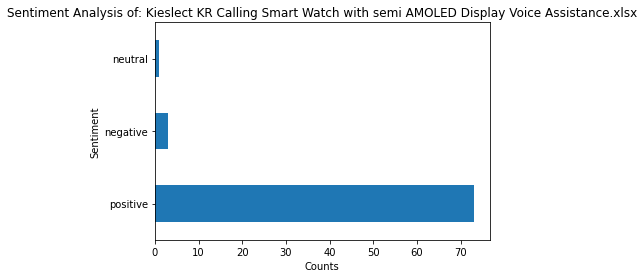

None

Positive Summary: 
।  অরিজিনাল প্রোডাক্ট পেয়েছি সাথে একটি - ফ্রি ধন্যবাদ এবং কে।  একদম অরিজিনাল প্রডাক্ট সবাই নিতে পারেন দিনে ডেলিভারি পেযেছিঅন্যরকম পাচ্ছি।  আলহামদুলিল্লাহ অরিজিনাল অথেন্টিক প্রডাক্ট যেমনটা চেয়েছি ঠিক তেমনটাই পেযেছি কিন্তু আমার কাছে চার্জ ব্যাকআপ একটু কম মনে হচ্ছে ধন্যবাদ সেলারকে।  আলহামদুলিল্লাহ অরজিনাল প্রোডাক্ট প্যাকেজিং ভালো ছিল ধন্যবাদ সেলার ও দারাজ কে।  এটা অনেক ভালোযেমন টা চেয়েছিলাম ঠিক তেমনটাই পেয়েছিকিন্তু আমার কাছে চার্জ ব্যাকআপ টা অনেক কম মনে হচ্ছেতাও মেটামুটি ভালোই ধন্যবাদ সেলারকে।  আলহামদুলিল্লাহ খুবই ভালো ঘডিটা হালকা সেন্সর একটু স্লো লাগলেও অনেক ভালো প্রোডাক্টখুব তাডাতাডি ডেলিভারি পাইছি মাত্র দুই দিনে ধন্যবাদ কে।  কিছুদিন ব্যবহারের পর রিভিউ দিলাম অরিজিনাল প্রোডাক্ট পেয়েছি আলহামদুলিল্লাহ ধন্যবাদ কে।  অসাধারণ একটা প্রোডাক্ট নিতে পারেন এখনো পর্যন্ত ভালোই সার্ভিস দিচ্ছে দেখা যাক কত দিন দে।  অরজিনাল প্রোডাক্ট ধন্যবাদ দারাজ এবং স্মার্ট গাজেট।  এক কথায় অসাধারণ।  ধন্যবাদ কে অরিজিনাল প্রোডাক্ট পাঠানোর জন্য।  খুবই ভালোখুব তারাতারি হাতে পেয়েছিদারাজ এর সকলকে ইদ 

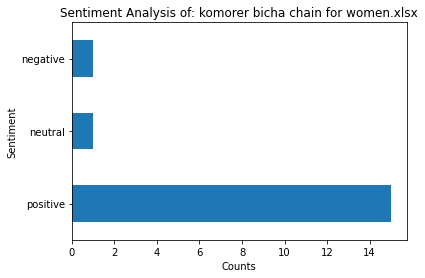

None

Positive Summary: 
।  ঠিকমতই পেয়েছিধন্যবাদ সেলার কে।  যেমনটা দেখেছি তেমনটাই পেযেছি ধন্যবাদ সেলাই ভাইদেরকে।  অল্পদিনেই রং চলে গেছে।  অনেক সুন্দরদাম অনুযায়ী অনেক ভালো২ দিনে চলে আসছেধন্যবাদ সেলার কেআমি অফারে বিশএক টাকায় এনেছিনিতে পারেনঅল্প তুষ্ট অন্তর হলে অবশ্যই আপনার প্রিয় ব্যক্তি খুশি হবেন

Negative Summary: 
।  ফালতু প্রোডাক্ট একদিনেই কালার গিয়ে কালো হয়ে গেছে

Neutral Summary: 
।  জিনিস ভাল কিন্তু হয়না খুব ছোট হয়ে গেছে বড় হইলে ভাল হইত হচ্ছেনা
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Korean Black Flower Rhinestone Choker Statement Necklaces for Girls Simple Stylish Fashion - Trendy Velvet Choker Jewelry Accessories Lace Hand-Knit Necklaces for.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


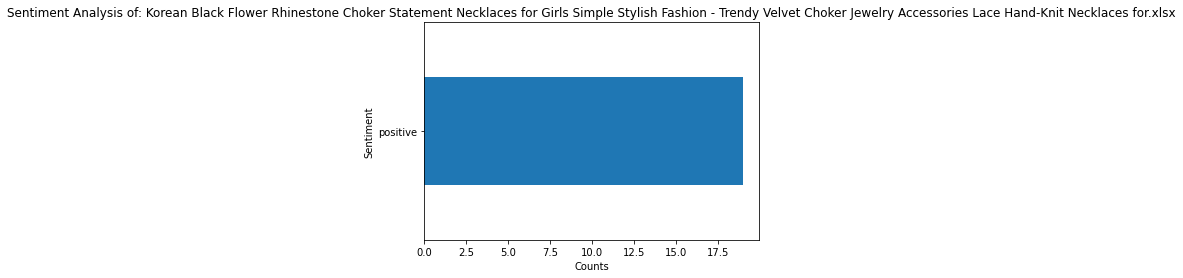

None

Positive Summary: 
।  ধন্যবাদ অনেক সুন্দর হইছে।  খুবই ভালো সবাই নিতে পারেন।  সুন্দর।  আমার কাছে অনেক ভালো লেগেছেখুব অসাধারণ।  ভাবিনি যে এটা কাপরের হবেএমনিতে সুন্দর।  চকারটা সুন্দর দাম অনুযায়ী ভালোই।  ভালো প্রোডাক্ট ধন্যবাদ সেলার কে।  খুবই ভালো প্রডাক্ট।  খুব সুন্দর।  ভালো ছিল

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Korean style new necklace for girlwomen.xlsx

positive_score is : 93.0
negative_score is : 5.5
neutral_score is : 1.5
Visual: 


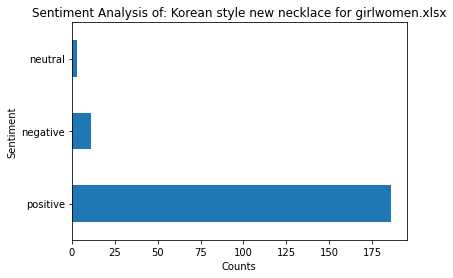

None

Positive Summary: 
।  অনেক সুন্দর আমার তো অকেন অকেন ভালো লেগেছে।  আলহামদুলিল্লাহ প্যাকিং এবং সেইলর খুব ভালো ছিলোধন্যবাদ দারাজ কে।  এটাও অনেক ভালো।  প্রোডাক্টটি সুন্দর হযেছে খেলার কে ধন্যবাদ ভালো প্রডাক দেওযার জন্য।  ভালো পছন্দ হয়েছেধন্যবাদ দারাজকে।  সত্যি খুব ভালো ছিলো।  ধন্যবাদ দারাজকে কমদামে খুব ভালো মানের প্রডাক্ট।  চেইনটা অনেক সুন্দর ধন্যবাদ দারাজ।  মূল্য হিসেবে আলহামদুলিল্লাহ ভালো।  মোটামুটি কোয়ালিটি।  খুবই সুন্দর।  ভালো না।  খুবিই ভালো একটা প্রোডাক্ট আমার খুব পছন্দ হয়েছেএবং আমার জান পাখিরো পছন্দ হয়েছেধন্যবাদ দারাজকে।  প্রোডাক্ট টা অনেক সুন্দর আমার কাছে অনেক ভালো লাগছে আপনারা ও নিতে পারেন।  ভালো একটা পণ্য দেখতে অনেক সুন্দর মান ভালোদেখতে সুন্দর ধন্যবাদ দারাজ।  টাকা অনুযাযী প্রোডাক্টটি ভালো চাইলে আপনারাও নিতে পারেন।  চেইন টা খুব সুন্দর অনেক ভালো লাগছে কম টাকায ভালো জিনিস।  ভালো ছিলো পন্যটি চাইলে নিতে পারেন সবাইধন্যবাদ সেলারকে।  প্রোডাক্টটি অনেক ভালো সবাই কিনতে পারেন খুবই সুন্দর হযেছে।  প্যাকেজিং অনেক ভালো ছিল।  অনেক সুন্দর মন মতো হইছেধন্যবাদ দারাজ।  খুবি ভালো প্রোডাক্টথ্যাংকস 

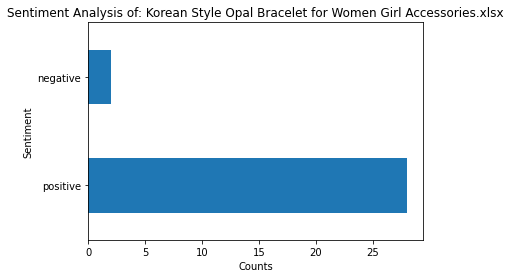

None

Positive Summary: 
।  টা অনেক সুন্দর হযেছে।  অনেক সুন্দর জদিও দেনিতে পেয়েছি কিন্তু সুন্দর নিতেপারেন ধন্যববাদ দারাজ।  ভালো নিতে পাারেন।  এটা খুব সুন্দর সামনাসামনি বেশি সুন্দর।  আলহামদুলিল্লাহ ভালো।  অনেক সুন্দর ছবিতে যেরকম দেখতে বাস্তবে ঠিক তেমনটাই যদিও প্রোডাক্টটি পেতে অনেকদিন সময লেগেছে তবুও প্রোডাক্টটি মানসম্মত হওযায দারাজ এবং সেলারকে অসংখ্য ধন্যবাদ।  একদম বাজে জিনিসএই টাকায় বাহির থেকে কিনলে আরো ভালো মানের কেনা যায়।  অনেক অনেক সুন্দর হইছে ধন্যবাদ।  ছবির মতই সুন্দর।  সুন্দর প্রোডাক্ট।  বাজে একটা জিনিস।  পছন্দ হযেছে।  সুন্দর ছিল।  ভালো।  অনেক ভালো একটা প্রোডাক্ট ওযানপ্লাস ফোনে সাপোর্ট করেছে আপনারাও কিনতে পারেন

Negative Summary: 
।  একেবারে বাজে জিনিস প্যাকেট খুলতেই পাথর উঠে গেল দুই দিন পর ফেলে দিতে হবে হযতো।  একটা পাথর ছিল না প্রোডাক্ট ভাল

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: KYIN-KY-170 Type-C to 3.5mm Headphone Converter.xlsx

positive_score is : 

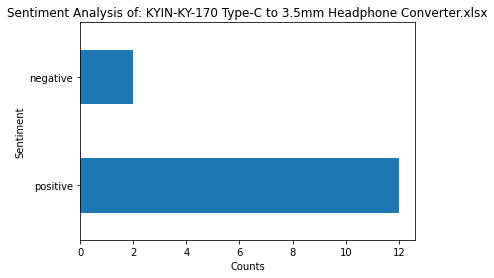

None

Positive Summary: 
।  অনেক ভালো একটি পণ্য।  এত কম টাকায় ভালো প্রোডাক্ট কল্পনা করা যায় না ফোন কল করা যায় যে কেও নিতে পারেন রিকমেন্ডেড।  ফোনে কানেক্ট করলে ঘ্যাড়ঘ্যাড় আওয়াজ হয় এধরণের অ্যাডাপ্টার সরাসরি দেখে চেক করে কেনাই ভালো।  এক কানে শোনা যায়আরেক কানে যায় নাপ্রোডাক্ট ভালো না।  এটি খুবই ভালো একটি ব্রেসলেটদুইটা অর্ডার দিয়েছিলাম একটা বোন আরেকটা গার্লফ্রেন্ডকে উপহার দিয়েছিতারা দুজনই খুশি হয়েছে

Negative Summary: 
।  যেটা চেযেছিলাম তার বিপরীত একটুও ভালো হযনিআর কোনদিন দারাজ থেকে কোন কিছু অর্ডার করবো না।  একদম বাঝে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Love Crystal Bracelet  silver blue ocean Heart Bracelet.xlsx

positive_score is : 97.2
negative_score is : 0.0
neutral_score is : 2.8
Visual: 


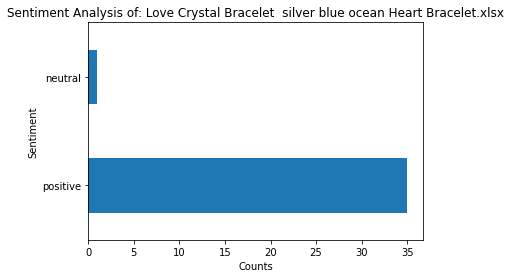

None

Positive Summary: 
।  ছবির চাইতে বাস্তবে বেশিই সুন্দরভাবিনি এত সুন্দর হবেধন্যবাদ সেলারকে।  জিনিসটা অনেক সুন্দর।  ধন্যবাদ দারাজ সঠিক পন্যসধিক ডেলিভারি।  খুবই সুন্দরসকলে নিতে পারেন।  ভালো ছিল।  যেমন চেয়েছি তেমনি পেয়েছি আলহামদুলিল্লাহ ধন্যবাদ দারাজ।  যেমন চেয়েছি তেমনটাই পেয়েছি ধন্যবাদ দারাজ ও সেলারকে।  ব্রেসলেট টা অনেক সুন্দরচাইলে আপনারাও নিতে পারেন।  যেমন অর্ডার করেছি তেমনই পেয়েছিধন্যবাদ দারাজকে।  খুব সুন্দর কম টাকায় ভালে জিনিস পেলাম।  সুন্দর তবে ডেলিভারি চার্জ টা বেশি।  টা সুন্দর ভালো লেগেছে।  অনেক সুন্দর অনেক ভালো লেগেছে।  টাকা আন্দাজে ভালোই ছিল।  ব্রেসলেটটি ভালোই ছিল।  সেই ভালো লাগছে।  অতটা ভালো না।  খুব সুন্দর।  সঠিক পেযেছি ধন্যবাদ সেলর

Negative Summary: 
Not found


Neutral Summary: 
।  এটা ছবির মতো বড় না কেউ নিলে অবশ্যই ভালো করে দেখে নিবে জিনিসটা ভালো কিন্তু পাথরের সাইজটা ছোট
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Luxury -Color Queen Crown Chain Necklace.xlsx

positive_score i

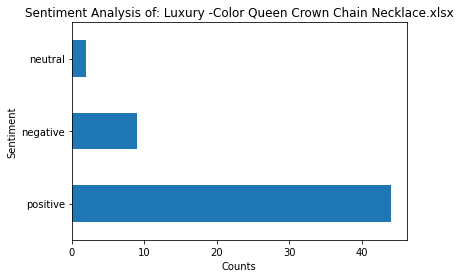

None

Positive Summary: 
।  অনেক ভালো প্রোডাক্ট।  এই দামে মোটামুটি ভালোই।  মোটামুটি।  মোটামোটি ভালো।  দাম অনুযায়ী খারাপ না মোটামুটি ভালো লেগেছে।  টাকার মান হিসেবে পন্য টা ভালো আছে।  অনেক ভালো ধন্যবাদ দারাজ।  দাম অনুযায়ী ভালো আছে।  অনেক ভালো ধন্যবাদ।  ভালো ভাবে পেযেছি।  মোটামুটি ভালো।  ভালো জিনিস।  পন্যটি ভালো।  ভালো ছিলো।  ভালো হয়েছে।  ভালো

Negative Summary: 
।  আসসালামু আলায়কুম ভাইয়া এই চেইনটা একদম বাজে ছিলো রং উঠে গেছে।  তিন থেক চার দিনের মধ্যেই রং উঠে গেছে।  আইটার কালার উঠে গেছে দুই দিনেই।  রং উঠেগেছে তিন দিনেই

Neutral Summary: 
।  দাম হিসেবে খারাপ না তবেআর ভালো কিছু আশা করা যায়।  লকেটটা বড় ভাবছিলাম বাট অনেক ছোট
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Luxury Roman Crystal Bracelet For Women Wedding Gift (2).xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


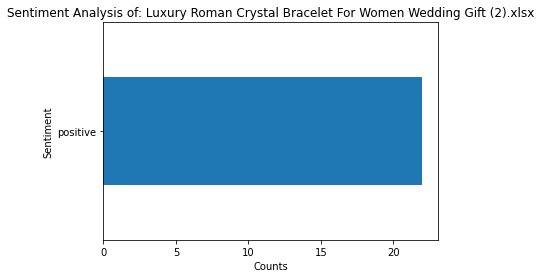

None

Positive Summary: 
।  খুব সুন্দর।  ভালোই।  ভালো নিতে পারেন।  অনেক সুন্দর।  ভালো লাগছে।  অনেক ভালো চাইলে নিতে পারেন

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Magic Digitek Micro USB OTG Cable multicolor.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


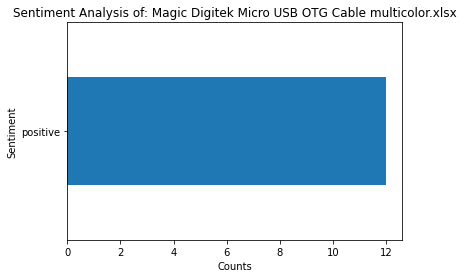

None

Positive Summary: 
।  চাইছি এক দিছে অন্যটাকাজটা ঠিক করলেন না।  অনেক ভালো একটি পণ্য।  খুবই বাজে একটা প্রোডাক্ট ছিলোদেখতেও খারাপ মানটাও খুব খারাপ।  ম্যাগনেটের কোযালিটি খুব ভালো একেবারে সুন্দর ভাবে সেট হচ্ছেযাদের মোবাইলের চার্জিং পিন কিছুদিন পরেই নষ্ট হযে যায তারা ট্রাই করে দেখতে পারেন সত্যিই প্রাইজে দারুন ও একটি কাজের গেজেট।  খুব সুন্দর প্রোডাক অরজিনাল মাল পাইছি দারাজ কে ধন্যবাদ।  তবে মুটামুটি ভালো এখানে যদি হতো তহলে দশ শে দশ হতো তবে খারাপ না এখন দেখি ব্যবহার করে কতদিন যায ধন্যবাদ দারাজ কে।  মোটামুটি ভালোই ধন্যবাদ দারাজ।  অনেক ধন্যবাদ দারাজকে অনেক ভালো।  খুব ভাল একটা প্রডাক্্্্

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: magnet cable x cable Led Magnetic Charging USB Cable 2A Charging Cable.xlsx

positive_score is : 86.7
negative_score is : 13.3
neutral_score is : 0.0
Visual: 


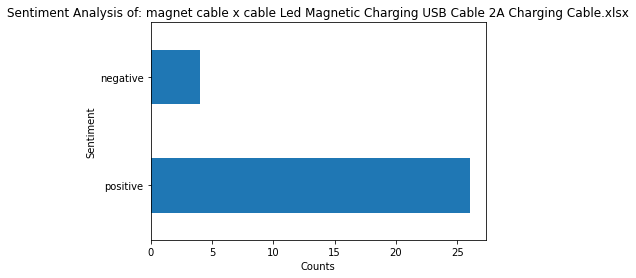

None

Positive Summary: 
।  অনেক ভালো।  মোটামুটি ভালো খারাপ না কিন্তু ফাস্ট চার্জিং সাপোর্ট করে না।  খুব ভালো প্রডাক্ট।  ভালোই চলছে ধন্যবাদ দারাজ।  খুব ভালো একটা প্রডাক্ট।  কেবল টা ভালো ছিল।  ততোটাও ভালো না।  ভালো।  দাম হিসাবে অনেক ভালো একটা ক্যাবল আপনারা সবাই নিতে পারেন।  অসম্ভব ভালো একটি প্রোডাক্ট একশ সাটিস্ফাইড ধন্যবাদ সেলার কে

Negative Summary: 
।  ফালতু কেউ কিনবেন না অনেক বড়ো ভুল হবে।  ফালতু।  প্রথমে খুবই ভালো ছিল তবে কিছু দিন ব্যবহারের পর মানে তেরেসাত দিন ব্যবহারের নষ্ট হয়ে গিয়েছে।  প্রথম দিকে তো খুব ভালো গেছে কিন্তু কিছুদিন পর নষ্ট হয়ে গেছে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Magnetic Micro USB Magnet Charger Cord 3 in 1.xlsx

positive_score is : 91.1
negative_score is : 6.7
neutral_score is : 2.2
Visual: 


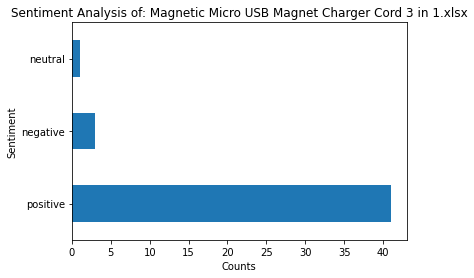

None

Positive Summary: 
।  সেই ভালো অস্থির।  প্রডাক্ট ভালো যেরকম চাইছি সেরকমই পাইসিধন্যবাদ দারাজ।  একটা ভালো পেয়ে আরো তিন টা অর্ডার করলাম।  ভালো প্রোডাক্ট।  খুব ভালো।  ভালো পাইনি প্রোডাক্ট খুব খারাপ।  কেবল ভালো অাপনারা নিতে পারেন।  ভালো তবে এক মাসের বেশি যায় না।  খুবই সুন্দর হযেছে ধন্যবাদ।  ভালো দাম অনুযায়ী ঠিক আছে।  ভাই ভালো না।  ভালো নিতে পারেন।  দাম টা একটুও কম হলে ভালো হতো ভালোই লাগলো।  ভালো আছে।  ভালো।  সুন্দর

Negative Summary: 
।  ফালতু

Neutral Summary: 
।  মানের দিক দিযে ততটা ভাল না বেশিদিন টিকবে না
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Mansha Nose Ring - Gold Color.xlsx

positive_score is : 93.8
negative_score is : 0.0
neutral_score is : 6.2
Visual: 


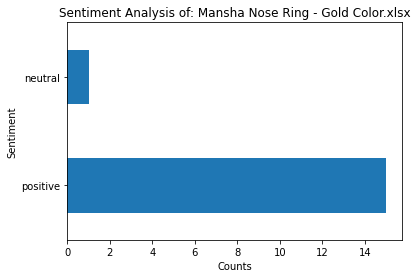

None

Positive Summary: 
।  নদীটা অনেক সুন্দর আপনারা চাইলে নিতে পারেন।  খুব ভালো আপনারা নিতে পারেন।  ভালো।  প্রোডাক্টের কোয়ালিটি ভালোই ছিল কিন্তু চেইনটা ছোট ছিল।  পণ্যের কোয়ালিটি খুবেই ভালো আমি খুব খুশি সবাই নিতে পারেন ধন্যবাদ সেলার দারাজকে।  গযনাটি অনেক ভালো দারাজকে ধন্যবাদ সেলার কেও ধন্যবাদ সবাইকে ধন্যবাদ।  খুব ভালো লাগলো ধন্যবাদসত্যি বলতে খুব সুন্দর সবাই নিজের পছন্দের মানুষ এর জন্য নিতে পারেন।  খুবই চমকার সবাই নিতে পারেন ধন্যবাদ সেলার ও দারাজ কে

Negative Summary: 
Not found


Neutral Summary: 
।  মোটামুটি খারাপ না ছবিতে যা আছে হুবহু তাই তবে দাম টা একটু বেশি পাড়ার দোকানে আরো কমে পাওয়া যায়
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Mariyam Necklace Pendant Chain for Women  GIRLS.xlsx

positive_score is : 95.5
negative_score is : 3.4
neutral_score is : 1.1
Visual: 


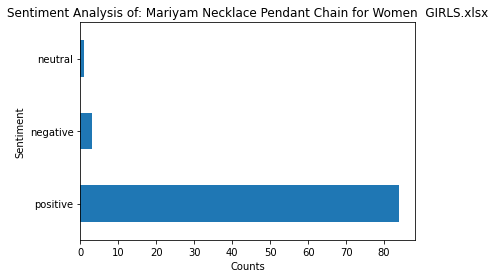

None

Positive Summary: 
।  সুন্দরভাবে বুঝিযা পাইছি ভালোই লেগেছে।  জিনিসটা ভালো দুটো নিয়েছি একটার লক হালকা।  সুন্দর আছে আপনারা চাইলে নিতে পারেন।  খুভই ভালো প্রোডাক্ট।  ধন্যবাদ ভালো একটি চেন দেওযার জন্য।  ভালো হয়েছেতিন দিনের মধ্যে হাতে পেয়েছি দারাজ কে ধন্যবাদ।  খুব ভালো পোডাক সবাই নিতে পারেন অসাধারণ একটি চেন।  প্রোডাকটা ভালো সবাই নিতে পার কম দামে ভালো একটা জিনিস।  ধন্যবাদ সেলার ভাইকে এবং দারাজকে পন্যটি ভালো হয়েছে।  পেয়েছিভালই।  ভালো হযেছে সুন্দর হযেছে সেলার কে ধন্যবাদ।  খুব চমকার একটি চেইন দারাজকেঅনেক ধন্যবাদ।  দাম অনুযায়ী ভালো অনেক ধন্যবাদ দারাজ কে।  খুব ভালো লেগেছে ছবির সাথে মিল আছে সেম।  মান ভালো তবে কালার কতদিন থাকবে জানিনা।  মোটামুটি ভালো দেখা যাক রং কযদিন থাকে।  মোটামুটি ভালো ছিলো যে কেউ নিতে পারেন।  একটু সমস্যা আছে এমনে সুন্দর ভালো।  খুব ভালো ছিলো নেকলেসটি।  ভালো বাট দামটা বেশি।  ভালো ছিল।  ভালো ঠিক আছে।  ভালো ছিল না।  সুন্দর দেখতে।  ভালো ছিল।  মোটামুটি।  ভাল আছে।  খুব ভালো।  ভালো।  এটা ভালো পরে নাই তই আমি এটা পেরত দিব।  দাম হিসাবে মোটামুটি ভালো।  অনেক ভালো একটা প্রোডাক্টআমার কাছ

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2456 (\N{BENGALI LETTER GHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2524 (\N{BENGALI LETTER RRA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


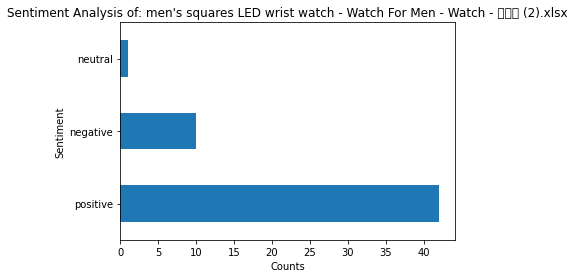

None

Positive Summary: 
।  আলহামদুলিল্লাহ পণ্যটি অনেক ভালো আপনারা যে কেউ চাইলে নিতে পারেন।  খুব সুন্দর হয়েছে দাম হিসেবে খুব ভালো।  সর্বপরি ভালো ছিলো প্যাকিংও সুন্দর।  অনেক ভালো ঘরি চাইলে আপনারাও নিতে পারেন।  ঘডিটা আসলেই অনেক ভালো ছিলো।  দাম হিসাবে ভালো।  আলহামদুলিল্লাহ দাম হিসেবে অনেক ভালো।  প্রায়জ হিসেবে ঘড়ি ভালো।  দাম অনুযাযী ভালো।  ভালোই ছিলো।  ভালোই।  ভালো।  দাম হিসাবে মোটামুটি ভালো।  আলহামদুলিল্লাহ পণ্যটি অনেক ভালো আপনারা যে কেউ চাইলে নিতে পারেন

Negative Summary: 
।  ভালোই লাগছে ঘরিটা।  ঘড়িটা একদম ভালোনা।  ঘডি একদম ভালো না

Neutral Summary: 

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: men's squares LED wrist watch - Watch For Men - Watch - ঘড়ি (3).xlsx

positive_score is : 78.8
negative_score is : 19.2
neutral_score is : 1.9
Visual: 


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2456 (\N{BENGALI LETTER GHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2524 (\N{BENGALI LETTER RRA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


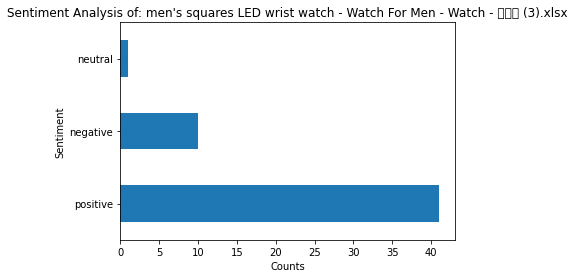

None

Positive Summary: 
।  দাম হিসাবে ঘড়িটা অনেক ভালো কেউ চাইলে নিতে পারে ধন্যবাদ দারাজ কোম্পানি।  খুব সুন্দর হয়েছে দাম হিসেবে খুব ভালো।  সর্বপরি ভালো ছিলো প্যাকিংও সুন্দর।  অনেক ভালো ঘরি চাইলে আপনারাও নিতে পারেন।  ঘডিটা আসলেই অনেক ভালো ছিলো।  দাম হিসাবে ভালো।  টাকা হিসাবে মালটা অনেক ভালো ছিল ধন্যবাদ সেলার দারাজ।  আলহামদুলিল্লাহ দাম হিসেবে অনেক ভালো।  প্রায়জ হিসেবে ঘড়ি ভালো।  দাম অনুযাযী ভালো।  ভালোই ছিলো।  ভালোই।  ভালো।  দাম হিসাবে মোটামুটি ভালো।  আলহামদুলিল্লাহ পণ্যটি অনেক ভালো আপনারা যে কেউ চাইলে নিতে পারেন

Negative Summary: 
।  ভালোই লাগছে ঘরিটা।  ঘড়িটা একদম ভালোনা।  ঘডি একদম ভালো না

Neutral Summary: 

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: men's squares LED wrist watch - Watch For Men - Watch - ঘড়ি.xlsx

positive_score is : 75.5
negative_score is : 20.4
neutral_score is : 4.1
Visual: 


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2456 (\N{BENGALI LETTER GHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2524 (\N{BENGALI LETTER RRA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


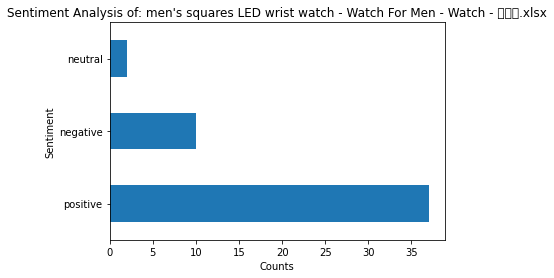

None

Positive Summary: 
।  দাম হিসাবে ঘড়িটা অনেক ভালো কেউ চাইলে নিতে পারে ধন্যবাদ দারাজ কোম্পানি।  খুব সুন্দর হয়েছে দাম হিসেবে খুব ভালো।  সর্বপরি ভালো ছিলো প্যাকিংও সুন্দর।  অনেক ভালো ঘরি চাইলে আপনারাও নিতে পারেন।  ঘডিটা আসলেই অনেক ভালো ছিলো।  দাম হিসাবে ভালো।  টাকা হিসাবে মালটা অনেক ভালো ছিল ধন্যবাদ সেলার দারাজ।  আলহামদুলিল্লাহ দাম হিসেবে অনেক ভালো।  প্রায়জ হিসেবে ঘড়ি ভালো।  দাম অনুযাযী ভালো।  ভালোই ছিলো।  ভালোই।  ভালো

Negative Summary: 
।  ভালোই লাগছে ঘরিটা।  ঘডিটা আমি ফেরত দিতে চাই এটা একদম ভালো না নষ্ট করি।  একেবারে ফালতু একটা জিনিস।  ঘড়িটা একদম ভালোনা।  ঘডি একদম ভালো না

Neutral Summary: 
।  টাকা পরিমান ভাল ভালো।  নাহ নরমাল লোকাল বাজারে বিশ টাকায় পাওয়া যায়
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Metal Nose Pin for Women - Black.xlsx

positive_score is : 80.0
negative_score is : 13.3
neutral_score is : 6.7
Visual: 


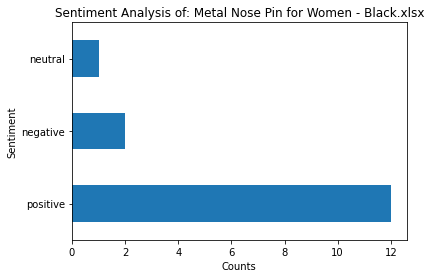

None

Positive Summary: 
।  একদম বাজে টাকা টা পুরাই বরবাদ।  দামের তুলনায প্রোডাক্ট ভালো।  প্রাইস অনুযায়ী ভালোই।  একদোম বাজে।  সুন্দর।  বাজে।  ভালো প্রডাক্ট ধন্যবাদ সেলার কে।  আলহামদুলিল্লাহ মাল টা ভাল পড়ছে

Negative Summary: 
।  দাম হিসাবে প্রিমিয়াম ইকুয়ালিটি।  নষ্ট পরিবর্তন করতে চাই

Neutral Summary: 
।  আরেকটু মান উন্নত করা যেতো
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: MF Stereo Audio 3.5mm Jack Extension Cable Male To Female NEW Plug Headphone 1.5m.xlsx

positive_score is : 87.5
negative_score is : 12.5
neutral_score is : 0.0
Visual: 


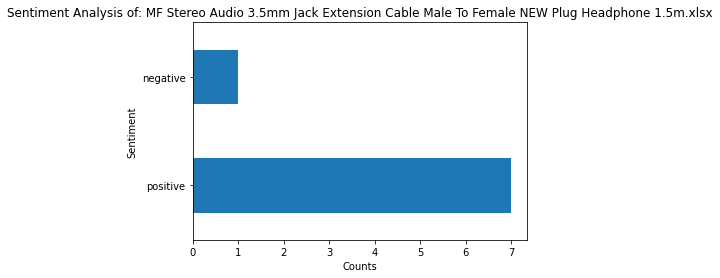

None

Positive Summary: 
।  খুব ভালো ছিল।  আলহামদুলিল্লাহ প্রোডাক্ট টা অনেক ভালচার্জ ও অনেক দ্রুত হয়।  আলহামদুলিল্লাহ অরিজিনাল কেবল পেলাম থ্যাংকস দারাজ।  ২নম্বর ক্যাবল দিয়েছে ফোনে সার্জজই হয়না যদিওবা একটু হয় খুব দেরি করে।  ক্যাবল দিয়ে চার্জ হয় কুইকবাট মনে হচ্ছে ক্যাবল টা একদম ফ্রেশ না।  আমার রেডমী এর সাথে ফীট হয নাকেনা বেহুদা হল।  একশ অথেনটিক প্রডাক্ট এবার নিয়ে পাঁচ বার কিনা হলো

Negative Summary: 
।  কেবল ডিফেক্টিভ আমার আগের অরিজিনাল কেবল এবং দশ ওয়াটের চার্জার দিয়ে চার্জ দিলে এপ্রোক্স নয় ওয়াট উঠে কিন্তু এইটায় সর্বোচ্চ পাঁচ ওয়াটের বেশি উঠে না অর্থা ১১-১২ এম্পিয়ার এবং চৌদ্দচার ভোল্টের উপরে যায় না হতাশ হলাম যে দারাজের সার্টিফায়েড স্টোর বা মল এরকম কপি প্রোডাক্ট সেল করে এর চেয়ে লোকাল সেলার থেকেও ভালো প্রোডাক্ট পেয়েছিলাম আগেও অনেক সবাই এই কেবল কিনতে গেলে সতর্কতা অবলম্বন করবেন এছাড়াও টাইপ-বি জ্যাকটাও ডিফেক্টিভ অর্থা উপরের দিকে ফাকা ছবিতে দেওয়াই আছে এখন রিটার্ন করাও মহা প্যারা যেহেতু ব্যাকাপ ফোন সেহেতু এটা দিয়েই চালিয়ে দিবো

Neutral Summary: 
Not found

---------------------------------------

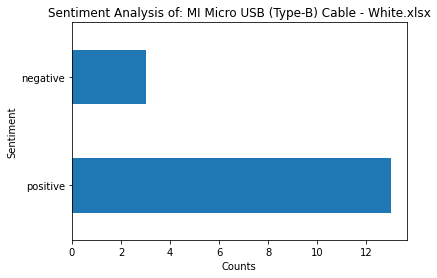

None

Positive Summary: 
।  অনেক ভালো পণ্য।  আনেক ভালো।  টা অনেক সুন্দর আপনারা চাইলে নিতে পারেন এর মাসের ওযারেন্টি আছেসাথে একটা টি-শার্ট ফ্রী দিযেছেআমার কাছে একটা বিশ্বস্ত অনলাইন শপআমি মোশনভিউ থেকে আগে অনেক কিছু নিযেছিএখনও পর্যন্ত তাদের সার্ভিস আমার খুব ভালো লেগেছেঅসংখ্য ধন্যবাদ কে।  বিশচার ঘন্টার মধ্যে প্রডাক্টটি হাতে পাইলাম প্রডাক্টটি হাতে পেয়ে খুবই ভালো লাগলো আশাকরি প্রডাক্টটি ভালো হবে ব্যবহার করে দেখি প্যকেজিং খুবি ভালো ছিলো ইনটেক প্রডাক্ট কিন্তু কোন ওয়ারেন্টি কার্ড বা সেলারের ক্যাশ ভাউচার নাই সমস্যা হলে কিভাবে ওয়ারেন্টি সুবিধা পাবো জানি না তবে প্রডাক্টটি দেখে মনে হয় সমস্যা হবে নাএখন বাকি টা আল্লাহ ভরসা।  সেলার কে ধন্যবাদ জানাচ্ছিকারণ একদমই নতুন একটি ঘড়ি আমাকে দেয়ার জন্যকোন রকম প্রতারণার স্বীকার হইনিতাদের মেসেজ দেয়ার পর রিপ্লাই গুলোও ভালো পেয়েছিএই পেইজটি সত্যিই বিশ্বস্তআর ঘড়ির কথা কি বলবোআজ আট দিনের মাথায় রিভিউ দিচ্ছিচার্জ হতে দুই ঘন্টারও বেশি সময় লাগেনরমাল ব্যবহারে প্রথম চার্জে এখন পর্যন্ত সতের এর বেশি চার্জ এখনো আছে ঘড়িতেআর দেখতে খুবই সুন্দরআবারো ধন্যবাদ সেলারকে।  সব ঠিক আছে কিন্

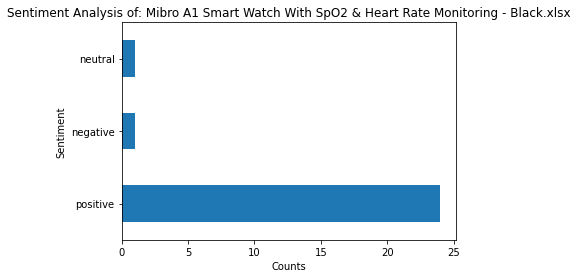

None

Positive Summary: 
।  মোশন ভিউ এর প্রোডাক্ট বরাবরই ভালো হযঘডিটা এক সপ্তাহ হল ব্যবহার করছি দেখা যাক কতদিন টিকেডেলিভারিও তিন দিনের মধ্যে পেযে গেছি রিকমেন্ডেড।  পণ্যের কোয়ালিটি মোটামুটি রাইডার এর ব্যবহার ভালো।  ভালো প্রোডাক্ট দিছে সেলার অনেক ভালো।  আলহামদুলিল্লাহখুবি ভালো।  সব মিলিয়ে এই দামে ভালো।  অরিজিনাল প্রোডাক্ট।  একশ অরিজিনাল প্রডাক্ট আমি এই সেলার কাছথেকে নিযেছি ও নিযেছি ভালো প্যাকেজিং এবং ইনটেক প্রোডাক্ট দেযঅসংখ্য ধন্যবাদ সেলার কে।  প্যাকেজিং খুব ভালো ছিলোকিন্তু বিকাশে পেমেন্ট করেও ক্যাশব্যাক পায় নাই

Negative Summary: 
।  এক মাস ইউজের আগেই ডিসপ্লে চলে গেললাইট আসে বুঝা যায় কিন্তু কোন কিছু দেখা যাচ্ছে না কিভাবে কমপ্লেইন করা যায় আর ওয়ারেন্টি কিভাবে ক্লেইম করবোপ্যাকেটের উপর মোশনভিউ এর ছয় মাসের ওয়ারেন্টি স্টিকার লাগানো ছিল

Neutral Summary: 
।  যেমনটা চেযেছিলাম ঠিক তেমন টাই পেযেছিকিন্তু এর ওযারেন্টি সম্পর্কে কিছু বুঝলাম না এ এর ফিচার এ বলা আছে কিন্তু বক্স এর কোনো জাযগায এই লেখা টা দেখলাম না
------------------------------------------------------------------------------------------

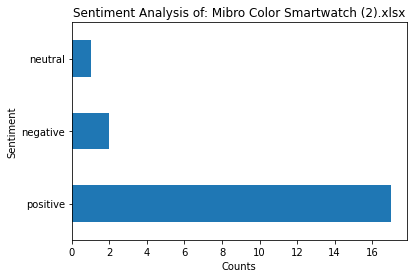

None

Positive Summary: 
।  শুকরিয়া ধন্যবাদ দারাজ ভালোবাসা রইল।  আসলেই অসাধারণ সেলারকে ধন্যবাদ।  অসাধারণ।  একশ অরিজিনাল প্রডাক্ট আমি এই সেলার কাছথেকে নিযেছি ও নিযেছি ভালো প্যাকেজিং এবং ইনটেক প্রোডাক্ট দেযঅসংখ্য ধন্যবাদ সেলার কে।  অনেক দ্রুত ডেলিভারি পেয়েছি আর প্রোডাক্ট ও ইনটেক ছিলএত তারাতারি অরিজিনাল স্মার্ট ওয়াচটি পাঠানোর জন্যে সেলারকে অনেক ধন্যবাদ।  প্যাকেজিং খুব ভালো ছিলোকিন্তু বিকাশে পেমেন্ট করেও ক্যাশব্যাক পায় নাই।  এর প্রডাক্ট মানেই ভালো অরজিনাল প্রডাক্ট খুলে দেখার প্রয়োজন মনে করলাম নাধন্যবাদ তাড়াতাড়ি ডেলিভারি দেবার জন্য

Negative Summary: 
।  আমি এই স্মার্ট ওযাচ টা অর্ডার করছি একদিন চলার পর আর ওপেন হয না হঠা করে বন্ধ হযে গেছে।  ঘডিটা নষ্ট ছিল যদিও আমি ফেরত দিযে টাকা ব্যাক পেযেছি

Neutral Summary: 
।  যেমনটা চেযেছিলাম ঠিক তেমন টাই পেযেছিকিন্তু এর ওযারেন্টি সম্পর্কে কিছু বুঝলাম না এ এর ফিচার এ বলা আছে কিন্তু বক্স এর কোনো জাযগায এই লেখা টা দেখলাম না
-------------------------------------------------------------------------------------------------------------------------
 

Product N

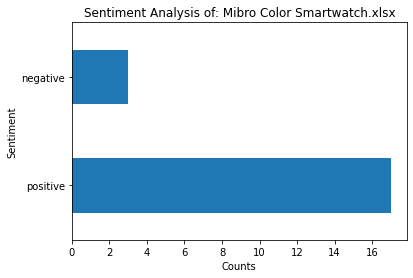

None

Positive Summary: 
।  শুকরিয়া ধন্যবাদ দারাজ ভালোবাসা রইল।  এই স্মার্ট ঘডিটি আমার পছন্দ হযেছে কিন্তু এর কোন কলিং ফাংশন নেই।  ফিচার গুলি পছন্দসই না হবার কারনে ফেরত দেয়া হয়েছেসেলার ভাল ছিলেন।  আসলেই অসাধারণ সেলারকে ধন্যবাদ।  অসাধারণ।  একশ অরজিনাল প্রডাক্ট দেখতে অনেক সুন্দর তিনদিনে ডেলিভারি পেযেছি প্যাকেজিং ১০১০আমি ফুললি স্যাটিসফাইডঘডি সাথে একটা গেঞ্জি ফ্রি দিচ্ছেসেলার কে অসংখ্য ধন্যবাদ।  আলহামদুলিল্লাহ প্রোডাক্টটি অরজিনাল পেযেছি এবং এর দাম অনুযাযী মান খুবই ভালোতবে দামটি আরেকটু কম হলে ভালো হতো।  ছবিতে ওয়ারেন্টি সিল দেয়া থাকলেও প্রোডাক্ট রিসিভ করলাম ওয়ারেন্টি সিল ছাড়া সেলার এর রেসপন্স পেলাম অনেক দেরিতে।  আলহমদুলিল্লাহ দুই মাস পর রিভিউ দিলামসব কিছুই ঠিক ঠাক ভাবেই কাজ করছিলোব্যাটারি ব্যাকআপ আমার কাছে দিন যাইএকটা সমস্যা ফিল করছিলাম অল্প সময হাতে রাখলেই হাত গেমে সাদা হযে যায অ্যান্ড হাত ব্যাথা একটা ফিল হয।  কোয়ালিটি খুব ভালো আমার কাছে খুব ভালো লাগছে ধন্যবাদ এবং কে।  একদম ব্রান্ড ওয়ারেন্টি সহ অরজিনাল প্রোডাক্ট পেয়েছিফটোতে যত সুন্দর দেখা যাচ্ছে বাস্তবে তার থেকে বেশি প্রিমিয়াম লাগে কিন্তু উপ

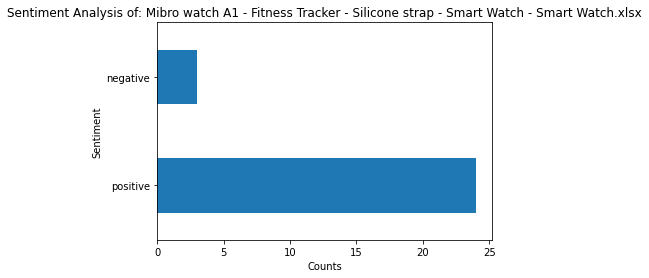

None

Positive Summary: 
।  প্রডাক্ট এর কোযালিটি ভালো অরিজিনাল পন্য অর্ডার করার তিন দিনের ভেতরেই পন্য পেযেছি চাইলে নিতে পারেন সাথে একটা প্রটেক্টর গিফট পেলে খারাপ হতোনা।  ভালোই আছে চার্জ বেকআপ ভালোই মনে হচ্ছে।  আলহামদুলিল্লাহ যেমনটা চেয়েছি প্রোডাক্ট ভালো এ-ই এআপনারা চাইলে নিতে পারেন।  আমি অনেক সুন্দর একটি ঘডি ছিল।  ভালো প্রোডাক্টকোযালিটিফুলসেলারের ব্যবহারও ভালো লেগেছে।  ভালো হইছে এখন পর্যন্ত কোনো সমস্যা হয়নি।  ম্যাগনেটিক ক্যাবলটা অনেক ভাল দ্রুত চার্জ হয় আমার কাছে জিনিসটা খুব ভালো লাগছে আর মাত্র দিনে ডেলিভারি দিযেছে দাম অনুযাযী জিনিসটা খুব ভালো।  কেবল টা ভালই ছিল কালার টা সুন্দর এবং - এবং - অ্যাপেল পিন মোটামুটি তিনটাই ভালো ছিল সাথে চার্জিং এলইডি লাইট।  কেবল টা অনেক ভালো ফাস্ট চাজ হয়যে রকম ভাবছিলামতার থেকেও ভালো পেয়েছি হিসেবে এক হাজার দশ।  অসাধারন একটা পণ্য আমি যেমনটা আশা করেছিলাম তার থেকে অনেক ভালো কিছু পেয়েছি পণ্যটি ব্যবহার করে বুঝলাম অনেক ভালো এবং খুবই দ্রুত চার্জ হয়।  অসাধারণ একটা প্রডাক্ট এতো কম দামে এতো ভালো জিনিস পাইছি আমি রিভিউ না দিযে পারলাম না চার্জ ভালো ভাবেই হয সাধারন কেবল দিয

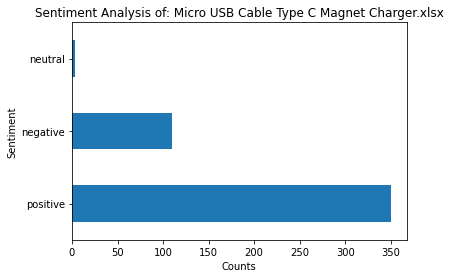

None

Positive Summary: 
।  কম দামে ভালো জিনিস পছন্দ হইসে ফাস্ট চার্জ সাপোর্ট করে।  দাম হিসেবে প্রোডাক্টটা মোটামুটি ভালো।  প্রোডাক্টা অনেক ভালো লাগলোধন্যবাদ।  এক কথায় অসাধারণখুবই ভালো কেবল।  জিনিসটা খুবই ভালো খুব দ্রুত হয কেউ চাইলে নিতে পারেন।  হিসাবে ভালো জিনিস পাইছি।  ভালই চার্জ একটু স্লো হয়।  মানে অসাম একটা চার্জার।  আলহামদুলিল্লাহআমি পণ্যটি ভালো আছে চার্জ ভালো হয় এবং আপনারা পণ্যটি নিতে পারেন।  ভালোয় আমি ডাটা কেবল হিসেবে ইউস করতে চাইছিলাম বাট এটা শুধু চার্জিং কেবল।  দ্রুত ডেলিভারি দিয়েছে প্রোডাক্ট ও ভালো।  খুব ভালো একটা প্রডাকস।  ভালো জিনিস ভালো কাজ করে।  দাম হিসেবে ভালোই।  অল্প টাকায় ভালো মানের নিতে পারেন।  অনেক ভালো প্রডাক্ট আপনারা সবাই নিতে পরেন।  অনেক অনেক ভালো পন্য ধন্যবাদ দারাজকে।  খুব ভালো মানের সবাই নিতে পারেন।  ফাস্ট চার্জিং সাপোর্ট করেনা।  ভালো হযেছে অনেক সুন্দর।  খুব ভালো মানের ক্যাবল।  তেমন একটা ভালো না।  ভালোই পেয়েছি।  ভালোই।  ভাল।  টা অনেক ভালো সব মিলিয়ে সবাই নিতে পারেন।  খুব ভালো বিল্ট কোয়ালিটিচার্জ ও ফাস্ট হয়দুইটা অর্ডার করেছিলাম চাইলে নিতে পারে।  চার্জিং কেবলটা খুব 

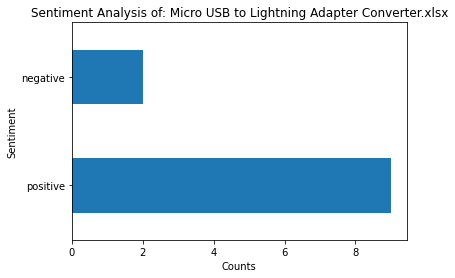

None

Positive Summary: 
।  ভালো ছিলো।  ভালো না।  ভালোই

Negative Summary: 
।  বাটপার সেলার পুরাতন জিনিস দেয়।  খুবই হতাশ আমি দারাজের নিয়মিত কাস্টমার আগের প্রোডাক্ট গুলা মোটামুটি ভালই পেয়েছি কিন্তু পাওয়ারব্যাংক দুই মনিটও সার্ভিস দেয়না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Mini Portable Power Bank.xlsx

positive_score is : 76.2
negative_score is : 23.8
neutral_score is : 0.0
Visual: 


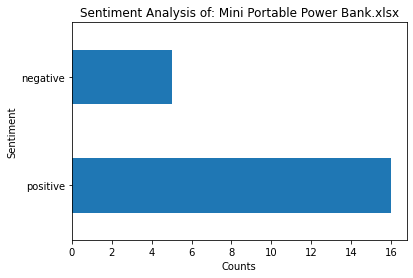

None

Positive Summary: 
।  ধন্যবাদ প্রোডাক্ট টি ভালোই ছিলো।  অনেক অনেক ভালো।  আজকেই হাতে পেলাম খুবই ভালো প্রোডাক্ট।  প্রোডাক্ট টা ভালো হযেছে যাদের প্রযোজন নিতে পারেন।  ভালো ক্যাবল পাইছি সেলার এই ফোন টা ফ্ল্যাশ মারবো টাই ক্যাবল নিছি।  প্রোডাক্ট ভালো মানের পাইছিআপনারা নিতে পারেনতবে হাতে পাইতে একটু সময় লাগছে প্রায় দশছয় দিন যাক এটা সমস্যা না।  দারুন একটা ক্যাবল সেলারের ব্যবহারও অনেক ভাল সবাই নিতে পারেন।  খুব ফাস্ট ক্যাবলকম দামে খুব ভালো ক্যাবলআপনারা নিতে পারেন

Negative Summary: 
।  নষ্ট।  ডারাজ আমাকে একটা নষ্ট পাওয়ার ব্যাংক দিয়েছে চার্জ হয় না আবার নষ্ট ও আমার মন টাই খারাপ হয়ে গেলো।  ফালতু একটা জিনিস চার্জও হয় না টাকা নষ্ট

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Mini USB 2.0 Cable charging and Camera Cable.xlsx

positive_score is : 93.0
negative_score is : 7.0
neutral_score is : 0.0
Visual: 


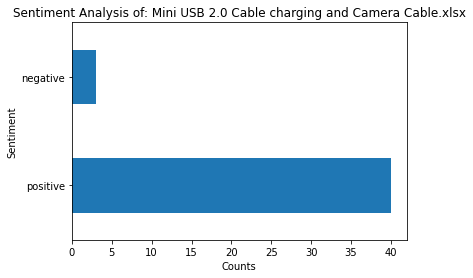

None

Positive Summary: 
।  ভালো আছেসেলার ও ভালো।  ভালো লাগছে।  অনেক ভালো একটা প্রোডাক্ট চাইলে আপনার নিতে পারেনধন্যবাদ দারাজ কে ও সেলার কেও।  মজবুত ভালো।  বেশ ভালো পন্যআপনারা সবাই নিতে পারেন।  খুব ভালো মানের চিলো ধন্যবাদ।  অনেক ভালো ক্যাবল।  মোটামুটি ভালই।  ভালই।  ভালো।  ক্যাবলটা ভালোই চার্জিং দ্রুত হয।  কম দামে এর থেকে ভালো কেবল কোথাও পাইনি।  কেবল ভালো আছে আপনারা চাইলে নিতে পারেন আমি ভাল পাইছি।  খুবই ভালো ব্যবহার করে রিভিউ দিলাম

Negative Summary: 
।  কানেকশন পাযনা রিজেক্ট কেবল।  খুবই পঁচা এবং বাজে নষ্ট একটা কেবল একটা দড়ি ছাড়া কিছুই না যা দিয়ে ছাগল বাঁধা যাবে না।  খুবই ভালো এক হাজার চারশ শূন্য উঠে এম্পায়ার এপে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Mobile Phone Data Charging Cable, Android Data Cable, Micro USBV8 Data Cable.xlsx

positive_score is : 92.3
negative_score is : 7.7
neutral_score is : 0.0
Visual: 


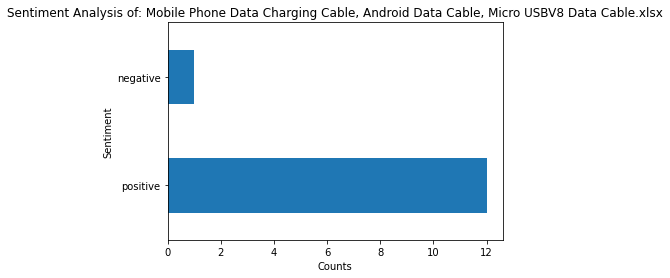

None

Positive Summary: 
।  অসাধারণ খুব ভালো।  ভালো আছে কেবল।  সেলার কে ধন্যবাদ সঠিক জিনিস পাঠিযেছেন।  আলহামদুলিল্লাহ যেটা চেয়েছিলাম সেটাই পেয়েছি অনেক ভালো প্রডাক্ট পেয়েছি ধন্যবাদ সেলার ভাইকে এবং ধন্যবাদ রাইডার ভাইকে খুব দ্রুত হাতে পেয়েছি।  প্রোডাক্টটা অনেক ভালো যেমন চেযেছি তেমনই পেযেছি ধন্যবাদ দারাজ।  যেমনটা দেখিয়েছে ঠিক তেমনটাই দিয়েছে প্রোডাক্টটা ভালো।  ভালো পেযেছি কে অসংখ্য অসংখ্য ধন্যবাদ

Negative Summary: 
।  জয়েন্ট গুলো নড়বড়ে অনেক গুতাগুতি করে কানেকশন দেওয়া হয়েছে তবে কাজ হয়েছে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Molex Power Supply Y Splitter 1 Male to 2 Female Extension Cable.xlsx

positive_score is : 91.7
negative_score is : 8.3
neutral_score is : 0.0
Visual: 


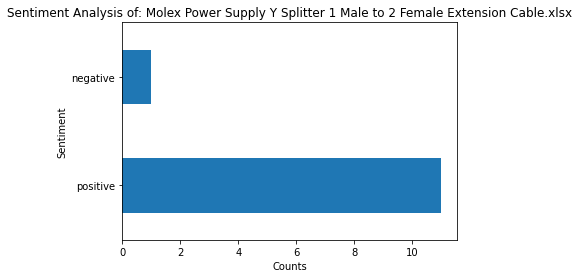

None

Positive Summary: 
।  প্রোডাক্ট ঠিক আছে।  অনেক ভালো ছিল।  ভালো।  অনেক সুন্দর প্রোডাক্ট কালার এবং দাম অনুযাযী পারফেক্ট যেমন দেখেছিলাম যেমন চেযেছি তেমন পেযেছি ফাইভ স্টার একটা রিভিউ এইজন্যই দিলাম সেলার ভালো এবং কুরিযার ভাইযার ব্যবহার অনেক ভালো ছিল আপনারা চাইলে নিতে পারেন।  এত কম দামেএত সুন্দর প্রোডাক্ট।  চেইন টা অনেক সুন্দর ছিলো।  চেইন টা খুলে গেছিলো তারার কিন্তু লাগিয়ে দিলে ঠিক ঠিক আরেকটু স্ট্রং হলে ভালো হতো ওভারওলল বাকি সব ওকে।  দেখতে অনেক সুন্দর আর কিউট লকেটটা

Negative Summary: 
।  একদম ভালো নাহ এমন করা কি ঠিক হলো আপনাদের ফালতু

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Moon star chain for fashionable girls.xlsx

positive_score is : 84.6
negative_score is : 15.4
neutral_score is : 0.0
Visual: 


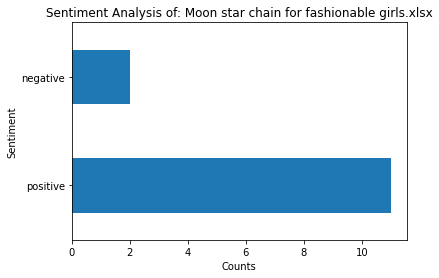

None

Positive Summary: 
।  খুব সুন্দর সার্ভিস।  চেইন টা ভাল হয়েচে।  ধন্যবাদ দারাজ।  অনেক সুন্দর।  মুটামুটি।  নেকলেসটা খুব সুন্দর

Negative Summary: 
।  বার বার ম্যাসেজ এ বলে দিলাম যেন গোল্ডেন পুথির সেট টা দেয় করে দেয় না গোল্ডেন সেট টাই করে দিলামতার পরেও সাদা পুথির সেট টা কেনো দেওয়া হোলোনিজের পছন্দে কিনতে পারবো না নাকি আপনাদের যেটা ইচ্ছা হবে সেটাই পাঠায় দিবেনএ জন্য দেন নি ম্যাসেজ এর সাদা পুথির মাঝে একটা গোল্ডেন পুথি দিয়ে সান্তনা আর কি এই সেট টাও সুন্দরকিন্তু আমার গোল্ডেন টা দরকার ছিল।  বাটপার এর দল ছবি দিসে কীআর পাঠাইছে কীবাটপার সেলার কেউ কিনবেন না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: New Indian Pearl Stone Choker Necklace & Earring with tikli set for women.xlsx

positive_score is : 94.3
negative_score is : 5.7
neutral_score is : 0.0
Visual: 


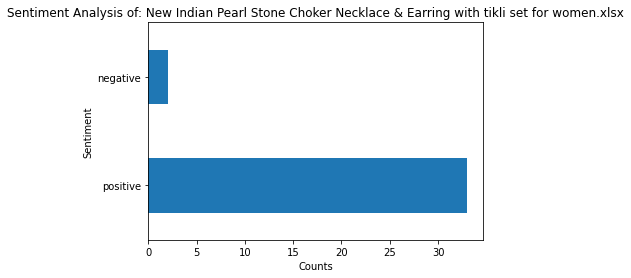

None

Positive Summary: 
।  দাম হিসেবে অনেক ভালো সেলার ভাইয়াটা আরো ভালোছিলো।  দাম অনুযায়ী প্রোডাক্ট ভালো।  অনেক সুন্দর ছিলো জিনিস গুলো।  অনেক সুন্দর হইছে।  ভালো আপনারা নিতে পারেন তবে দাম টা বেশি।  মাশাআল্লাহ অনেক সুন্দর সবাই নিতে পারেন।  অনেক অনেক ভালো ধন্যবাদ দারাজ।  সুন্দর সবাই চাইলে নিতে পারেন।  মাশাআল্লাহ খুব সুন্দর।  সুন্দর হয়েছে।  ভালো ছিল।  ভালো পড়ছে।  আলহামদুলিল্লাহ ভালো খুব সুন্দর হয়েছে জিনিসটা।  খুব সুন্দর।  সুন্দর

Negative Summary: 
।  ভালো কিন্তু রং উঠে যায়

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: New Korean trend fashion women's small daisy crystal bracelet (2).xlsx

positive_score is : 70.8
negative_score is : 25.0
neutral_score is : 4.2
Visual: 


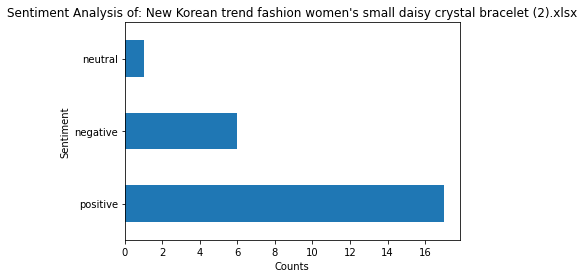

None

Positive Summary: 
।  ভালো।  মোটামুটি ভালো।  অনেক ভালো সবাই নিতে পারেন।  ক্যাবলটি ভালো পেয়েছি আলহামদুলিল্লাহ সমস্যা আছে ফাস্ট চার্জ হয়না

Negative Summary: 
।  এইটা খুব বাজে হলো চার্জে একবার লাগনোর সাথেই নষ্ট হয়ে গেছে।  ফালতু চার্জার পোর্ট নষ্ট হয়ে গেছে এই ক্যাবল দিয়া চাজ দিয়া।  একে বারে ফালতুচার্জ হতে অনেক সময় লাগে

Neutral Summary: 
।  ভালো জিনিস তবে কত দিন টিকবে এটাই দেখার বিষয়
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: New Style Magnetic Micro USB Cable 3A Fast Charging.xlsx

positive_score is : 90.9
negative_score is : 9.1
neutral_score is : 0.0
Visual: 


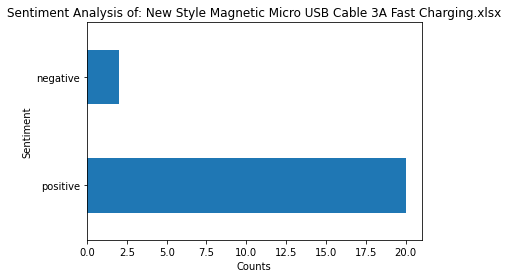

None

Positive Summary: 
।  আমার টা ভাল পরেছেনেয়া আপনার।  খুব ভালো জিনিস সবাই নিতে পারেন।  প্রোডাক্ট টা ভালো।  খুব ভালো প্রোডাক্ট।  মোটামুটি ভালোই।  আলহামদুলিল্লাহদাম অনুযায়ী অনেক সুন্দর একটি প্রোডাক্টপ্যাকেটিং কোয়ালিটি অনেক ভালো।  আলহামদুলিল্লাহ খুবই ভালো ছিলো সাজেস্ট করবো আপনারও কিনতে পারেন।  আলহামদুলিল্লাহ প্রোডাক্টটা ভালোইআপনারা চাইলে নিতে পারেন।  প্রডাক্ট টা ভালো হইছেদাম অনুসারে।  ব্রেসলেট এর ডিজাইন সুন্দর ছিলোকিন্তু একদম সিঙ্গেল

Negative Summary: 
।  নষ্টো পেয়েছি চাজ হয়না ডিলার পতারক।  সম্পূর্ণ বাজে একটা প্রোডাক্ট কারো না কেনাই ভালো

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: New Trendy 4pcs Set Rose Gold Plated Chain Bracelets for Women .xlsx

positive_score is : 94.1
negative_score is : 5.9
neutral_score is : 0.0
Visual: 


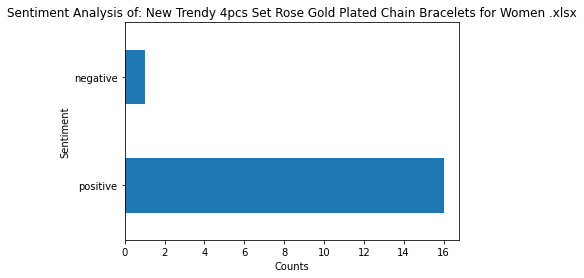

None

Positive Summary: 
।  প্রোডাক্ট ভালো।  মোটামুটি।  মোটামুটি ভালো দাম অনুযাযী প্রোডাক্ট এর মান মোটামুটি ঠিক আছে।  সেলারের ব্যবহার ভালো দুই দিনের ভিতরে হাতে পেলাম তিন টা ভালো পেয়েছি কিন্তু এক টা ভাঙা পেয়েছি।  খুবই ভালো একটা পন্য আপনারাও চাইলে নিতে পারেন।  প্রডাক্ট খুব একটা ভালো না মূল্য হিসেবে অতটা সন্তূষ্ট নাআর প্যাকেটিং ভালো ছিলো না।  আলহামদুলিল্লাহ প্রোডাক্টসের কোয়ালিটি ভালো ছিলপ্রথম দিনই ডেলিভারি পেয়েছিআমি দুই সেট অর্ডার করেছিলাম আপনারা চাইলে নিতে পারেন।  ধন্যবাদ দারাজ খুবই সুন্দর হযেছে

Negative Summary: 
।  সেলার ধোকাবাজি করেছে আমাদের সাথে একটা ব্রেসলেটে হুক এ দেয় নাই সেলার থেকে এটা আশাই করিনি চাইলে রিটার্ন দিতে পারতাম কিন্তু দিই নি

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: New Trendy 4Pcs Set Women Simple Design Gold Plated Chain Bracelet for Women (2).xlsx

positive_score is : 84.2
negative_score is : 11.6
neutral_score is : 4.2
Visual: 


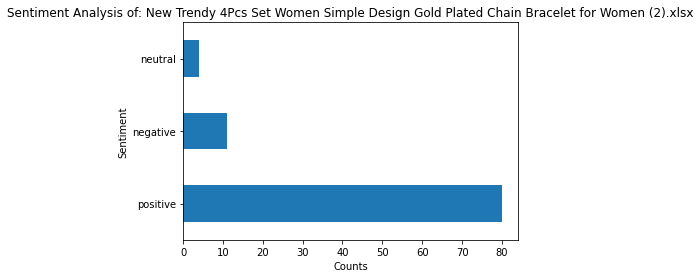

None

Positive Summary: 
।  দারুণ দেখতে প্রথম বার দিয়েছি অনেক ভালো ধন্যবাদ।  ভালো ছিলো।  দাম অনুযায়ী ভালো।  হাতে দেয়ার আগেই ভেঙে গেছে মোটামোটি ভালো।  খুবই ভালো প্রোডাক্ট সবাই নিতে পারেন।  ভালো যেমন দাম তেমন জিনিস।  অনেক ভালো প্রোডাক্ট।  অনেক ভালো।  আলহামদুলিল্লাহ ভালো সবাই নিতে পারেন কিন্তু রং টেকসই না।  এগুলো একটুও ভালো না যেটা আশা করেছি সেটা পাই নাই আমি।  পণ্য টা ভালো ছিল প্যাকেজিংও ভালো ছিল।  মোটামুটি ভালো দাম অনুযায়ী পণ্য ধন্যবাদ ধারাজ।  জিনিসটা ভালইসেলারকে অসংখ্য ধন্যবাদ।  খুব ভালো ছিলো যেমন চেয়েছি ঠিক তেমন পেয়েছি।  ভালো ছিলডেলিবারি মেনটা অনেক ভালো।  আলহামদুলিল্লাহ অনেক ভালো প্রোডাক্ট।  খুব ভালোআমার পছন্দ হইছে।  ডেলিভারী বয়টা সুন্দর আছে।  খুব ভালো।  ভালোইতবে বেশি ভালো না।  ভালোই পোর্ডাক্টি।  আলহামদুলিল্লাহ।  মোটামুটি ভালো।  একটুও ভাল না।  সুন্দর হয়েছে।  মোটামুটি।  খুবিই ভালো।  সুন্দর।  ভালোই।  বাজে।  ভালো তবে দামটা একটু বেশি।  প্যাকেজিং ভালো ছিলো আর জিনিসটা আসলেই অনেক সুন্দর ধন্যবাদ।  আলহামদুলিল্লাহ অনেক ভালো।  দাম হিসেবে ভালো ছিল

Negative Summary: 
।  খুবই বাজে একটা নিয়ে ভুল করে

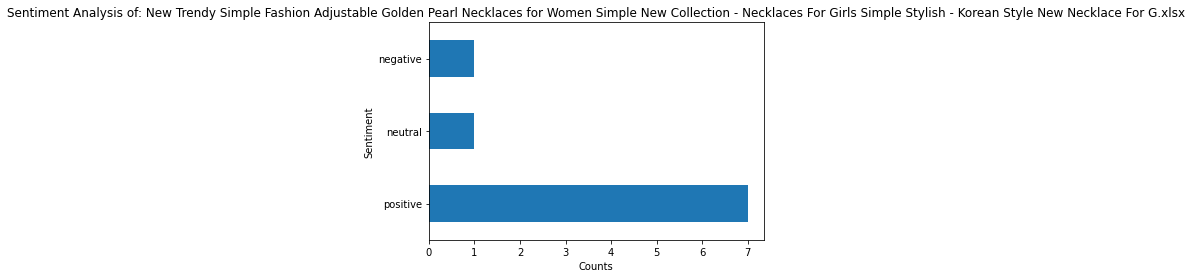

None

Positive Summary: 
।  অসাধারণ।  ভালোই।  সুন্দরভাবে প্যাক করে পাঠিয়েছে ধন্যবাদ সেলারকে।  অনেক সুন্দরখুব পছন্দ হয়েছে

Negative Summary: 
।  নিম্নমানের পড়া মাত্র ভেঙে পডে গিযেছে পুরাই ফালতু

Neutral Summary: 
।  জায়নামাজ যেই কালার চেয়েছি ওইটাই দিয়েছেদাম অনুযায়ী কোয়ালিটি একদম ঠিকঠাক আছেসেলারের ব্যাবহার অত্যন্ত ভালোঅন্য জিনিসগুলোও ভালো পেয়েছিআর স্পেশাল গিফট এর জন্য জাযাকাল্লাহ্শপ রেকমেন্ডেড
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Nose Pin For Woman adjustable Noth - 2 pcs.xlsx

positive_score is : 93.8
negative_score is : 6.2
neutral_score is : 0.0
Visual: 


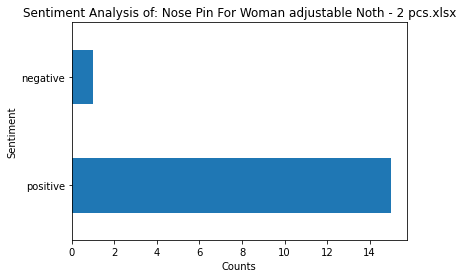

None

Positive Summary: 
।  অনেক সুন্দরযারা নেয়ার ইচ্ছে নিতে পারেন।  ১০টাকার দুইপিস নত দিয়া চিটারি করেন পালতো।  গিফট ও দিয়েছে সাথে খুব ভালো লেগেছে।  অস্থির একটা প্রডাক্ট।  অনেক সুন্দর।  অনেক ভালো।  ভালো না।  আমার কাছে খুব ভালো লেগেছে।  কি রে ভাইঅনেক অনেক সুন্দর সবাই নিতে পারেন ধন্যবাদ।  সুন্দর হয়েছে নাকফুল গুলো।  যেমনটা চেয়েছি তেমনটাই দিয়েছেধন্যবাদ সেলার এবং দারাজকে।  ছোট্ট একটা জিনিসের জন্য এতো বড় প্যাকেটপ্যাকেট খোলার পরে রিং গুলো খুঁজেই পাচ্ছিনাম নাধন্যবাদ দারাজ এবং ধন্যবাদ সেলার

Negative Summary: 
।  খুব বাজে আর জঘন্য প্রোডাক্ট বাটপারি একটা লিমিট থাকে পাঁচ টা নিয়েছি বাকা হয়ে গেছে একটা ঝালমুড়ি প্যাকেটে করে দিয়েছি

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Nose Ring Nose Pin Lip Ring Earring Jewelry 8mm.xlsx

positive_score is : 94.1
negative_score is : 5.9
neutral_score is : 0.0
Visual: 


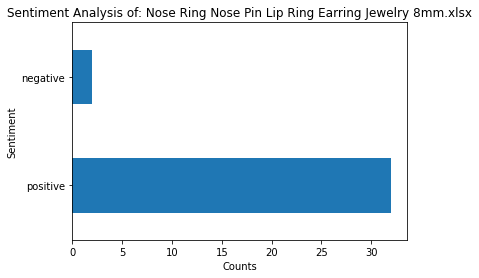

None

Positive Summary: 
।  নথ ঠিক সময়ে পেয়েছি কিন্তু নথ হিসেবে টাকাটা বেশি নিছে।  আলহামদুলিল্লাহ যেমন টা চেয়েছি তেমন টাই পেয়েছি।  সেম প্রোডাক্ট খুব ভালোবিশ্বাসযোগ্য।  ভালো ছিল সেম টাই দিছে।  অনেক ভালো হয়েছে।  সুবই সুন্দর।  অনেক ভালো।  আলহামদুলিল্লাহ অনেক অনেক ভালো ও সুন্দর প্রডাক্ট যেমনটি চেয়ে ছিলাম ঠিক তেমনি দিয়েছে লাগলে আবার নিবো সবাই কিনতে পারেন ধন্যবাদ দারাজ ও সেলারকে।  ভালো আছে কাজ করেকিন্তু ডেলিভারি চার্জ না নিলে ভালো হত।  দাম বেশি সুন্দর কাজ করতেছি আপনারা চাইলে নিতে পারেন ধন্যবাদ।  খুবই ভালো ইউজ করতেছি।  দাম অনুযায মোটামুটি।  খুব ভালো জিনিস।  এটা খুবই ভালো একটা প্রোডাক্ট দারাজ থেকে যাকে দিলাম সে অনেক খুশি।  আপনারা এটা নিতে পারেন খুব ভালো জিনিস এই প্রডাক্ট আমার এক বন্ধু নিযেছে সে খুব খুশি।  যেমনটি চেয়েছি তেমনটি পেয়েছি খুব সুন্দর ধন্যবাদ দারাজকেডেলিভারি ম্যান ভাইয়ের ব্যাবহার খুব ভালো ছিল।  ধন্যবাদ দারাজকে যেমনটা চেয়েছি তেমন টা পেয়েছি।  আলহামদুলিল্লাহ খুব ভালো লাগলো ধন্যবাদ কিন্তু প্যাকেজিং আরো ভালো করতে হবে।  আমার এক বন্ধু এই প্রোডাক্টটা নিযেছে সে খুব খুশি ধন্যবাদ দারাজ

Negative

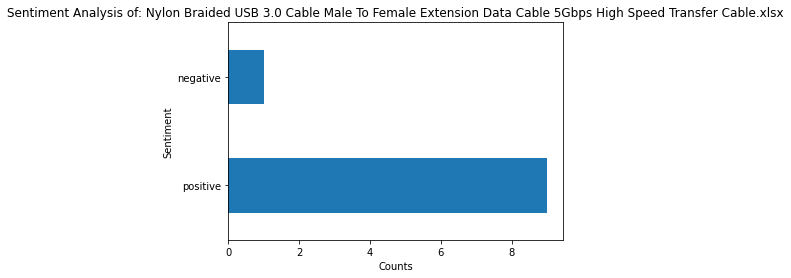

None

Positive Summary: 
।  জিনিস টা অনেক সুন্দর যাকে গিফট করা হয়েছে অনেক খুশি হয়েছে কম বাজেটে ভালো একটা উপহার।  আলহামদুলিল্লাহ অনেক ভালো একটা প্রডাক্ট পাইছি দারাজের সকলকে অসংখ্য ধন্যবাদ।  ব্রেসলেটটা ভালো কিন্তু পুঁতিগুলো ছবির তুলনায় অনেক ছোট।  ভালো ছিলো যেমন চাইছি তেমন ই পাইছি।  ভালোই পাইছি স্টোন থাকলেই ভালো।  ভালো নিতে পারেন

Negative Summary: 
।  খুবই হতাশ হলাম নিম্ন মানের এলাকার দোকানে ষাট টাকা দাম

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Ocean Color Girl Crystal Bracelet Female Ornaments Lady Valentine Day girlfriends Birthday Gift.xlsx

positive_score is : 94.1
negative_score is : 5.9
neutral_score is : 0.0
Visual: 


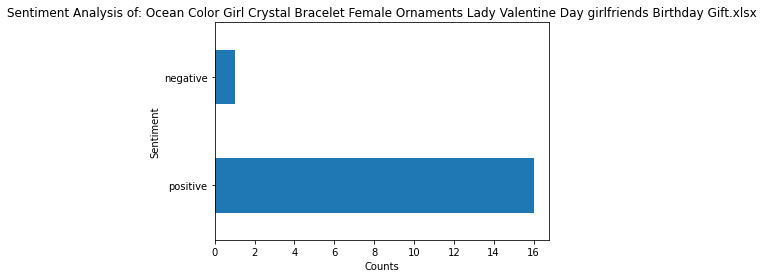

None

Positive Summary: 
।  ভালো ছিল ব্রেসলেট।  ষাটপাঁচ ওযাটের সুপার ডার্ট ফাস্ট চার্জিং হয এক মিটার বা একশ সেন্টিমিটার লম্বাধন্যবাদ দারাজ অ্যান্ড সেলার।  ক্যাবল টা ভাল ছিল ভালো চার্জ হয়প্যাকেজিং অনেক ভালো ছিল ধন্যবাদ সেলারকে।  অনেক ভালো প্রডাক্টেই দ্রত চার্জ হয় টাইপ সি কেবল অনেক সন্দর এ দামে খুব ভালো প্রডাক্ট।  ফাস্ট চার্জ হয ধন্যবাদ সেলার কে।  প্রথম এক ঘন্টা ব্যবহার করার পর রিভিউ দিচ্ছিআলহামদুলিল্লাহ দাম অনুযায়ী খুব ভালো প্রোডাক্ট মনে হচ্ছে এবং চার্জ ও ফাস্ট লেগেছে।  কোয়ালিটি বেশ ভালই মনে হচ্ছে।  হে ভাই পাইছি ভালো।  খুবই সুন্দর ভাল কাজ করেএভারেজ ট্রান্সফার স্পিড দশছয় এমবি ষাটচার জিবি পেনড্রাইভমেমরি কার্ড সাপোর্ট করেছেধন্যবাদ সেলার ধন্যবাদ দারাজ।  সুন্দর প্রডাক্ট যে কেউ নিতে পারেন দাম অনুযায়ী খুবই ভালো

Negative Summary: 
।  কোন কাজ করে না একেবারে ফালতু কোন রেটিং দিলাম না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: OnePlus Super Fast USB Type C Cable.xlsx

posit

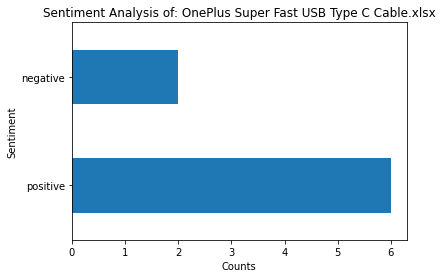

None

Positive Summary: 
।  মোটামুটি ভালোই ছিলো টাসেলার ও ভালো ছিলো তসঙ্গে ডেলিভারি ম্যান ও ভালো ছিলো।  আলহামদুলিল্লাহ অনেক ভালো পন্যসবাই নিতে পারেন।  মিথ্যা বলব না ভালো।  ভালো ছিল।  প্রোডাক্টটি অরিজিনাল পেয়েছিখুবই ভালো মানেরআর খুব দ্রুত পেয়েছি তাই ধন্যবাদ সেলারকে এবং দারাজকে

Negative Summary: 
।  কাজ করে না আমার ফোনে করে কিন্তু এটা নষ্ট।  ভালো গরম হয না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: OnePlus Type C - OTG Cable Adapter For One plus - Red and White.xlsx

positive_score is : 89.5
negative_score is : 10.5
neutral_score is : 0.0
Visual: 


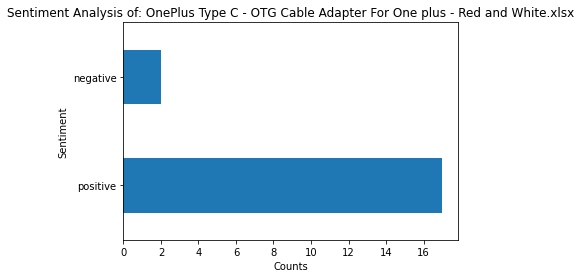

None

Positive Summary: 
।  ম্যাগনেটিক পিনগুলো অনেক ভালো আপনারা নিতে পারেন আমি দুটো নিযেছি এই দামে ভালো একটা জিনিস পেযেছি ধন্যবাদ দারাজকে এবং সেলার কে সঠিক সমযে পণ্য দেওযার জন্য।  ভালোই পেযেছি তবে দামটা একটু বেশি মনে হচ্ছে।  দুই টি অর্ডার করেছিলামভালোইকিন্তু প্রোডাক্ট হাতে পেতে সাত দিন সময় লেগেছে।  পণ্য গুলো ভালো মানের চাইলে যে কেউ নিতে পারেন কোন সমষ্যা নেই।  খুব ভালো লাগেছে আমার

Negative Summary: 
।  উনারা বললেন ছাড়া সব ফোনে সাপোর্ট করবে অথচ ফোনে সাপোর্ট করলো না এভাবে মিথ্যা তথ্য দিয়ে প্রতারণা করার জবাব বিচারের ময়দানে দিয়েন।  একদম বাজে একটা প্রডাক্ট কিছুদিন আগে একটা কিনলাম সেটা ভাংগা ছিলো আবার আজ কিনলাম সেটা চারজ উঠে না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: OnePlus Type-C To 3.5mm Audio Adapter Dongle.xlsx

positive_score is : 75.0
negative_score is : 25.0
neutral_score is : 0.0
Visual: 


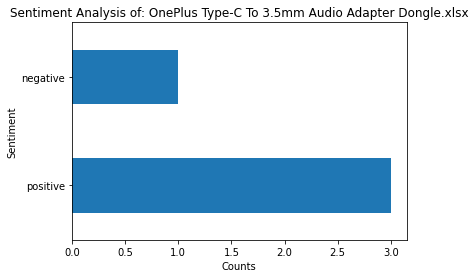

None

Positive Summary: 
।  বিকাশের দশ ক্যাশব্যাকে দুই পিছ ষাটতিন টাকায় কেনা পন্যটি ভালো মানের ঠিক আছে

Negative Summary: 
।  একদম ফালতু ভালো মনে করে পাঁচ টা অর্ডার করছিলাম একটাও ঠিক মতো কাজ করে না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Only Magnetic Charging Pin ( Micro Usb ).xlsx

positive_score is : 95.2
negative_score is : 4.8
neutral_score is : 0.0
Visual: 


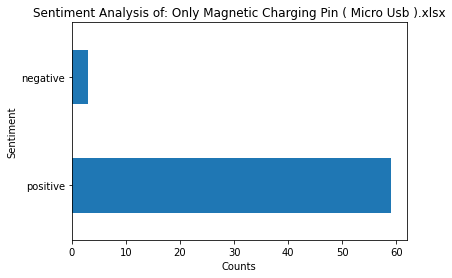

None

Positive Summary: 
।  ভালো প্রডাক্ট সেলার খুব দ্রুত ডেলিভারি দিয়েছে সবাই নিতে পারেন।  দ্রুত ডেলিভারি পেযেছি এবং পণ্য ভালো ছিল বিক্রেতাকে ধন্যবাদ।  দ্রুত ডেলিভারি দিয়েছে প্যাকেজিং ভালো ছিল ধন্যবাদ।  ম্যাগনেট গুলা খুব ভালো আমি দুইটা নিযে এসেছি।  প্রোডাক্ট টা ভালো তবে দামটা একটু বেশি।  খুবই ভালো ছিলো ধন্যবাদ সেলার ও দারাজ।  ভালো প্রোডাক্ট দাম অনুযাযী সেরা।  বেশিদিন ভালো ছিলনা প্রোডাক্টটি।  প্রোডাক্ট ভালো ছিলো ধন্যবাদ।  ভালো কিন্তু দাম টা একটু বেশি।  ভালো আপনারা নিতে পারেন।  মোটামুটি ভালো।  খুব ভালো।  ভালোই।  ভাল।  অনেক ভালো একটি পন্য আলহামদুলিল্লাহ্ আমি সন্তুষ্ট আপনারা ও নিতে পারেন।  দারুন একটা জিনিস কোযালিটি অনেক ভালো তুলনামূলক দাম অনেক কম ধন্যবাদ দারাজকে।  ভালো প্রোডাক্ট দেওযার জন্য সেলার এবং দারাজ কে ধন্যবাদ।  দাম অনুসারে মালটা অনেক ভালো।  অনেক ভালো একটা জিনিস আপনারা চাইলে নিতে পারেন।  খুবই ভালো একটা কেবল আমি ব্যবহার করার পরে রিভিউ দিচ্ছি।  আলহামদুলিল্লাহ পণ্য ভালো মানের সবাই নিতে পারেন।  খুবই ভালো প্রোডাক্ট ছবিতে যেমন ছিল তেমনই পেযেছি

Negative Summary: 
।  পাঁচ টার মধ্যে দুই টা

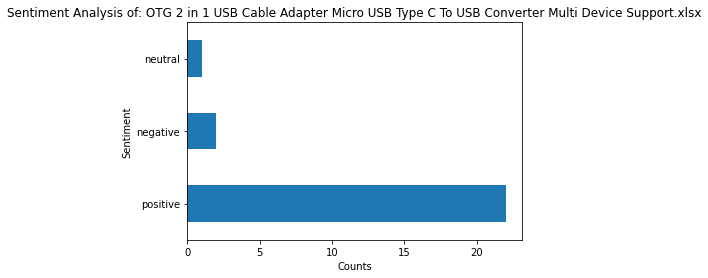

None

Positive Summary: 
।  খুব ভালো এক টা প্রডাক্ট।  অনেক ভালো পেয়েছি।  খুব ভালো।  ভালো।  আলহামদুলিল্লাহ ভালো পেয়েছি এবার।  ঘডিটা অনেক ভালো চার্জ থাকে সাত দিনের মত ঘডির বেল কোযালিটি অনেক ভাল।  ভালো পন্য চাইলে নিতে পারেন তবে হাটার স্টেপ গুলো একটু দেরি করে সো করে।  ধন্যবাদ দারাজ কে অনেক সুন্দর এবং ভালো মানের ঘডি দেওযার জন্য।  এক কথায় অসাধারন সবাই নিতে পারেন খুবই ভালো সার্ভিস দশ এ দশ

Negative Summary: 
।  একবারে ফালতু

Neutral Summary: 
।  ভালো যাচ্ছে আমি ঘড়িটা পাওয়ার দশপাঁচ দিন পরে রিভিউ দিচ্ছি মুটামুটি ঠিকঠাক শুধু এটার সেনসর টা একটু স্লো তবে সমস্যা হলো এটার বেল্ট পাবো নি না এটা নিয়ে কনফিউজড কারন দারাজ এই ব্রান্ডের ঘড়ির বেল্ট সেল করে না এভারেজে ভাল বলা যায়
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: OTG Type C Female To USB A Male Adapter Fast Charging For Iphone 13 12 Airpods Ipad Samsung S21 USB-C Cable Data Converter Tipo.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_scor

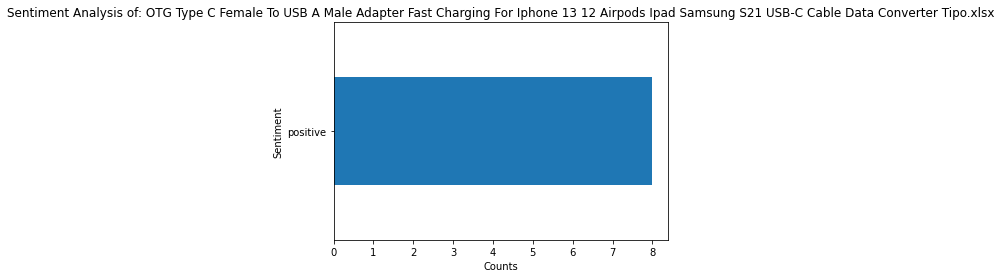

None

Positive Summary: 
।  আলহামদুলিল্লাহ অনেক অপেক্ষার প্রহর শেষ করে গতকালকে আমার প্রোডাক্ট হাতে পেযেছিখুবই ভালো লাগছে দারাজ কে অনেক ধন্যবাদ।  আলহামদুলিল্লাহ অনেক সুন্দর এক হাজার নয়শ বিশ দিন পর হাতে পেলাম সরাসরি চায়না থেকে আসছে সেলারের ব্যবহারও ভালো নিতে পারেন।  ঘডির কোযালিটি মোটামোটি ভাল আমার কাছে মনে হয সপ কিছু ঠিক আছে।  আনেক সুন্দর এই ঘড়ি এই ঘড়ি দিয়ে অনেক কিছু করা যায়।  আমার কেমন জানি মনে হচ্ছে এটা আগে কেউ ব্যাবহার করছে।  পাঁচ মাস পরে রিভিউ দিলাম আলহামদুলিল্লাহ অনেক ভালো।  টা দাম হিসাবে বেশ ভালোই।  ঘডি চলে না

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Outtobe Smart Watch Activity Heart Rate Bl ood Pressure Monitor Men Women Full Touch Screen.xlsx

positive_score is : 79.5
negative_score is : 15.4
neutral_score is : 5.1
Visual: 


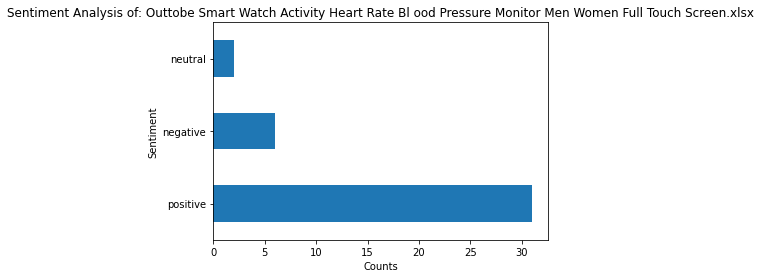

None

Positive Summary: 
।  আলহামদুলিল্লাহ যেভাবে চেয়েছিলেন সেভাবেই হইছেহাতে পেতে একটু সময় লাগছে ঘরির সবকিছু খুব ভালোব্যাটারিটায় ও ভালো চার্জ থাকেসবাই নিতে পারেন।  খুব ভালোচার্জ খুব ভালো টিকে নিতে চাইলে নিতে পারেন ধন্যবাদ সেলার ভাইকে।  অনেক সুন্দর প্যাকিংটাও ভালো ছিলোরিকমেন্ড সেলার।  ঘড়িটি আমার অনেক পছন্দ হইছে ধন্যবাদ সেলার।  ভালো ছিলধন্যবাদ।  খুব সুন্দর দিযেছে নথটা।  নোজপিন টা সুন্দর একদম ছবির মতো টাকা অনুযায়ী বেস্ট প্রোডাক্ট ধন্যবাদ সেলার কে।  নাকফুল টা অনেক ভালো ছিল কিন্তু একটু বড এত বড ভাবিনি।  যেরকম চেযেছিলাম সেরকম পেযেছি খুব সুন্দর।  অনেক ভালো।  অনেক সুন্দর

Negative Summary: 
।  ছবির সাথে এর অনেক অনেক পার্থক্য যা হাতে না পেলে বোঝা যায় না এটা একটা কপি যা মনে হযেছিল তা নয়।  দেখে ১৮০০- করলাম নামের কোন বালায় নাই কি ব্রান্ড বুঝার উপায় নাই একটা খেলনা ঘড়ি যা গুলিস্থানের ফুতপাতের ঘড়ি অমানুষের দল।  দারাজ একটা বাটপারের কারখানাঅর্ডার করেছি অটোবির একটি স্মার্ট ঘডিডেলিভারি দিযেছে লোকাল একটা ঘডি।  ঘড়িটি ভালোই ছিল এক মাস পর আজকে হঠা করে ঘড়িটি অন হচ্ছে না কি করবো বুঝতে পারছি না।  আমি কিনে ঠকেছি

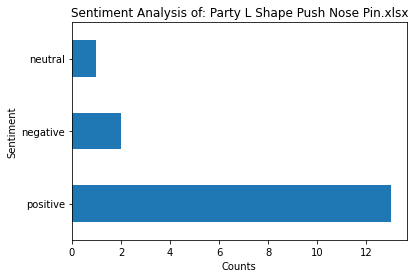

None

Positive Summary: 
।  আলহামদুলিল্লাহ প্রথমবার দারাজ থেকে শপিং করছিসবকিছুই ঠিকঠাক ছিলোধন্যবাদ বিক্রেতাকেসময় মতই জিনিস হাতে পেছিনেকলেসটা অনেক ভালো লাগছে আমার।  ঠিকঠাকই ছিল চেইনটা আরেকটু বড় হওয়া উচিত ছিলতাহলে একদম ঠিকঠাক হতোযাইহোক জিনিস ভালো ছিলধন্যবাদ সেলার।  খুব সুন্দর ছিলো খুব ভালো লেগেছে আমার।  চেইনটি দেখতে ভালো প্যাকেটিং সুন্দর।  খুবই সুন্দর অসাধারণ লেগেছে প্যাকেটিং ভালো ছিলধন্যবাদ সেলার কে।  অসংখ্য ধন্যবাদ খুব সুন্দর ডেলিভারি ম্যান এর ব্যবহার ভালো

Negative Summary: 
।  ফালতু চেইন১মাসের ভিতরেই কালো হয়ে গেছেআর চেইনটা মারাত্মক ছোট।  জিনিস ডেলিভারি না দিযে রিভিয চায দারাজএকটা বাটপার

Neutral Summary: 
।  প্যাকেজ দেখে তো ভাবছিলাম ভিতরে মনে হয় কিছু নেই পরে ঠিকই পেয়েছি দাম হিসাবে পন্যের মান আরেকটু ভালো হতে পারত
-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Pearl Necklace for Women.xlsx

positive_score is : 91.7
negative_score is : 7.3
neutral_score is : 1.0
Visual: 


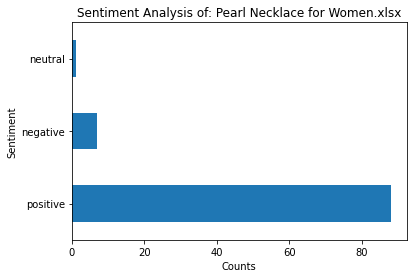

None

Positive Summary: 
।  খুব ভালো প্রোডাক্ট আপনারা নিতে পারেনছবির মতো সেইম একদম।  জিনিসটা সুন্দর যেমন দেখেছি তেমনই।  আলহামদুলিল্লাহ ভালোধন্যবাদদারাজকে।  ভালো দেখে মনে হয কমদামি।  অনেক সুন্দর হোয়েছে।  অনেক অনেক সুন্দর।  অসম্ভব সুন্দর ছিল।  মোটামুটি ভালোই।  ধন্যবাদ।  নেকলেসটি অনেক সুন্দর কিন্তু অনেক ছোট আমার ভালো লেগেছে ধন্যবাদ সেলারকে।  খুব সুন্দর ভালো তুলতে পারিনি এ।  নেকলেসটা অসম্ভব সুন্দর ছিলো।  সেটটি সুন্দরকিন্তু চেইনটা একেবারেই নিম্নমানের।  ভালো প্রোডাক্ট দেযার জন্য ধন্যবাদ চেলারকে।  ভালো ছিলো আপনারা ও নিতে পারেন।  মোটামুটি ভালোধন্যবাদ।  ভালোচিলোকিনতেপারেন।  নেকলেস টা অনেক সুন্দর।  ভালো পণ্য পেয়েছি।  অনেক সুন্দর।  অনেক সুন্দর।  ভালোই ছিলো।  মোটামুটি।  ভাল ছিলো।  ভালো ছিল।  ভালো।  অনেক সুন্দর।  খুবই সুন্দর ছিল।  সুন্দর প্রোডাক্ট।  ভালো

Negative Summary: 
।  ফাইজলামি যেটা অর্ডার দিছি সেটা দেন নাই।  অনেক ভাল আমার খুব লাইক হয়েছে।  তেরে মিনিটের মধ্যে কালো হয়ে গেছে এই রকম প্রোডাক্ট বিক্রি করে নিজেদের মান সম্মান নষ্ট করার কি দরকার।  ভালোই লেগেছে কিন্তুু দুই দিন ব্যবহার এর পর কালার নষ্

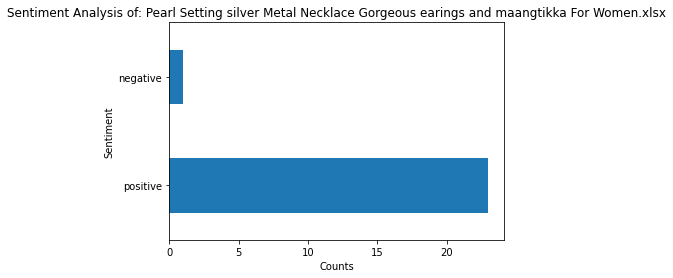

None

Positive Summary: 
।  খুবই ভালো জিনিস সুন্দর ভাবে পেইন্ড্রাইভ সাপোর্ট করে মোবাইলেধন্যবাদ সেলার এবং দারাজকে।  অনেক সুন্দর একটা জিনিস এবং কাজের অনেক ভালোভাবে কাজ করছে আর সেলার ভাইকে ধন্যবাদ তার এতো সুন্দর ব্যবহারের জন্য।  আজ পার্সেল টা হতে পেলাম ব্যাবহার করে দেখলাম সব কিছু ঠিকঠাক আছে ধন্যবাদ সেলার কে খুব ভালোভাবে করে প্যাকিং করে পাঠিযেছে।  দাম অনুসারে পণ্যটি অনেক ভালো।  বেশি কিছু বলার নাই দাম অনুযায়ী ভালো একটি আপনারা চায়লে নিতে পারেন ধন্যবাদ এবং কে।  আলহামদুলিল্লাহ প্রোডাক্টটি অনেক ভাল ছিলকোন বাজেট অনুযাযী অনেক ভালো।  এটা খারাপ না আপনাদের ভালো লাগলে কিনতে পারেন দামে কম মান ভালো।  ভালো প্রোডাক্ট দেওযার জন্য সেলার এবং দারাজকে ধন্যবাদ।  ভাল যেটা দরকার ছিল তা পেয়েছি ধন্যবাদ।  ভালো লেগেছে।  আলহামদুলিল্লাহ অনেক ভালো সবাই নিতে পারেন অনেক ধন্যবাদ সেলার ও দারাজ কে।  অনেক ভাল একটা ধন্যবাদ সেলার ও দারাজকে।  ভালো লেগেছে দেখি কতোদিন টিকে।  ভালো না কোনো কাজ হচ্ছে না

Negative Summary: 
।  নষ্ট জিনিস দিছে কাজ করছে না চেক করে দেযা উচিত ছিলহালায প্রতরক

Neutral Summary: 
Not found

----------------

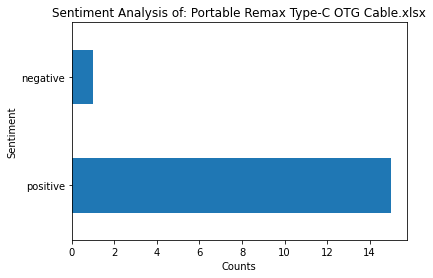

None

Positive Summary: 
।  মোটামুটি ভালো কাজ করছে।  ভালো ছিল।  রিম্যাক্স এর প্রোডাক্ট সবসমযই ভালো তার খুব লম্বা এবং বিল্ড কোযালিটি খুবই ভালো বাজেট অনুযাযী চমকার একটি প্রোডাক্ট।  প্রোডাক্ট ভালোই ছিল কিন্তু ফাস্ট চার্জিং কাজ করে না এমনিতে সবগুলো কানেকশন ঠিক আছে।  আলহামদুলিল্লাহ ভালো পণ্য।  ইউএসবি লেখা থাকলেও ইউএসবি পায না শুধু চার্জ হয তাও আবার অনেক স্লো চার্জিং সবমিলিযে আমি মনে করি না নেওযাটাই বেটার।  খুব বেশী ভালো না ব্যবহারের দশ দিনের মধ্যেই এন্ড্রয়েড পোর্ট অকার্যকর হয়ে গেছে।  জিনিসটা আমার পছন্দ হযেছে এবং যতটুকু ব্যবহার করছি মানসম্পন্ন মনে হয

Negative Summary: 
।  ক্যাবলটি প্রায এক মাস আগে কিনেছিলামএতদিন ব্যবহার করে এখন রিভিউ দিচ্ছিশুরুতে ক্যাবলটি দিযে খুব ফাস্ট চার্জ হলেও এখন এতটা ফাস্ট চার্জ হযনাযদিও আমি এরকমটি আশা করিনিসেলারকে আমার অনুরোধ যে আরেকটু উন্নত করলে ভালো হযতাহলে পরবর্তীতে আরেকটি ক্যাবল কিনার চিন্তা-ভাবনা করা যাবে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Prod

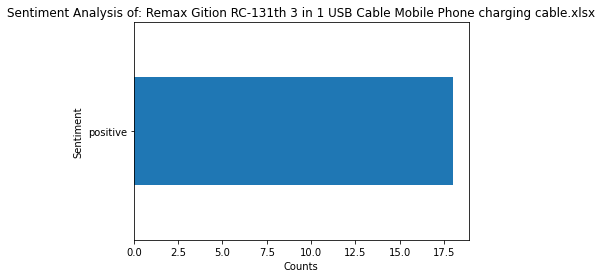

None

Positive Summary: 
।  ভাল প্রোডাক্টমাত্র হাতে পেলাম।  খুব ভালো প্রোডাক্ট।  ভাল প্রডাক্ট।  প্রটাক্ট খুব ভালো চার্জ ও ভালো থাকে।  হাতে পেয়েছি ধন্যবাদ দারাজ।  এক কথায় অসাধারণখুবই ভাল টি।  এই পণ্যটা অনেক ভালো হইছেআমার মোবাইলে অনেক তারাতাড়ি চার্জ হয়আপনারা চাইলে কিনতে পারেন।  ভালো ক্যাবল সবাই কিনতে পারেন ধন্যবাদ সেলারকে।  সবই ভালো ছিল কিন্তু গ্রে কালার চেযেছিলাম কিন্ত আমাকে কালো টা দেওয়া হয়েছে তাই চার স্টার দিলাম

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: REMAX Leader 2 USB Output 30000mAh Multiple Input PowerBank RPP-141 With Digital Display.xlsx

positive_score is : 80.0
negative_score is : 20.0
neutral_score is : 0.0
Visual: 


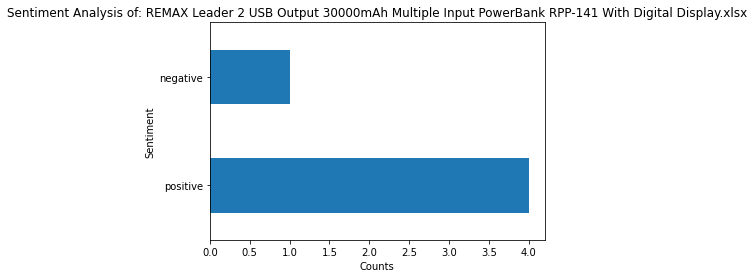

None

Positive Summary: 
।  ভাল প্রোডাক্ট।  ভাল ওরিজিনাল

Negative Summary: 
।  সেলারের ব্যবহার অনেক ভালো হয়তো ভুল করে - এর জায়গায় আইফোনের ক্যাবল চলে আসছে বক্স ওপেন করার পর প্রথমে অনেক রাগ লাগছিলো ভাবছিলাম ওয়ান রিভিউ দিবো কিন্তু সেলারের ব্যবহার অমায়িক তাই সেটা বিবেচনা করে টু দিলাম

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Remax RC 129m Micro USB Fast Cable  Fast Charging Data Cable - Black  Grey  White.xlsx

positive_score is : 77.8
negative_score is : 22.2
neutral_score is : 0.0
Visual: 


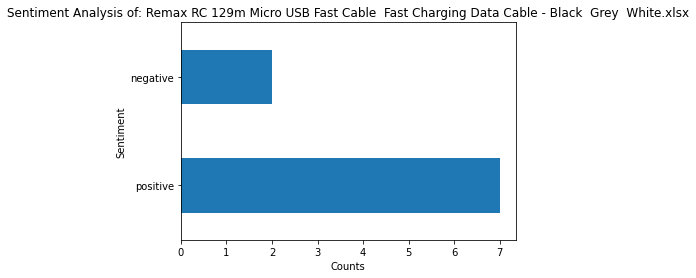

None

Positive Summary: 
।  মাত্র পঞ্চাশপাঁচ টাকায় একটা ব্রান্ডের ইউএসবি ক্যাবল ভাবা যায়সবই দারাজ বলে সম্ভব।  এই নিয়ে ৪বার কিনলাম এই দামে খুবই ভালো প্রোডাক্ট মোটামুটি ভালোই ফাস্ট চার্জ হয় আমার ফ্যামিলি এর সবাই ইউজ করছে নিশ্চিন্তে নিতে পারেন।  খুবই ভালো প্রোডাক্ট কযেক মাস ধরে ব্যবহার করছি আলহামদুলিল্লাহ আমি সন্তুষ্ট ভালোই ফাস্ট চার্জ হয টোটালি রিকমান্ডেড

Negative Summary: 
।  লিখা থাকলেও চার্জ করে দেখলাম মোবাইলে হয়না নরমাল ক্যবল দিয়ে যেমন চার্জ হয় এটা দিয়েও এমনি হয় এর কথা চিন্তা করে নিলে না নেয়ায় ভাল হবে।  সবার ভালো রিভিউ দেখে নিলাম কিন্তু যতটা আশা করিছিলাম দাম অনুযায়ী ততটা নয় মোটামুটি মানের আর এটা অরিজিনিয়াল ও মনে হলো না চাজিং এ মাঝে মাঝে সম্যসা হয়

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Remax RC-129m Micro USB Fast Charging and Data Transfer Cable 2.4A (1Meter) Data Cable.xlsx

positive_score is : 76.5
negative_score is : 17.6
neutral_score is : 5.9
Visual:

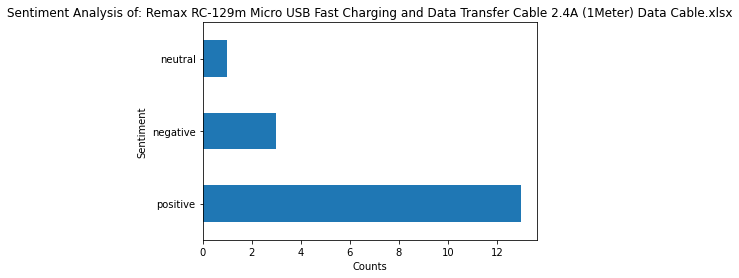

None

Positive Summary: 
।  ভালো ক্যাবল দুইপ্রান্ত গুলোই ব্রান্ডিং করা প্যাকেজিং ও ভালো ছিলোশুধু ফাস্ট চার্জিং চেক করা হয়নি।  তাদের দেওয়া ডাটা কেবল প্রথম দিকে ভালো থাকলেও কিছুদিন পরে খুবই স্লো সতেরপাঁচ চার্জের পর আর চার্জ হচ্ছে না তাদের মেসেজ করলে তারা কেনো কথা বলে না।  আমি বলব এই কেবল দোকানে কিনতে গেলে অনেক দাম রাখে এর থেকে ভালো আপনার দারাজ এ আডার দেন এবং আমার কাছে খুব ভালো লাগছে ফাস্ট চার্জিং কম দামে।  টাইপ বি এর জন্য বেস্ট এটা এক হাজার একশ দশএক ক্যাম্পেইনে পেয়েছি মাত্র একশ নয় টাকায় সাথে বিকাশে বিশ ক্যাশব্যাক মিরপুর দশ এর হাবের কালেকশন পয়েন্ট থেকে নেয়ার কারণে ডেলিভারি ফি লাগেনি যদিও পরে রিভিউ দিতে গিয়ে দেখি একশ নয় পাশে পঞ্চাশনয় টাকা অফারের ট্যাগ কিন্তু কিভাবে কেনা যাবে খুজে পেলাম না ট্রিকস চার্জার ভালো ফাস্ট চার্জ হয় আর স্বাভাবিকের তুলনায় সামান্য লম্বা আর বিল্ড কোয়ালিটি রাবারের হওয়াই জট পাকারও কোন সুযোগ নেই।  অবশেষে সে চার্জার তার দ্বিতীয জীবন সঙ্গিনী ডাটা কেবল কে ফিরে পেযেছে সেম জিনিস দ্বিতীয বার নিলাম মনে হচ্ছে এবারের বিল্ড কোযালিটি আগের টার চেযে ভালো ধন্যবাদ সেলারকে বাকিটা ব্যাবহা

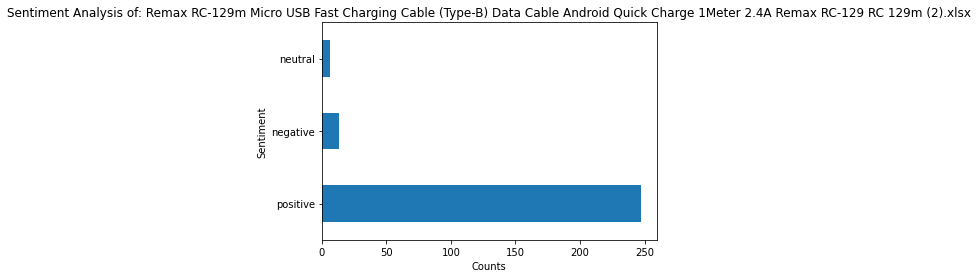

None

Positive Summary: 
।  কেবল টা অনেক ভালো অনেক তাডাতাডি চার্জ হয আপনারা চাইলে নিতে পারেনধন্যবাদ সেলার।  কেবলটি অনেক ভালো দ্রুত চার্জ হয রিকমেন্ডেড।  বউযের জন্য কিনছি বউ বলছে চার্জ ভালো হয।  ভালো মানের কেবল চইলে নিতে পারেন।  অরিজিনাল এবং ভালো একটি প্রডাক্ট।  এক্সিলেন্ট প্রডাক্ট।  খুবই ভালো প্রডাক্ট।  ১০০১০০খুব খুব খুব ভালো৬ দেওয়ার যোগ্য পন্য।  ভালো ছিলো যা চেয়েছিলাম তাই পেলাম ধন্যবাদ।  ভালো ছিলো সবাই নিতে পারেন।  ভালো পন্য।  ভালো পারপারস স্যাটিসফাই।  কোয়ালিটি ভালো।  এই দামে ভালো ক্যাবল।  ধন্যবাদ দারাজ।  প্রোডাক্টটি যথেষ্ট ভালো চার্জিং এর স্পিড খুব দ্রুত সেলার এন্ড দারাজ।  খুবই ভালো।  খুবই ভালো ফাস্ট চার্জ হচ্ছে।  অর্জিনাল প্রোডাক্ট চার্জও হয় খুব ভালো ধন্যবাদ দারাজকে।  আলহামদুলিল্লাহ প্রোডাক্ট টি ভালো কিনতে পারেন।  দাম হিসেবে ভালোই।  অনেক ভালো একটা প্রোডাক্ট হাইলি রিকমেন্ডেড সেলার অনেক সুন্দর করে প্যাকিং করেছেন।  দাম অনুযায়ী খুব ভালো একটি ক্যাবল চার্জ ও খুব দ্রুত হয়।  ভালো প্রোডাক্ট অনেক দিন ধরে ব্যাবহার করছিধন্যবাদ।  একসাথে দুইটা প্রডাক্ট নিযেছি ভালো হযেছে দুইটাই।  আলহামদুলিল্লাহখুব

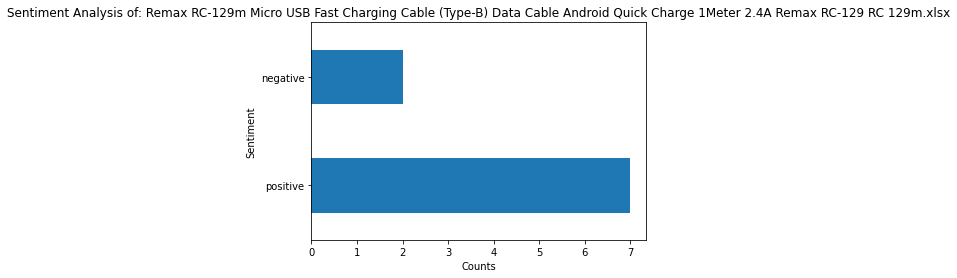

None

Positive Summary: 
।  এককথায় অসাধারণ খুব দ্রুত ডেলিভারি পেয়েছি।  ওভার অল ভালোই লাগছে যেটা চেয়েছি সেটাই পাইছি কেউ কিনতে চাইলে কিনতে পারেন।  অসাধারণ একটা প্রোডাক্ট একদম অরিজিনাল ব্যাবহার ও ভালো ছিলো ভাইযাটার।  আপাতত হাতে পাওযার পর ভালোই মনে হচ্ছে কেউ নিতে চাইলে নিতে পারেন রাইডারের ব্যবহার ইত্যাদি সবকিছু মিলিযে ভালো লাগছে।  ইয়ারফোন টা হাতে পেয়েছি আজ বরাবরের মত এর ইয়ারফোন দারুন সার্ভিস দিচ্ছে প্রোডাক্ট টা ভালো দিয়েছে কিন্তু প্যাকেজিং এর ব্যাপারে উদাসীন ছিল টিন এর বক্স টা টেপা খেয়ে গেছে এসব সেনসেটিভ আইটেম এ দেয়া উচিত যেটি সেলার দেয়নি

Negative Summary: 
।  আমি গত এক বছর যাব ত রিমিক্স পাঁচশ দশ হেডফোনটি ব্যবহার করছি ওইটার সার্ভিস ওইটার সার্ভিস ভালো দেখে তাই আরেকটা নিলাম কিন্তু পুরানো নতুনটার মধ্যে সাউন্ড কোযালিটি আকাশ পাতাল তফা ভেরিফাইড ছেলার দেখে আমি অর্ডার করছিলাম এখন মনে হয আমাকে ডুপ্লি মাল দডি দেওযা হযেছে অনেক অনেক টান লাগার কারণে সিমে গেসে তাই নতুন একটা কিন লামনতুন টার সাউন্ড কোযালিটি এত বাজে ভাই আগের থেকে তুলনা করলে কি আর বলবো।  আমি স্যাটিসফাইড না ১নং- সাউন্ড কোযালিটি একবারে নরমাল

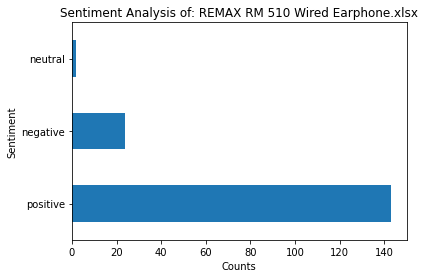

None

Positive Summary: 
।  প্রোডাক্ট এর কোযালিটি টা ভালো টাকা অনুযাযী বেজ মোটামুটি ঠিক আছে সাউন্ড কোযালিটি মোটামুটি।  বক্সটা অনেক কিউটএই দাম অনুযায়ী ভালো একটা ইয়ারফোনসবাই নিতে পারেন।  ভালো প্রোডাক্ট সাউন্ড কোযালিটি ও খুব ভালো।  খুবই ভালো একটা সবাই নিতে পারেন।  পণ্যের দাম অনুযায়ী মান খুব ভালোসাউন্ড কোয়ালিটি গুড।  দাম অনুযায়ী ভালো আছে।  আনেক ভালো মানের হেডফোন।  হেডফোনটি ভালো কিন্তু তার চেয়েও বক্সটা বেশি কিউট।  ইযারফোনটা পচ্ছন্দ হয়েছে তার ভালো ইয়ার ফোন।  টা খুব ভালো হয়েছে ধন্যবাদ।  আলহামদুলিল্লাহ সাউন্ড ভালো।  অনেক ভালো ছিলো ধন্যবাদ।  অনেক সুন্দর একটি ইযারফোন১০০ অরজিনাল টা পেযেছিআর সেলারের ব্যবহার অনেক ভালো মোট কথায অসাধারণআমি স্যাটিসফাই।  আলহামদুলিল্লাহ।  খুবই তাড়াতাড়ি ডেলিভারি পেয়েছি পণ্যটাও যথেষ্ট ভালো ধন্যবাদ সেলার এবং দারাজকে।  এক কথায অসাধারণ যেমন সাউন্ড কোযালিটি তেমন সব কিছু বলা যায যে অনেক ভালো।  অনেক ভালো একটা প্রোডাক্ট আমার অনেক ভালো লেগেছে আপনারা চাইলে নিতে পরেন।  মোটামুটি ভালোবাজেট বাডাতে পারলে আরেকটু ভালো কিছু নিতে পারবেন।  সাত মাস পর রিভিউ দিলাম এখনো ইউজ করতেছি অনেক ভালো সা

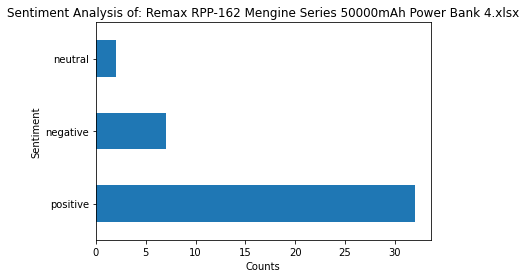

None

Positive Summary: 
।  অসাধারণ একটি পাওয়ার ব্যাংক একশ চার্জ দিয়ে ২০টা মোবাইল চার্জ দেয়া যায় মাত্র নয়শ শূন্য টাকায় এত ভাল জিনিস আশা করিনি।  মোবাইল চারজ হয় দ্রুতই কিন্তু পাওয়ার ব্যাংকটা চারজ করতে অনেক সময় নেয়মাশাল্লাহ ভালোই।  প্রথমে ধন্যবাদ জানাই দারাস কে একটা পণ্য দেওযার জন্য পাওযার ব্যাংক টা অনেক ভালো কেউ চাইলে নিতে পারেন ফ।  ভালো ই মনে হয়তবে আমার মোবাইল এই পাওয়ার ব্যাংক দিয়ে চার্জ হয় নাতাই আমার কোন কাজেই লাগলো না।  একশ চার্জের ১০বার স্মার্টফোন চার্জ দিয়ে রিভিউ দিলাম চার্জ যেন শেষই হয় না সবাই নিতে পারেন অনেক ভালো পণ্য।  অনেক ভালো ও কাজের একটি প্রোডাক্ত ছিল ধন্যবাদ সেলার দারাজ ও ডেলিভারি রয় ভাইয়াকে।  ভালো জিনিস শুধু চার্জ নিতে একটু সময নেয বাকি সব পারফেক্ট আমার খুব পছন্দ হযেছে।  দশআট কেজিঅনেক ভালো কিন্তু চার্জ হতে ১০ঘন্টা সময় নেয়।  খুব ভালো একটা জিনিস সবাই নিতে পারেন।  পৌডাক্ট টা ভালো আপনারা নিতে পারেন।  খুবই ভালো।  খুব ভালো।  ভালো

Negative Summary: 
।  যখন পন্য পেলাম চার্জ ছিল সতেরতিন তিন ঘন্টায় ফাস্ট চার্জার দিয়া নব্বইতিন চার্জ ওঠছে পরবর্তী দশদুই ঘন্টা চার্জারে লাগাইয়া রাখছিলাম 

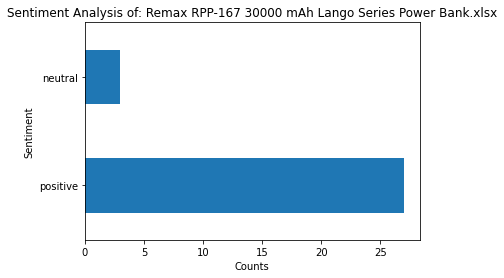

None

Positive Summary: 
।  খুব সুন্দর প্রোডাক্ট পুরাই সিল্ড ইনটেক প্যাকেট দিয়েছিলোপ্রোডাক্ট এর কোয়ালিটি ও ভালো মানের মানুষের ভরসা রেখে সেলার ভালো প্রোডাক্ট দিয়েছে ধন্যবাদ সেলারকে।  প্যাকেজিং ভালো ছিল পাওযার ব্যাংক যেমন অর্ডার করেছিলাম তেমনটাই পেযেছি এখন দেখা যাক কেমন সার্ভিস দেয।  অসাধারণ এখন দেখার বিষয় সাভিস কেমন দেয় সেলার কে অসংখ্য ধন্যবাদ।  জিনিসটা ভালোই তবে প্যাকেট টা ড্যামেজড ছিলো এটার দোষ আমি কে দিবো সেলারকে ধন্যবাদ ভালো একটা প্রোডাক্ট পাঠানোর জন্য।  ওজন আরেকটু বেশি আশা করছিলাম সাতশ বিশ গ্রাম দাম হিসেবে জিনিষ অনেক ভালো সেলারের দোকানে ঘুরতে যাবোএকসাথে ২টা মোবাইল একশ চার্জ দিলাম ৩টা এল ই ডি জ্বলতেছে দশ থেকে একশ একটায় আর ষাট থেকে একশ আরেকটায় মিনিমাম মনে হচ্ছে এটা পর্যন্ত দিতে পারবে সাপোর্ট না করলেও রেগুলার চার্জ বেশ ভালো হলো কোনো হিট ইস্যু পেলাম না।  ভালো পাওয়ার ব্যাংক নয়শ সতেরদুই টাকায় কিনেছিলাম কিন্তু দাম বেড়ে গেছে এখন অনেক এখনকার দাম হিসেবে এটিতে ফাস্ট চার্জিং সিস্টেম থাকলে ভালো হত।  দামের সাথে কম্পেয়ার করলে পাওয়ার ব্যাংক টি ভালো মানের৪০০০ মানের মোবাইল প্রায় ৪বার আর এক হাজার চার

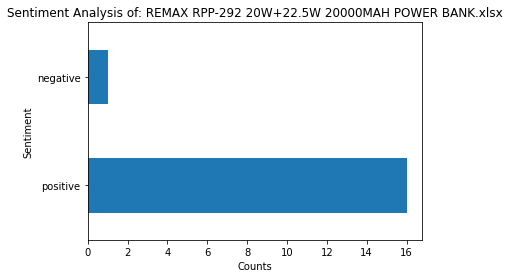

None

Positive Summary: 
।  জিনিসটা অসাধারণ যা চেযেছি তাই পেযেছি সেলার ভাই অনেক ভালো সাথে একটি ইযারফোন ফ্রী দিযেছে চাইলে সবাই নিতে পারেন ডেলিভারি দিযেছে মাত্র দুই দিনেই।  আমার দেখা বেস্ট পাওযার ব্যাংকযেকোনো এন্ড্রযেড ফোনে এইটা ফাস্ট চার্জিং সাপোর্ট করছেঅসাধারণ একটা প্রোডাক্টযেকোনো কেউ চোখ বন্ধ করে নিতে পারবেন।  ভাই চারদিন ব্যবহার করে তারপর রিপ্লাই দিচ্ছি পাওযার ব্যাংক টা ভালোই কাছে দিচ্ছে আমি সন্তুষ্ট।  ভালো জিনিস আমার চার বার চার্জ করা যায়।  এক সপ্তা ব্যবহারের পর রিভিউ দিলাম ভালো প্রোডাক্ট নিতে পারেন।  ভালোই চাইলে নিতে পারেন।  ভালো সবাই নিতে পারেন।  মানে ভালো

Negative Summary: 
।  একদম ফালতু প্রোডাক্ট দশপাঁচ দিন ব্যবহার করার পরই নষ্ট হয়ে গেলো তারপরেও ছিলোনা সর্বচো হবে কেউ কিনে ঠইকেন না

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: rendy New Chain Bracelets for Women.xlsx

positive_score is : 88.2
negative_score is : 8.8
neutral_score is : 2.9
Visual: 


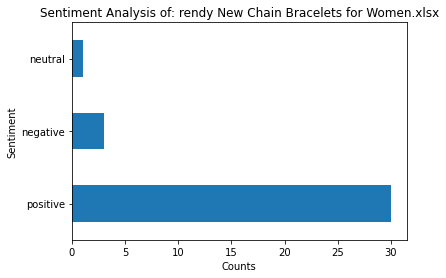

None

Positive Summary: 
।  খুব সুন্দর ছিলো।  দাম অনুযায়ী প্রোডাক্ট আলহামদুলিল্লাহ ধন্যবাদ।  সুন্দর আছে কিন্তু রং উঠবে বাঁশ।  অনেক ভালো প্রোডাক্ট যেমনটা চেযেছিলাম তেমনটাই পেযেছি ধন্যবাদ সেলার কে।  এত কম দামে অনেক ভালো প্রডাকআপনারা চাইলে নিতে পারেন।  ধন্যবাদ সেলার কেসেইম প্রোডাক্ট পাইছি।  মোটামুটি ভালো তবে দাম একটু বেশি।  সুন্দর আপনারাও নিতে পারেন।  দামের তুলনায ঠিক আছে।  অনেক সুন্দর হযেছে।  দেখতে সুন্দর।  সুন্দর হয়েছে।  খুবই ভালো।  ভালোই

Negative Summary: 
।  বাটপার সেলার এক সাথে ২টা প্রোডাক্ট ওর্ডার করছি বাট ১টা পাঠাইছে প্রোডাক্ট নিয়া কোনো সমস্যা নাই প্রোডাক্ট ঠিক আছে বাট সেলার ভালো না।  এটা কোন কথা অডার করলাম কোন টা আর দিলো কোন টা এমন টা আসা করি কি বাটপারি করা হলো আমার সাথে এমন টা আসা করি নি বাজে হয়েছে বলার মতো না।  একদম বাজে ছিল অনেক গুলো পাথর পরে গেছে

Neutral Summary: 
।  ইযেস বস পর্নো হাতে পেযেছি কিন্তু ঘডি একটা অর্ডার করছিলাম দুটো একসাথে পেলে আরো ভালো হতো
-------------------------------------------------------------------------------------------------------------------------
 


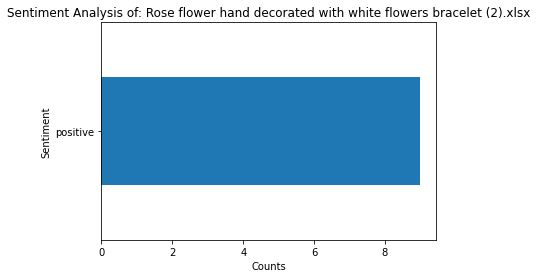

None

Positive Summary: 
।  সুন্দর।  খুব সুন্দর।  সুন্দর হয়েচ

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Self Ear Piercing Kit.xlsx

positive_score is : 92.9
negative_score is : 7.1
neutral_score is : 0.0
Visual: 


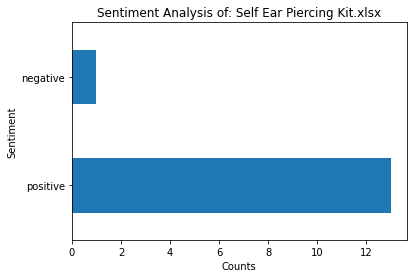

None

Positive Summary: 
।  আলহামদুলিল্লাহ ছবিতে যেমনটি দেখেছি ঠিক তেমনটি আমি পেয়েছি চাইলে আপনারা সবাই নিতে পারেন সবাইকে রেকমেন্ড করছি নেয়ার জন্য ধন্যবাদ সেলার দারাজকে।  মেশিনটি একবার ইউজ করলেই শেষ বার বার ইউজ করার জন্য কিট পাওযা যাবে কিনা।  ধন্যবাদ দারাজ কে খুব সুন্দর একটা প্রোডাক দেওয়ার জন্য সেলার অনেক ভালো।  দাম অনুযাযী অনেক ভালো একটা প্রোডাক্ট আমার অনেক ভালো লাগেছে।  আমার মেয়ের কান আজ নিজে ফোটালামখুবই খুশি লাগছে।  প্রোডাক্ট ভালোই কেউ চাইলে নিতে পারেন।  খুব ভালো একটা জিনিস আমার মেযের কান আমি নিজে ফুটিযেছি একটা কানের জন্য একটা।  ভালো আছে শুধু একটা রিং আছে ২টা হলে ভালো হতো।  প্রোডাক্টের অনুযাযী দামটা অনেক বেশি।  এক পিছ পেয়েছি সাথে এলকোহল পেড নেই।  খুবই ভালো ব্যাথাও কম লাগে।  খারাপ না ভালো পেযেছি।  যেটা অর্ডার দিযেছি সেটাই পাইসি কিন্তু সমস্যা একটা সেটা হলো গো এটাতে

Negative Summary: 
।  ফালতু জিনিস ভাঙ্গা কেউ নিবেন না ধোকা দেয সবাইকে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

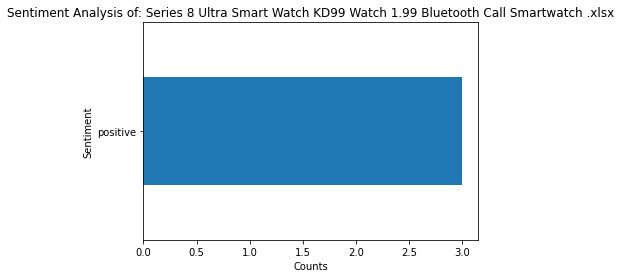

None

Positive Summary: 
।  সুন্দর নিতে পারেন সবাই।  সাউন্ড খুব খারাপকথা বললে আউট সাউড একটা সব্দ আসে চো চো সব্দটার্চ কম কাজ করে বিল্ড কোয়ালিটি তেমন ভাল না আমি এইটা রিটান করবো ইন্সা আল্লাহ।  যেটা অর্ডার দিযেছি সেটাই পাইসি কিন্তু সমস্যা একটা সেটা হলো গো এটাতে

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Series 8 Ultra Smart Watch KD99 Watch 1.99 Bluetooth Call Smartwatch Heart Rate Sleep Monitoring IP67 Waterproof Wireless Charging Watch for Men Women PK S8 DT8.xlsx

positive_score is : 80.0
negative_score is : 20.0
neutral_score is : 0.0
Visual: 


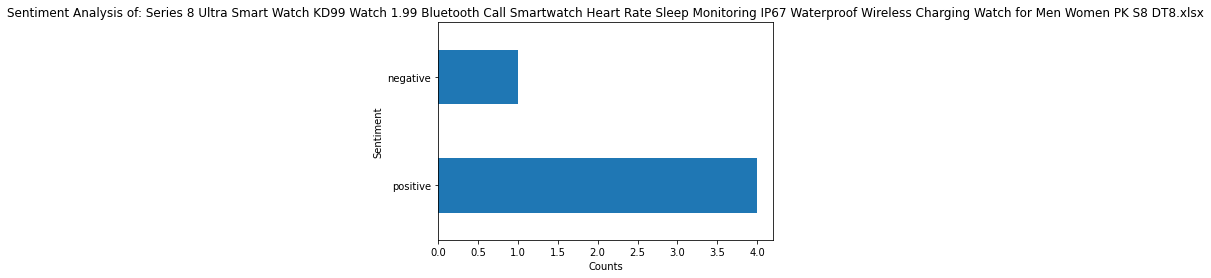

None

Positive Summary: 
।  সুন্দর নিতে পারেন সবাই।  সাউন্ড খুব খারাপকথা বললে আউট সাউড একটা সব্দ আসে চো চো সব্দটার্চ কম কাজ করে বিল্ড কোয়ালিটি তেমন ভাল না আমি এইটা রিটান করবো ইন্সা আল্লাহ।  ধন্যবাদ দারাজ অতি দ্রুত ডেলিভারি দেওয়ায় এবং সুন্দর পন্য দেওয়ায়।  যেটা চাইছি সেটাই পাইছিধন্যবাদ

Negative Summary: 
।  একটি বাজে পণ্য একদিন ব্যবহারের পরেই রং উঠে গেছে

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Sexy Star Simple Belly Chain for Women.xlsx

positive_score is : 75.6
negative_score is : 22.2
neutral_score is : 2.2
Visual: 


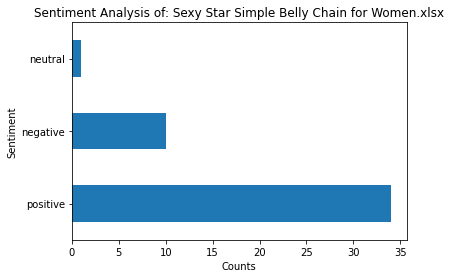

None

Positive Summary: 
।  মোটামোটি ভালোই আছে।  ভালো আপনেরা নিতে পারেন।  মোটামুটি কোয়ালিটির দামের তুলনায় এরো একটু ভালো হওয়ার দরকার ছিল।  আর একটু লম্বা হওয়াটা জরুরী ছিলোএমনিতে ভালো।  ভাল একটু গোল্ডেন হলে ভালো হতো।  কোয়ালিটি এতো টা ভালো নয় একশ চার।  ধন্যবাদখুবি ভালো ছিলো।  ভালো।  ভালো ছিলো।  ভালো

Negative Summary: 
।  ফালতু জিনিস লো কোয়ালিটি।  একদম বাজে একটা জিনিস দিছে এগুলো আমাদের এখানে বিশ থেকে ত্রিশ টাকায় কিনতে পাওয়া যায় আর আমার থেকে একশত ত্রিশ টাকা নিছে।  খুবই বাজএকদিনেই রঙ উঠে গেছে।  চেইনের রঙ উঠে গেছে কিছুটা।  ফালতু একটা প্যডাক।  ফালতু কোয়ালিটি।  ফালতু

Neutral Summary: 

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Silicone Breathable Replacement Strap for Apple (2).xlsx

positive_score is : 72.3
negative_score is : 26.2
neutral_score is : 1.4
Visual: 


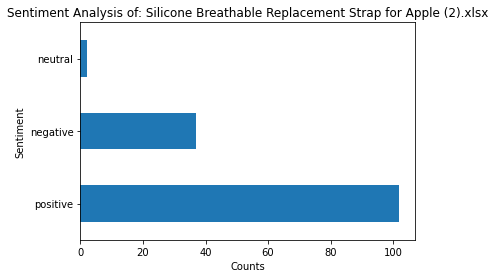

None

Positive Summary: 
।  পোডাক্ট টা ভালো ছিল দামে আনেক সস্তা দন্যবাদ দারাজকে।  বাজেট অনুযায়ী অনেক অনেক ভালো ছিলোদারাজ কে ধন্যবাদ।  ধন্যবাদ দারাজ দাম অনুযাযী প্রোডাক্ট টা ভালো ছিল।  দাম অনুযাযী মোটামুটি ভালো সবাই কিনতে পারেন।  ঘড়িটা চলার মতো ভালোখারাপ না আপনারাও নিতে পারেন।  দাম অনুযায়ী ভালো।  আলহামদুলিল্লাহ দুইটা নিয়েছি দাম হিসেবে খুবই ভালো ধন্যবাদ সেলার ভাইকে।  ভালো কিন্তু উপরের গ্লাসটা উটে যায়।  পন্য অনেক ভালো পাইছিধন্যবাদ।  ভালো দাম হিসাবে ভালোই।  দারাজ তার কথা রেখেছে ঘড়ি টা খুবই ভালো।  যেমন টাকা তেমন মাল মোটামুটি ভালো খারাপ না।  দাম অনুযায়ী অনেক ভালো চার্জ কম ছিলো।  ধন্যবাদ দারাজকেপন্য ভালো ছিলো।  খুব ভালো লাগলো ধন্যবাদ।  খুব খুব ভালো মাল।  খুব ভালো।  আলহামদুলিল্লাহ দামের তুলনায ঘডিটা ভালোই আছি আপনারা চাইলে নিতে পারেন।  অনেক অনেক ভালো নিতে পারেন।  ভালোই ছিল যেমন দেখছিলাম তেমনি পাইছি।  সময় মতো পাইনি কিন্তু জিনিসটা অনেক ভালো।  এত একটা ভালো না তবো আপনারা নিতে পারেন।  দাম অনুযায়ী পন্যটি সত্যিই খুব ভালো।  নব্বইনয় টাকায় যা অসম্ভবঅনেক ভালো পন্য।  পছন্দসই কিন্তু আরো মান ভালো চাই।  ঠিক আ

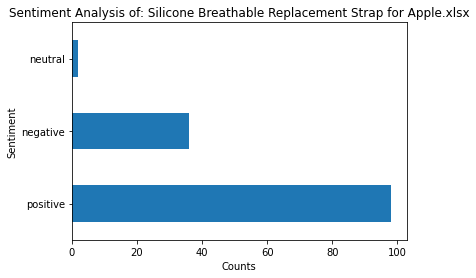

None

Positive Summary: 
।  পোডাক্ট টা ভালো ছিল দামে আনেক সস্তা দন্যবাদ দারাজকে।  বাজেট অনুযায়ী অনেক অনেক ভালো ছিলোদারাজ কে ধন্যবাদ।  ধন্যবাদ দারাজ দাম অনুযাযী প্রোডাক্ট টা ভালো ছিল।  দাম অনুযাযী মোটামুটি ভালো সবাই কিনতে পারেন।  ঘড়িটা চলার মতো ভালোখারাপ না আপনারাও নিতে পারেন।  দাম অনুযায়ী ভালো।  আলহামদুলিল্লাহ দুইটা নিয়েছি দাম হিসেবে খুবই ভালো ধন্যবাদ সেলার ভাইকে।  ভালো কিন্তু উপরের গ্লাসটা উটে যায়।  পন্য অনেক ভালো পাইছিধন্যবাদ।  ভালো দাম হিসাবে ভালোই।  দাম অনুযায়ী অনেক ভালো চার্জ কম ছিলো।  ধন্যবাদ দারাজকেপন্য ভালো ছিলো।  খুব ভালো লাগলো ধন্যবাদ।  খুব খুব ভালো মাল।  খুব ভালো।  আলহামদুলিল্লাহ দামের তুলনায ঘডিটা ভালোই আছি আপনারা চাইলে নিতে পারেন।  অনেক অনেক ভালো নিতে পারেন।  ভালোই ছিল যেমন দেখছিলাম তেমনি পাইছি।  সময় মতো পাইনি কিন্তু জিনিসটা অনেক ভালো।  এত একটা ভালো না তবো আপনারা নিতে পারেন।  দাম অনুযায়ী পন্যটি সত্যিই খুব ভালো।  নব্বইনয় টাকায় যা অসম্ভবঅনেক ভালো পন্য।  পছন্দসই কিন্তু আরো মান ভালো চাই।  ঠিক আছে প্যাকেটটা ভালো ছিল।  পন্য মোটামুটি দাম অনুযায়ী ভালো।  ভালো বাচ্চা খুব খুশি হযেছে।

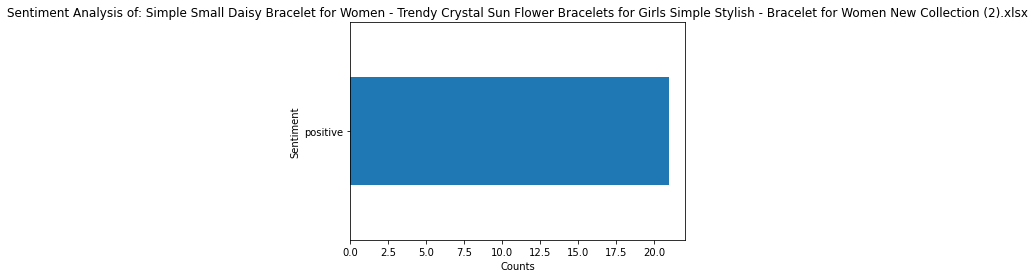

None

Positive Summary: 
।  একদম মনের মত ছবিতে যেমন দেখেছি ঠিক তেমন অনেক সুন্দর একটি ব্রেসলেট।  অনেক বেশি সুন্দর সামনাসামনি দেখতে আরো ভালো।  আমার মেয়ে খুব পছন্দ হয়েছে।  ভালো জিনিস নিতে পারেন।  চমকার প্রোডাক্ট।  ব্রেসলেট টা অনেক সুন্দর আমার ছয় বছরের মেয়ের অনেক পছন্দ হয়েছেকিন্তু ডেলিভারি চার্জ সহ দামটা একটু বেশি হয়ে গেছে।  আলহামদুলিল্লাহ সঠিক পণ্য দেয়ার জন্য শোকরিয়া প্যাকেজিং টাও ভালো ছিলো।  যেমন ভেবেছিলাম ঠিক তেমনই পেয়েছি আলহামদুলিল্লাহ আপনারা নিতে পারেন।  আলহামদুলিল্লাহ কম দামে ভালই প্রডাক্ট পেয়েছি ধন্যবাদ দারাজকে।  একদম ছবির মতোই দেখতেও খুব সুন্দর ডেলিভারি ও দ্রুত।  আলহামদুলিল্লাহ খুব ভালো প্রডাক খুব সুন্দর।  অনেক কিউট একটা জিনিসহুবহু সেম পাইছি।  বড় হইছে কিন্তু সুন্দর।  পণ্য সঠিক পেয়েছি।  ছবিতে যেমন তেমনই।  মাল্টিকালার নোজপিন সবগুলো ঠিকঠাকমতো পেয়েছি ভালই তবে বক্সটা আরো সুন্দর করা যেত।  কোন লেভেলের চোর হলে বক্সের ছবির নিচে খালি দিযা লাভ করার চেষ্টা করে প্রডাক্টের ছবি ভূল না দিলেই তো হইতো এই দেশে ব্যবসা করলে কসম খাযা রাস্তায নামে যে মিথ্যা ঠকবাজী দিযা ধান্দা বাডাবে।  কিভাবে পজেটিভ রিভি

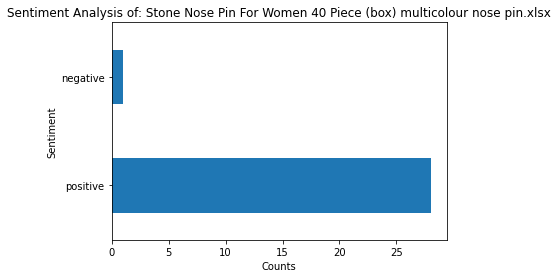

None

Positive Summary: 
।  একটা কম পেয়েছি সেলার বলছিলো এক্সট্রা হুক থাকবে বাট ছিলো না এমনিতে ভালোই।  ভালো আলহামদুলিল্লাহ এক পিচ কম পেয়েছি।  নাকফুল গুলো ভালো ছিলোবাক্স টা আরো বেশি সুন্দর।  নাক ফুলের নকছাবি নাই এটা ভালো না।  টা ভালো না।  মোটামুটি ভাল।  মোটামুটি ভালো।  অনেক ভালো।  ভালো ছিল

Negative Summary: 
।  একই কালারের এত গুলো কেন দেওয়া হলো এটা কিন্তুু একদম ঠিক হয়নি

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: Sweet Rhinestone Bow Knot Pendant Necklace Elegant Summer Imitation Choker Necklace For Women Jewelry Gifts.xlsx

positive_score is : 100.0
negative_score is : 0.0
neutral_score is : 0.0
Visual: 


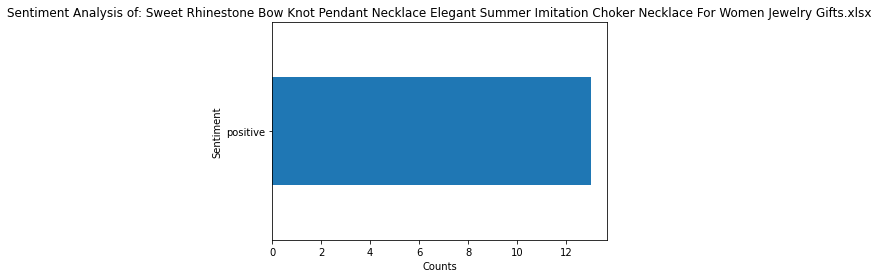

None

Positive Summary: 
।  সুন্দর নিতে পারেন সবাই।  ধন্যবাদ সেলার কেপ্রোডাক্ট টি খুব ভালো।  আমি দুইটা অর্ডার করেছিলাম দুইটাই ভালো ছিল সেলারকে ধন্যবাদ।  খুব ভালো লেগেছে সত্যি।  আসসালামু আলাইকুম ঘরি টি দিয়েছি এবং ঠিক মতো হাতেও পেয়েছি ধন্যবাদ কে ঠিকমতো আনার জন্য ঘরিটি টাকার মধ্যে ভালোই নিতে পারেন।  খুবই ভালো প্রোডাক্ট আমার ভাষায প্রকাশ করার মতো কোন কথাই নেই আপনারা চাইলে নিতে পারেন দশে দশ দেওযা যায সেলার খুব সুন্দর ব্যবহার থ্যাংক ইউ দারাজ।  ধন্যবাদ ডারাজ এবং সেইলারকে ছবিতে যেমন দেখেছি ঠিক তেমনই পেয়েছি সবাই নিতে পারেন

Negative Summary: 
Not found


Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: T500 Smart Watch Bluetooth Heart Rate Monitor Iwo 8 Lite Smartwatch (2).xlsx

positive_score is : 76.9
negative_score is : 21.0
neutral_score is : 2.1
Visual: 


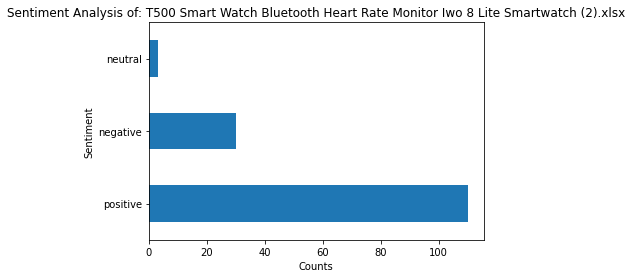

None

Positive Summary: 
।  আলহামদুলিল্লাহ ঘড়িটা খুব ভালো তিন দিন পর রিভিউ দিচ্ছি।  ঘড়িটা ভালোই আছে কিন্তু চার্জ একটু কম থাকে।  আলহামদুলিল্লাহ ভালো লাগছে খুব কম টাকায সুন্দর স্মাট ওযাজ।  আলহামদুলিল্লাহ অনেক ভালো একটি প্রডাক্ট আপনারা নিতে পারেন সেলার ভাই ও অনেক ভালো।  আলহামদুলিল্লাহ অনেক ভালো অপনারা চাইলে নিতে পারেন।  এক মাস ব্যবহার করে রিবউ দিলাম ভালো আসে সবাই নিতে পারেন।  আলহাদুলিল্লাহ ঘড়ি ভালো ছিলসময় এর আগই পেয়ে গেছিলাম আপনারা চাইলে নিতে পারেন।  আলহামদুলিল্লাহ অল্পদামে খুব ভালো একটা পণ্য পাইছিসেলার কে অসংখ্য ধন্যবাদ।  ঘডিটা মোটামুটি চার্জ একদিন যায।  অনেক ভালো ধন্যবাদ।  সেলার কে ধন্যবাদ ভালো মানের পন্য দেওয়ার জন্য সবাই নিতে পারেন।  যেমন ছেযেছি তেমন পেযেছি খুব ভালো আপনারাও চাইলে নিতে পারেন।  আলহামদুলিল্লাহ খুব ভালো আপনারা চাইলে নিতে পারেন।  আলহামদুলিল্লাহ প্রোডাক্টটা হাতে পেযেছে খুব ভালো।  ঘডিটা মোটামুটি অতটা ভালো না।  দাম অনুযায়ী ভালো।  অনেক ভালো।  ব্যবহার এর পরে রিভিউ দিচ্ছিভালো জিনিস দিছেধন্যবাদ।  আলহামদুলিল্লাহ প্রডাক্ট খুব ভালোশুকরানজাজাকাল্লাহ।  ততটাও ভালো নাস্পিকার সাউন্ড অনেক 

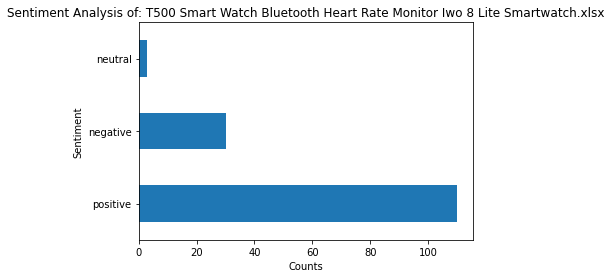

None

Positive Summary: 
।  আলহামদুলিল্লাহ ঘড়িটা খুব ভালো তিন দিন পর রিভিউ দিচ্ছি।  ঘড়িটা ভালোই আছে কিন্তু চার্জ একটু কম থাকে।  আলহামদুলিল্লাহ ভালো লাগছে খুব কম টাকায সুন্দর স্মাট ওযাজ।  আলহামদুলিল্লাহ অনেক ভালো একটি প্রডাক্ট আপনারা নিতে পারেন সেলার ভাই ও অনেক ভালো।  আলহামদুলিল্লাহ অনেক ভালো অপনারা চাইলে নিতে পারেন।  এক মাস ব্যবহার করে রিবউ দিলাম ভালো আসে সবাই নিতে পারেন।  আলহাদুলিল্লাহ ঘড়ি ভালো ছিলসময় এর আগই পেয়ে গেছিলাম আপনারা চাইলে নিতে পারেন।  আলহামদুলিল্লাহ অল্পদামে খুব ভালো একটা পণ্য পাইছিসেলার কে অসংখ্য ধন্যবাদ।  ঘডিটা মোটামুটি চার্জ একদিন যায।  অনেক ভালো ধন্যবাদ।  সেলার কে ধন্যবাদ ভালো মানের পন্য দেওয়ার জন্য সবাই নিতে পারেন।  যেমন ছেযেছি তেমন পেযেছি খুব ভালো আপনারাও চাইলে নিতে পারেন।  আলহামদুলিল্লাহ খুব ভালো আপনারা চাইলে নিতে পারেন।  আলহামদুলিল্লাহ প্রোডাক্টটা হাতে পেযেছে খুব ভালো।  ঘডিটা মোটামুটি অতটা ভালো না।  দাম অনুযায়ী ভালো।  অনেক ভালো।  ব্যবহার এর পরে রিভিউ দিচ্ছিভালো জিনিস দিছেধন্যবাদ।  আলহামদুলিল্লাহ প্রডাক্ট খুব ভালোশুকরানজাজাকাল্লাহ।  ততটাও ভালো নাস্পিকার সাউন্ড অনেক 

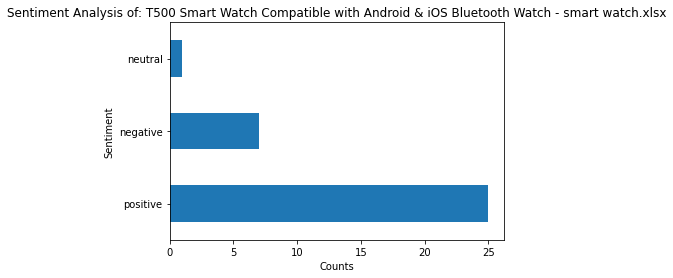

None

Positive Summary: 
।  মোটামুটি ভালো দারাজ কে অনেক ধন্যবাদ এতো সুন্দর ওয়াচ জন্য।  দাম হিসাবে অনেক ভালো ধন্যবাদ দারজ কে।  কম দামে এতো সুন্দর ঘরটি দেযার জন্য ধন্যবাদভেলিভারি যেন আর প্যেকেজ ও অনেক ভালো ছিল ধন্যবাদ আপনাকে।  খুব ভালো একটা ঘরি চাইলে আপনারা নিতে পারেন অনেক সুন্দর।  প্রোডাক্টটি খুবই ভালো।  অনেক ভালো সবাই নিতে পারেন।  অনেক ভালো।  আলহামদুলিল্লাহ আমি ঘড়িটা ভালো ভাবেই পেয়েছি অনেক সুন্দর ঘড়ি চাইলে নিতে পারেন।  আমার এই ঘডিটা খুবই খুবই ভালো লেগেছে।  আলহামদুলিল্লাহ জিনিসটা অনেক সুন্দর অনেক দ্রুত হাতে পেযেছি ধর আজকে ধন্যবাদ সেলার কেউ ধন্যবাদ সেলারের ব্যবহার অনেক ভালো।  প্রোডাক্ট খুব ভালো ইনটেক অবস্থায পেযেছিআপনারা নিতে পারেন কোন সমস্যা নেই

Negative Summary: 
।  জিনিস টা ভালো কিন্তুু চালু হয় নাই নষ্ট জিনিস দিছে মানতে পারলাম না।  ঘরিটি খুব ভালো চালে নিতে পারেন।  ভাই এই জিনিসটা ঠিক আছে কিন্তু এর ভিতরে যেই সফটওয়্যারগুলো এগুলো একটাও সেট হয়না।  বারবার রিকোযেস্ট করে বলছিস যদি লাল দিতেদিছে আমারে হলুদটাচাজ হাফ বেলাসফটওয্যার কানেক্ট হযযাদের টাকা বেশি কিনতে পারেন

Neutral Summary: 
।  দাম হ

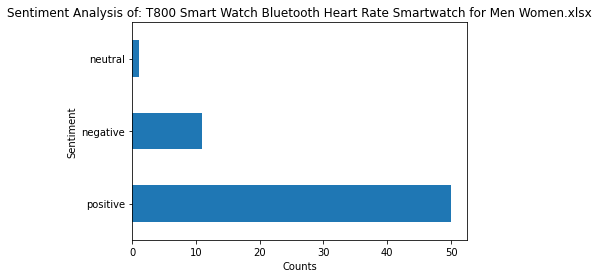

None

Positive Summary: 
।  খুব ভালো নিতে পারেন।  এত কম বাজেটে মধ্যে একটি ভালো চাইলে সবাই নিতে পারেন।  আলহামদুলিল্লাহ অনেক ভালো একটা ঘডি পেযেছি সঠিক সমযের আগেই পেযেছি ধন্যবাদ দাডাজকে।  হলে ভালো হতো দারাজ প্লিজ করে দেন আরো নিব।  অনেক সুন্দর একটা ঘডি আপনারা নিতে পারেন।  আলহামদুলিল্লাহ ওযাজটা ভালো ছিল।  সবাই নিতে পারেন।  ভাল নিতে পারেন।  ভালো ছিলো আমার বাম হাত ফলো করুন।  টাকার মধ্যে অনেক ভালো।  আলহামদুলিল্লাহ অনেক ভালো ডেলিভারি বয অনেক ভালো।  বেশি ভালো না।  আলহামদুলিল্লাহ যা চাইছিলাম তার থেকে অনেক ভালো কিছু পেযেছি আপনারা সবাই নিতে পারেন।  খুব ভালো পাইছি পায় ২০দিন পরে পাইছি আপনারাও নিতে পরেন।  বেশি কিছু বলতে চাই না এই ঘড়িটি অনেক ভালো।  সবগুলো ফিচার নাই এই দামে আরো ভালো কিছু আশা করেছিলাম।  এইটা ভালো আপনারা নিতে পারেন।  দাম অনুযায়ী ভালো।  ধন্যবাদ।  আমার এই ঘডিটা খুবই খুবই ভালো লেগেছে।  প্রোডাক্ট খুব ভালো ইনটেক অবস্থায পেযেছিআপনারা নিতে পারেন কোন সমস্যা নেই

Negative Summary: 
।  একদম বাজে অটোমেটিক টাইম স্লো হযে যায।  একদমফালতু জিনিস দিছে টাচ কাজ করে না কেউনিবেন না এগুলা।  পণ্যটি ওয়াটারপ্রুফ 

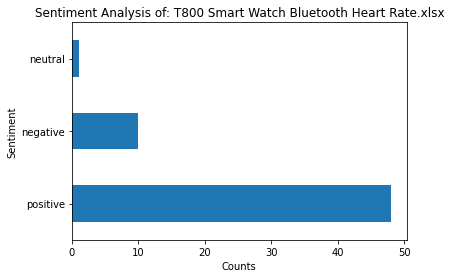

None

Positive Summary: 
।  খুব ভালো নিতে পারেন।  এত কম বাজেটে মধ্যে একটি ভালো চাইলে সবাই নিতে পারেন।  আলহামদুলিল্লাহ অনেক ভালো একটা ঘডি পেযেছি সঠিক সমযের আগেই পেযেছি ধন্যবাদ দাডাজকে।  হলে ভালো হতো দারাজ প্লিজ করে দেন আরো নিব।  অনেক সুন্দর একটা ঘডি আপনারা নিতে পারেন।  আলহামদুলিল্লাহ ওযাজটা ভালো ছিল।  সবাই নিতে পারেন।  ভাল নিতে পারেন।  ভালো ছিলো আমার বাম হাত ফলো করুন।  টাকার মধ্যে অনেক ভালো।  আলহামদুলিল্লাহ অনেক ভালো ডেলিভারি বয অনেক ভালো।  বেশি ভালো না।  আলহামদুলিল্লাহ যা চাইছিলাম তার থেকে অনেক ভালো কিছু পেযেছি আপনারা সবাই নিতে পারেন।  খুব ভালো পাইছি পায় ২০দিন পরে পাইছি আপনারাও নিতে পরেন।  বেশি কিছু বলতে চাই না এই ঘড়িটি অনেক ভালো।  সবগুলো ফিচার নাই এই দামে আরো ভালো কিছু আশা করেছিলাম।  এইটা ভালো আপনারা নিতে পারেন।  দাম অনুযায়ী ভালো।  ধন্যবাদ।  প্রাইজ অনুযাযী ভালো প্রোডাক্ট থ্যাংক ইউ দারাজ

Negative Summary: 
।  একদম বাজে অটোমেটিক টাইম স্লো হযে যায।  একদমফালতু জিনিস দিছে টাচ কাজ করে না কেউনিবেন না এগুলা।  পণ্যটি ওয়াটারপ্রুফ বলছে কিন্তু পানিতে ভিজানোর পর নষ্ট হয়ে গেছে।  একদম বাজে চাজ থাকে

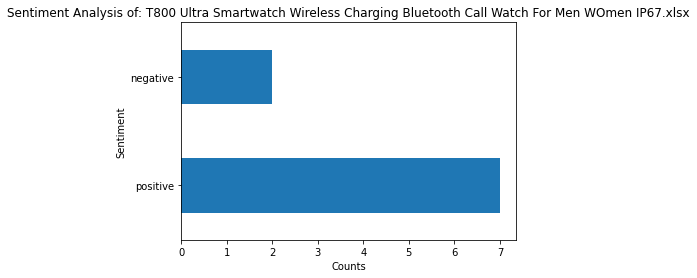

None

Positive Summary: 
।  মনের মত পেযেছি একটা স্মার্ট ওযাচ আরেকটু ফিউচার থাকলে ভালো হতো।  এই দামে বেস্ট প্রোডাক্টফুল্লি সেটিসফাইড ডেলিভারি টাইম ও অনেক কম ছিলোধন্যবাদ দারাজ এবং সেলার কে।  প্রাইজ অনুযাযী ভালো প্রোডাক্ট থ্যাংক ইউ দারাজ

Negative Summary: 
।  কলে কথা শোনা যায়না ক্যামেরা আসেনা।  ক্লাউনটা খুবই ঢিলা প্রচুর স্লো কাজ করতে চায না হ্যাং করে আমি রিটার্ন দিব কেউ কিনার আগে একটু ভেবে দেখবেন ছেলেরা এরকম একটা জিনিস দিবে আমি ভাবতে পারিনি

Neutral Summary: 
Not found

-------------------------------------------------------------------------------------------------------------------------
 

Product Name: T800 Ultra Smartwatch Wireless Charging Bluetooth Call Watch For Men WOmen.xlsx

positive_score is : 85.7
negative_score is : 14.3
neutral_score is : 0.0
Visual: 


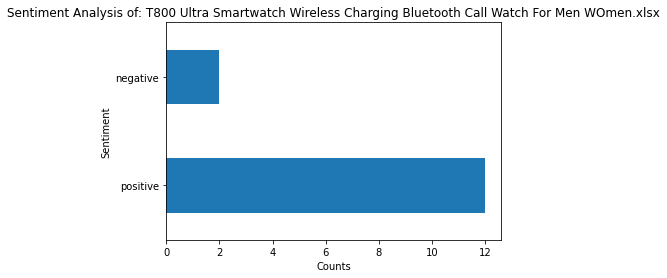

None

Positive Summary: 
।  মনের মত পেযেছি একটা স্মার্ট ওযাচ আরেকটু ফিউচার থাকলে ভালো হতো।  খুবই পছন্দ হইছেছবিতে যেমন ছিল তার থেকে ও বেশি সুন্দর ধন্যবাদ দারাজ সেলারএবং রাইডার কে।  অনেক ধন্যবাদ এত সুন্দর জিনিস দেওযার জন্যকিন্তু আমি এটি অর্ডার করেছিলাম ২৬শে এপ্রিল এবং আসার কথা ছিল ৩০শে এপ্রিল - ৪ঠা মে এর মধ্যে আমি জিনিস হাতে পেযেছি ৮ই মে এই বিষযটি আমার পছন্দ হযনি।  ধন্যবাদ এত সুন্দর ভালো একটা পন্য দেয়ার জন্য অনেক অনেক পন্য কিনব যদি এরকম ভালো পন্য আপনারা আমাদের দেন।  দাম অনুযাযী কোনভাবেই খারাপ বলা যাবে নাছবির সাথে হুবহু মিল আছে আপনাদের মন চাইলে নিতে পারেন।  ফটোতে যেমন দেখছিলাম হাতে তেমন পাই নাই তবে দাম অনুযাযী প্রোডাক্ট ঠিকই আছে।  ভালো ছিলো সময় মতো পেয়েছি যেটা চাই ছিলাম সেটায় পাইছি ধন্যবাদ বাদ দারাজ কে তবে এটা আমার প্রথম অডার ছিলো আর অনেক স্যাটিসফ্রাইট হইছি পরবর্তী তে আরো ভালো কিছু পাবো আাশা রাখি।  যেই কালারটি ওর্ডার করেছিলাম সেটাই পেয়েছি দাম হিসেবে ভালই মনে হয়েছে তবে জিনিসটি ব্যাচলেট থেকে পাযের নুপুর হিসেবে বেশি মানিযেছে ধন্যবাদ জানাই সেলারকে ধন্যবাদ দারাজ টিম।  অস্থির প্রডাক্ট সেলারের ব

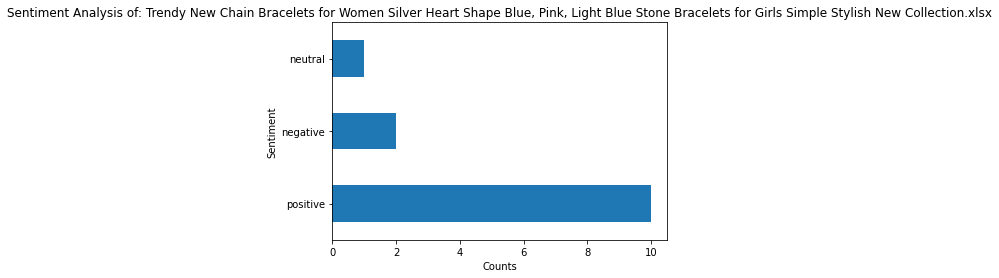

None

Positive Summary: 
।  দাম অনুযায়ী প্রোডাক্ট আলহামদুলিল্লাহ ধন্যবাদ।  সুন্দর আছে কিন্তু রং উঠবে বাঁশ।  ছবিতে যতটা সুন্দর দেখাচ্ছে বাস্তবে এতটা সুন্দর নয তবে চালিযে নেওযার মতো।  অনেক ভালো প্রোডাক্ট যেমনটা চেযেছিলাম তেমনটাই পেযেছি ধন্যবাদ সেলার কে।  এত কম দামে অনেক ভালো প্রডাকআপনারা চাইলে নিতে পারেন।  ধন্যবাদ সেলার কেসেইম প্রোডাক্ট পাইছি

Negative Summary: 
।  এটা কোন কথা অডার করলাম কোন টা আর দিলো কোন টা এমন টা আসা করি কি বাটপারি করা হলো আমার সাথে এমন টা আসা করি নি বাজে হয়েছে বলার মতো না।  একদম বাজে ছিল অনেক গুলো পাথর পরে গেছে

Neutral Summary: 
।  ইযেস বস পর্নো হাতে পেযেছি কিন্তু ঘডি একটা অর্ডার করছিলাম দুটো একসাথে পেলে আরো ভালো হতো
-------------------------------------------------------------------------------------------------------------------------
 



In [22]:
find_summarization_of_online_product_reviews()

# "Decision Tree"